## Setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, ConnectionPatch
import numpy as np
from numpy import cumsum
import matplotlib
import os, pickle
import pandas as pd
from itertools import accumulate
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.ticker as ticker
import matplotlib as mpl
import re
import scipy.stats as stats
# matplotlib.font_manager._rebuild()
# matplotlib.rcParams['axes.linewidth'] = 1



# plt.rcParams["font.weight"] = '400'

plt.rcParams.update({'font.size': 24})
# plt.rcParams['axes.facecolor'] = '#292929'
# plt.rcParams['figure.facecolor'] = '#292929'
# COLOR = 'white'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR


color_list = ['black', 'grey',  'blueviolet', 'gold', 'darkorange','teal', 'skyblue' ,'darkblue', 'blueviolet']
# SYS_NAME = 'Andes'
SYS_NAME = 'Sedna'
BASE= 'vLLM'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Arial"

# plt.rcParams['path.simplify'] = True
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams['svg.hashsalt'] = '42'

mpl.rcParams['lines.linewidth'] = 2.3
mpl.rcParams['lines.markersize'] = 8

## Motivation

### Fig 2 QoE comparision toy


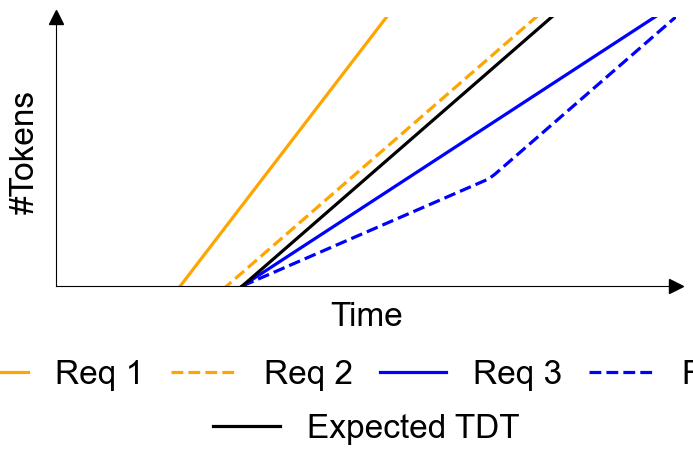

In [6]:
# Placeholder time range for the x-axis (t)
time = np.linspace(0, 10, 100)

# Placeholder functions for each requirement and TTFT_Expected
# These are arbitrary functions just to mimic the trend of the lines in the given image.
def req1(t): return t * 3 - 6
def req2(t): return t * 2 - 5.5
def req3(t): return t * 1.5 - 4.5
def req4(t): return (t - 3)*(t<=7) + (t * 2 - 10)*(t>7)
def TDT_Expected(t): return t * 2 - 6

# Setting up the plot with the specified functions
fig, ax = plt.subplots(figsize=(8, 3.5))

# Adding arrows to the axes
ax.plot(time, req1(time), linestyle='-', color='orange', label='Req 1')
ax.plot(time, req2(time), linestyle='--', color='orange', label='Req 2')
ax.plot(time, req3(time), 'b-', label='Req 3')
ax.plot(time, req4(time), 'b--', label='Req 4')
ax.plot(time, TDT_Expected(time), 'k-', label='Expected TDT')
# ax.set_position([0.2, 0.2, 0.6, 0.6])
handle1, label1 = [], []
handle2, label2 = [], []
for handle, label in zip(*ax.get_legend_handles_labels()):
    if label not in label1:  # Check to avoid duplicate labels in the legend
        if label == 'Expected TDT':
            handle2.append(handle)
            label2.append(label)
        else:
            handle1.append(handle)
            label1.append(label)
# Adjusting the legend to be at the bottom of the figure
legend = ax.legend(handle1, label1, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=4,columnspacing=0.8)
legend.set_frame_on(False)
ax.add_artist(legend)

legend = ax.legend(handle2, label2, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
legend.set_frame_on(False)

# Setting x and y axis labels
ax.set_xlabel('Time')
ax.set_ylabel('#Tokens')

# Setting x and y axis limits
ax.set_xlim(0, max(time))
ax.set_ylim(0, max(req4(time)))

# Removing the top and right spines to create axes with arrows but not boxes
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Moving bottom spine to zero position
ax.spines['bottom'].set_position(('data',0))
# Adding arrow to the bottom spine
ax.spines['bottom'].set_capstyle('projecting')
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)

# Moving left spine to zero position
ax.spines['left'].set_position(('data',0))
# Adding arrow to the left spine
ax.spines['left'].set_capstyle('projecting')
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)

# Hiding the axes ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')

# Hiding the axes tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Show the plot
# plt.tight_layout()
# plt.subplots_adjust(bottom=0.4)
plt.savefig(f"qoe-toy-body.pdf",bbox_inches='tight')
# plt.savefig(f"qoe-toy.pdf",bbox_inches='tight')

### Fig 7 Q-serve-preempt side-by-side version 

In [82]:
# Placeholder time range for the x-axis (t)
time = np.linspace(0, 10, 100)

# Placeholder functions for each requirement and TTFT_Expected
# These are arbitrary functions just to mimic the trend of the lines in the given image.
def req1(t): return t * 3 - 3
def req2(t): return t * 2 - 3.5
def req3(t): return (t-2)*1.25
def req4(t): return (t - 2)*0.5*(t<=6) + (t * 2 - 10)*(t>6)
def TDT_Expected(t): return t * 2 - 4
plt.rcParams.update({'font.size': 20})

# Setting up the plot with the specified functions
fig, ax = plt.subplots(figsize=(6.5, 3))


# Adding arrows to the axes
ax.plot(time, req1(time), linestyle='-', color='orange', label='Request 1')
ax.plot(time, req2(time), linestyle='--', color='orange', label='Request 2')
ax.plot(time, req3(time), 'b-', label='Request 3')
ax.plot(time, req4(time), 'b--', label='Request 4')
ax.plot(time, TDT_Expected(time), 'k-', label='Expected TDT \n $TDS_{exp} (t-TTFT_{exp})$')

legend = ax.legend(loc='center right', bbox_to_anchor=(1.8, 0.5), ncol=1)
legend.set_frame_on(False)

# Setting x and y axis labels
ax.set_xlabel('Time')
ax.set_ylabel('#Tokens')

# Setting x and y axis limits
ax.set_xlim(0, max(time))
ax.set_ylim(0, max(req4(time)))

# Removing the top and right spines to create axes with arrows but not boxes
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Moving bottom spine to zero position
ax.spines['bottom'].set_position(('data',0))
# Adding arrow to the bottom spine
ax.spines['bottom'].set_capstyle('projecting')
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)

# Moving left spine to zero position
ax.spines['left'].set_position(('data',0))
# Adding arrow to the left spine
ax.spines['left'].set_capstyle('projecting')
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)

# Hiding the axes ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')

# Hiding the axes tick labels
ax.set_xticklabels([])
ax.set_yticklabels([]) 
# Show the plot
# plt.tight_layout()
# plt.subplots_adjust(bottom=0.4)
plt.savefig(f"new-qoe-toy.pdf",bbox_inches='tight')
# plt.savefig(f"qoe-toy.pdf",bbox_inches='tight')

### Fig 4 Toy Example

In [8]:
def plot_rect(ax, rects, title, yticks = False):
    for label, rect in rects.items():
        ax.add_patch(rect)
        rx, ry = rect.get_xy()
        cx = rx + rect.get_width()/2.0
        cy = ry + rect.get_height()/2.0

        # Add the text in the center of the rectangles
        match = re.match(r'^(\d+)[ab]$', label)
        if match:
            label = match.group(1)
        ax.annotate(label, (cx, cy), color='black', ha='center', va='center')

    ax.hlines(0.2, 0, 1.8, colors='black')
    ax.hlines(0., 0, 1.8, colors='black')
    ax.vlines(0, 0, 0.2, colors='black')

    # Remove y-axis and spines
    # ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # ax.set_xlim(0, 1.4)
    ax.set_yticks([])
    ax.get_xaxis().set_visible(False)
    ax.set_xlim(0, 1.6) 
    if yticks:
        ax.set_ylabel('Server\nmemory\ncapacity')

    ax.set_title(title, color='black')

    # Add an arrow pointing from the top down
    ax.annotate('1,2,3,4', xy=(0, 0.2), xytext=(0, 1.2),
                textcoords='axes fraction', ha='center', va='bottom',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='black'))


def plot_token_t(ax, expected_tdt, lines, color_list, thickness, line_style, label, xticks = False, ysticks = False):
    ttft, tds = expected_tdt
    # max_tokens = 100
    for i, (x,y) in enumerate(lines):
        ax.plot(x,y, color=color_list[i], linewidth=thickness[i],linestyle=line_style[i], label=label[i]) 
    x = [i for i in range(ttft, 10)]  # Values from 0 to 1 in steps of 0.1
    y = [(xi - ttft) * tds for xi in x] 
    ax.plot(x, y, color='black', linestyle='-', label='Expected TDT')
    ax.set_xlim(0, 8)  
    ax.set_ylim(0, 4)  
    # ax.ylabel('#Token')
    # plt.xlabel('Time')

    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Set y-axis grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.7)  # Set x-axis grid lines
    if not xticks:
        ax.tick_params(axis='x', which='both', length=0, labelbottom=False)
    else:
        ax.set_xlabel('Time')
        ax.tick_params(axis='x', which='both', labelsize=20)
    if not ysticks:
        ax.tick_params(axis='y', which='both', length=0, labelleft=False)
    else:
        ax.set_ylabel('#Token')
        ax.set_yticks([2,4])
        ax.set_yticklabels([ '10', '20'], fontsize=20)

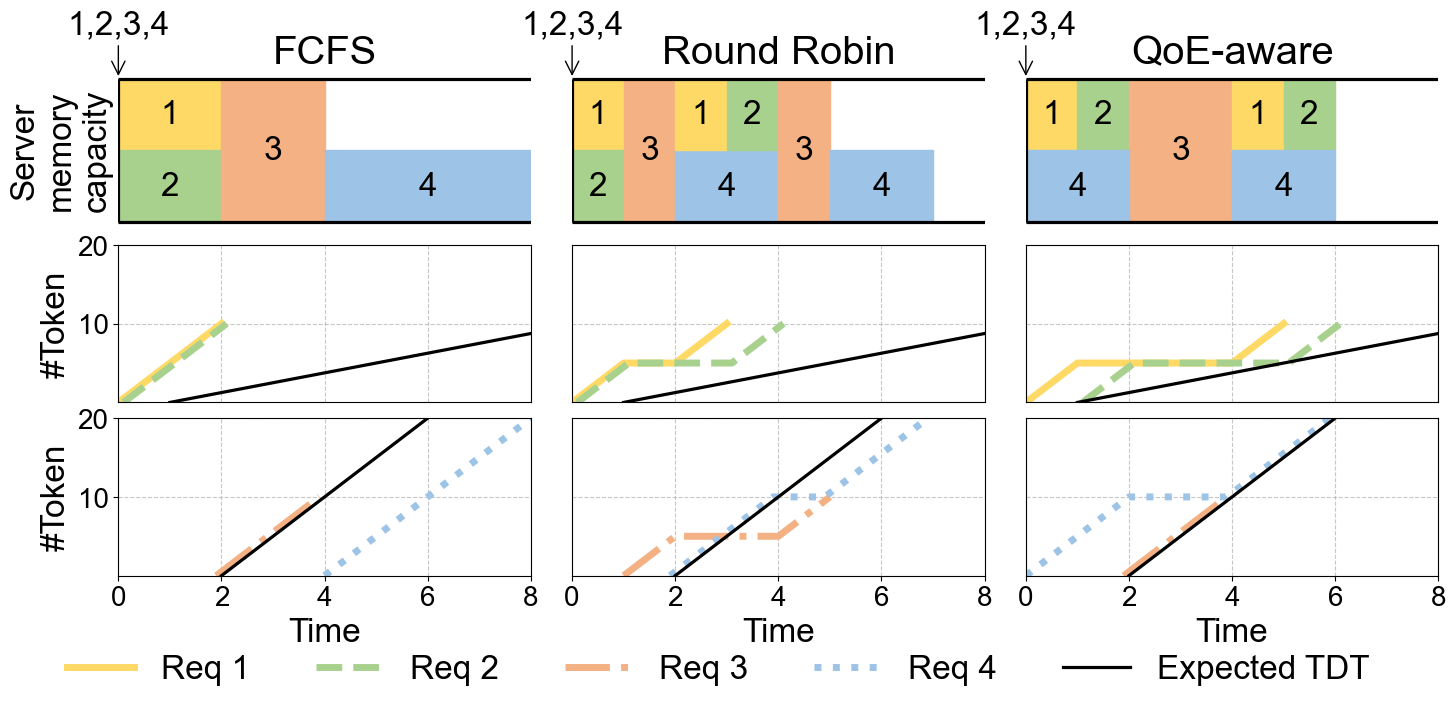

In [9]:
# Set up the figure and subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 7))
plt.subplots_adjust(top=0.9,bottom=0.18, left=0.1, right=0.98, hspace=0.1, wspace=0.1)

# color_list= ['#FFC000', '#70AD47', '#ED7D31', '#4472C4']
color_list= ['#FFD966', '#A9D18E', '#F4B183', '#9DC3E6']
# line_thickness = [1.5, 1.75, 2, 2.25]
line_thickness = [5]*4
line_style= ['-', '--', '-.', ':']
# line_style= ['-', '-', '-', '-']
#TODO: shrink the number on axis/label
rects1 = {
    '1': patches.Rectangle((0, 0.1), 0.4, 0.1, color=color_list[0]),
    '2': patches.Rectangle((0, 0.), 0.4, 0.1, color=color_list[1]),
    '3': patches.Rectangle((0.4, 0.), 0.4, 0.2, color=color_list[2]),
    '4': patches.Rectangle((0.8, 0.), 0.8, 0.1, color=color_list[3]),
}
plot_rect(ax1,rects1,"FCFS", True)

rects2 = {
    '1a': patches.Rectangle((0, 0.1), 0.2, 0.1, color=color_list[0]),
    '2a': patches.Rectangle((0, 0.), 0.2, 0.1, color=color_list[1]),
    '3a': patches.Rectangle((0.2, 0.), 0.2, 0.2, color=color_list[2]),
    '4a': patches.Rectangle((0.4, 0.), 0.4, 0.1, color=color_list[3]),
    '1b': patches.Rectangle((0.4, 0.1), 0.2, 0.1, color=color_list[0]),
    '2b': patches.Rectangle((0.6, 0.1), 0.2, 0.1, color=color_list[1]),
    '3b': patches.Rectangle((.8, 0.), 0.2, 0.2, color=color_list[2]),
    '4b': patches.Rectangle((1, 0.), 0.4, 0.1, color=color_list[3]),
}
plot_rect(ax2,rects2,"Round Robin")
rects3 = {
    '1a': patches.Rectangle((0, 0.1), 0.2, 0.1, color=color_list[0]),
    '2a': patches.Rectangle((0.2, 0.1), 0.2, 0.1, color=color_list[1]),
    '3': patches.Rectangle((0.4, 0.), 0.4, 0.2, color=color_list[2]),
    '4a': patches.Rectangle((0., 0.), 0.4, 0.1, color=color_list[3]),
    #
    '1b': patches.Rectangle((0.8, 0.1), 0.2, 0.1, color=color_list[0]),
    '2b': patches.Rectangle((1, 0.1), 0.2, 0.1, color=color_list[1]),
    '4b': patches.Rectangle((0.8, 0.), 0.4, 0.1, color=color_list[3]),
}

plot_rect(ax3,rects3,"QoE-aware")

x1= [0,1, 2]
y1= [0,1, 2]
req1=(x1,y1)
x2= [0.1,1.1, 2.1]
y2= [0,1, 2]
req2=(x2,y2)
plot_token_t(ax4, (1,0.25), [req1, req2], color_list[:2], line_thickness[:2], line_style[:2], ['Req 1', 'Req 2'], False, True)

x1= [0, 1, 2, 3]
y1= [0, 1, 1, 2]
req1=(x1,y1)
x2= [0.1, 1.1, 2.1, 3.1, 4.1]
y2= [0, 1, 1, 1, 2]
req2=(x2,y2)
plot_token_t(ax5, (1,0.25), [req1, req2], color_list[:2], line_thickness[:2], line_style[:2], ['Req 1', 'Req 2'])

x1= [0, 1, 2, 3,4,5]
y1= [0, 1, 1, 1,1,2]
req1=(x1,y1)
x2= [ 1.1, 2.1, 3.1, 4.1,5.1,6.1]
y2= [0, 1, 1, 1,1, 2]
req2=(x2,y2)
plot_token_t(ax6, (1,0.25), [req1, req2], color_list[:2], line_thickness[:2], line_style[:2], ['Req 1', 'Req 2'])

x1= [1.9,2.9,3.9]
y1= [0, 1,2]
req3=(x1,y1)
x2= [ 4,5,6,7,8]
y2= [0, 1,2,3,4]
req4=(x2,y2)
plot_token_t(ax7, (2,1), [req3, req4], color_list[-2:], line_thickness[-2:], line_style[-2:], ['Req 3', 'Req 4'], True, True)

x1= [1,2,3,4,5]
y1= [0, 1, 1, 1,2]
req3=(x1,y1)
x2= [2,3,4,5,6,7]
x2=[i-0.1 for i in x2]
y2= [0, 1,2, 2, 3,4 ]
req4=(x2,y2)
plot_token_t(ax8, (2,1), [req3, req4], color_list[-2:], line_thickness[-2:], line_style[-2:], ['Req 3', 'Req 4'], True)


x2= [2,3,4, ]
x2=[i-0.1 for i in x2]
y2= [0, 1,2,  ]
req3=(x2,y2)
x1= [0,1,2,3,3.9,4.9,5.9]
y1= [0, 1,2,2,2,3,4]
req4=(x1,y1)
plot_token_t(ax9, (2,1), [req3, req4], color_list[-2:], line_thickness[-2:], line_style[-2:], ['Req 3', 'Req 4'], True)

handles, labels = [], []
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:  # Check to avoid duplicate labels in the legend
            if label == 'Expected TDT':
                if len(labels) < 4:
                    continue
            handles.append(handle)
            labels.append(label)

legend = fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.02))
legend.set_frame_on(False)

fig.savefig(f'new-toy.pdf')

### Fig 5 QoE example

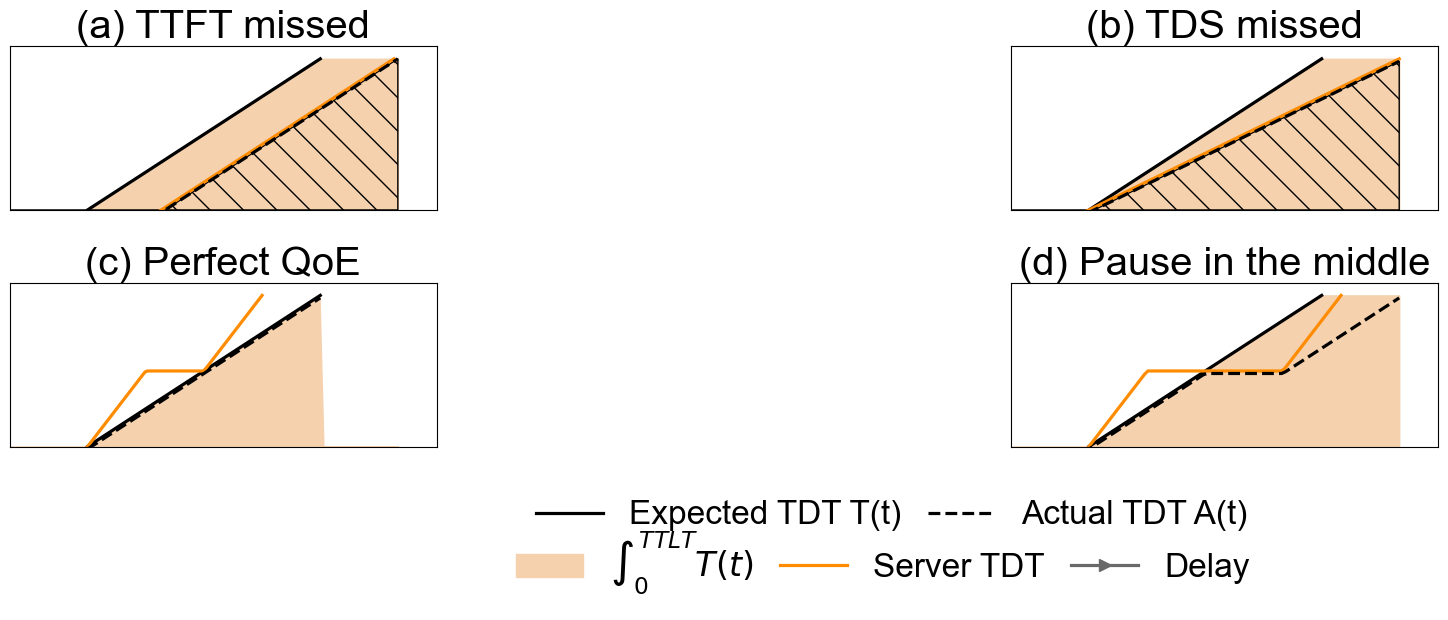

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch

# Define a function to plot the graphs as shown in the example
def plot_qoe_graphs():
    # Create a figure and a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 8))
    # plt.subplots_adjust(top=0.9,bottom=0.3, left=0.1, right=0.98, hspace=0.1, wspace=0.1)
    
    # Common parameters for plots
    time = np.linspace(0, 10, 100)
    time_tdt = np.linspace(2, 8, 100)
    expected_TDT = time_tdt - 2
    pause_time = 5
# last one: server line
    # color_list = ['k', 'orange','#F5D1AE','#ED7D31']
    color_list = ['k', 'orange','#F5D1AE','darkorange']
    #TODO: change color
    # Plot (a) TTFT missed
    s_expected = (time-2)*(time<=8) + 6 * (time>=8)
    user_digest_speed = time - 4
    time_server = np.linspace(0, 9.9, 100)
    server_gen_speed = time_server - 3.9
    axs[0, 0].fill_between(time, s_expected,color=color_list[2], alpha=1, label=r'$S_{expected}$')
    axs[0, 0].fill_between(time, user_digest_speed,color=color_list[2], alpha=1, label=r'$S_{actual}$', edgecolor='black', hatch='\\')
    axs[0, 0].plot(time_tdt, expected_TDT, color=color_list[0], label='Expected TDT')
    axs[0, 0].plot(time_server, server_gen_speed, color=color_list[3], label='Server generation')
    axs[0, 0].plot(time, user_digest_speed, '--',color=color_list[0], label='User digestion')
    axs[0, 0].set_title('(a) TTFT missed')

    # Plot (b) TDS missed
    server_gen_speed = time*0.75 - 1.5
    user_digest_speed = server_gen_speed - 0.1
    axs[0, 1].fill_between(time, s_expected,color=color_list[2], alpha=1, label=r'$S_{expected}$')
    axs[0, 1].fill_between(time, user_digest_speed,color=color_list[2], alpha=1, label=r'$S_{actual}$',edgecolor='black',  hatch='\\')
    axs[0, 1].plot(time_tdt, expected_TDT, color=color_list[0], label='Expected TDT T(t)')
    axs[0, 1].plot(time, server_gen_speed, color=color_list[3], label='Server generation')
    axs[0, 1].plot(time, user_digest_speed, '--', color=color_list[0], label='User digestion')
    axs[0, 1].set_title('(b) TDS missed')

    # Plot (c) Perfect QoE
    time_server = np.linspace(0, 6.5, 100)
    s_expected = (time-2)*(time<=8)
    server_gen_speed = (time_server-2)*2*(time_server<=3.5) + 3*((time_server>3.5) & (time_server<=5)) + (time_server-3.5)*2*((time_server>5) & (time_server<=7.5))
    user_digest_speed = expected_TDT-0.1
    axs[1, 0].fill_between(time, s_expected,color=color_list[2], alpha=1, label=r'$S_{expected}$')
    # axs[1, 0].fill_between(time_tdt, user_digest_speed,color=color_list[2], alpha=1, label=r'$S_{actual}$',edgecolor='black',  hatch='\\')
    axs[1, 0].plot(time_tdt, expected_TDT, color=color_list[0], label='Expected TDT T(t)')
    axs[1, 0].plot(time_server, server_gen_speed, color=color_list[3], label='Server TDT')
    axs[1, 0].plot(time_tdt, user_digest_speed, '--', color=color_list[0], label='Actual TDT A(t)')
    axs[1, 0].set_title('(c) Perfect QoE')
    # axs[1, 0].annotate('Pause', xy=(0, 0), xytext=(0.5, 0.5), textcoords='data', arrowprops=dict(arrowstyle='->', color='black'), label='Delay')
    # Plot (d) Pause in the middle
    s_expected = (time-2)*(time<=8) + 6 * (time>=8)
    time_server = np.linspace(0, 8.5, 100)
    server_gen_speed = (time_server-2)*2*(time_server<=3.5) + 3*((time_server>3.5) & (time_server<=7)) + (time_server-5.5)*2*((time_server>7) & (time_server<=8.5))
    user_digest_speed = ((time-2)*(time<=5) + 3*((time>5) & (time<=7)) + (time-4)*((time>7) & (time<=10)))-0.1
    axs[1, 1].fill_between(time, s_expected,color=color_list[2], alpha=1, label=r'$\int_{0}^{TTLT}T(t)$')
    # axs[1, 1].fill_between(time, user_digest_speed,color=color_list[2], alpha=1, label=r'$S_{actual}$',edgecolor='black',  hatch='\\')
    axs[1, 1].plot(time_tdt, expected_TDT, color='k', label='Expected TDT T(t)')
    axs[1, 1].plot(time_server, server_gen_speed, color=color_list[3], label='Server TDT')
    axs[1, 1].plot(time, user_digest_speed, '--', color=color_list[0], label='Actual TDT A(t)')
    axs[1, 1].set_title('(d) Pause in the middle')
    # axs[1, 1].annotate('Pause', xy=(0, 0), xytext=(1.5, 1.5), textcoords='data', arrowprops=dict(arrowstyle='->', color='black'), label='Delay')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        # ax.label_outer()
        ax.set_xticks([])
        ax.set_yticks([])
        # ax.set_xlabel("Time")
        # ax.set_ylabel("#Tokens")
        ax.set_xlim(0,11)
        ax.set_ylim(0,6.5)
        # ax.legend()
    handle1, label1 = [],[]
    handle2, label2 = [],[]
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label == 'Expected TDT T(t)' or label == 'Actual TDT A(t)':
            if label not in label1:  # Check to avoid duplicate labels in the legend
                handle1.append(handle)
                label1.append(label)
        else:
            if label not in label2:  # Check to avoid duplicate labels in the legend
                handle2.append(handle)
                label2.append(label)

     
    # Adjusting the legend to be at the bottom of the figure
    legend = ax.legend(handle1, label1, loc='lower center', bbox_to_anchor=(-.28, -0.7), ncol=2, columnspacing=0.8)
    legend.set_frame_on(False)
    ax.add_artist(legend)
    
    custom_lines = [
        Line2D([0], [1], color='dimgray', linestyle='-', marker='>',  label='Delay'),
    ]
    # arrow = FancyArrowPatch((0, 0), (1, 0), color='dimgray', arrowstyle='->',  label='Delay')
    # handle2.append(arrow)

    handle2.append(custom_lines[0])
    label2.append('Delay')
    legend = ax.legend(handle2, label2, loc='lower center', bbox_to_anchor=(-.3, -1.1), ncol=3,columnspacing=0.8)
    
    legend.set_frame_on(False)
    fig.tight_layout() 
    fig.savefig(f'qoe-example.pdf', bbox_inches='tight')

plot_qoe_graphs()

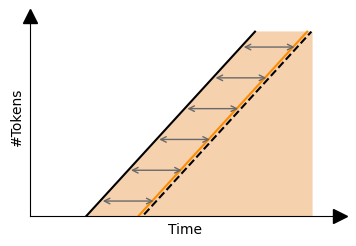

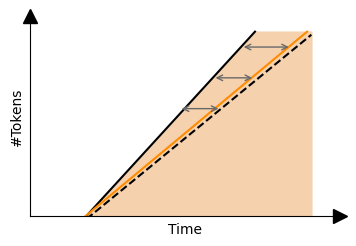

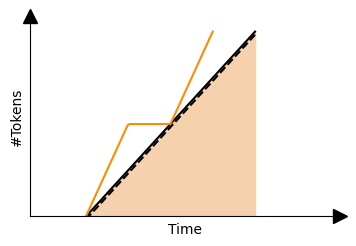

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_qoe_graphs_individual():
    # Common parameters for plots
    time = np.linspace(0, 10, 100)
    time_tdt = np.linspace(2, 8, 100)
    expected_TDT = time_tdt - 2
    # color_list = ['k', 'orange','#F5D1AE','#ED7D31']
    color_list = ['k', 'orange','#F5D1AE','darkorange']

    handles, labels = [], []
    # Define function to create each plot
    def create_subplot(time, time_server, s_expected, server_gen_speed, user_digest_speed, filename, arrows = None):
        fig, ax = plt.subplots(figsize=(4, 2.6))
        ax.fill_between(time, s_expected, color=color_list[2], alpha=1, label='S_expected')
        # ax.fill_between(time, user_digest_speed, color=color_list[2], alpha=1, label='S_actual', edgecolor='black', hatch='\\')
        ax.plot(time_tdt, expected_TDT, color=color_list[0], label='User expected TDT')
        ax.plot(time_server, server_gen_speed, color=color_list[3], label='Server TDT speed')
        ax.plot(time, user_digest_speed, '--', color=color_list[0], label='User actual TDT')
        # ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel("Time")
        ax.set_ylabel("#Tokens")
        ax.set_xlim(0, 11)
        ax.set_ylim(0, 6.5)
            # ax.legend()
            # Removing the top and right spines to create axes with arrows but not boxes
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        
        # Moving bottom spine to zero position
        ax.spines['bottom'].set_position(('data',0))
        # Adding arrow to the bottom spine
        ax.spines['bottom'].set_capstyle('projecting')
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        
        # Moving left spine to zero position
        ax.spines['left'].set_position(('data',0))
        # Adding arrow to the left spine
        ax.spines['left'].set_capstyle('projecting')
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)
        
        # Hiding the axes ticks
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none')
        
        if arrows:
            for arrow in arrows:
                ax.annotate('', xytext=(arrow[0], arrow[1]), xy=(arrow[2], arrow[3]), arrowprops=dict(arrowstyle='<->', color='dimgray'))
        
        # Hiding the axes tick labels
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        # ax.legend()
        fig.savefig(f'{filename}.pdf')
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in labels:  # Check to avoid duplicate labels in the legend
                handles.append(handle)
                labels.append(label)
    
    # Plot definitions for each subplot
    time_server = np.linspace(0, 9.85, 100)
    arrows_a = [(2.5,.5,4.5,.5), (3.5,1.5,5.5,1.5), (4.5,2.5,6.5,2.5), (5.5,3.5,7.5,3.5), (6.5,4.5,8.5,4.5), (7.5,5.5,9.5,5.5)]
    create_subplot(time,time_server, (time-2)*(time<=8) + 6 * (time>=8), time_server - 3.85, time - 4, 'TTFT_missed', arrows_a)
    arrows_b = [ (5.3,3.5,6.8,3.5), (6.5,4.5,8,4.5), (7.5,5.5,9.3,5.5)]
    create_subplot(time,time_server, (time-2)*(time<=8) + 6 * (time>=8), time*0.75 - 1.5, time*0.75 - 1.6, 'TDS_missed', arrows_b)
    time_server = np.linspace(0, 6.5, 100)
    server_gen_speed = (time_server-2)*2*(time_server<=3.5) + 3*((time_server>3.5) & (time_server<=5)) + (time_server-3.5)*2*((time_server>5) & (time_server<=7.5))
    create_subplot(time_tdt,time_server, (time_tdt-2), server_gen_speed, expected_TDT-0.1, 'Perfect_QoE')
    time_server = np.linspace(0, 8.15, 100)
    server_gen_speed = (time_server-2)*2*(time_server<=3.5) + 3*((time_server>3.5) & (time_server<=7)) + (time_server-5.7)*2.45*((time_server>7) & (time_server<=8.2))
    user_digest_speed = ((time-2)*(time<=5) + 3*((time>5) & (time<=7)) + (time-4)*((time>7) & (time<=10)))-0.1
    arrows_d = [  (5.5,3.5,7.5,3.5), (6.5,4.5,8.5,4.5), (7.5,5.5,9.5,5.5)]
    create_subplot(time,time_server, (time-2)*(time<=8) + 6 * (time>=8), server_gen_speed, user_digest_speed, 'Pause_in_middle', arrows_d)


plot_qoe_graphs_individual()

### Fig 7 Q-serve-preempt

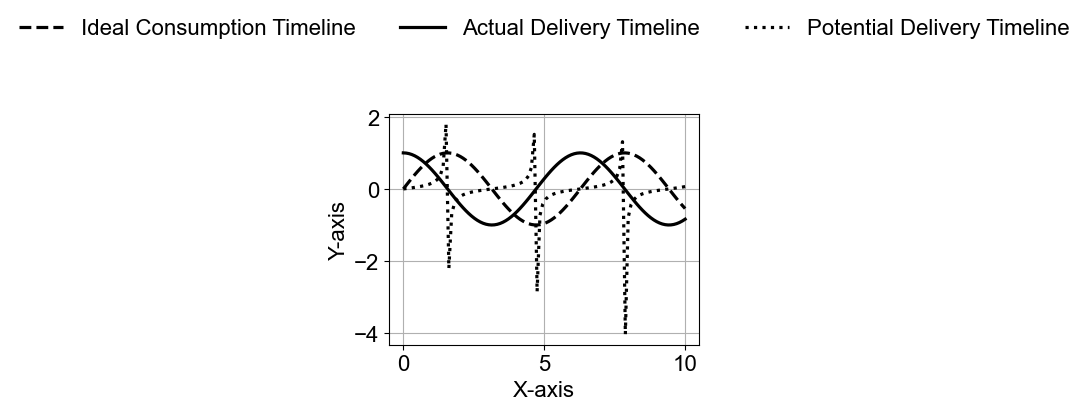

In [70]:
# Adjust the plot to place the legend on top, outside the figure
plt.figure(figsize=(4,3))
plt.rcParams.update({'font.size': 16})

# Data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x) / 10  # Scaled tangent to avoid divergence

plt.plot(x, y1, linestyle='--', label='Ideal Consumption Timeline', color='black')
plt.plot(x, y2, linestyle='-', label='Actual Delivery Timeline'  , color='black')
plt.plot(x, y3, linestyle=':', label='Potential Delivery Timeline', color='black')

# Labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis') 

# Place the legend on top, outside the figure
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3, frameon=False)

# Grid and display
plt.grid(True)
plt.savefig('q_serve_wait_legend.pdf', bbox_inches='tight') 
plt.show()


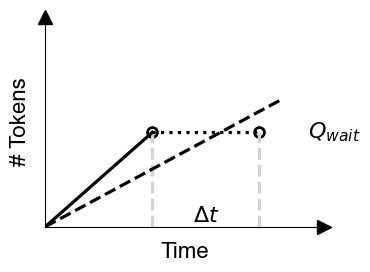

In [ ]:
color = 'black'

plt.rcParams.update({'font.size': 16})
# First subplot: Q_serve,i(B)
def plot_first_subplot():
    fig, ax = plt.subplots(figsize=(4.3,3))
    time_serve = np.linspace(0, 10.5, 100)
    expected_serve = time_serve * 1.1
    t1 = np.linspace(0, 5, 100)
    actual_serve = t1 * 1.8
    t2 = np.linspace(5, 10, 100)
    s10 = t2 * 1.8
    s30 = t2 * 0.7 + 5.5
    s50 = t2 * 0.2 + 8

    ax.plot([5, 5], [0, 9], linestyle='--', color='lightgrey')
    ax.plot([10, 10], [0, 18], linestyle='--', color='lightgrey')
    ax.plot(time_serve, expected_serve, label='Expected',linestyle='--', color='black')
    ax.plot(t1, actual_serve, label='Actual', linestyle='-', color=color)
    ax.plot(t2, s10, label='Future', linestyle=':', color=color)
    ax.plot(t2, s30, linestyle=':', color=color)
    ax.plot(t2, s50, linestyle=':', color=color)
    ax.scatter([5, 10, 10, 10], [9, 18, 12.5, 10], s=50, facecolors='white', edgecolors='k', linewidths=2, marker='o')
    # Annotations
    ax.text(13.5, 10, r'$Q_{serve}(50)$', horizontalalignment='center', verticalalignment='center')
    ax.text(13.5, 12.5, r'$Q_{serve}(30)$', horizontalalignment='center', verticalalignment='center')
    ax.text(13.5, 18, r'$Q_{serve}(10)$', horizontalalignment='center', verticalalignment='center')
    ax.text(7.5, 1, r'$\Delta t$', horizontalalignment='center', verticalalignment='center')
    ax.set_xlabel('Time')
    ax.set_ylabel('# Tokens')
    ax.set_xlim(0, 13)
    ax.set_ylim(0, 20)
    # Removing the top and right spines to create axes with arrows but not boxes
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    # Moving bottom spine to zero position
    ax.spines['bottom'].set_position(('data',0))
    # Adding arrow to the bottom spine
    ax.spines['bottom'].set_capstyle('projecting')
    ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    
    # Moving left spine to zero position
    ax.spines['left'].set_position(('data',0))
    # Adding arrow to the left spine
    ax.spines['left'].set_capstyle('projecting')
    ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    
    # Hiding the axes ticks
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    
    # Hiding the axes tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # ax.legend()
    plt.tight_layout()
    fig.savefig(f'Q_serve.pdf')

# Second subplot: Q_wait,i
def plot_second_subplot():
    fig, ax = plt.subplots(figsize=(4,3))
    time_serve = np.linspace(0, 11, 100)
    expected_serve = time_serve * 1.1
    t1 = np.linspace(0, 5, 100)
    actual_serve = t1 * 1.8
    t2 = np.linspace(5, 10, 100)
    wait = [9] * 100

    ax.plot([5, 5], [0, 9], linestyle='--', color='lightgrey')
    ax.plot([10, 10], [0, 9], linestyle='--', color='lightgrey')
    ax.plot(time_serve, expected_serve, label='Expected', linestyle='--', color='k')
    ax.plot(t1, actual_serve, linestyle='-', color=color)
    ax.plot(t2, wait, linestyle=':', color=color, label='Future')
    ax.scatter([5, 10], [9, 9], s=50, facecolors='white', edgecolors='k', linewidths=2, marker='o')
    #Annotations
    ax.text(13.5, 9, r'$Q_{wait}$', horizontalalignment='center', verticalalignment='center')
    ax.text(7.5, 1, r'$\Delta t$', horizontalalignment='center', verticalalignment='center')
    
    ax.set_xlabel('Time')
    ax.set_ylabel('# Tokens')
    ax.set_xlim(0, 13)
    ax.set_ylim(0, 20)
    # Removing the top and right spines to create axes with arrows but not boxes
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    # Moving bottom spine to zero position
    ax.spines['bottom'].set_position(('data',0))
    # Adding arrow to the bottom spine
    ax.spines['bottom'].set_capstyle('projecting')
    ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    
    # Moving left spine to zero position
    ax.spines['left'].set_position(('data',0))
    # Adding arrow to the left spine
    ax.spines['left'].set_capstyle('projecting')
    ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    
    # Hiding the axes ticks
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    
    # Hiding the axes tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
#     ax.legend()
    plt.tight_layout()
    fig.savefig(f'Q_wait.pdf')

# Execute the functions to create and save plots
plot_first_subplot()
plot_second_subplot()


### Client Buffer

In [12]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Generate some data points for x

# Plot the line y=x
y =    [0.0, 0.2644484043121338, 0.31870079040527344, 0.37123751640319824, 0.42342138290405273, 0.4764211177825928, 0.5293347835540771, 0.5811166763305664, 0.6346497535705566, 0.6875312328338623, 0.73905348777771, 0.7927870750427246, 0.8460803031921387, 0.8983900547027588, 0.950850248336792, 1.0030937194824219, 1.0554780960083008, 1.1074001789093018, 1.1611249446868896, 1.214198350906372, 1.2668516635894775, 1.3215579986572266, 1.3747117519378662, 1.4290452003479004, 1.4811718463897705, 1.5368030071258545, 1.5851962566375732, 1.6337604522705078, 1.684621810913086, 1.7341198921203613, 1.7839317321777344, 1.834000587463379, 1.8841145038604736, 1.9347684383392334, 1.9839041233062744, 2.033694267272949, 2.084892511367798, 2.134355306625366, 2.1841835975646973, 2.232971429824829, 2.2817509174346924, 2.331300735473633, 2.3813960552215576, 2.4335708618164062, 2.4829249382019043, 2.5329318046569824, 2.5836968421936035, 2.6342082023620605, 2.685338020324707, 2.7349677085876465, 2.786302328109741, 2.8372890949249268, 2.89133882522583, 2.9551842212677, 3.0782310962677, 3.127190589904785, 3.1768529415130615, 3.226569652557373, 3.2767252922058105, 3.3264715671539307, 3.378923177719116, 3.430767297744751, 3.476815700531006, 3.5249643325805664, 3.5756642818450928, 3.6269869804382324, 3.6785969734191895, 3.729146957397461, 3.7801599502563477, 3.830235481262207, 3.885206460952759, 3.9377574920654297, 3.9889345169067383, 4.0399253368377686, 4.091241836547852, 4.142197847366333, 4.19888973236084, 18.584244966506958, 18.63931918144226, 18.693372011184692, 18.747600317001343, 18.812041521072388, 18.86516571044922, 18.919652462005615, 18.974390506744385, 19.02750849723816, 19.08543610572815, 19.13785457611084, 19.192582607269287, 19.246132373809814, 19.300373315811157, 19.357534646987915, 19.41252565383911, 19.46761465072632, 19.52255940437317, 19.57678532600403, 19.630303382873535, 19.685672521591187, 19.74120569229126, 19.796361684799194, 19.8502299785614, 19.903095722198486, 19.95663571357727, 20.009281635284424, 20.063119888305664, 20.11596965789795, 20.173097372055054, 20.227752208709717, 20.288177490234375, 20.421466588974, 20.476258277893066, 20.532106161117554, 20.584787607192993, 20.64569902420044, 20.77181363105774, 20.823373794555664, 20.877368688583374, 20.966794967651367, 21.02109932899475, 21.155808448791504, 21.207931995391846, 21.262121200561523, 21.318182468414307, 21.383052110671997, 21.509653329849243, 21.563549041748047, 21.617269039154053, 21.669464826583862, 21.73719358444214, 21.865957021713257, 21.918617963790894, 21.979193210601807, 22.05140495300293, 22.105875253677368, 22.167227745056152, 22.221199989318848, 22.274949073791504, 22.328491926193237, 22.382081985473633, 22.435351610183716, 22.488133192062378, 22.54305672645569, 22.596625804901123, 22.649171352386475, 22.703455924987793, 22.756541967391968, 22.810527086257935, 22.864035844802856, 22.91715359687805, 22.971079111099243, 23.025012016296387, 23.07892894744873, 23.13228154182434, 23.18817925453186, 23.242366790771484, 23.29576301574707, 23.35009503364563, 23.403778314590454, 23.45712399482727, 23.511434316635132, 23.564078092575073, 23.61734414100647, 23.670013666152954, 23.723449230194092, 23.778292417526245, 23.832857608795166, 23.886465787887573, 23.940610647201538, 23.993245363235474, 24.04735517501831, 24.101349115371704, 24.15698790550232, 24.230483770370483, 24.28537631034851, 24.33960199356079, 24.39522695541382, 24.45059084892273, 24.50645089149475, 24.562068700790405, 24.617408514022827, 24.67206311225891, 24.72747802734375, 24.782461404800415, 24.83691668510437, 24.892199993133545, 24.946979999542236, 25.002034664154053, 25.056904315948486, 25.11119294166565, 25.16930389404297, 25.22425889968872, 25.278481006622314, 25.33417844772339, 25.38856601715088, 25.445439100265503, 25.498509883880615, 25.553733587265015, 25.60774564743042, 25.6616792678833, 25.7162868976593, 25.77038836479187, 25.82517409324646, 25.879368543624878, 25.938369750976562, 25.993099212646484, 26.047520875930786, 26.101675987243652, 26.15593409538269, 26.20941686630249, 26.26334023475647, 26.317586660385132, 26.3730366230011, 26.427546501159668, 26.481577157974243, 26.536362171173096, 26.59119701385498, 26.651740789413452, 26.705116748809814, 26.760657787322998, 26.815362691879272, 26.870508193969727, 26.924920320510864, 26.98167872428894, 27.03633737564087, 27.091410160064697, 27.145990133285522, 27.201027393341064, 27.254996061325073, 27.309513807296753, 27.364240884780884, 27.418957948684692, 27.474806547164917, 27.53251338005066, 27.590914011001587, 27.647451639175415, 27.702051639556885, 27.757487058639526, 27.81410837173462, 27.883631229400635, 27.9389910697937, 27.994861364364624, 28.049808263778687, 28.105414390563965, 28.16076946258545, 28.215137004852295, 28.27103018760681, 28.326946258544922, 28.382823944091797, 28.439309120178223, 28.494550466537476, 28.550193548202515, 28.604962825775146, 28.660572052001953, 28.725491285324097, 28.780985832214355, 28.838228702545166, 28.89380955696106, 28.94889998435974, 29.003258228302002, 29.058659076690674, 29.113554000854492, 29.16751527786255, 29.2218177318573, 29.275195598602295, 29.330005407333374, 29.385558366775513, 29.440696001052856, 29.495007276535034, 29.549872398376465, 29.60498571395874, 29.660120487213135, 29.714629888534546, 29.769941568374634, 29.825662851333618, 29.880558967590332, 29.935288190841675, 29.99117684364319, 30.07852554321289, 30.135063409805298, 30.189195156097412, 30.24858570098877, 30.314919471740723, 30.369575023651123, 30.4232656955719, 30.47732949256897, 30.53447437286377, 30.58935236930847, 30.645745277404785, 30.696444272994995, 30.744497060775757, 30.7937433719635, 30.847127199172974, 30.90136480331421, 30.95526647567749, 31.01121234893799, 31.06601905822754, 31.119609594345093, 31.17314600944519, 31.227880001068115, 31.287527084350586, 31.34228825569153, 31.39756488800049, 31.449249744415283, 31.503031253814697, 31.556398391723633, 31.609501123428345, 31.663938760757446, 31.718099355697632, 31.771275520324707, 31.824162006378174, 31.88542079925537, 31.93865203857422, 31.992380380630493, 32.056337118148804, 32.1935818195343, 32.24642014503479, 32.30162763595581, 40.20069169998169, 40.25440788269043, 40.306936740875244, 40.361368894577026, 40.41543793678284, 40.468801498413086, 40.522491216659546, 40.574836015701294, 40.62721228599548, 40.6801598072052, 40.73383188247681, 40.78642272949219, 40.83841156959534, 40.89163565635681, 40.96046733856201, 41.01461458206177, 41.0682418346405, 41.12147092819214, 41.17489814758301, 41.22739052772522, 41.2813024520874, 41.33739495277405, 41.391388177871704, 41.44533586502075, 41.53843092918396, 41.58963322639465, 41.642497062683105, 41.69558930397034, 41.74840831756592, 41.802820682525635, 41.86537051200867, 41.92048215866089, 41.97823190689087, 42.030900716781616, 42.084555864334106, 42.137638092041016, 42.194246768951416, 42.2506799697876, 42.30449652671814, 42.35849714279175, 42.41318678855896, 42.46705627441406, 42.520910024642944, 42.574641704559326, 42.634117603302, 42.69669771194458, 42.74986433982849, 42.80332636833191, 42.85614013671875, 42.908875942230225, 42.962159633636475, 43.015992879867554, 43.06801795959473, 43.12057709693909, 43.1738805770874, 43.22377347946167, 43.27471160888672, 43.323253870010376, 43.37378120422363, 43.42242360115051, 43.472275495529175, 43.52277135848999, 43.60935163497925, 43.66264796257019, 43.71211123466492, 43.7628059387207, 43.814430713653564, 43.86375117301941, 43.91490125656128, 43.964898109436035, 44.022539138793945, 44.072057485580444, 44.122116804122925, 44.17161202430725, 44.22296166419983, 44.273749351501465, 44.3233540058136, 44.38298964500427, 44.43352222442627, 44.48334550857544, 44.53429388999939, 44.583415508270264, 44.63337063789368, 44.684433460235596, 44.73455095291138, 44.795086145401, 44.916592836380005, 44.96688151359558, 45.01748728752136, 45.06671118736267, 45.117326498031616, 45.16866326332092, 45.22405767440796, 45.29153275489807, 45.345925092697144, 45.395447969436646, 45.44470477104187, 45.49359059333801, 45.54339551925659, 45.59350562095642, 45.642435789108276, 45.69299936294556, 45.742430448532104, 45.79319715499878, 45.84307885169983, 45.89435434341431, 45.95031929016113, 46.0032799243927, 46.05550575256348, 46.10883641242981, 46.16279864311218, 46.21616768836975, 46.268030643463135, 46.321256160736084, 46.37455701828003, 46.427902698516846, 46.48072099685669, 46.53468108177185, 46.58657956123352, 46.63967275619507, 46.69282865524292, 46.74510860443115, 46.7979052066803, 46.849791049957275, 46.90282845497131, 46.95677471160889, 47.00900745391846, 47.0624213218689, 47.11539316177368, 47.16875982284546, 47.22100114822388, 47.27455377578735, 47.325966596603394, 47.37868046760559, 47.43367648124695, 47.4856173992157, 47.53854203224182, 47.591532707214355, 47.64484763145447, 47.70183181762695, 47.7605664730072, 47.81348633766174, 47.86697268486023, 47.92078495025635, 47.97858643531799, 48.030487298965454, 48.08364963531494, 48.137869119644165, 48.194658517837524, 48.25154519081116, 48.30547833442688, 48.359721660614014, 48.41255784034729, 48.46535301208496, 48.518574476242065, 48.57215690612793, 48.62556195259094, 48.67943525314331, 48.73237943649292, 48.78566360473633, 48.83929967880249, 48.89395594596863, 48.948153495788574, 49.00214457511902, 49.05531668663025, 49.10873508453369, 49.1622109413147, 49.21538233757019, 49.26981449127197, 49.32264947891235, 49.376235008239746, 49.429696559906006, 49.48248791694641, 49.53969192504883, 49.590715408325195, 49.64340615272522, 49.697099924087524, 49.74924659729004, 49.801154375076294, 49.854910373687744, 49.91001272201538, 49.96452498435974, 50.01739263534546, 50.06944513320923, 50.122833251953125, 50.17619872093201, 50.229719400405884, 50.28317165374756, 50.33621859550476, 50.38909316062927, 50.445889949798584, 50.50339603424072, 50.55808186531067, 50.611438035964966, 50.664344787597656, 50.71752643585205, 50.771432876586914, 50.82419300079346, 50.878453731536865, 50.93243217468262, 50.98653841018677, 51.04022264480591, 51.093342781066895, 51.146607398986816, 51.200162410736084, 51.25315260887146, 51.30521297454834, 51.36000728607178, 51.41352033615112, 51.46791648864746, 51.519514083862305, 51.5756311416626, 51.627691984176636, 51.68036937713623, 51.73250913619995, 51.78527331352234, 51.83641076087952, 51.8872857093811, 51.939631938934326, 51.9980845451355, 52.05063056945801, 52.10634255409241, 52.15716552734375, 52.20949983596802, 52.26135993003845, 52.313679456710815, 52.36494421958923, 52.41711616516113, 52.47207450866699, 52.523900508880615, 52.574427366256714, 52.62591290473938, 52.67727613449097, 52.72922968864441, 52.78175616264343, 52.83416485786438, 52.887956619262695, 52.93661379814148, 52.989581823349, 53.04107069969177, 53.09295177459717, 53.14464998245239, 53.19658160209656, 53.249162435531616, 53.30125975608826, 53.35606646537781, 53.41151475906372, 53.46349835395813, 53.515790700912476, 53.567822217941284, 53.61981272697449, 53.67185139656067, 53.72439479827881, 53.779327392578125, 53.83535718917847, 53.8874249458313, 53.93919062614441, 53.99266028404236, 54.04555892944336, 54.09822344779968, 54.154998540878296, 54.20931339263916, 54.26244282722473, 54.31575870513916, 54.36893916130066, 54.42134976387024, 54.47348070144653, 54.52578115463257, 54.578471660614014, 54.63154602050781, 54.68501257896423, 54.73808765411377, 54.81352257728577, 54.866867780685425, 54.921786069869995, 54.97806477546692, 55.03134512901306, 55.083486795425415, 55.14749264717102, 55.20018458366394, 55.25201869010925, 55.304287910461426, 55.35682916641235, 55.40896677970886, 55.462196588516235, 55.51483488082886, 55.56666326522827, 55.619051456451416, 55.67179489135742, 55.72350335121155, 55.77587080001831, 55.82744097709656, 55.88021802902222, 55.93250751495361, 55.98812913894653, 56.03939962387085, 56.0925178527832, 56.146634578704834, 56.19886803627014, 56.253732681274414, 56.30526304244995, 56.3568811416626, 56.409913063049316, 56.46217465400696, 56.514098167419434, 56.566866636276245, 56.619030714035034, 56.6710844039917, 56.723368406295776, 56.7755286693573, 56.82818412780762, 56.87922191619873, 56.93089246749878, 56.983582973480225, 57.0356662273407, 57.092222452163696, 57.14687514305115, 57.1997926235199, 57.253316164016724, 57.305633544921875, 57.357996225357056, 57.41116404533386, 57.46371054649353, 57.517685651779175, 57.56994342803955, 57.62279534339905, 57.675750494003296, 57.72823095321655, 57.78147625923157, 57.83491039276123, 57.88740634918213, 57.94019317626953, 57.995251417160034, 58.04425930976868, 58.09345054626465, 58.14211654663086, 58.1905357837677, 58.240442991256714, 58.290210485458374, 58.33924436569214, 58.3882372379303, 58.436065435409546, 58.48586106300354, 58.535669803619385, 58.58490610122681, 58.63328409194946, 58.68321490287781, 58.73202133178711, 58.780351400375366, 58.82833528518677, 58.87677001953125, 58.92445611953735, 58.97107553482056, 59.01952624320984, 59.07040286064148, 59.11686110496521, 59.17190384864807, 59.220475912094116, 59.26781940460205, 59.319303035736084, 59.36818289756775, 59.4155650138855, 59.4687705039978, 59.52565240859985, 59.57687830924988, 59.62495040893555, 59.675201654434204, 59.72395038604736, 59.772297620773315, 59.820897579193115, 59.868460178375244, 59.916210889816284, 59.96382284164429, 60.01339793205261, 60.061517000198364, 60.11014699935913, 60.15762424468994, 60.20569849014282, 60.253371715545654, 60.30050325393677, 60.35011410713196, 60.396075963974, 60.441230058670044, 60.48700308799744, 60.53352880477905, 60.57820916175842, 60.62557101249695, 60.671147108078, 60.71697425842285, 60.76275277137756, 60.80939197540283, 60.854787826538086, 60.89989447593689, 60.945029735565186, 60.99101424217224, 61.035627126693726, 61.081665992736816, 61.126978635787964, 61.17214870452881, 61.21989989280701, 61.26537537574768, 61.31092715263367, 61.356621503829956, 61.40242600440979, 61.44812369346619, 61.494110107421875, 61.53863859176636, 61.5836238861084, 61.63623666763306, 61.681166648864746, 61.72711110115051, 61.772743225097656, 61.81808114051819, 61.863144636154175, 61.90888953208923, 61.95498085021973, 62.000683307647705, 62.046244621276855, 62.09303259849548, 62.138962268829346, 62.183356046676636, 62.228673219680786, 62.2746479511261, 62.3195743560791, 62.36484909057617, 62.41080355644226, 62.4562406539917, 62.50057768821716, 62.545981884002686, 62.59129309654236, 62.63688898086548, 62.682286500930786, 62.72793483734131, 62.77423334121704, 62.82076048851013, 62.867618560791016, 62.913424253463745, 62.95927405357361, 63.00614666938782, 63.050962924957275, 63.09653186798096, 63.14230513572693, 63.187326431274414, 63.23259162902832, 63.28428840637207, 63.329505443573, 63.37528467178345, 63.4199001789093, 63.46433234214783, 63.50899052619934, 63.555700063705444, 63.600507736206055, 63.6682391166687, 63.749202251434326, 63.79675030708313, 63.8431031703949, 63.88975477218628, 63.93701648712158, 63.98389530181885, 64.0314040184021, 64.07829117774963, 64.1245653629303, 64.17190599441528, 64.2201337814331, 64.26669144630432, 64.31250596046448, 64.35827660560608, 64.4065477848053, 64.45104551315308, 64.49698305130005, 64.54314541816711, 64.58827304840088, 64.63276743888855, 64.67759299278259, 64.72102093696594, 64.76597285270691, 64.82757234573364, 64.87401103973389, 64.9234893321991, 64.9703733921051, 65.01742053031921, 65.06271624565125, 65.10712480545044, 65.15463709831238, 65.1986951828003, 65.24314785003662, 65.2881371974945, 65.33240675926208, 65.37704086303711, 65.42184972763062, 65.46658158302307, 65.51114177703857, 65.55615305900574, 65.60101652145386, 65.6468768119812, 65.69129419326782, 65.73527407646179, 65.7791497707367, 65.82322812080383, 65.86795353889465, 65.91207075119019, 65.95666146278381, 66.00059819221497, 66.04699540138245, 66.09079909324646, 66.13658881187439, 66.18088698387146, 66.22556018829346, 66.27058124542236, 66.31499195098877, 66.3598084449768, 66.40587639808655, 66.45057964324951, 66.49481844902039, 66.53878617286682, 66.58305144309998, 66.62723445892334, 66.671541929245, 66.71544051170349, 66.76110792160034, 66.80710816383362, 66.85225367546082, 66.89794158935547, 66.94254684448242, 66.9880211353302, 67.03271150588989, 67.07778263092041, 67.12476658821106, 67.16987562179565, 67.22375392913818, 67.26913976669312, 67.31445789337158, 67.35929322242737, 67.40556049346924, 67.4505558013916, 67.49558782577515, 67.54046201705933, 67.58602094650269, 67.63114285469055, 67.67682600021362, 67.72217178344727, 67.76752305030823, 67.81390118598938, 67.86003160476685, 67.9063310623169, 67.95386338233948, 67.99959135055542, 68.04666471481323, 68.09351539611816, 68.13971519470215, 68.18511509895325, 68.2330436706543, 68.27645087242126, 68.32001876831055, 68.36394715309143, 68.40819597244263, 68.46246457099915, 68.53557705879211, 68.58218836784363, 68.62844014167786, 68.6747682094574, 68.71973657608032, 68.76651191711426, 68.81245040893555, 68.85975384712219]

temp_y = []
for i in y:
    if i < 5:
        temp_y.append(i)
    else:
        temp_y.append(i-2)

y = temp_y

# # plt.figure(figsize=(10, 5), constrained_layout=True)
# fig, axs = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

# Create a figure
fig = plt.figure(figsize=(10, 7))

color='orange'

# Set up GridSpec
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1], hspace=0.05) 
# Add subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax = ax1
x = np.arange(1, len(y) + 1)
ax.plot(y, x,label='Client receives',color=color)
x = np.linspace(0, 50, 100)
ax.plot(x, 5 * (x - 1), linestyle='--', color='black', label='User digests')
# plt.xlabel('Time (s)')
ax.set_xticks([])
ax.set_ylabel('#Tokens')
ax.set_xlim(0, 50)
ax.set_ylim(0, 250)
# Annotations
ax.text(10, 100, "Generation\nPause", horizontalalignment='center', verticalalignment='center')
ax.text(36, 50, "Network\nFluctuation", horizontalalignment='center', verticalalignment='center')



# Draw rectangle on the main plot to indicate zoom area
rect = Rectangle((18, 105), 1, 15, linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect)


# # Connection from main plot rectangle to inset
# con1 = ConnectionPatch(xyA=(18, 105), coordsA='data', xyB=(-0.16, 0.46), coordsB='axes fraction',
#                        axesA=ax1, axesB=ax_inset, color='k', linestyle="--")
# ax.add_artist(con1)

# con2 = ConnectionPatch(xyA=(19, 120), coordsA='data', xyB=(0.8,1.47), coordsB='axes fraction',
#                        axesA=ax1, axesB=ax_inset, color='k', linestyle="--")
# ax.add_artist(con2)

# Connection from main plot rectangle to inset
# Add an inset
x = np.arange(1, len(y) + 1)
ax_inset = inset_axes(ax1, width='7%', height='42%', loc='lower center',
                      bbox_to_anchor=(-0.2, 0, 1.5, 0.9), bbox_transform=ax1.transAxes)
ax_inset.plot(y, x, markersize=3, marker='o',color=color)
ax_inset.set_xlim(18, 19)
ax_inset.set_ylim(105, 120)
ax_inset.xaxis.set_visible(False)
ax_inset.yaxis.set_visible(False)


con1 = ConnectionPatch(xyA=(18, 105), coordsA='data', xyB=(0, 0), coordsB='axes fraction',
                       axesA=ax1, axesB=ax_inset, color='k', linestyle="--")
ax.add_artist(con1)

con2 = ConnectionPatch(xyA=(19, 120), coordsA='data', xyB=(1,1), coordsB='axes fraction',
                       axesA=ax1, axesB=ax_inset, color='k', linestyle="--")
ax.add_artist(con2)

# plt.savefig("big_fig.pdf")
ax = ax2
time = y[:250]
buffer_occupation = []
for i in range(len(time)):
    target_tokens = 5 * (time[i] - 1) if time[i] > 1 else 0
    buffer_occupation.append(i - target_tokens)

time.append(26.5)
buffer_occupation.append(buffer_occupation[-1])
time_step = 24.5/250
buffer_step = time_step * 5
for _ in range(250):
    time.append(time[-1] + time_step)
    buffer_occupation.append(buffer_occupation[-1] - buffer_step)


# ax.figure(figsize=(9, 3), constrained_layout=True)
x = np.arange(1, len(y) + 1)
ax.plot(time, buffer_occupation,color=color)
ax.set_xlim(0, 51)
ax.set_ylim(0, 125)
ax.set_ylabel('#Tokens in buffer')
ax.set_xlabel('Time (s)')
# plt.legend()
# plt.savefig("buffer_ocupation.png")
handles,labels = [],[]
for ax in [ax1,ax2]:
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in labels:  # Check to avoid duplicate labels in the legend
                handles.append(handle)
                labels.append(label)

legend = fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1))
legend.set_frame_on(False)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f"new_client_buffer.pdf")
plt.show()

### Input-output Distribution

In [13]:
def plot_hist(data_list, file_name, ymax=2000):
  # plt.rcParams.update({'font.size': 18})

  plt.figure(figsize=(6.5, 4), constrained_layout=True)
  

  label_list = ['Input', 'Output']
  for i,data in enumerate(data_list):
    avg = round( sum(data) / len(data), 2)
    plt.hist(data, bins=30, alpha=0.7, label=f'{label_list[i]} (mean: {avg})')
  plt.ylabel('Density ')
  plt.xlabel('#Tokens ')
  plt.xlim((0,ymax))
  plt.legend()

  plt.savefig(f'{file_name}-len-distribution.pdf')


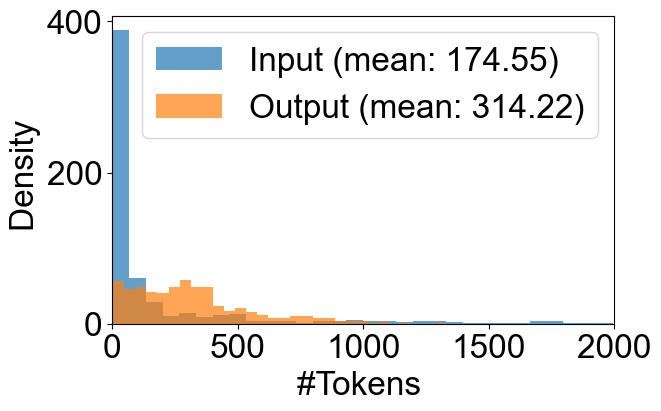

In [14]:
# sharegpt
sharegpt_input_len=[42, 12, 1679, 31, 424, 52, 14, 1330, 17, 7, 144, 13, 67, 96, 14, 76, 11, 1994, 20, 7, 12, 242, 102, 78, 69, 3, 93, 9, 20, 8, 1143, 11, 84, 508, 6, 6, 470, 407, 50, 195, 57, 7, 33, 8, 492, 17, 23, 316, 70, 10, 15, 54, 4, 884, 24, 34, 43, 146, 29, 122, 110, 12, 91, 393, 36, 11, 5, 305, 3, 70, 27, 11, 67, 10, 89, 687, 240, 20, 8, 18, 209, 17, 35, 246, 88, 157, 102, 20, 116, 9, 18, 49, 564, 38, 44, 42, 471, 189, 1797, 14, 13, 4, 26, 10, 94, 861, 519, 365, 1642, 21, 103, 29, 28, 159, 6, 46, 10, 1169, 15, 61, 9, 15, 600, 17, 8, 214, 3, 1085, 19, 150, 474, 82, 94, 18, 16, 21, 7, 41, 409, 1275, 12, 7, 35, 17, 74, 14, 9, 21, 22, 14, 9, 6, 300, 65, 176, 20, 150, 25, 143, 884, 60, 28, 80, 399, 59, 89, 25, 10, 17, 30, 24, 209, 303, 22, 20, 18, 8, 1267, 37, 21, 41, 459, 21, 8, 80, 21, 152, 2, 31, 835, 110, 1382, 18, 23, 75, 127, 414, 34, 74, 39, 712, 42, 326, 20, 1766, 11, 108, 181, 61, 23, 13, 266, 12, 17, 8, 22, 4, 12, 13, 12, 12, 64, 15, 52, 1233, 99, 30, 20, 22, 37, 635, 101, 34, 135, 19, 17, 1274, 34, 6, 332, 18, 20, 1012, 17, 1214, 11, 664, 195, 10, 428, 27, 16, 216, 276, 5, 65, 13, 16, 24, 22, 395, 62, 855, 1593, 9, 128, 14, 36, 19, 32, 6, 12, 667, 23, 40, 12, 55, 46, 12, 22, 1083, 31, 6, 3, 34, 1794, 18, 3, 24, 75, 38, 19, 155, 87, 21, 28, 18, 43, 42, 50, 5, 20, 6, 28, 11, 27, 60, 12, 9, 52, 28, 544, 923, 102, 5, 9, 14, 47, 43, 17, 22, 1901, 973, 14, 19, 36, 46, 635, 10, 53, 92, 23, 25, 474, 19, 4, 146, 15, 37, 7, 62, 397, 1444, 20, 18, 6, 6, 45, 84, 8, 12, 318, 24, 28, 18, 20, 23, 128, 23, 951, 14, 402, 25, 1224, 17, 83, 14, 1059, 8, 13, 37, 21, 8, 17, 11, 549, 60, 6, 17, 6, 306, 43, 485, 21, 59, 23, 25, 10, 14, 186, 111, 288, 119, 166, 8, 116, 47, 7, 155, 11, 86, 785, 87, 24, 1682, 13, 40, 404, 18, 14, 27, 19, 63, 9, 120, 23, 102, 33, 23, 4, 42, 26, 360, 16, 56, 21, 441, 7, 7, 29, 39, 231, 47, 6, 39, 22, 1326, 16, 4, 13, 493, 10, 187, 13, 18, 21, 25, 304, 24, 329, 26, 82, 29, 41, 126, 11, 10, 499, 30, 1076, 1062, 41, 33, 21, 1479, 15, 337, 2, 50, 412, 58, 13, 992, 140, 63, 85, 43, 15, 35, 10, 7, 360, 33, 16, 11, 39, 35, 970, 10, 15, 310, 39, 14, 502, 137, 20, 38, 10, 17, 24, 20, 412, 49, 146, 8, 55, 12, 29, 6, 18, 12, 7, 686, 12, 16, 125, 945, 26, 57, 14, 50, 83, 34, 144, 396, 25, 68, 329, 859, 77, 94, 7, 44, 19, 45, 12, 79, 1743, 14, 17, 199, 25, 15, 16, 19, 24, 73, 10, 190, 1219, 1680, 482, 100, 15, 16, 155, 12, 57, 172, 82, 135, 12, 96, 12, 8, 14, 20, 11, 22, 20, 21, 15, 78, 16, 21, 17, 19, 8, 203, 15, 49, 39, 23, 9, 80, 43, 48, 18, 431, 515]
sharegpt_output_len=[6, 97, 56, 85, 88, 194, 57, 31, 65, 28, 281, 169, 52, 207, 363, 161, 101, 54, 122, 272, 262, 180, 535, 345, 295, 24, 44, 173, 443, 308, 770, 283, 593, 175, 271, 209, 715, 560, 351, 318, 43, 146, 779, 365, 617, 353, 571, 700, 136, 132, 195, 560, 71, 275, 258, 285, 337, 550, 849, 169, 158, 31, 397, 360, 4, 260, 347, 219, 10, 204, 488, 127, 296, 488, 194, 651, 342, 309, 284, 173, 340, 249, 209, 632, 883, 212, 474, 298, 35, 593, 246, 743, 5, 281, 177, 507, 344, 880, 251, 156, 510, 11, 232, 615, 200, 722, 124, 992, 44, 172, 165, 299, 230, 292, 319, 83, 225, 841, 379, 29, 285, 518, 200, 190, 323, 54, 245, 561, 248, 165, 311, 119, 200, 302, 569, 354, 237, 387, 399, 162, 121, 32, 34, 339, 949, 96, 55, 26, 810, 370, 303, 134, 776, 85, 160, 384, 780, 298, 454, 186, 441, 503, 190, 764, 335, 912, 318, 378, 33, 220, 370, 287, 68, 240, 336, 361, 277, 296, 129, 289, 578, 239, 33, 191, 123, 192, 814, 36, 397, 6, 97, 234, 77, 474, 155, 74, 18, 514, 19, 753, 536, 291, 317, 383, 282, 312, 256, 84, 696, 303, 85, 92, 203, 673, 179, 402, 106, 560, 236, 351, 324, 1019, 115, 607, 751, 373, 198, 51, 241, 685, 573, 65, 21, 358, 351, 344, 774, 582, 58, 154, 310, 27, 596, 201, 105, 91, 800, 237, 317, 181, 42, 42, 37, 85, 221, 25, 814, 387, 1066, 916, 98, 436, 984, 134, 363, 686, 285, 103, 120, 442, 45, 383, 135, 170, 314, 91, 122, 228, 854, 175, 320, 718, 35, 659, 247, 254, 471, 348, 379, 141, 288, 20, 465, 58, 96, 81, 415, 533, 389, 495, 11, 274, 325, 427, 781, 446, 513, 792, 99, 56, 519, 216, 333, 284, 263, 150, 57, 167, 490, 66, 546, 147, 209, 301, 28, 527, 93, 139, 407, 270, 31, 202, 74, 580, 120, 250, 373, 32, 335, 94, 460, 474, 452, 253, 247, 393, 410, 451, 108, 82, 279, 103, 310, 6, 632, 348, 900, 67, 28, 170, 245, 379, 206, 402, 250, 356, 694, 366, 266, 361, 362, 444, 609, 715, 32, 235, 136, 494, 409, 318, 1162, 506, 932, 189, 413, 131, 190, 361, 278, 64, 492, 993, 452, 311, 222, 207, 145, 57, 559, 370, 293, 119, 45, 54, 41, 275, 44, 231, 27, 52, 165, 547, 24, 247, 229, 113, 43, 810, 347, 187, 362, 100, 227, 434, 35, 460, 250, 274, 810, 303, 167, 288, 773, 414, 139, 865, 37, 171, 248, 385, 624, 278, 533, 270, 145, 335, 396, 117, 280, 281, 190, 373, 365, 382, 710, 350, 296, 215, 441, 356, 508, 131, 213, 271, 78, 255, 382, 56, 630, 751, 136, 108, 6, 50, 579, 301, 383, 123, 395, 13, 244, 397, 232, 302, 108, 477, 357, 274, 75, 203, 71, 196, 415, 698, 770, 688, 231, 322, 237, 517, 947, 52, 223, 265, 162, 92, 104, 377, 349, 94, 335, 125, 143, 304, 345, 236, 524, 445, 361, 374, 332, 402, 855, 27, 395, 227, 335, 72, 139, 133, 166, 157, 339, 1083, 39, 268, 179, 101, 412, 431, 530, 76, 280, 217, 181, 273, 508, 104, 408, 44, 326, 321, 406, 324, 649, 367, 303, 385, 386, 179, 36, 158, 278, 45, 86, 321, 41, 454, 985, 46, 106, 491, 217, 180, 121, 230, 256, 251, 432, 550, 233, 342, 918, 314, 389, 811, 565, 738, 844, 1327]

plot_hist([sharegpt_input_len,sharegpt_output_len],'ShareGPT')


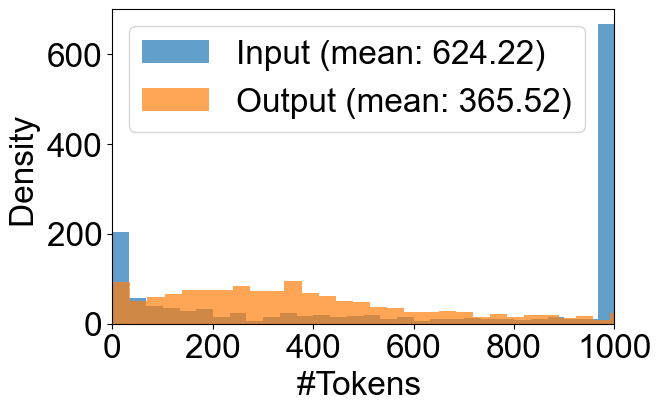

In [15]:
# sharegpt
# sharemulti_input_len=[2000, 17, 2000, 2000, 397, 440, 366, 700, 483, 2000, 2000, 429, 616, 58, 392, 708, 596, 724, 2000, 832, 445, 573, 751, 359, 416, 307, 310, 515, 669, 1085, 462, 822, 2000, 729, 263, 312, 422, 360, 357, 513, 716, 429, 20, 743, 1107, 44, 198, 458, 778, 1919, 2000, 480, 14, 396, 760, 723, 633, 24, 298, 775, 641, 453, 18, 5, 537, 7, 386, 400, 1, 46, 462, 741, 377, 15, 544, 553, 454, 149, 49, 1075, 106, 7, 416, 704, 1031, 73, 378, 363, 66, 736, 96, 540, 420, 664, 342, 144, 470, 267, 540, 30, 662, 21, 389, 655, 314, 108, 287, 542, 567, 374, 519, 372, 2000, 787, 398, 506, 2000, 777, 19, 78, 401, 667, 397, 391, 13, 369, 145, 454, 162, 390, 51, 77, 2000, 31, 15, 680, 23, 419, 11, 7, 16, 8, 1999, 33, 802, 914, 342, 13, 1090, 1340, 1999, 17, 53, 564, 101, 578, 35, 359, 618, 720, 564, 550, 7, 1262, 24, 10, 83, 395, 1810, 720, 281, 155, 11, 2000, 368, 762, 701, 1422, 38, 141, 408, 687, 546, 1567, 431, 428, 746, 674, 115, 393, 28, 23, 350, 443, 529, 369, 2000, 507, 457, 2000, 18, 397, 56, 415, 295, 21, 65, 388, 98, 537, 412, 11, 1159, 50, 356, 438, 57, 399, 426, 429, 938, 512, 24, 6, 409, 559, 24, 1795, 443, 381, 428, 28, 66, 2000, 11, 193, 738, 9, 359, 370, 207, 37, 7, 553, 1074, 569, 813, 7, 755, 600, 522, 640, 487, 2000, 419, 37, 670, 391, 420, 451, 510, 45, 506, 440, 1177, 2000, 460, 442, 428, 520, 58, 59, 2000, 33, 872, 374, 28, 478, 354, 124, 299, 411, 287, 478, 1188, 418, 36, 1926, 1636, 1999, 1072, 270, 5, 343, 527, 399, 1999, 451, 9, 24, 30, 453, 20, 29, 42, 174, 1, 1315, 529, 370, 671, 687, 2000, 814, 500, 377, 475, 752, 76, 111, 161, 272, 429, 203, 654, 2000, 447, 419, 753, 200, 263, 148, 114, 697, 1094, 439, 490, 2000, 505, 2, 548, 391, 1146, 79, 674, 227, 39, 386, 2000, 43, 400, 360, 501, 872, 24, 10, 525, 37, 686, 1233, 582, 93, 413, 55, 347, 4, 45, 476, 437, 54, 382, 598, 26, 497, 38, 412, 85, 726, 462, 1840, 102, 494, 23, 158, 347, 4, 467, 14, 520, 2000, 484, 275, 629, 717, 431, 521, 125, 6, 1892, 467, 467, 535, 2000, 920, 12, 198, 917, 63, 445, 289, 468, 303, 55, 239, 251, 2000, 391, 83, 14, 2000, 23, 453, 410, 288, 628, 462, 352, 351, 27, 11, 1365, 450, 365, 2000, 712, 350, 18, 438, 2000, 349, 404, 1270, 2000, 651, 2000, 603, 431, 468, 385, 519, 150, 12, 2, 1022, 344, 146, 460, 411, 44, 467, 458, 63, 539, 737, 140, 774, 418, 27, 17, 84, 328, 409, 24, 427, 352, 423, 933, 14, 121, 479, 525, 387, 373, 536, 481, 363, 422, 22, 8, 496, 488, 226, 111, 1083, 397, 435, 372, 422, 11, 473, 148, 55, 268, 431, 429, 610, 691, 326, 467, 450, 412, 1103, 484, 602, 507, 184, 1061, 474, 664, 556, 55, 276, 571, 401, 148, 2000, 366, 397, 11, 568, 412, 5, 393, 541, 2000, 12, 470, 2000, 477, 105, 398, 559, 13, 4, 370, 2000, 614, 383, 7, 154, 88, 730, 20, 479, 18, 2000, 414, 459, 412, 640, 21, 1344, 766, 20, 71, 551, 510, 479, 734, 204, 399, 742, 250, 363, 127, 33, 449, 663, 335, 415, 419, 115, 427, 1043, 422, 391, 502, 1611, 416, 22, 33, 407, 120, 24, 456, 33, 355, 877, 14, 1734, 80, 39, 59, 444, 7, 12, 584, 6, 668, 395, 417, 412, 378, 258, 401, 618, 3, 10, 1503, 76, 594, 24, 447, 439, 2000, 658, 189, 989, 2000, 2000, 396, 929, 533, 1594, 377, 723, 641, 389, 505, 14, 1335, 84, 14, 48, 305, 399, 360, 564, 499, 144, 23, 12, 406, 620, 12, 450, 2000, 676, 413, 93, 2000, 1283, 1355, 627, 2000, 351, 493, 430, 6, 42, 125, 155, 2000, 445, 2000, 878, 2000, 531, 399, 692, 488, 140, 642, 384, 321, 1245, 734, 27, 9, 22, 773, 798, 703, 30, 681, 20, 711, 405, 764, 492, 20, 525, 396, 560, 395, 188, 495, 204, 239, 11, 40, 420, 521, 314, 535, 885, 14, 13, 2000, 868, 1040, 377, 94, 435, 444, 502, 1876, 94, 383, 560, 678, 36, 670, 437, 1999, 31, 1765, 19, 456, 615, 1736, 373, 295, 470, 543, 58, 49, 939, 478, 32, 389, 370, 371, 720, 25, 817]
# sharemulti_output_len=[48, 73, 48, 48, 269, 203, 206, 537, 13, 48, 48, 21, 107, 557, 251, 156, 114, 256, 48, 303, 59, 466, 261, 332, 500, 327, 474, 280, 829, 854, 213, 222, 48, 425, 955, 30, 76, 198, 188, 185, 403, 258, 225, 522, 724, 115, 647, 402, 1056, 129, 48, 10, 905, 165, 23, 781, 482, 611, 148, 810, 416, 248, 284, 288, 260, 36, 198, 262, 9, 42, 171, 174, 684, 624, 429, 615, 135, 347, 441, 973, 353, 215, 405, 172, 205, 53, 236, 704, 417, 178, 93, 481, 244, 157, 351, 168, 1164, 302, 341, 170, 381, 341, 227, 357, 290, 446, 246, 27, 293, 359, 142, 354, 48, 6, 814, 18, 48, 31, 1268, 325, 186, 593, 102, 1421, 207, 395, 809, 69, 441, 312, 220, 413, 48, 76, 514, 669, 1059, 206, 139, 339, 515, 92, 49, 118, 1060, 275, 295, 118, 743, 708, 49, 137, 41, 476, 800, 493, 114, 310, 607, 650, 231, 118, 380, 93, 192, 278, 142, 346, 238, 302, 437, 664, 397, 48, 441, 502, 434, 322, 214, 680, 224, 417, 241, 12, 79, 250, 244, 448, 94, 338, 828, 231, 269, 484, 226, 116, 48, 53, 142, 48, 765, 231, 282, 149, 397, 623, 574, 182, 131, 454, 29, 188, 686, 420, 38, 18, 464, 548, 62, 634, 361, 9, 444, 776, 686, 474, 150, 253, 283, 290, 401, 777, 122, 48, 486, 695, 194, 55, 407, 24, 131, 768, 87, 391, 771, 1161, 505, 84, 82, 862, 285, 408, 392, 48, 237, 484, 433, 214, 99, 476, 118, 224, 193, 359, 713, 48, 518, 243, 65, 161, 209, 228, 48, 279, 111, 137, 217, 419, 248, 224, 153, 50, 76, 1110, 860, 331, 113, 122, 412, 49, 318, 325, 392, 288, 293, 118, 49, 13, 259, 188, 43, 728, 335, 751, 382, 416, 9, 575, 844, 297, 754, 233, 48, 34, 443, 360, 312, 271, 335, 631, 317, 506, 805, 861, 774, 48, 35, 1526, 634, 542, 50, 101, 652, 1350, 235, 270, 744, 48, 309, 76, 276, 284, 902, 353, 334, 322, 325, 326, 48, 161, 193, 526, 142, 591, 237, 198, 331, 428, 23, 462, 363, 425, 383, 439, 81, 380, 472, 437, 460, 319, 272, 355, 532, 174, 317, 553, 267, 298, 687, 208, 175, 788, 22, 140, 269, 14, 326, 514, 324, 48, 1025, 184, 266, 1101, 217, 728, 413, 232, 156, 218, 298, 243, 48, 1048, 309, 70, 520, 108, 283, 195, 35, 201, 267, 602, 245, 48, 227, 267, 94, 48, 160, 289, 400, 749, 439, 459, 265, 282, 666, 132, 632, 509, 141, 48, 452, 388, 79, 421, 48, 611, 148, 514, 48, 764, 48, 819, 106, 93, 199, 220, 136, 164, 30, 264, 330, 329, 475, 561, 695, 305, 83, 323, 203, 503, 202, 411, 186, 616, 447, 177, 358, 99, 43, 195, 457, 232, 70, 229, 721, 122, 13, 248, 353, 738, 303, 740, 1575, 447, 382, 813, 146, 79, 748, 525, 26, 328, 401, 26, 190, 73, 565, 564, 153, 330, 52, 496, 841, 220, 321, 168, 440, 945, 88, 199, 447, 236, 733, 134, 444, 561, 378, 56, 471, 640, 143, 48, 219, 348, 87, 922, 168, 83, 351, 2, 48, 101, 369, 48, 479, 364, 445, 124, 150, 27, 299, 48, 622, 564, 153, 163, 615, 320, 4, 310, 144, 48, 290, 464, 4, 408, 337, 704, 734, 23, 367, 727, 236, 640, 333, 38, 270, 41, 658, 307, 359, 156, 189, 654, 211, 9, 9, 56, 87, 180, 157, 241, 393, 437, 26, 428, 297, 485, 1218, 331, 73, 614, 403, 654, 373, 314, 395, 341, 13, 30, 112, 123, 297, 311, 540, 281, 324, 271, 321, 224, 272, 203, 22, 91, 522, 711, 204, 165, 102, 324, 48, 247, 174, 1059, 48, 48, 335, 345, 10, 454, 279, 375, 368, 141, 180, 157, 178, 578, 346, 663, 175, 233, 441, 247, 587, 253, 253, 53, 32, 520, 306, 364, 48, 545, 262, 121, 48, 765, 442, 426, 48, 566, 780, 92, 256, 19, 666, 351, 48, 117, 48, 372, 48, 108, 319, 632, 285, 246, 29, 94, 381, 466, 376, 410, 124, 297, 1035, 317, 171, 659, 308, 721, 107, 1069, 398, 317, 134, 508, 22, 53, 370, 351, 31, 89, 227, 224, 1166, 353, 377, 93, 206, 527, 933, 33, 48, 1180, 1008, 196, 796, 118, 688, 349, 172, 1954, 56, 188, 1142, 249, 1203, 487, 42, 660, 55, 269, 22, 611, 312, 754, 111, 604, 253, 513, 867, 1109, 365, 371, 467, 518, 548, 868, 1045, 984]
sharemulti_input_len=[18, 846, 2000, 2000, 1119, 344, 2000, 2000, 323, 1841, 2000, 2000, 2000, 1541, 2001, 1141, 528, 2000, 2000, 2000, 1705, 45, 7, 380, 1230, 2001, 568, 1662, 868, 243, 19, 1267, 1, 2000, 2000, 1633, 1111, 2000, 62, 352, 29, 499, 1130, 2000, 2000, 2000, 19, 2000, 2001, 4, 1490, 1211, 127, 1455, 115, 2001, 79, 349, 2000, 507, 1830, 809, 50, 1203, 7, 181, 847, 2001, 2000, 892, 1306, 576, 2000, 569, 907, 140, 514, 113, 2000, 55, 2000, 30, 2000, 1636, 458, 421, 335, 256, 2000, 26, 1381, 2000, 1290, 2001, 236, 397, 990, 276, 1371, 1543, 2000, 34, 82, 1935, 2000, 80, 22, 2000, 15, 44, 2001, 16, 1066, 685, 39, 2000, 8, 2000, 2000, 2000, 2000, 13, 421, 2001, 16, 30, 83, 2000, 57, 14, 22, 2000, 701, 946, 2000, 901, 777, 87, 369, 170, 8, 686, 24, 2000, 49, 10, 2000, 1924, 2000, 18, 1394, 2000, 2000, 1816, 1160, 43, 2000, 1494, 6, 2000, 534, 714, 978, 17, 662, 480, 1560, 2000, 2001, 1191, 2000, 304, 134, 17, 106, 18, 13, 2000, 1100, 2000, 1662, 783, 2000, 2000, 2000, 2000, 2001, 1024, 2001, 82, 1943, 93, 2000, 2000, 1630, 2000, 953, 10, 7, 1076, 7, 1033, 14, 2000, 371, 75, 64, 28, 254, 2000, 2001, 24, 166, 2000, 31, 2001, 15, 312, 16, 2001, 2000, 1005, 1730, 25, 1490, 594, 595, 1324, 1008, 2000, 1797, 63, 734, 37, 2001, 911, 601, 2000, 2000, 811, 2001, 1052, 1264, 2000, 2000, 869, 472, 311, 2001, 2000, 11, 2000, 23, 754, 30, 2001, 352, 22, 70, 21, 2000, 74, 2000, 367, 148, 455, 28, 37, 1, 1262, 25, 137, 2001, 378, 66, 1344, 41, 2000, 2001, 20, 2001, 2000, 2000, 1790, 1023, 941, 8, 839, 1202, 2001, 301, 2001, 2000, 2000, 878, 10, 2000, 194, 2000, 2000, 2, 5, 107, 15, 1048, 437, 21, 620, 1467, 2001, 45, 86, 189, 190, 1224, 572, 148, 34, 65, 1383, 176, 823, 1751, 25, 2000, 2000, 1666, 731, 1718, 509, 2001, 1147, 936, 176, 2000, 131, 25, 2000, 2000, 10, 5, 14, 2000, 45, 1956, 472, 2000, 43, 107, 23, 175, 2001, 880, 179, 568, 102, 525, 105, 6, 407, 2000, 2001, 2000, 2001, 2001, 59, 94, 574, 38, 1997, 2000, 57, 1059, 2000, 2001, 2001, 1760, 388, 132, 239, 1576, 2000, 88, 400, 963, 66, 9, 589, 18, 20, 2001, 1213, 2000, 544, 437, 335, 20, 12, 2001, 1419, 321, 2001, 2001, 774, 2001, 13, 2001, 896, 2000, 2000, 2001, 1241, 313, 289, 2, 348, 64, 97, 2000, 654, 15, 1270, 260, 2000, 2000, 2000, 856, 178, 2000, 12, 118, 1356, 2000, 1906, 1022, 29, 979, 2000, 487, 892, 1773, 519, 2001, 1545, 1475, 1071, 569, 846, 2000, 615, 2000, 75, 1364, 188, 1183, 2000, 948, 225, 26, 2000, 2001, 1461, 354, 1767, 2000, 801, 2001, 71, 968, 213, 2001, 17, 154, 458, 23, 2000, 431, 11, 376, 311, 521, 2000, 1249, 595, 18, 161, 37, 2001, 914, 14, 620, 1139, 169, 2000, 20, 766, 1087, 397, 2000, 5, 1767, 396, 1755, 10, 1048, 480, 1889, 4, 1599, 1869, 21, 932, 2000, 2000, 1808, 2000, 2000, 13, 21, 2000, 2000, 2000, 59, 470, 9, 2000, 170, 165, 2001, 21, 953, 173, 2000, 2000, 2000, 429, 400, 117, 67, 1383, 137, 64, 2000, 1148, 765, 2000, 2000, 39, 122, 664, 20, 2000, 2000, 413, 1348, 2000, 2000, 356, 70, 2000, 2000, 1941, 1394, 1264, 2001, 70, 2000, 4, 1550, 8, 422, 2000, 1691, 396, 130, 1299, 984, 9, 10, 2000, 651, 39, 660, 22, 25, 505, 25, 2000, 998, 2000, 197, 288, 2000, 1471, 201, 22, 2000, 15, 2000, 485, 2000, 1461, 709, 2000, 2000, 1999, 6, 564, 2000, 43, 947, 431, 2001, 12, 2001, 1196, 1999, 90, 2000, 1217, 52, 2000, 2000, 1966, 800, 1895, 44, 96, 1251, 2000, 16, 1391, 2000, 2000, 2001, 350, 2000, 2000, 2001, 1684, 897, 758, 542, 2000, 81, 156, 112, 2000, 25, 415, 875, 2001, 1432, 14, 9, 130, 7, 16, 1937, 645, 18, 21, 478, 1216, 1341, 2000, 1279, 527, 2000, 2001, 2000, 22, 699, 98, 1440, 2000, 7, 1161, 899, 1006, 2001, 2000, 63, 21, 2001, 1398, 338, 241, 2002, 2000, 687, 353, 2000, 24, 1129, 2000, 2000, 11, 264, 1418, 194, 1361, 1129, 2000, 194, 2001, 672, 2001, 2000, 698, 2000, 282, 1918, 20, 2000, 1298, 40, 2001, 21, 2001, 61, 1707, 410, 939, 245, 155, 698, 259, 2000, 2000, 189, 1286, 817, 410, 27, 6, 2000, 15, 2000, 2000, 40, 1736, 39, 1765, 730, 75, 18, 1443, 25, 33, 1501, 2000, 2001, 2000, 475, 2000, 642, 199, 1183, 2000, 1475, 2000, 723, 1625, 316, 2001, 469, 114, 1754, 2000, 216, 13, 2000, 1041, 2001, 1605, 46, 144, 773, 671, 189, 324, 2000, 2000, 19, 775, 1062, 1, 2000, 19, 14, 206, 25, 1449, 248, 658, 155, 105, 24, 499, 151, 565, 171, 712, 435, 2001, 1772, 60, 2000, 2000, 2000, 17, 2000, 1140, 2001, 10, 2001, 2001, 1422, 2000, 2001, 2000, 1493, 19, 2000, 2000, 206, 925, 2, 96, 141, 94, 1803, 22, 158, 342, 2000, 2000, 22, 2001, 2001, 64, 2001, 1451, 136, 2000, 1940, 16, 371, 516, 19, 260, 2000, 78, 55, 2000, 2000, 609, 2000, 1557, 364, 1847, 418, 29, 40, 500, 2001, 432, 17, 7, 2001, 788, 1474, 2000, 2000, 536, 2000, 2001, 267, 2000, 2000, 2000, 2000, 2000, 2001, 2000, 2001, 191, 2001, 255, 2000, 198, 9, 935, 2001, 29, 476, 9, 2000, 382, 12, 256, 1152, 1079, 2000, 2000, 2001, 54, 68, 2000, 91, 220, 21, 2001, 675, 145, 102, 1665, 2000, 12, 2000, 2001, 28, 2000, 489, 1407, 2001, 924, 116, 2000, 7, 18, 711, 2001, 613, 2000, 2000, 2000, 96, 2000, 13, 4, 2000, 1514, 88, 2001, 2001, 2000, 213, 2001, 77, 469, 878, 2000, 27, 1050, 2000, 127, 2001, 2000, 538, 2000, 34, 318, 2001, 2000, 2000, 2001, 2000, 525, 1510, 545, 1248, 905, 2000, 25, 362, 2000, 2001, 2001, 2000, 537, 114, 570, 1577, 2001, 240, 1668, 2000, 1836, 7, 2000, 2001, 2000, 11, 2001, 2000, 6, 132, 2000, 32, 2000, 1250, 786, 221, 7, 1239, 116, 983, 369, 355, 2000, 2000, 2001, 749, 318, 22, 430, 56, 411, 2001, 1579, 12, 2000, 2001, 87, 267, 1058, 12, 346, 59, 539, 30, 153, 2000, 264, 885, 2000, 2000, 2000, 2000, 2000, 1308, 2000, 661, 2001, 8, 102, 14, 46, 80, 1633, 2000, 447, 197, 440, 1462, 587, 102, 1581, 2000, 895, 22, 23, 775, 49, 72, 14, 2000, 2000, 1287, 2000, 725, 57, 347, 2000, 722, 1975, 2000, 2000, 130, 2000, 5, 961, 68, 2001, 1165, 510, 2000, 460, 88, 312, 15, 2001, 315, 2001, 2000, 2001, 2000, 142, 2001, 2000, 10, 1524, 1632, 1216, 21, 10, 2000, 359, 2000, 895, 477, 2001, 530, 1529, 2000, 126, 13, 1924, 1059, 1183, 301, 2000, 767, 2001, 2000, 2000, 407, 1434, 3, 528, 127, 2001, 710, 866, 413, 17, 190, 677, 803, 1986, 2000, 2001, 10, 40, 577, 15, 2000, 1285, 1120, 2000, 1820, 620, 2000, 2000, 2000, 2000, 426, 2001, 2000, 208, 41, 501, 207, 2000, 2000, 2000, 858, 1105, 19, 1722, 2000, 1469, 2001, 2000, 2000, 108, 195, 163, 501, 1999, 1428, 2000, 928, 168, 1337, 457, 145, 21, 9, 2000, 2001, 2000, 833, 501, 2000, 20, 147, 449, 2000, 58, 1999, 657, 291, 2000, 28, 711, 738, 31, 266, 1033, 928, 2000, 354, 2000, 145, 509, 2000, 1606, 2000, 277, 2000, 17, 233, 24, 1492, 8, 31, 2000, 2000, 23, 1109, 2000, 103, 1423, 1061, 736, 741, 414, 21, 2000, 139, 332, 33, 2000, 976, 1178, 1355, 91, 1874, 40, 2, 166, 651, 2000, 72, 2000, 2000, 2001, 805, 1468, 2000, 2000, 2001, 1873, 194, 2000, 19, 1803, 2000, 2000, 2001, 439, 972, 552, 2000, 2000, 2000, 456, 52, 2000, 199, 1279, 13, 1155, 2000, 2000, 262, 206, 528, 1186, 2000, 223, 1623, 1859, 48, 586, 2000, 735, 25, 354, 86, 575, 1495, 428, 12, 2000, 1, 168, 44, 143, 267, 202, 1772, 93, 2001, 175, 1755, 13, 1741, 851, 343, 165, 2001, 2000, 2000, 244, 37, 16, 18, 2001, 1036, 2000, 2001, 270, 1378, 9, 2000, 2000, 866, 866, 34, 124, 458, 198, 2001, 385, 381, 113, 241, 34, 2001, 2000, 2001, 2000, 2000, 28, 1974, 1048, 2000, 2001, 2000, 502, 2001, 1990, 2000, 2000, 2000, 4, 345, 11, 153, 2000, 1466]
sharemulti_output_len=[82, 14, 24, 103, 64, 205, 128, 232, 32, 296, 133, 200, 91, 293, 207, 220, 12, 19, 251, 238, 287, 119, 37, 195, 242, 232, 297, 213, 254, 135, 227, 330, 10, 524, 191, 267, 408, 374, 482, 370, 36, 263, 145, 396, 182, 255, 310, 286, 490, 320, 318, 352, 457, 159, 275, 161, 60, 551, 466, 438, 185, 574, 81, 144, 226, 674, 468, 730, 691, 691, 6, 265, 33, 425, 637, 166, 20, 382, 181, 450, 149, 181, 25, 254, 540, 385, 345, 241, 240, 660, 581, 454, 296, 707, 268, 98, 733, 315, 72, 311, 770, 87, 497, 200, 347, 354, 361, 363, 846, 35, 62, 722, 366, 768, 93, 299, 102, 402, 1025, 945, 409, 123, 208, 788, 238, 115, 350, 220, 241, 180, 158, 102, 341, 849, 813, 433, 147, 156, 318, 474, 373, 504, 217, 275, 468, 261, 348, 1025, 3, 475, 11, 236, 3, 448, 279, 265, 300, 90, 376, 430, 322, 207, 264, 584, 57, 277, 364, 381, 52, 359, 572, 440, 112, 990, 450, 780, 416, 32, 605, 131, 21, 41, 948, 10, 568, 157, 1025, 510, 435, 660, 432, 111, 77, 25, 367, 155, 222, 57, 91, 262, 91, 99, 206, 205, 301, 141, 308, 186, 152, 159, 787, 636, 724, 964, 329, 575, 679, 404, 431, 947, 3, 349, 101, 361, 322, 326, 132, 267, 839, 3, 296, 453, 324, 167, 223, 511, 515, 75, 448, 227, 474, 385, 440, 99, 59, 186, 608, 157, 983, 449, 512, 447, 521, 523, 96, 261, 96, 578, 668, 829, 16, 241, 510, 183, 591, 364, 244, 511, 10, 674, 41, 244, 706, 263, 271, 525, 313, 140, 354, 149, 662, 22, 518, 342, 618, 343, 832, 822, 393, 194, 386, 710, 310, 319, 42, 277, 486, 43, 792, 447, 61, 473, 85, 49, 271, 332, 384, 340, 408, 395, 410, 370, 378, 442, 529, 225, 213, 223, 266, 435, 327, 351, 223, 624, 331, 526, 347, 324, 518, 931, 561, 26, 352, 463, 366, 611, 233, 141, 343, 153, 18, 18, 94, 385, 530, 309, 781, 476, 705, 344, 119, 834, 895, 157, 192, 488, 230, 193, 427, 636, 886, 319, 3, 307, 958, 577, 283, 456, 319, 701, 236, 353, 38, 246, 782, 426, 472, 289, 772, 83, 339, 530, 327, 188, 928, 118, 269, 372, 109, 129, 133, 256, 1025, 616, 784, 231, 88, 146, 775, 913, 226, 53, 825, 297, 168, 333, 41, 1025, 259, 347, 163, 186, 235, 282, 33, 254, 303, 303, 761, 305, 598, 100, 433, 483, 131, 102, 363, 168, 190, 171, 153, 378, 224, 695, 882, 60, 444, 3, 235, 416, 189, 732, 16, 734, 621, 235, 120, 74, 499, 471, 29, 212, 513, 533, 30, 538, 513, 80, 564, 137, 578, 220, 46, 85, 345, 382, 769, 361, 158, 41, 391, 258, 424, 263, 407, 506, 82, 198, 393, 169, 678, 184, 305, 153, 489, 149, 588, 727, 3, 97, 348, 613, 203, 203, 378, 374, 556, 272, 394, 92, 359, 231, 523, 94, 181, 369, 381, 28, 404, 549, 4, 370, 668, 354, 149, 4, 131, 168, 22, 70, 397, 486, 407, 395, 174, 449, 182, 30, 395, 157, 457, 2, 404, 33, 273, 10, 10, 426, 658, 353, 69, 428, 812, 338, 122, 94, 254, 167, 805, 203, 309, 319, 348, 278, 853, 35, 750, 222, 16, 706, 3, 502, 185, 35, 650, 353, 78, 25, 700, 94, 714, 358, 392, 575, 403, 279, 528, 130, 98, 623, 548, 343, 118, 442, 317, 514, 188, 638, 217, 220, 175, 242, 586, 237, 581, 468, 171, 377, 13, 296, 304, 303, 256, 759, 350, 521, 367, 715, 365, 406, 556, 245, 175, 34, 360, 344, 502, 461, 36, 431, 490, 364, 315, 179, 513, 312, 19, 117, 773, 670, 188, 193, 116, 3, 47, 197, 220, 170, 574, 29, 130, 115, 252, 266, 156, 272, 232, 97, 281, 313, 613, 304, 324, 339, 137, 1025, 296, 397, 228, 145, 272, 663, 448, 404, 88, 583, 929, 315, 25, 616, 329, 290, 357, 652, 500, 33, 26, 281, 262, 61, 520, 400, 726, 152, 382, 435, 409, 113, 309, 542, 504, 121, 1025, 473, 26, 129, 355, 238, 243, 205, 348, 243, 182, 397, 120, 30, 3, 674, 503, 381, 686, 45, 1025, 663, 37, 377, 279, 857, 283, 61, 300, 357, 769, 478, 116, 826, 27, 27, 75, 288, 193, 128, 910, 250, 527, 264, 414, 778, 548, 811, 270, 505, 946, 629, 357, 1025, 372, 57, 4, 418, 342, 662, 664, 446, 813, 412, 53, 311, 323, 747, 623, 111, 443, 7, 107, 17, 113, 903, 848, 2, 155, 168, 318, 413, 1017, 957, 849, 192, 15, 694, 300, 117, 195, 644, 124, 199, 317, 10, 340, 829, 87, 275, 667, 872, 73, 225, 106, 642, 258, 109, 135, 126, 174, 416, 196, 499, 1025, 206, 639, 248, 385, 432, 326, 94, 281, 299, 432, 411, 613, 892, 890, 335, 273, 94, 16, 145, 35, 516, 14, 61, 162, 444, 937, 265, 595, 284, 716, 460, 117, 445, 675, 998, 614, 205, 730, 323, 288, 199, 308, 115, 694, 224, 59, 630, 250, 352, 203, 299, 65, 33, 151, 859, 429, 61, 353, 474, 273, 351, 513, 205, 369, 231, 771, 920, 458, 295, 900, 975, 567, 852, 495, 766, 164, 337, 371, 504, 600, 203, 140, 182, 286, 10, 947, 453, 528, 481, 326, 342, 693, 384, 314, 199, 242, 390, 260, 200, 637, 277, 301, 591, 268, 351, 867, 85, 388, 664, 95, 1025, 373, 407, 314, 980, 214, 254, 456, 423, 550, 463, 117, 26, 263, 50, 623, 62, 877, 501, 251, 605, 867, 567, 590, 45, 374, 806, 789, 1007, 588, 410, 741, 658, 326, 344, 867, 360, 160, 801, 310, 359, 257, 861, 140, 372, 798, 274, 327, 216, 136, 3, 772, 435, 706, 40, 402, 225, 885, 882, 245, 136, 505, 97, 366, 71, 37, 336, 212, 689, 398, 994, 435, 340, 204, 224, 480, 151, 369, 435, 280, 804, 256, 183, 398, 255, 235, 58, 77, 362, 566, 103, 586, 143, 485, 139, 408, 506, 105, 159, 515, 514, 194, 743, 154, 409, 476, 478, 398, 413, 413, 234, 204, 209, 211, 150, 386, 466, 290, 260, 508, 209, 941, 380, 574, 436, 18, 34, 194, 860, 53, 622, 574, 148, 222, 233, 155, 1025, 596, 58, 208, 93, 839, 299, 426, 653, 276, 23, 273, 427, 494, 108, 825, 185, 170, 147, 269, 376, 105, 355, 43, 308, 412, 937, 38, 517, 180, 110, 239, 330, 294, 312, 397, 696, 926, 131, 361, 515, 916, 745, 389, 3, 278, 202, 70, 460, 162, 277, 54, 356, 494, 234, 1025, 279, 638, 878, 361, 32, 227, 142, 325, 119, 100, 514, 150, 29, 274, 325, 166, 1004, 250, 433, 782, 151, 32, 368, 459, 592, 242, 618, 765, 528, 543, 136, 166, 1025, 1011, 555, 316, 861, 284, 512, 655, 442, 223, 437, 653, 3, 627, 396, 589, 926, 575, 277, 371, 10, 306, 308, 468, 347, 340, 50, 357, 294, 351, 355, 383, 128, 1025, 511, 220, 933, 108, 167, 232, 384, 133, 300, 258, 240, 326, 132, 55, 242, 273, 207, 316, 1025, 223, 398, 212, 53, 241, 473, 428, 113, 410, 407, 381, 665, 536, 540, 201, 172, 709, 456, 461, 237, 3, 1025, 226, 182, 366, 526, 495, 421, 970, 430, 514, 607, 639, 87, 659, 265, 167, 578, 489, 483, 404, 586, 385, 645, 516, 304, 436, 419, 887, 230, 553, 119, 570, 548, 572, 284, 262, 507, 37, 633, 290, 279, 175, 178, 160, 62, 783, 324, 510, 745, 195, 257, 391, 862, 931, 815, 3, 413, 344, 136, 418, 163, 185, 506, 541, 231, 374, 419, 97, 492, 104, 374, 18, 245, 33, 329, 413, 108, 84, 157, 180, 347, 293, 143, 297, 601, 468, 898, 483, 79, 319, 319, 199, 118, 10, 68, 917, 688, 265, 401, 707, 274, 156, 217, 836, 322, 373, 814, 672, 36, 1025, 250, 461, 830, 200, 436, 257, 837, 463, 377, 553, 359, 277, 562, 354, 854, 89, 712, 164, 918, 748, 138, 479, 948, 934, 421, 434, 443, 456, 16, 236, 415, 249, 120, 121, 349, 703, 420, 520, 186, 881, 193, 264, 970, 3, 859, 125, 104, 758, 320, 860]
sharemulti_input_len = [i  if i <=1000 else 1000 for i in sharemulti_input_len]
plot_hist([sharemulti_input_len,sharemulti_output_len],'ShareGPT-Multi', 1000)


### RCT Distribution

In [16]:
# from scipy.stats import norm
# plt.rcParams.update({'font.size': 22})

# # Define the range and parameters for the normal distribution
# rct = np.array(sorted(sharemulti_output_len)) * 0.12

# mean = np.mean(rct)
# std_dev = np.std(rct)
# pdf = norm.pdf(rct, mean, std_dev)


# fig, ax =plt.subplots(figsize=(5.4, 4), constrained_layout=True)
# # ax.spines['top'].set_visible(False)
# # ax.spines['right'].set_visible(False)

# ax.hist(rct, bins=8, color='lightblue', edgecolor='black', alpha=0.7)
# ax.set_xlabel('Request Completion Time (s)')
# ax.set_ylabel('Frequency')

# # Rotate y-axis label by 90 degrees
# # ax.yaxis.set_label_coords(-0.1,0.5)

# # Add a vertical line for the mean
# ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}s')

# # Add a legend
# ax.legend()

# plt.savefig('rct-distribution.pdf')
# plt.show()


# # plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 1e3:.0f}'))
# # plt.text(0.06, 1.08, '$\\times10^{-3}$', ha='right', va='top', transform=plt.gca().transAxes)


### Token latency

In [17]:
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.interpolate import griddata
# import matplotlib.ticker as ticker
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# plt.rcParams.update({'font.size': 18})

# # Assuming your CSV file is loaded correctly into 'data'
# data = pd.read_csv('/content/bs_context_latency.csv')

# # Extract the values for each axis
# bs = data['bs']
# context_length = data['context_length']
# latency = data['latency']


# print(list(bs))
# print(list(context_length))
# print(list(latency))



# # Creating a meshgrid for bs and context_length
# bs_unique = np.linspace(bs.min(), bs.max(), len(bs.unique()))
# context_length_unique = np.linspace(context_length.min(), context_length.max(), len(context_length.unique()))
# bs_grid, context_length_grid = np.meshgrid(bs_unique, context_length_unique)

# # Interpolating Z values (latency) over the grid
# latency_grid = griddata((bs, context_length), latency, (bs_grid, context_length_grid), method='cubic')

# # Create a 3D plot
# # fig = plt.figure(figsize=(6.5, 4), constrained_layout=True)
# fig = plt.figure(figsize=(5,4), constrained_layout=True)

# ax = fig.add_subplot(111, projection='3d')


# # Use plot_surface with the meshgrid and interpolated Z values
# surf = ax.plot_surface(bs_grid, context_length_grid, latency_grid,  cmap='viridis', edgecolor='none')


# # print(list(bs_grid))
# # print(context_length_grid )
# # print(list(latency_grid))

# # Set labels for each axis with increased font size
# ax.set_xlabel('  Batch Size', labelpad=3 )
# ax.set_ylabel('Context Len', labelpad=3)
# ax.set_zlabel('Token Latency (s)', labelpad=6)

# ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
# ax.yaxis.set_major_locator(ticker.MaxNLocator(3))
# ax.zaxis.set_major_locator(ticker.MaxNLocator(3))

# # Set the limits for each axis to start from 0
# ax.set_xlim([0, bs_grid.max()])
# ax.set_ylim([500, context_length_grid.max()])
# ax.set_zlim([0, np.nanmax(latency_grid)])
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.xaxis.set_tick_params(rotation=10,pad=-2)
# ax.yaxis.set_tick_params(rotation=-30,pad=-2)


# colorbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=12, pad=0)
# colorbar.ax.tick_params(labelsize=12)  # Set font size for colorbar ticks

# ax.view_init(elev=15, azim=240)
# plt.savefig('token-latency.pdf')

# plt.show()


In [18]:
# bs = [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 28, 28, 28, 28, 28, 28, 28, 32, 32, 32, 32, 32, 32, 32, 40, 64, 64, 64, 64, 64, 64, 80, 96, 96, 96, 96, 96, 128, 128, 128, 128, 128, 160]
# context = [32, 64, 128, 256, 512, 1024, 2048, 4095, 32, 64, 128, 256, 512, 1024, 2048, 4095, 32, 64, 128, 256, 512, 1024, 2048, 4095, 32, 64, 128, 256, 512, 1024, 2048, 4095, 32, 64, 128, 256, 512, 1024, 2048, 4095, 32, 64, 128, 256, 512, 1024, 2048, 4095, 32, 64, 128, 256, 512, 1024, 2048, 32, 64, 128, 256, 512, 1024, 2048, 2048, 32, 64, 128, 256, 512, 1024, 1024, 32, 64, 128, 256, 512, 32, 64, 128, 256, 512, 512]
# latency = [0.0709244728088378, 0.0709081649780273, 0.0710474014282226, 0.0714638233184814, 0.0719621181488037, 0.0721621513366699, 0.072304630279541, 0.0725990295410156, 0.0740843772888183, 0.0741312980651855, 0.0742843627929687, 0.0747024536132812, 0.075265884399414, 0.075567626953125, 0.0756155967712402, 0.0767951965332031, 0.0788973808288574, 0.0790797710418701, 0.0790562152862548, 0.0794802188873291, 0.0801874160766601, 0.0806170940399169, 0.0808701515197753, 0.0837546348571777, 0.0822888851165771, 0.0823471069335937, 0.0824140071868896, 0.0828328132629394, 0.0835174083709716, 0.0841238975524902, 0.0867945194244384, 0.0910439491271972, 0.093058156967163, 0.0929589748382568, 0.093224811553955, 0.0936504364013671, 0.0944104194641113, 0.0957537174224853, 0.0989696502685546, 0.1066591262817382, 0.0932473182678222, 0.0933734893798828, 0.093612003326416, 0.0940752506256103, 0.094895315170288, 0.0977473258972168, 0.1022013664245605, 0.1113569736480712, 0.0947706699371337, 0.0948035240173339, 0.0952897548675537, 0.096223497390747, 0.0982792377471923, 0.1018893718719482, 0.1100555896759033, 0.0951080799102783, 0.095087718963623, 0.0958406448364257, 0.0965719223022461, 0.0987813949584961, 0.1033012390136718, 0.1123750209808349, 0.119916820526123, 0.1096527099609375, 0.1102508544921875, 0.1109516620635986, 0.1130358219146728, 0.1174830436706542, 0.1259550094604492, 0.1378726959228515, 0.1234017372131347, 0.1236199378967285, 0.1450356483459472, 0.1286800861358642, 0.135728645324707, 0.1350088119506836, 0.1361252784729004, 0.1605037689208984, 0.1429671287536621, 0.1528706550598144, 0.1773107051849365]

# # Combine the three lists into a list of tuples
# combined_list = list(zip(bs, context, latency))

# # Output the combined list
# print(combined_list)
# plt.rcParams.update({'font.size': 22})


# fig = plt.figure(figsize=(5.4,4), constrained_layout=True)
# ax = fig.add_subplot(111 )

# for b in [ 4, 16, 64]:
#   c_list = []
#   t_list = []
#   for p in combined_list:
#     if p[0]==b and p[1] <2000:
#       c_list.append(p[1])
#       t_list.append(p[2])
#   plt.plot(c_list,t_list,  label=f'Batch size = {b}' )
#   plt.scatter(c_list,t_list ,marker='s')
# ax.yaxis.set_major_locator(ticker.MaxNLocator(3))
# plt.xlabel('Context Length')
# plt.ylabel('Token latency (s)')
# plt.legend(loc='lower right')

# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.ylim(0,0.15)
# plt.savefig('token-latency-context.pdf')


# fig = plt.figure(figsize=(5.4,4), constrained_layout=True)
# for c in [64,256,512]:
#   b_list = []
#   t_list = []
#   for p in combined_list:
#     if p[1]==c and p[0] < 130:
#       b_list.append(p[0])
#       t_list.append(p[2])
#   c = 128 if c == 64 else c
#   plt.plot(b_list,t_list,  label=f'Context len = {c}' )
#   print(b_list)
#   print(t_list)

#   plt.scatter(b_list,t_list ,marker='s')

# # plt.gca().yaxis.set_major_locator(MaxNLocator(5))

# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.xlabel('Batch Size')
# plt.ylabel('Token latency (s)')
# plt.legend(loc='lower right', fontsize = 18)

# plt.ylim(0,0.17)
# plt.savefig('token-latency-bs.pdf')

### Total context length v.s. BS

In [2]:
# context_bs_dict = {0: [0, 0], 1: [75], 2: [1799, 1764], 3: [2195], 4: [2260], 5: [2368, 1924], 6: [2011], 7: [2268, 2522, 10044], 8: [2713, 10905, 8929], 9: [2837, 9433, 10956, 12013, 10927, 11235, 11312, 11458, 11566, 11683, 11791, 11908, 12016, 12133, 12241, 12358, 12466, 12583, 12691, 12842], 10: [4178, 11617, 11222, 11528, 11519, 11639, 13160, 12176, 10547], 11: [4285, 10203, 10388, 10816, 11220, 13005, 13148, 12997, 13129, 12880, 13023, 13030, 13162, 12905, 11764], 12: [4329, 10101, 11243, 11736, 11854, 12269, 11698, 11842, 12292, 11242, 11175, 11951, 10324], 13: [4447, 11839, 12800, 12198, 12354, 12523, 12275, 12444, 12652, 12922, 13216, 12811, 12980, 13136, 10791, 10209, 11197, 12016, 12172, 12341], 14: [4610, 3712, 12098, 12013, 11921, 12844, 13026, 12150, 12318, 12262, 12430, 12612, 12780], 15: [4688, 4150, 11660, 12045, 12715, 12378, 12461, 12656, 13135, 12246, 12803, 12715, 11821, 11868, 12330, 12104, 11263, 12261, 12297, 12298, 12602, 12782, 12592, 12787], 16: [4275, 10667, 12257, 13112, 12999, 13207, 12314, 12522, 13052, 13089, 12655, 13196], 17: [4836, 9734, 11695, 12399, 12652, 13215], 18: [4957, 5001, 11377, 10606, 12827], 19: [5109, 11917, 11974, 12012, 12069, 12107, 11979, 12504, 12561, 12599, 12607], 20: [5290, 5447, 11782, 11793, 12536, 12437, 11993, 12662, 11289, 11493, 12655], 21: [5480, 5636, 12645, 12543, 12838, 12901, 12943, 12843, 12813, 12246, 12309, 12351, 12414, 12456, 12519, 12561, 12624, 12666, 12729, 11918, 11335, 12904, 12967, 13009, 12718, 13006, 12061, 12878, 13130], 22: [5701, 12717, 12886, 12952, 12996, 13062, 12881, 12646, 12712, 12886, 12952, 12996, 13062, 12118, 12162, 12228, 12272, 11778, 11822, 11821, 11865, 11891, 11935, 12487, 12562, 12628, 12501, 12833, 12171, 11450, 11410, 11454, 11013, 12727, 12642, 12544, 12115, 13160], 23: [5748, 12078, 11837, 11906, 11952, 12021, 12067, 12439, 12485, 12554, 12600, 12669, 12376, 12460, 12529, 12575, 12644, 12690, 12759, 12805, 12874, 12703, 12772, 12818, 12837, 12906, 12952, 13021, 11500, 11546, 11615, 11661, 11730, 11776, 11484, 11493, 12808, 11178, 13052, 13098, 13167, 12743, 12789, 12858, 12875, 12944, 12990, 13059, 13105, 13174, 10959, 12144], 24: [6639, 9200, 12157, 12596, 12668, 12716, 11497, 12928, 12976, 13048, 13096, 12561, 12633, 12681, 12682, 12844, 12191, 12239, 12311, 11728, 11303, 11375, 11423, 11495, 11543, 11168, 11240, 12539, 12587, 11374, 12014, 12029], 25: [9585, 12578, 12523, 12598, 12513, 12588, 12767, 12817, 12892, 12942, 13017, 13067, 13142, 11147, 11732, 12858, 12933, 12958, 11748, 11353, 11428, 11910, 11241, 11987, 10461, 11828, 12441], 26: [11002, 9153, 9169, 12694, 12527, 12605, 12657, 12662, 12740, 12792, 12870, 12922, 12323, 11429, 10999, 10922, 12568, 11756, 12791, 12123, 12175, 12253, 12535, 12535, 12613, 12525, 12603, 12655, 12733, 12785, 12863, 11312, 11390, 11442, 11520, 13054, 13106, 13184, 11262, 12624, 11609, 12481, 12923, 12629, 12964, 11701, 11722, 12646], 27: [9301, 9268, 12074, 12729, 12810, 12864, 12945, 12999, 13080, 12672, 12422, 12624, 12079, 11235, 11316, 12721, 12889, 11983, 12064, 12118, 12199, 12253, 11392, 12638, 12719, 12773, 12854, 12908, 12979, 11503, 11557, 11638, 11692, 12166, 12220, 12301, 12567, 12433, 11572, 10542, 12092, 12497], 28: [9432, 9639, 12698, 12754, 12838, 11988, 12745, 12398, 12454, 12538, 12594, 12678, 12617, 12701, 11516, 11600, 12625, 12681, 12765, 12821, 13043, 11880, 10017, 12578, 12629, 12360, 12223, 12078, 12338, 12087, 12488], 29: [9740, 10901, 12719, 12806, 12112, 12954, 12542, 12600, 12687, 12745, 12832, 12890, 12977, 13035, 11993, 11918, 11976, 10683, 12270, 12313, 12371, 12458, 12284, 12371, 12429, 12516, 12520, 12607, 12665, 12752, 12810, 12897, 11985, 12949, 13007, 13094, 13152, 12427, 11987, 12525, 12172, 11780, 12457, 11676, 11351, 10750, 12471, 12558, 12616, 12703, 12761, 12740, 12798, 12112, 10852, 10938, 12352, 11562, 12527, 12065, 12496], 30: [9987, 11570, 11852, 11942, 12002, 12092, 12152, 12242, 12302, 12392, 12452, 12542, 12602, 12692, 12752, 12842, 12122, 12823, 12913, 12973, 13063, 13123, 12305, 12395, 12455, 12545, 12315, 12127, 12187, 12710, 12275, 12365, 12719, 12985, 13075, 12565, 12067, 11856, 11962, 12014, 12259, 11796, 12303, 12359, 12804, 11960, 12433, 13071, 12475, 12013, 11371, 12607, 12655, 12158, 12308, 12485, 12971, 12225, 13107, 12238, 12018, 12918, 12269], 31: [10329, 11347, 12916, 12324, 12346, 12554, 12647, 12709, 12802, 12864, 12957, 13019, 13112, 12621, 12309, 12402, 12464, 11677, 11739, 11832, 11458, 11434, 12960, 13022, 13115, 12546, 12639, 12949, 13104, 11506, 12230, 11433, 12078, 12446, 12508, 12601, 12663, 12649, 12134, 12822, 12412, 12034, 12311, 12821, 12591, 12462, 12467, 12366, 12459, 12521, 12614, 12589, 13003, 13065, 12671, 12659, 12657, 12274, 12257, 12790, 12035, 11377], 34: [12469, 12602, 12704, 12772, 12874, 12942, 12560, 12628, 12140, 12404, 12802, 12870, 11383, 13036, 12767, 12869, 12937, 13039, 13107, 12020, 12975, 13043, 12308, 12464, 11741, 11843, 12918, 12986, 12326, 12394, 12672, 12774, 12842, 12944, 12076, 10285, 12926, 11943, 12045, 12113, 12853, 12087, 12952, 13020, 12523, 12982, 13050, 12759, 12038, 12751, 12621, 12837, 12778, 12750, 11752, 12728, 12801, 12869, 13032, 12650, 11903, 11018, 12182, 12412, 12992, 13060, 12894, 11251], 33: [12629, 12511, 12832, 12898, 12401, 11353, 12488, 12692, 11208, 12634, 12644, 12710, 12809, 12390, 12456, 12555, 11227, 12402, 12199, 12265, 12364, 12430, 12529, 12625, 12346, 12900, 12622, 12553, 12578, 12389, 12445, 12619, 12863, 12929, 12592, 12352, 12390, 12724, 12753, 12819, 12918, 13024, 12580, 12910, 12671, 12623, 12575, 12991, 12411, 12968, 13034, 12173, 13098, 12457, 11999], 32: [12399, 11938, 12034, 12098, 12194, 12258, 12354, 12418, 12514, 12578, 12674, 12738, 12834, 12898, 12647, 12029, 12985, 13049, 11026, 11453, 11784, 11880, 11944, 11857, 11216, 12979, 13043, 12152, 10865, 11684, 11476, 12834, 11468, 12605, 12619, 12815, 12411, 12686, 11731, 12410, 12506, 12570, 12819, 12652, 12716, 12812, 12876, 12972, 13036, 12434, 13054, 12664, 12791, 12855, 12928, 12391, 12520, 12150, 12518, 12173, 12363], 37: [12463, 12455, 12887, 12396, 12676, 12888, 12999, 12712, 12823, 12556, 12667, 12741, 12852, 12935, 13036, 12581, 11574, 12745, 12919, 12993, 12747, 12723, 11812, 12112, 11749, 12359, 12613, 12290, 12643, 12695, 12955, 13029, 12722, 12703, 12814, 12888, 12999, 12552, 12869, 12943, 13054, 12101, 10985, 12605, 12472, 12695, 12769, 12750, 12803, 12914, 12988, 13099, 12611, 11693, 12967, 11647, 12808, 13031, 12890, 12576, 12956, 13030, 12838, 12204, 12559, 12840], 38: [12859, 12688, 11987, 12150, 12458, 12611, 12725, 12801, 12915, 12991, 12849, 12963, 12228, 12304, 12792, 12984, 13098, 11677, 12585, 12749, 12863, 12939, 13053, 12757, 12871, 12947, 13061, 13017, 12183, 11826, 11999, 12833, 12799, 12703, 12779, 12713, 12827, 12903, 13017, 12783, 12897, 12800, 12914, 12990, 12042, 12704, 12818, 12704, 12866, 11579, 11602, 12763, 12737, 11873, 12737, 12444, 12310, 11740, 12923, 12535, 12237, 12945, 12785, 12615, 12871, 11731, 11241, 12829, 12943, 13019, 12137, 12987, 12638, 12460, 12649, 12074, 12144], 36: [12851, 12923, 13031, 12683, 12578, 11831, 11903, 12011, 12083, 12191, 12928, 11779, 12855, 12421, 12610, 12718, 12790, 12642, 12750, 12822, 12930, 13002, 12897, 12969, 13077, 12561, 12787, 12224, 12178, 12250, 12358, 12430, 12905, 12412, 12882, 12990, 12357, 12936, 13008, 13116, 11403, 12044, 12887, 12469, 12685, 12757, 12865, 12937, 13045, 12372, 12896, 12861, 12686, 12794, 12866, 12974, 13046, 12821, 11676, 12836, 12986, 12373, 12440, 12477, 12833, 12762, 12556, 11907, 12434, 12662, 12411, 12916, 12682, 13031, 12713], 35: [12357, 12602, 12707, 12777, 12882, 12952, 12845, 12659, 12764, 12834, 12939, 13009, 13114, 12645, 12535, 11576, 12665, 11586, 12630, 12513, 11509, 12861, 12966, 13036, 12140, 12210, 12315, 12385, 12226, 12910, 12245, 12315, 12420, 12490, 12595, 12874, 11635, 12776, 12667, 12370, 12964, 12358, 12736, 12806, 12911, 12981, 12636, 12797, 12963, 13041, 12491, 12215, 11614, 12846, 12621, 12336, 12434, 12732], 39: [12858, 11816, 11894, 11756, 11834, 11951, 12029, 12146, 12224, 12341, 12428, 12588, 12207, 12717, 12746, 12960, 13038, 12454, 12468, 12641, 12636, 12714, 12560, 12735, 12745, 12862, 12607, 12868, 12985, 12406, 12523, 12601, 12718, 12665, 12964, 13042, 12393, 12283, 12950, 13028, 12890, 12833, 12568, 12792, 12327, 12570, 12408, 12632, 12616, 12772, 13005, 11266, 12925, 12046, 12163, 12241, 12358, 12750, 12595, 12225, 12176], 43: [11329, 12578, 12278, 12364, 12493, 12952, 12834, 12756, 12898, 12828, 12525, 12966, 12528, 11538, 11588, 12854, 12754, 12648, 12946, 12367, 12714, 12800, 12929, 12390, 12483, 12612, 12698, 12827, 12913, 12745, 12876, 12712, 12896, 12847, 12683, 12545, 12891, 11742, 12601], 44: [11476, 12645, 12214, 12301, 12953, 12993, 11516, 11922, 12515, 12647, 12735, 12867, 12955, 12577, 12709, 12797, 12886, 13053, 12338, 13003, 13007, 12896, 12984, 12819, 12907, 12870, 13002, 12777, 12787, 12888, 12976, 13108, 12457, 12589, 12677, 12579, 12711, 12570, 12702], 45: [11618, 11761, 11722, 13024, 12474, 12731, 12602, 12692, 12000, 12645, 12311, 11903, 12038, 12744, 12834, 12969, 12916, 11524, 12001, 12749, 12277, 12315, 12538, 12968, 12719, 11296, 11098, 12802, 13027, 12720, 12152], 46: [12260, 12398, 12588, 12607, 12507, 12268, 12561, 12699, 12791, 12929, 12984, 10913, 11401, 12128, 11966, 11880, 11972, 12110, 12516, 12665, 12925, 12839, 12589, 12356, 12587, 11117, 11255, 12685, 12823, 12915], 47: [12408, 12549, 12599, 12693, 12596, 12657, 12798, 12335, 11962, 12056, 11987, 12128, 12063, 12536, 12629, 12770, 12864, 12455, 12549, 11233, 11374, 11468], 48: [12585, 12741, 12668, 11693, 12712, 12856, 12447, 12796, 12892, 13036, 12221, 12264, 12360, 12504, 12600, 12615, 12784, 12928, 12657, 12634, 12730, 12874], 51: [12533, 12762, 12492, 12645, 12747, 12900], 50: [12867, 12015, 12334, 12434, 12584, 12863, 12749, 12899], 42: [12259, 12385, 12469, 12569, 11454, 12666, 12796, 12739, 12332, 12516, 13049, 12653, 12737, 12863, 12947, 13073, 12992, 11075, 12287, 12269, 11996, 12477, 12444, 12528, 12862, 11771, 12747, 12873, 12732, 12870, 12996, 12906, 12990, 12751, 12905, 12735, 12286, 12412, 11739, 11662, 12113, 12197], 41: [12400, 12482, 11283, 12891, 12774, 12863, 11181, 12743, 12750, 12483, 12510, 12873, 12996, 12741, 12866, 12638, 12517, 12636, 12598, 12680, 12852, 11522, 12873, 12996, 12533, 12656, 12738, 12861, 12859, 12982, 12733, 12769, 12722, 12947, 13029, 12956, 13079, 12631, 12546, 12536, 12695, 12379, 12422, 12545, 12627, 12638, 12628, 12710, 12833, 12915, 12472], 49: [12790, 12342, 12378, 12325, 12472, 12234, 12625, 12723, 12870, 12735, 12882, 12953, 11639, 11786], 40: [12431, 12929, 13009, 12493, 12511, 12631, 12711, 12831, 12911, 12634, 12801, 12881, 13001, 12721, 12239, 12319, 12439, 12492, 12938, 13018, 12789, 12562, 12633, 12800, 12803, 12406, 12481, 12938, 11988, 12286, 12689, 11095, 12611, 12691, 12811, 12891, 12840, 12920, 12946, 12874, 12994, 12921, 11479, 11957, 12037, 12157, 12807, 12352, 12432, 12552, 12632, 12752, 12832, 12952, 13032], 53: [12248], 52: [12970]}

context_bs_dict = {0: [0, 0], 1: [657, 658], 2: [1189, 1206], 3: [2727, 2753], 4: [2790, 2828], 5: [2863, 2901], 6: [3383, 3427], 7: [4882, 4919], 8: [6331, 6321], 9: [6757, 6765], 10: [7049, 7087], 11: [8783, 8885], 12: [9533, 9683], 13: [10122, 10272], 14: [11829, 11979], 15: [12324, 12489], 16: [13343, 13330, 13524, 13525], 17: [13951, 14180], 18: [14596, 14825], 19: [15098, 15346], 20: [15723, 15991], 21: [17076, 17344], 22: [17741, 18031], 23: [18267, 18580], 24: [19013, 19374], 25: [19711, 20097, 20448], 26: [20494, 20575, 21009], 28: [22643, 23132, 23042, 24196], 29: [23249, 23988, 24054, 23687, 24811], 30: [23295, 24777, 24704, 25461, 25626], 31: [24497, 25596, 26519], 32: [26462, 27208], 33: [27152, 28071], 34: [27986, 28494, 29780], 35: [28409, 30231], 36: [30288, 30582], 37: [30743, 30281, 31133], 38: [30797, 31784, 31638, 32296], 39: [31453, 32381, 32126, 33645, 32675, 33143], 40: [31977, 32929, 33619], 41: [32526, 33261, 33339, 32798, 33577, 33102, 33569, 35070, 32968, 33096], 42: [34005, 35505, 33653], 43: [35375, 37032, 35032], 44: [35810, 35484, 34911, 34895], 45: [37337, 37114, 35416, 36432], 48: [38046, 38228, 38433, 37459, 36443, 38439], 49: [38693, 37636, 39318], 50: [38798, 40284], 51: [39530, 40114, 38523, 40926], 52: [40041, 40692, 41026, 40780, 38862, 39124, 42124], 53: [41594, 41186, 40787, 37534, 42779, 42040, 40268, 40986, 39571], 55: [43068, 39416, 42886, 44545, 44104, 40644, 40484, 40784, 41090, 41612, 41983], 54: [41936, 41333, 37725, 38664, 42780, 41147, 40106, 41393], 56: [40152, 41891, 42209, 42437, 42492, 43318, 43683, 43721, 44094, 45445, 45563, 45062, 44279, 43992], 57: [41115, 43163, 43628, 44041, 44862, 45053, 45926, 46039, 44723, 45367], 58: [42058, 43475, 44253, 45077, 48547, 45987, 46082, 46499, 48204, 48327], 59: [44230, 44453, 44804, 45742, 45606, 45014, 45836, 49304, 49181, 47192, 46101, 46150, 47146, 47858, 47636, 48973, 47770, 49415, 48972, 49371, 49298], 60: [44341, 45943, 46018, 45311, 46663, 46863, 47585, 48911, 47496, 47728, 47430, 47953, 47874, 49822, 48528, 49778, 50678, 54485, 55959], 62: [45056, 49602, 50540, 50661, 50782, 50934, 49988, 49277, 50154, 50150, 50011, 55077, 54080, 54188, 55194, 57680, 58254, 57844, 57770, 56887, 58247], 63: [45205, 51047, 50652, 52527, 52215, 55485, 54707, 57767, 58019, 59778], 64: [46323, 77955, 75959, 77441, 75966, 76384, 51904, 52280, 56098, 55494, 54746], 65: [47735, 50191, 49992, 77958, 78153, 78066, 78261, 76314, 77767, 77505, 53807, 56092, 54949], 66: [47942, 47470, 48789, 77757, 78035, 77163, 77361, 77493, 77792, 77537, 77484], 67: [48400, 47948, 48253, 47872, 50426, 50755, 50641, 76564, 77189, 77782, 77983, 77678, 78089, 75829, 75852, 54881, 59278], 68: [48047, 48780, 48837, 51298, 51305, 52665, 77026, 77812, 77710, 77914, 78050, 78254, 77678, 77864, 78237, 76023, 55898, 57953, 57959], 69: [48669, 49207, 49254, 78505, 78314, 78081, 78288, 78154, 77150, 76756, 78111, 78249, 78193, 76666, 56386], 70: [48976, 53338, 78289, 78429, 77928, 78068, 78278, 78264, 78474, 77777, 78211, 78421, 78336, 78546, 78144, 77288, 77283, 78102, 78312, 78452, 77019, 77233, 77998, 78208, 78428, 73352, 58123, 58187, 58278, 59443], 71: [54268, 78283, 78496, 78058, 77895, 78170, 78383, 78329, 78542, 77851, 77693, 78057, 78270, 77769, 77893, 78106, 58119, 58523, 58800, 59854, 59653, 59836, 60253], 73: [54718, 54937, 55934, 55010, 77825, 77424, 76890, 78112, 78331, 78477, 78234, 78097, 78316, 78462, 78144, 74651, 75457, 75284, 78058, 78277, 78218, 75055, 60706, 60155, 60727, 60683, 60606], 72: [54400, 54699, 55511, 76330, 78285, 78429, 78225, 78369, 78585, 78278, 78494, 78208, 78352, 78568, 78344, 78560, 77791, 77663, 77143, 78200, 78406, 78622, 78766, 59948, 60241, 59451, 60363, 59794, 59101, 59792], 74: [55390, 56246, 56791, 78356, 77952, 77729, 75947, 76821, 77691, 78574, 71428, 78431, 75223, 75332, 77070, 76287, 77366, 76228, 76793, 77179, 78051, 76101, 71970, 60352], 75: [55599, 78022, 78172, 77968, 78118, 77861, 78304, 77413, 77638, 78304, 78454, 77744, 78488, 77926, 77993, 78143, 78356, 77265, 77432, 78015, 77632, 77782, 78007, 78157, 77851, 78076, 77901, 78126, 77549, 77885, 77672, 77822, 77887, 76615, 73576, 61530], 76: [58077, 77099, 77808, 76128, 76128, 77982, 78230, 78064, 78213, 78365, 74032, 77853, 77274, 77426, 77927, 78079, 78120, 78015, 78243, 76809, 77707, 77221, 77383, 77535, 77763, 77916, 74937, 76731], 77: [58722, 77435, 77666, 77820, 77618, 77998, 76193, 78076, 76716, 74396, 77475, 77687, 78466, 77579, 78251, 78482, 77931, 76064, 75703, 76781, 74378, 77238, 74258], 79: [59529, 60846, 77533, 78081, 77691, 77836, 78073, 77795, 78032, 78190, 78045, 78126, 77557, 78019, 78054, 78403, 76754, 71493, 76289, 77860, 77813, 78050, 78511, 78669, 77279, 78106, 78210, 77702, 75641, 76106, 77262, 76808, 76546, 75339, 76388], 80: [60938, 61270, 76663, 76080, 76308, 77165, 77454, 78438, 78678, 77794, 78528, 78079, 78221, 78461, 76909, 78016, 78214, 78377, 78001, 78387, 78627, 77392, 77121, 77758, 77998, 77763, 77298, 77650, 77191, 76451, 75849, 76992, 77384, 75822, 76286, 74804, 77853, 77279], 82: [60989, 63451, 64112, 63961, 72556, 75747, 74444, 77092, 78096, 77945, 77851, 76547, 76930, 75474, 77588, 78429, 78143, 78307, 78553, 76789, 78394, 78272, 78475, 78304, 77373, 75282, 77537, 77701, 77627, 77873, 77965, 74056, 78171, 77993, 78239, 78403, 78649, 78813, 78351, 78316, 76627, 75521, 75353, 78121], 81: [61015, 61918, 77511, 76674, 77894, 76480, 76624, 75457, 77855, 77434, 75835, 77464, 78233, 78263, 78614, 77808, 78051, 78376, 77123, 77877, 77613, 73305, 77201, 77466, 78074, 77563, 78575, 78186, 77009, 77728, 77933, 77805, 75877, 75914, 75954], 78: [60636, 76563, 77174, 77685, 77919, 78304, 78241, 76969, 75517, 78113, 78457, 77020, 78094, 78328, 77573, 76689, 77815, 77322, 78672, 78305, 78539, 76631, 77964, 75331, 73892, 77159, 77117, 75258, 75415, 75802, 75306, 75394], 83: [63707, 64042, 74335, 74298, 74058, 77281, 78190, 77419, 77465, 77744, 77846, 77251, 76555, 74635, 75638, 78444, 78142, 77601, 76015, 77693, 78324, 76841, 77908, 78074, 78323, 77567, 77820, 78356, 78496, 78438, 77385, 77551, 77800, 76721, 76970, 77136, 78104, 78117, 77896, 78062, 78311, 77652, 78207, 78217, 77930], 84: [64004, 65368, 65273, 65337, 65206, 75200, 77442, 76821, 77543, 76609, 77803, 77989, 77783, 77951, 78052, 78110, 77789, 77957, 77899, 77993, 78019, 77663, 78541, 78005, 77382, 78281, 77466, 78140, 78358, 77254, 77995, 76846, 77880, 78649, 78065], 85: [64460, 67698, 65988, 64792, 65316, 70734, 73445, 73049, 74659, 75692, 75763, 76476, 78199, 77731, 77636, 77495, 78206, 78286, 78381, 78044, 77997, 77745, 78134, 78433, 77276, 78411, 78346, 78049, 77580, 77915, 78170, 78374, 78544, 77829, 77828, 78141, 78396, 77884, 75694, 76501, 76670, 77989], 86: [65137, 65654, 65110, 65239, 65381, 72239, 73185, 73518, 76847, 76575, 76562, 78091, 78362, 77722, 78311, 77834, 78092, 77556, 77378, 77935, 71301, 77028, 77445, 75212, 73298], 87: [66342, 66510, 67045, 68989, 66093, 66908, 69190, 69100, 70000, 70110, 75030, 76432, 77291, 77437, 77651, 75279, 77797, 77272, 77216, 78352, 76304, 76698, 78556, 74067, 78237, 74419, 76147, 77497, 71324, 77407, 78083, 78344, 78035, 78296, 78470, 78532], 89: [66302, 65762, 67859, 69300, 67847, 70407, 69868, 70066, 70953, 76800, 75954, 77550, 77573, 77845, 78239, 76895, 78123, 77754, 78021, 78169, 77594, 77242, 75938, 77137, 77581, 78127, 77716, 73997, 75451], 90: [66165, 66670, 68059, 68590, 69430, 70136, 77411, 78400, 78241, 77764, 77233, 77728, 77988, 77848, 75965, 77465, 77613, 77883, 77820, 78151, 78461, 78138, 78150, 77984, 78254, 78119, 75368, 77881, 77779, 74022, 72728, 77673], 91: [66471, 69351, 70834, 70152, 71646, 72399, 75446, 78147, 77788, 77740, 77922, 78160, 77445, 76498, 78465, 78347, 76085, 77750, 77932, 78586, 77924], 92: [67007, 71142, 71315, 72188, 75493, 78021, 77665, 77650, 78014, 77649, 75221, 75329], 88: [67099, 67697, 68029, 66466, 66730, 67054, 69282, 71059, 74825, 76271, 77556, 77340, 77604, 77285, 76003, 77577, 78026, 77582, 76329, 77523, 77370, 76809, 74599, 75608, 78303, 78240, 74688, 75499, 76740, 78071, 78247, 78096, 78168, 76127, 76846, 77596, 78122, 78386, 77848, 78112, 77847, 77902], 93: [71874, 68470, 68293, 69142, 69402, 77876, 78184, 78339, 77715, 77769, 77579, 77924, 77673, 77909, 77402, 77186, 75356, 75230, 75751, 77488, 78567, 77261], 94: [72089, 69710, 73121, 77193, 77958, 78257, 78330, 77930, 77229, 77224, 75301, 77022], 96: [73050, 73592, 70930, 77404, 77195, 76855, 75161, 77666, 77954, 78146, 78105, 76065], 95: [73028, 72433, 71303, 71664, 73107, 73931, 77733, 76489, 77941, 76752, 77339, 77251, 77752, 75244, 76069, 78541], 97: [71733, 77963, 75663, 75496, 76657, 76902, 76585, 75272], 98: [77100, 76974, 76721, 77538, 77832, 77983, 77686, 77980, 77200, 77769, 78041, 78610], 99: [77124, 77836, 77890, 77617, 77592], 100: [78293, 78512, 77557], 103: [78093, 78097, 78303, 78115], 102: [77769, 77749, 77879, 77751, 78242, 77807, 78011], 101: [77770, 77972, 78040, 78148, 77585, 77703, 77045, 77376, 77963], 27: [22351, 23648], 46: [38146, 37597, 35668, 36818], 47: [37743, 37673, 38141, 36207, 37409, 36419, 36173, 36595, 37506], 61: [48786, 48861, 49547, 49777, 49888, 48719, 49240, 49041, 51553, 55990]}




{0: nan, 1: 0.00532319391634981, 2: 0.049686847599164925, 3: 0.03321167883211679, 4: 0.04734781060875756, 5: 0.04614850798056905, 6: 0.04522760646108664, 7: 0.026425874910723395, 8: 0.005532722099272842, 9: 0.004141399201301583, 10: 0.01881720430107527, 11: 0.04041204437400951, 12: 0.054641965029142384, 13: 0.05148573109738158, 14: 0.044102822580645164, 15: 0.046548180389312056, 16: 0.049051840829852575, 17: 0.056983399097081514, 18: 0.05448489174399239, 19: 0.0570227302588359, 20: 0.059153686069243865, 21: 0.054503195816385824, 22: 0.056748294755674826, 23: 0.059462100035281025, 24: 0.06582957772162451, 25: 0.10489965034413194, 26: 0.07649028187387642, 27: 0.1973738559533903, 28: 0.17296385413913093, 29: 0.14977470282712987, 30: 0.2326778021699945, 31: 0.22655608318772724, 32: 0.09729830445313956, 33: 0.1164913170237039, 34: 0.18380604814102355, 35: 0.21749658935879945, 36: 0.03380975850172499, 37: 0.07935444088643169, 38: 0.11924578466804416, 39: 0.1513490438019957, 40: 0.14348465248

/var/folders/8f/d8w9w4r958zfd4m46fpqj4gr0000gp/T/ipykernel_43368/3979281668.py:6: RuntimeWarning: invalid value encountered in scalar divide
  std_dev = {key: np.std(values)*7 /np.mean(values) for key, values in context_bs_dict.items()}


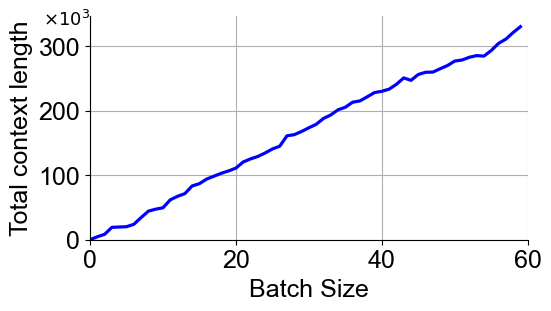

In [25]:

context_bs_dict = {k: context_bs_dict[k] for k in sorted(context_bs_dict.keys())}
context_bs_dict = {k: v for k, v in context_bs_dict.items() if k < 60}

# Calculate average and standard deviation for each key
avg = {key: np.mean(values)*7 for key, values in context_bs_dict.items()}
std_dev = {key: np.std(values)*7 /np.mean(values) for key, values in context_bs_dict.items()}
print(std_dev)
# Plotting
keys = list(avg.keys())
avg_values = list(avg.values())
std_dev_values = list(std_dev.values())

fig, ax =plt.subplots(figsize=(5.4, 3), constrained_layout=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.rcParams.update({'font.size': 18})
plt.plot(keys, avg_values, color='blue', label='Average')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 1e-3:.0f}'))
plt.text(0, 1.03, '$\\times10^{3}$', ha='right', va='top', transform=plt.gca().transAxes , fontsize=13)

# plt.fill_between(keys, np.array(avg_values) - np.array(std_dev_values), np.array(avg_values) + np.array(std_dev_values), color='lightblue', alpha=0.5, label='Variance')
plt.xlabel('Batch Size')
plt.ylabel('Total context length')
# plt.legend(loc = 'lower right')
plt.grid(True)
plt.xlim(0, 60)
plt.ylim(ymin=0)
plt.savefig(f'bs-len.pdf', bbox_inches='tight')
plt.show()

from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
corr_coefficient, _ = pearsonr(keys, avg_values)


## Evaluation Setup

### QoE requirements distribution

In [21]:
# import random
# def generate_reading_speed_requirements(
#     age_distribution: list[float] = [28.04, 51.87, 11.19, 5.56, 3.33],
#     num_samples: int = 100  # Number of read speeds to generate
# ):
#     random.seed(0)
#     read_speeds = []  # List to store generated read speeds

#     accumulated_sum = list(accumulate(age_distribution))

#     for _ in range(num_samples):
#         rand = random.uniform(0, 100)
#         if rand <= accumulated_sum[0]:
#             read_speeds.append(0.196)
#         elif rand <= accumulated_sum[1]:
#             read_speeds.append(0.230)
#         elif rand <= accumulated_sum[2]:
#             read_speeds.append(0.240)
#         elif rand <= accumulated_sum[3]:
#             read_speeds.append(0.249)
#         else:
#             read_speeds.append(0.264)

#     return read_speeds

# read_speeds = generate_reading_speed_requirements(num_samples=3000)

# # Plotting the histogram of read speeds
# plt.figure(figsize=(10, 6))
# plt.hist(read_speeds, bins=20, alpha=0.7, color='blue', weights=np.ones(len(read_speeds))/len(read_speeds))
# plt.xlabel('Token Delivery Speed (ms)')
# plt.ylabel('User Trace Percentage (%)')
# plt.xticks([0.196, 0.230, 0.240, 0.249, 0.264], ['0.196', '0.230', '0.240', '0.249', '0.264'])
# plt.yticks(np.arange(0, 0.6, 0.1), ['{:.0f}%'.format(i * 100) for i in np.arange(0, 0.6, 0.1)])
# plt.grid(axis='y', alpha=0.75)

# plt.savefig("hist-token-dilivery.pdf")

# # Display the plot
# plt.show()

### Preemption Overhead

In [22]:
# import pandas as pd
# import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 22})

# file_path = '/swap_recompute_overhead.csv'

# df = pd.read_csv(file_path)

# model_sizes = df['Model size'].unique()
# tensor_parallel_sizes = df['Tensor parallel size'].unique()
# gpu_types = df['GPU type'].unique()
# print(model_sizes)
# print(tensor_parallel_sizes)
# print(gpu_types)

# for gpu_type in gpu_types:
#     plt.figure()
#     for tp_size in tensor_parallel_sizes:

#         for model_size in model_sizes:
#             if tp_size == 1:
#                 if model_size != 13:
#                     continue
#             if tp_size == 2:
#                 continue
#             if tp_size == 4:
#                 if model_size == 13 or model_size == 66:
#                     continue
#             filtered_df = df[(df['Preemption method'].isin(['swap', 'recompute'])) &
#                             (df['Model size'] == model_size) &
#                             (df['GPU type'] == gpu_type) &
#                             (df['Tensor parallel size'] == tp_size)]

#             for method in ['swap', 'recompute']:
#                 method_df = filtered_df[filtered_df['Preemption method'] == method]
#                 if not method_df.empty:
#                     context_length = [64,128,256,512,1024,2048]
#                     overhead = [method_df[f'conext length {i}'] for i in context_length]
#                     if model_size == 13 or model_size == 70:
#                         plt.plot(context_length, overhead, label=f'{method} {model_size}B')
#                     elif model_size == 30:
#                         plt.plot(context_length, overhead, label=f'{method} {model_size}B')
#                     else:
#                         plt.plot(context_length, overhead, label=f'{method} {model_size}B')

#         plt.xlabel('KV Cache Length')
#         plt.ylabel('Overhead (s)')
#         plt.xlim(left=0)
#         plt.ylim(bottom=0)
#         plt.ylim(top=1.3)
#         # plt.title(f'overhead vs context_length gpu {gpu_type}')
#         plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
#         plt.savefig(f'preempt_overhead_gpu_{gpu_type}.png', bbox_inches='tight')


## End-to-End Evaluation - A100


In [27]:
def arrival_rate_to_request_rate(arr_rate):
    return [ 1/i for i in arr_rate]

def scale_100(l):
  return [n for n in l]

def get_SEM(error_list, scale=800):
  scale = np.sqrt(scale)
  return [e/scale for e in error_list]

mpl.rcParams['lines.linewidth'] = 2
plt.rcParams.update({'font.size': 26})
def qoe_arrival(x_list, y_list, file_name='opt-a40.pdf', error_list = None, ylabel = 'Avg QoE', legend = False):
  if legend:
    plt.figure(figsize=(10, 5), constrained_layout=True)
  else:
    plt.figure(figsize=(4.6, 3), constrained_layout=True)

  if len(x_list) == 3:
    plt.plot(x_list[0], y_list[0],marker='*', linestyle='-', label='RR', color='grey')
    plt.plot(x_list[1], y_list[1],marker='o', linestyle='-', label='vLLM', color='blue')
    plt.plot(x_list[2], y_list[2], marker='d', linestyle='-', label=f'{SYS_NAME}', color='orange')
  else:
    plt.plot(x_list[0], y_list[0],marker='o', linestyle='-', label='vLLM', color='blue')
    plt.plot(x_list[1], y_list[1], marker='d', linestyle='-', label=f'{SYS_NAME}', color='orange')

  # Adding labels and title
  plt.xlabel('Request rate (req/s)')
  plt.ylabel(ylabel)
  plt.axhline(y=0.9, color='r', linestyle='--')

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.grid(axis='x', linestyle='--', alpha=0.7)
  # plt.rcParams["figure.autolayout"] = True
  plt.ylim([0,1])
  if legend:
    plt.legend(loc='upper center', bbox_to_anchor=(0.4, 1.3), ncol=3, frameon=False)

  plt.savefig(f'e2e-{file_name}.pdf')
  plt.show()

def thput_arrival(x_list, y_list, file_name):
  plt.figure(figsize=(4.6, 4), constrained_layout=True)

  plt.plot(x_list[0], y_list[0],label='vLLM',marker='o', linestyle='-', color='blue')
  plt.plot(x_list[1], y_list[1], label=f'{SYS_NAME}',marker='d', linestyle='-', color='orange')

  plt.xlabel('Request rate (req/s)')
  plt.ylabel('Normalized latency\n(s/token)')

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.grid(axis='x', linestyle='--', alpha=0.7)
  # plt.rcParams["figure.autolayout"] = True
  # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, frameon=False)
  plt.ylim([0,2])

  plt.savefig(f'thpt-{file_name}.pdf')
  plt.show()


def req_thput_arrival(x_list, y_list, file_name):
  plt.figure(figsize=(4.5, 3), constrained_layout=True)

  plt.plot(x_list[0], y_list[0],label='vLLM',marker='o', linestyle='-', color='blue')
  plt.plot(x_list[1], y_list[1], label=f'{SYS_NAME}',marker='d', linestyle='-', color='orange')

  plt.xlabel('Request rate (req/s)')
  plt.ylabel('Throughput\n(tokens/s)')

  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.grid(axis='x', linestyle='--', alpha=0.5)
  # plt.rcParams["figure.autolayout"] = True
  # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, frameon=False)
  plt.ylim([0,90])

  plt.savefig(f'req-thpt-{file_name}.pdf')
  plt.show()



### OPT 66B


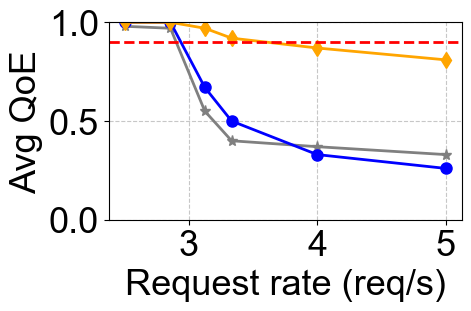

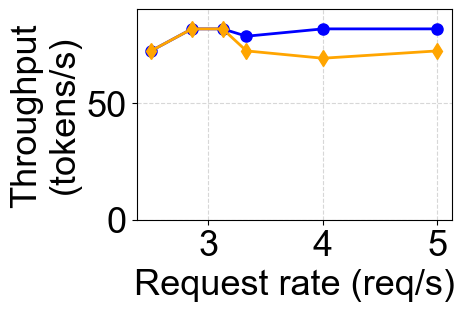

In [28]:

rr_x = [0.2, 0.25, 0.3, 0.32, 0.35, 0.4]
rr_x = arrival_rate_to_request_rate(rr_x)
rr_y = [0.33, 0.37, 0.4, 0.55, 0.97,0.98]

# Data for the first curve
vllm_x = [0.2, 0.25, 0.3, 0.32, 0.35, 0.4]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y = [0.26, 0.33, 0.5, 0.67, 1, 1]

# Data for the second curve
andes_x = [0.2, 0.25, 0.3, 0.32, 0.35, 0.4]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y = [0.81, 0.87, 0.92,0.97, 1, 1, ]
qoe_arrival([rr_x,vllm_x,andes_x],[rr_y,vllm_y,andes_y],'opt66b-share-a100')

andes_thpt = [1.103917, 0.818999, 0.575372, 0.295805, 0.129030, 0.103559]
vllm_thpt= [1.944994, 1.321316, 0.740035, 0.384852, 0.127567, 0.103940]

thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-share-a100')
andes_thpt=[.23, 0.22, 0.23, 0.26, 0.26, 0.23,  ]
vllm_thpt=[0.26, 0.26, 0.25, 0.26, 0.26, 0.23]

vllm_thpt = [i*314 for i in vllm_thpt]
andes_thpt= [i*314 for i in andes_thpt]

req_thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-share-a100')



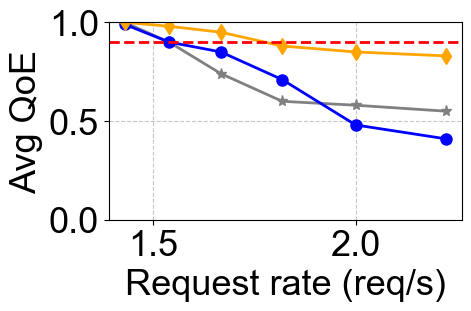

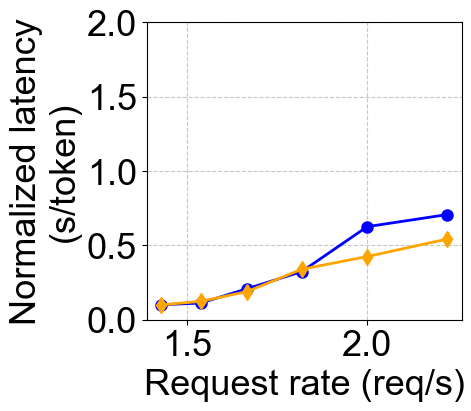

In [29]:

# Data for the first curve

vllm_x = [  0.45, 0.5, 0.55, 0.6,0.65, 0.7]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y = [   0.41, 0.48, 0.71, 0.85, 0.9, 0.99]
# Data for the second curve
andes_x = [ 0.45, 0.5, 0.55, 0.6, 0.65, 0.7,]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y = [ 0.83, 0.85, 0.88, 0.95, 0.98, 1,]

# 0.34, 0.41, 0.48, 0.71, 0.85, 0.99]

rr_x = [  0.45, 0.5, 0.55, 0.6,0.65, 0.7]
rr_x = arrival_rate_to_request_rate(rr_x)
rr_y = [0.55,0.58,0.6,0.74,0.90,1]

qoe_arrival([rr_x,vllm_x,andes_x],[rr_y,vllm_y,andes_y],'opt66b-multi-a100')

# 0.710321,
# 1.005309,
andes_thpt = [0.542656, 0.424909, 0.339218, 0.188997, 0.123543, 0.100053,]
vllm_thpt=[ 0.707297, 0.625778, 0.323188, 0.208313, 0.112091 , 0.100666 ]
thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-multi-a100')


# 0.14,
# 0.15,
andes_thpt=[0.14, 0.13, 0.13, 0.14, 0.14, 0.13, ]
vllm_thpt=[0.15, 0.15, 0.15, 0.14, 0.14, 0.13]

vllm_thpt = [i*365 for i in vllm_thpt]
andes_thpt= [i*365 for i in andes_thpt]

req_thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-multi-a100')


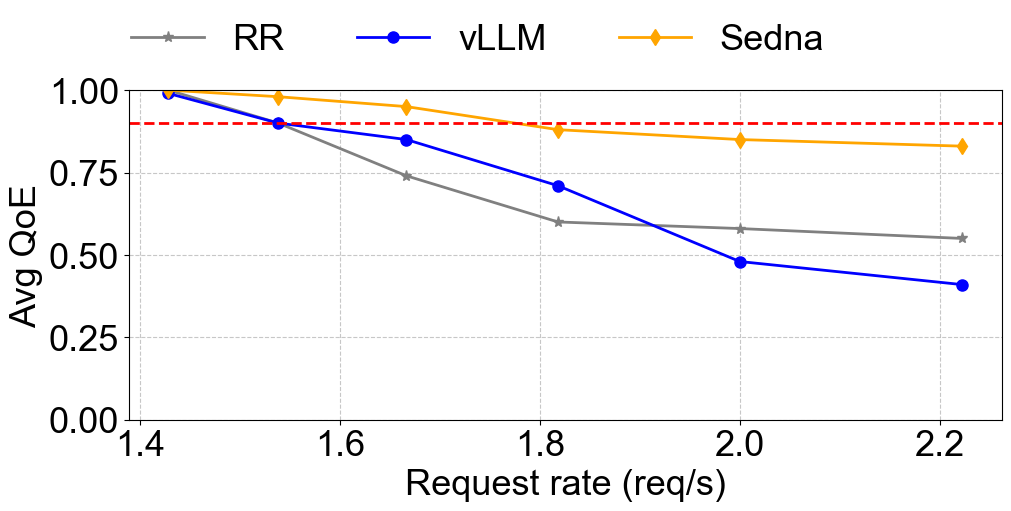

In [30]:
qoe_arrival([rr_x,vllm_x,andes_x],[rr_y,vllm_y,andes_y],'legend',legend=True)


### OPT 30B

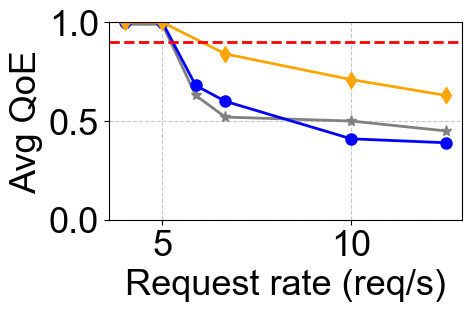

In [31]:

rr_x = [  0.08, 0.1, 0.15, 0.17, 0.2, 0.25  ]
rr_x = arrival_rate_to_request_rate(rr_x)
rr_y = [0.45, 0.50,0.52,0.63,0.99, 0.99]

# Data for the first curve
vllm_x =[  0.08, 0.1, 0.15, 0.17, 0.2, 0.25  ]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y =[  0.39, 0.41, 0.6, 0.68, 1, 1  ]

# Data for the second curve
andes_x = [  0.08, 0.1, 0.15,  0.2, 0.25,   ]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y =  [0.63, 0.71, 0.84,  1, 1,    ]
qoe_arrival([rr_x, vllm_x,andes_x],[rr_y, vllm_y,andes_y],'opt30b-share-a100')


# vllm_thpt= [ 382.87, 382.95, 384.86, 383.83, 358.68, 321.05]
# andes_thpt=[322.9, 328.5, 336.82, 362.71, 348.05, 323.91, ]

# thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-share-a100')



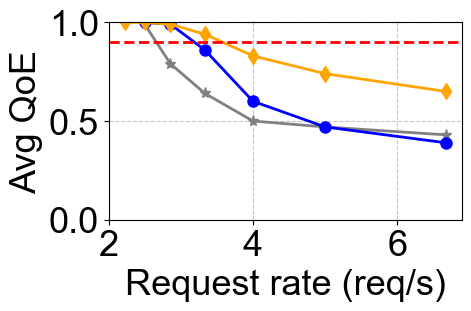

In [32]:

rr_x = [ 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
rr_x = arrival_rate_to_request_rate(rr_x)
rr_y = [0.43, 0.47,0.5,0.64,0.79, 0.99]

# Data for the first curve
vllm_x =[ 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y =	[ 0.39, 0.47, 0.6, 0.86, 0.99, 1]


# Data for the second curve
andes_x = [  0.15,0.2, 0.25, 0.3, 0.35, 0.4, 0.45, ]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y =  [0.65, 0.74, 0.83, 0.94, 0.99, 1, 1,  ]
qoe_arrival([rr_x,vllm_x,andes_x],[rr_y,vllm_y,andes_y],'opt30b-multi-a100')



### OPT 13B

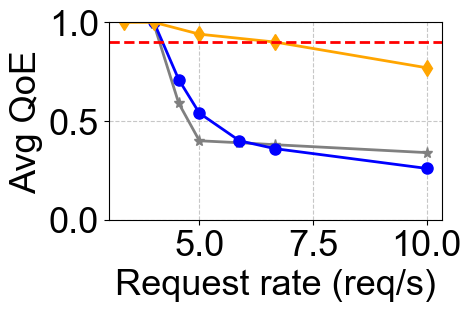

In [33]:

rr_x =[0.1, 0.15, 0.17, 0.2, 0.22, 0.25]
rr_x = arrival_rate_to_request_rate(rr_x)
rr_y = [0.34,0.38,0.39,0.4,0.59, 0.99 ]

# Data for the first curve
vllm_x =[0.1, 0.15, 0.17, 0.2, 0.22, 0.25]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y = [ 0.26, 0.36, 0.4, 0.54, 0.71, 1]


# Data for the second curve
andes_x = [0.1, 0.15, 0.2, 0.25, 0.3,   ]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y = [0.77, 0.9, 0.94, 1, 1,]
qoe_arrival([rr_x,vllm_x,andes_x],[rr_y,vllm_y,andes_y],'opt13b-share-a100')


# vllm_thpt= [ 382.87, 382.95, 384.86, 383.83, 358.68, 321.05]
# andes_thpt=[322.9, 328.5, 336.82, 362.71, 348.05, 323.91, ]
# thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-share-a100')




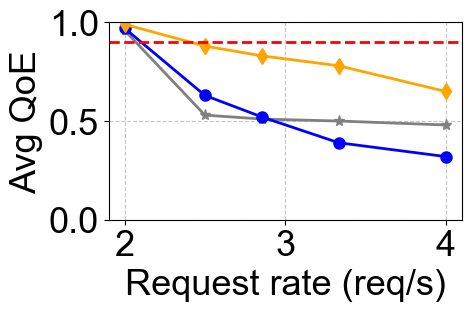

In [34]:

rr_x =[0.25, 0.3, 0.35, 0.4, 0.5]
rr_x = arrival_rate_to_request_rate(rr_x)
rr_y = [0.48,0.5,0.51,0.53,0.96]

# Data for the first curve
vllm_x =[0.25, 0.3, 0.35, 0.4, 0.5]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y =[ 0.32, 0.39, 0.52, 0.63, 0.97]


# Data for the second curve
andes_x = [0.25, 0.3, 0.35, 0.4, 0.5, ]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y = [0.65, 0.78, 0.83, 0.88, 0.99,]
qoe_arrival([rr_x,vllm_x,andes_x],[rr_y,vllm_y,andes_y],'opt13b-multi-a100')


# vllm_thpt= [ 382.87, 382.95, 384.86, 383.83, 358.68, 321.05]
# andes_thpt=[322.9, 328.5, 336.82, 362.71, 348.05, 323.91, ]

# thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-share-a100')






### OPT 175B

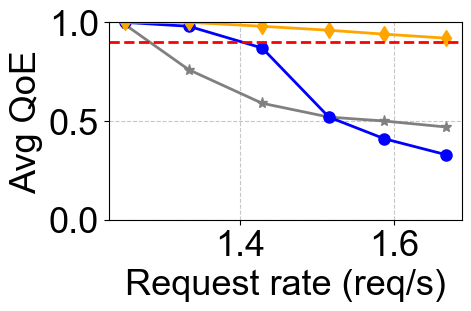

In [35]:

rr_x =[0.6,0.63, 0.66, 0.7, 0.75, 0.8,]
rr_x = arrival_rate_to_request_rate(rr_x)
rr_y = [0.47, 0.5, 0.52,0.59, 0.76, 0.99 ]

# Data for the first curve
vllm_x =[0.6,0.63, 0.66, 0.7, 0.75, 0.8,]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y = [0.33, 0.41, 0.52, 0.87, 0.98, 1]


# Data for the second curve
andes_x = [0.6, 0.63, 0.66, 0.7, 0.75, 0.8,]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y = [0.92 , 0.94, 0.96, 0.98, 1, 1,]
# qoe_arrival([ vllm_x,andes_x],[ vllm_y,andes_y],'opt175b-share-a100')
qoe_arrival([rr_x,vllm_x,andes_x],[rr_y,vllm_y,andes_y],'opt175b-share-a100')

# [0.63, 0.66, 0.7, 0.75, 0.8, 0.63, 0.66, 0.7, 0.75, 0.8]	[0.94, 0.96, 0.99, 1, 1, 0.41, 0.52, 0.87, 0.98, 1]




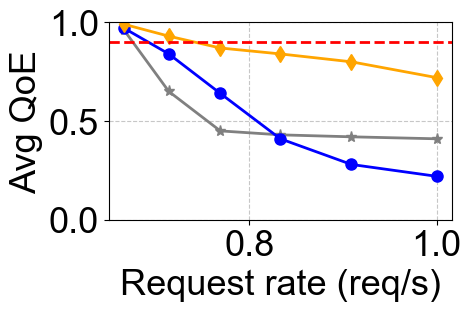

In [1030]:

rr_x =[1, 1.1, 1.2, 1.3, 1.4, 1.5]
rr_x = arrival_rate_to_request_rate(rr_x)
rr_y = [0.41, 0.42, 0.43, 0.45, 0.65, 0.96]

# Data for the first curve
vllm_x =[1, 1.1, 1.2, 1.3, 1.4, 1.5]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y =[ 0.22, 0.28, 0.41, 0.64, 0.84, 0.97]


# Data for the second curve
andes_x = [1, 1.1, 1.2, 1.3, 1.4, 1.5]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y = [0.72, 0.8, 0.84, 0.87, 0.93, 0.99]
qoe_arrival([rr_x,vllm_x,andes_x],[rr_y,vllm_y,andes_y],'opt175b-multi-a100')





### OPT - Gamma


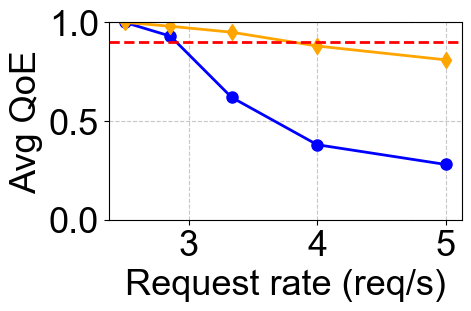

In [1031]:


# Data for the first curve
vllm_x =[0.2, 0.25, 0.3, 0.35, 0.4]


vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y = [  0.28, 0.38, 0.62, 0.93, 1]


# Data for the second curve
andes_x = [0.2, 0.25, 0.3, 0.35, 0.4,  ]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y = [0.81, 0.88, 0.95, 0.98, 1,]
qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y],'opt-share-gamma-a100')


# vllm_thpt= [ 382.87, 382.95, 384.86, 383.83, 358.68, 321.05]
# andes_thpt=[322.9, 328.5, 336.82, 362.71, 348.05, 323.91, ]

# thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-share-a100')





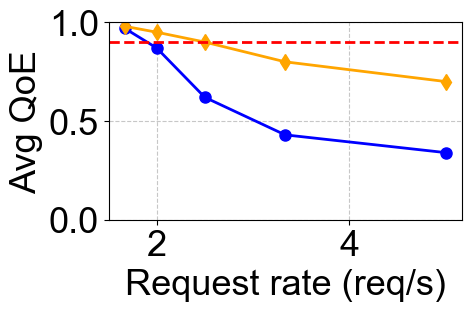

In [1032]:

# Data for the first curve
vllm_x =[0.2, 0.3, 0.4, 0.5, 0.6]


vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y = [0.34, 0.43, 0.62, 0.87, 0.97]


# Data for the second curve
andes_x = [0.2, 0.3, 0.4, 0.5, 0.6,  ]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y = [0.7, 0.8, 0.9, 0.95, 0.98, ]
qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y],'opt-multi-gamma-a100')


# vllm_thpt= [ 382.87, 382.95, 384.86, 383.83, 358.68, 321.05]
# andes_thpt=[322.9, 328.5, 336.82, 362.71, 348.05, 323.91, ]

# thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-share-a100')





### OPT - Voice

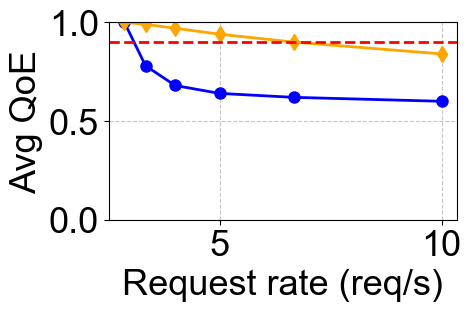

In [1033]:

# Data for the first curve
vllm_x = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y =  [ 0.6, 0.62, 0.64, 0.68, 0.78, 1]


# Data for the second curve
andes_x =  [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y =  [0.84, 0.9, 0.94, 0.97, 0.99, 1]
qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y],'opt66b-share-voice-a100')


# vllm_thpt= [ 382.87, 382.95, 384.86, 383.83, 358.68, 321.05]
# andes_thpt=[322.9, 328.5, 336.82, 362.71, 348.05, 323.91, ]

# thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'opt66b-share-a100')





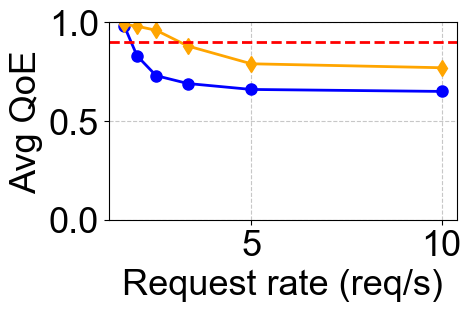

In [1034]:

# Data for the first curve
vllm_x = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y = [ 0.65, 0.66, 0.69, 0.73, 0.83, 0.98]


# Data for the second curve
andes_x =  [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y =  [0.77, 0.79, 0.88, 0.96, 0.98, 0.99]
qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y],'opt66b-multi-voice-a100')


# vllm_thpt= [ 382.87, 382.95, 384.86, 383.83, 358.68, 321.05]
# andes_thpt=[322.9, 328.5, 336.82, 362.71, 348.05, 323.91, ]


### OPT - A40


### Mixtral

In [1035]:
# # Data for the first curve
# vllm_x =[ 0.1, 0.15, 0.2, 0.3,]
# vllm_x = arrival_rate_to_request_rate(vllm_x)
# vllm_y = [0.5, 0.74, 0.94, 0.99]

# vllm_thpt =   [1007.49, 981.57, 1095.67, 1016.42]



# # Data for the second curve
# andes_x =  [0.1, 0.15, 0.2, 0.3, ]
# andes_x = arrival_rate_to_request_rate(andes_x)
# andes_y = [0.6, 0.84, 0.96, 0.99, ]
# andes_thpt = [949.32, 1009.08, 1080.45, 1043.52, ]

# # andes_err = [0.25, 0.26, 0.29, 0.24, 0.18, 0.0,]
# # vllm_err = [ 0.26, 0.28, 0.31, 0.36, 0.0]


# # [0.23, 0.16, 0.08, 0.06, 0.25, 0.28, 0.13, 0.06]


# qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y], file_name = 'mixtral-multi-a100')
# thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'mixtral-multi-a100')


### Llama - 70B

In [1036]:




# # Data for the first curve
# vllm_x =[  0.08, 0.1, 0.2, 0.3, 0.4 ]
# vllm_x = arrival_rate_to_request_rate(vllm_x)
# vllm_y = [ 0.18, 0.19, 0.27, 0.47, 1.0]
# vllm_thpt =   [ 829.49, 813.53, 823.47, 830.64, 771.45]


# # Data for the second curve
# andes_x =  [0.08, 0.1, 0.2, 0.25, 0.3, 0.4,  ]
# andes_x = arrival_rate_to_request_rate(andes_x)
# andes_y = [0.43, 0.53, 0.82, 0.91, 0.96, 1.0,]
# andes_thpt = [794.36, 767.57, 869.23, 873.04, 918.01, 779.93,]

# andes_err = [0.25, 0.26, 0.29, 0.24, 0.18, 0.0,]
# vllm_err = [ 0.26, 0.28, 0.31, 0.36, 0.0]
# andes_err = get_SEM(andes_err, 2800)
# vllm_err = get_SEM(vllm_err, 2800)

# qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y], 'llama70b-share-a100-error',[vllm_err, andes_err])
# qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y], file_name = 'llama70b-share-a100')
# thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'llama70b-share-a100')



In [1037]:
# # Data for the first curve
# vllm_x = [ 0.2, 0.3, 0.4, 0.5, 0.6, 0.8]


# vllm_x = arrival_rate_to_request_rate(vllm_x)
# vllm_y =[ 0.26, 0.32, 0.38, 0.49, 0.74, 0.99]


# # Data for the second curve
# andes_x = [ 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]
# andes_x = arrival_rate_to_request_rate(andes_x)
# andes_y = [0.6, 0.67, 0.77, 0.83, 0.9, 0.98, 0.99,]

# qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y],'llama70b-multi-a100')


# vllm_thpt= [499.72,496.43, 491.83, 495.52, 489.18, 430.62]
# andes_thpt=[ 425.99, 454.8, 445.19, 443.44, 444.3, 469.23, 426.9,  ]
# thput_arrival([vllm_x,andes_x],[vllm_thpt,andes_thpt],'llama70b-multi-a100')





### Llama - 30B

In [1016]:

# # Data for the first curve
# vllm_x = [0.04, 0.06, 0.08, 0.1, 0.2, 0.3]
# vllm_x = arrival_rate_to_request_rate(vllm_x)
# vllm_y = [ 0.4, 0.45, 0.44, 0.43, 0.71, 1.0]

# # Data for the second curve
# andes_x = [0.04, 0.06, 0.08, 0.1, 0.2, 0.3]
# andes_x = arrival_rate_to_request_rate(andes_x)
# andes_y = [0.61, 0.79, 0.88, 0.92, 1.0, 1.0,]



# qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y],'llama30b-share-a100')



In [1017]:

# # Data for the first curve
# vllm_x = [ 0.1, 0.2, 0.3, 0.4, 0.5]
# vllm_x = arrival_rate_to_request_rate(vllm_x)
# vllm_y =  [ 0.17, 0.22, 0.33, 0.85, 1.0]

# # Data for the second curve
# andes_x = [0.1, 0.2, 0.3, 0.4, 0.5,]
# andes_x = arrival_rate_to_request_rate(andes_x)
# andes_y = [0.87, 0.94, 0.91, 0.89, 1.0,]

# qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y],'llama30b-multi-a100')

### Llama - 13B

In [1018]:

# # Data for the first curve
# vllm_x = [0.1, 0.2, 0.3, 0.4, 0.5,]
# vllm_x = arrival_rate_to_request_rate(vllm_x)
# vllm_y =  [0.19, 0.24, 0.48, 1.0, 1.0]
# # Data for the second curve
# andes_x = [0.1, 0.2, 0.3, 0.4, 0.5,]
# andes_x = arrival_rate_to_request_rate(andes_x)
# andes_y = [0.49, 0.58, 0.82, 0.98, 1.0, ]

# qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y],'llama13b-share-a100')

In [1019]:

# # Data for the first curve
# vllm_x =  [  0.4, 0.5, 0.6, 0.8, 1.0]
# vllm_x = arrival_rate_to_request_rate(vllm_x)
# vllm_y = [  0.1, 0.15, 0.45, 0.97, 0.99]
# # Data for the second curve
# andes_x = [0.4, 0.5, 0.6, 0.8, 1.0,]
# andes_x = arrival_rate_to_request_rate(andes_x)
# andes_y = [0.54, 0.63, 0.71, 0.97, 1.0,  ]



# qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y],'llama13b-multi-a100')

### OPT - 66B - A40


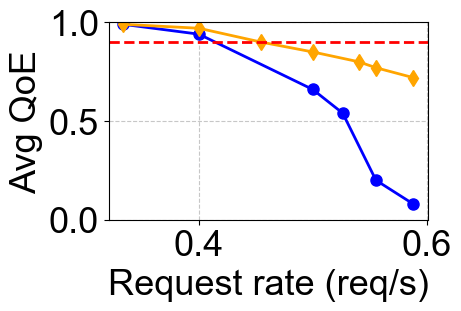

In [1020]:

# Data for the first curve
vllm_x =  [  1.7, 1.8,  1.9, 2.0, 2.5, 3.0]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y = [ 0.08,0.2, 0.54, 0.66, 0.94, 0.99]
# Data for the second curve
andes_x =  [ 1.7, 1.8, 1.85, 2.0, 2.2,  2.5, 3.0]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y =  [ 0.72, 0.77, 0.80, 0.85, 0.9, 0.97, 0.99 ]



qoe_arrival([vllm_x,andes_x],[vllm_y,andes_y], 'opt66b-share-a40')

### LLAMA - 70B - A40

In [877]:
# # Data for the first curve
# x1 = [.25, .3, .4, .5, .6]
# x1 = arrival_rate_to_request_rate(x1)
# y1 = [75,78,89,96,100]
# thpt1 = [1.68,1.43,1.57, 1.31, 1.2]


# # Data for the second curve
# x2 = [.25, .3, .4, .5, .6]
# x2 = arrival_rate_to_request_rate(x2)
# y2 = [54,57,91,100,100]
# thpt2 = [1.66,1.6,1.71,1.53,1.34]

# qoe_arrival([x2,x1],[y2,y1],'llama70B-sharegpt-a40')
# thput_arrival([x2,x1],[thpt2,thpt1],'llama70B-sharegpt-a40')




In [878]:
# # Data for the first curve
# x1 = [.4,.5,.6,.7,.75,.8,.85,.9]
# x1 = arrival_rate_to_request_rate(x1)
# y1 = [24,28,36,54,96,98,100,100]
# # ttft1 = [68.83, 29.93, 10.91, 8.31, 6.48, 4.44]
# # thpt1 = [.44,.44,.4,.38,.35]


# # Data for the second curve
# x2 = [.4,.6,.75,.8,.85,.9]
# x2 = arrival_rate_to_request_rate(x2)
# y2 = [65,77,92,95,97,100]
# # ttft2 = [3.25, 2.32, 2.23, 1.13]
# # thpt2 = [.43,.4,.39,.38,.35]

# qoe_arrival([x1,x2],[y1,y2],'llama70B-sharemulti-a40')
# # thput_arrival([x1,x2],[thpt1,thpt2],'opt-share-a40')



Perfect-QoE

In [879]:

# # Data for the second curve
# x1 = [.25, .3, .4, .5, .6]
# x1 = arrival_rate_to_request_rate(x1)
# y1 = [25,31,57,98,100]
# thpt1 = [1.66,1.6,1.71,1.53,1.34]

# # Data for the first curve
# x2 = [.25, .3, .4, .5, .6]
# x2 = arrival_rate_to_request_rate(x2)
# y2 = [22,34,63,77,100]
# # thpt2 =


# qoe_arrival([x1,x2],[y1,y2],'llama70B-sharegpt-perfect-a40')
# # thput_arrival([x1,x2],[thpt1,thpt2],'llama70B-sharegpt-a40')

In [880]:
# # Data for the first curve
# x1 = [.4,.5,.6,.7,.75,.8,.85,.9]
# x1 = arrival_rate_to_request_rate(x1)
# y1 = [17,24,26,39,88,91,98,99]
# # ttft1 = [68.83, 29.93, 10.91, 8.31, 6.48, 4.44]
# # thpt1 = [.44,.44,.4,.38,.35]


# # Data for the second curve
# x2 = [.4,.6,.75,.8,.85,.9]
# x2 = arrival_rate_to_request_rate(x2)
# y2 = [29,37,55,69,76,89]
# # ttft2 = [3.25, 2.32, 2.23, 1.13]
# # thpt2 = [.43,.4,.39,.38,.35]

# qoe_arrival([x1,x2],[y1,y2],'llama70B-sharemulti-perfect-a40')
# # thput_arrival([x1,x2],[thpt1,thpt2],'opt-share-a40')



# Abalation

## Delta t

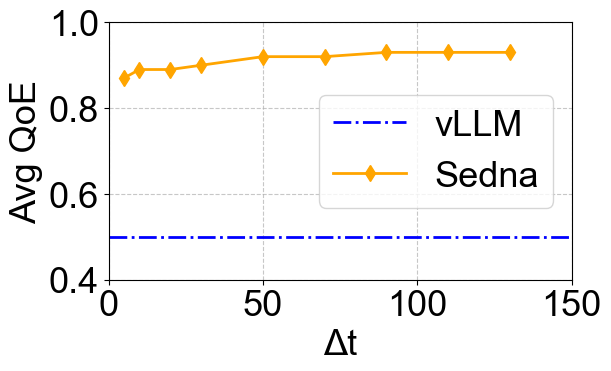

In [1044]:


plt.figure(figsize=(6, 3.6), constrained_layout=True)

# Data for the first curve
x2 = [5, 10, 20, 30, 50, 70, 90, 110, 130]
y2 = [0.87, 0.89, 0.89, 0.9, 0.92, 0.92, 0.93, 0.93, 0.93]

# Plotting the curves
plt.axhline(y=0.5, color='blue', linestyle='-.', label=f'{BASE}')
plt.plot(x2, y2, label=f'{SYS_NAME}',marker='d', color='orange')

# Adding labels and title
plt.xlabel('Δt')
plt.ylabel('Avg QoE')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.rcParams["figure.autolayout"] = True
plt.ylim((0.4, 1))
plt.xlim((0,150))
plt.legend( loc='center right' )
plt.savefig('delta-t-opt66b-share.pdf')
plt.show()



## Preemption frequency

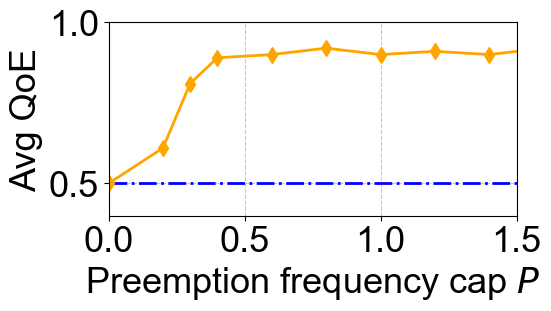

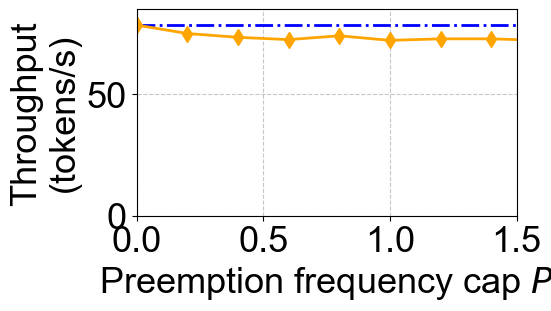

In [23]:


plt.figure(figsize=(5.4, 3), constrained_layout=True)

x2 = [0,0.2, 0.3, 0.4, 0.6, 0.8,1,   1.2,   1.4,   1.6, 1.8]
y2 = [0.5,0.61, 0.81, 0.89, 0.9, 0.92, 0.9, 0.91, 0.9, 0.92, 0.91]

# Plotting the curves
plt.axhline(y=0.5, color='blue', linestyle='-.', label=f'{BASE}')
plt.plot(x2, y2, label=f'{SYS_NAME}',marker='d', color='orange')

plt.xlabel('Preemption frequency cap $P$')
plt.ylabel('Avg QoE')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.rcParams["figure.autolayout"] = True
plt.ylim((0.4, 1))
plt.xlim((0,1.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6), ncol=2, frameon=False)

plt.savefig('preemption-freq-qoe-opt66b-share.pdf',bbox_inches='tight')
plt.show()




plt.figure(figsize=(5.4, 3), constrained_layout=True)
x2 = [0,0.2, 0.4, 0.6, 0.8,1, 1.2,1.4, 1.6, 1.8]

norm_lat= [ 0.740035, 0.627861, 0.576906, 0.564432, 0.553405, 0.482574, 0.518278, 0.491076, 0.538360, 0.605018, 0.648381, 0.572067, 0.625884]
req_thpt = [0.25, 0.239, 0.234, 0.231,  0.236, 0.23,  0.232, 0.232, 0.23, 0.234 ]

req_thpt = [i*314 for i in req_thpt]
# 0.25,
# Plotting the curves
plt.axhline(y=0.25*314 , color='blue', linestyle='-.', label=f'{BASE}')
# plt.axhline(y=0.740035, color='blue', linestyle='-.', label=f'{BASE}')
plt.plot(x2, req_thpt, label=f'{SYS_NAME}',marker='d', color='orange')


# Adding labels and title
plt.xlabel('Preemption frequency cap $P$')
# plt.ylabel('Normalized Latency \n (s/token)')
plt.ylabel('Throughput\n(tokens/s)')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylim((0, 85))
plt.xlim((0,1.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6), ncol=2, frameon=False)

plt.savefig('preemption-freq-thpt-opt66b-share.pdf',bbox_inches='tight')
plt.show()






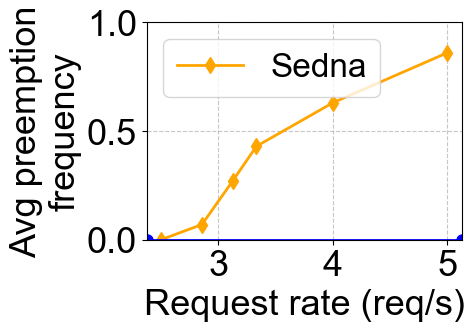

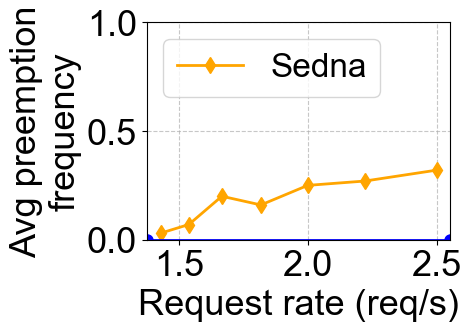

In [21]:
plt.figure(figsize=(4.6, 3.2), constrained_layout=True)

x=[0.2, 0.25, 0.3, 0.32, 0.35, 0.4]
x = arrival_rate_to_request_rate(x)

preemption_freq = [0.86, 0.63, 0.43, 0.27, 0.07, 0]

plt.plot(x, preemption_freq, label=f'{SYS_NAME}',marker='d', color='orange')

# Adding labels and title
plt.ylabel('Avg preemption\nfrequency')
plt.xlabel('Request rate (req/s)')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.rcParams["figure.autolayout"] = True
plt.ylim((0, 1))
plt.axhline(y=0, color='blue', marker='o')

# plt.xlim((0,1.5))
plt.legend(fontsize=24, loc='upper left' )
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, frameon=False, fontsize=20)

plt.savefig('preemption-freq-opt66b-share.pdf')
plt.show()

plt.figure(figsize=(4.6, 3.2), constrained_layout=True)

x=[0.4, 0.45,0.5,0.55,0.6,0.65,0.7]
x = arrival_rate_to_request_rate(x)

preemption_freq = [0.32,0.27,0.25,0.16,0.2,0.07,0.03]

plt.plot(x, preemption_freq, label=f'{SYS_NAME}',marker='d', color='orange')

# Adding labels and title
plt.ylabel('Avg preemption\nfrequency')
plt.xlabel('Request rate (req/s)')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.rcParams["figure.autolayout"] = True
plt.ylim((0, 1))
# plt.xlim((0,1.5))
plt.legend(fontsize=24 , loc='upper left' )
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, frameon=False, fontsize=20)
plt.axhline(y=0, color='blue', marker='o')
plt.savefig('preemption-freq-opt66b-multi.pdf')
plt.show()


# Breakdown

In [1043]:

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# plt.rcParams.update({'font.size': 22})

def plot_cdf(res_list, label_list, metric_name, colors=['blue', 'orange',], xmin = 0, xmax = None):
  xmax = 10e6
  plt.figure(figsize=(5.4, 3), constrained_layout=True)
  for i, res in enumerate(res_list):
    res = np.sort(res)

    xmax = min(xmax, np.percentile(res, 99))

    cdf = np.linspace(0, 1, len(res))
    avg =np.mean(res)
    # sns.kdeplot(data = res, cumulative = True, label = f'{label_list[i]} (mean: {avg: .2f}s)')#,bw_adjust=0.2, common_norm=False, common_grid=True, clip=(min(res), 400))
    plt.plot(res, cdf, label=f'{label_list[i]}',color=colors[i],linewidth=2.5)

  plt.ylim((0,1))
  plt.xlim((xmin,xmax))
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.grid(axis='x', linestyle='--', alpha=0.7)
  # plt.title(metric_name)
  plt.xlabel(metric_name)
  plt.ylabel('CDF')

  # plt.legend( loc = 'lower right')
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, frameon=False)

  plt.savefig(f'breakdown-{metric_name}.pdf')
  plt.show()

SYS='Andes'
BASE='vLLM'

### TTFT


/home/julius/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


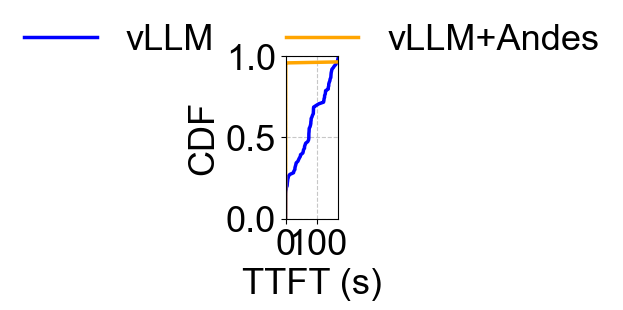

In [885]:
res = [[0.14565682411193848, 0.152191162109375, 0.18890929222106934, 0.22653603553771973, 0.24629569053649902, 0.24629569053649902, 0.28226208686828613, 0.2991795539855957, 0.31809306144714355, 0.32423996925354004, 0.3396289348602295, 0.34203267097473145, 0.3440842628479004, 0.3488895893096924, 0.34901928901672363, 0.35160303115844727, 0.35331273078918457, 0.3540306091308594, 0.35663795471191406, 0.35927796363830566, 0.36701440811157227, 0.380509614944458, 0.38071322441101074, 0.3847024440765381, 0.38553929328918457, 0.39473724365234375, 0.39485931396484375, 0.4109950065612793, 0.41144561767578125, 0.41248512268066406, 0.4135286808013916, 0.4156615734100342, 0.42551159858703613, 0.43314123153686523, 0.4339158535003662, 0.4345662593841553, 0.4374675750732422, 0.44204282760620117, 0.44220709800720215, 0.44458842277526855, 0.44993090629577637, 0.45237255096435547, 0.453458309173584, 0.4558141231536865, 0.45610928535461426, 0.4564213752746582, 0.45684266090393066, 0.4590606689453125, 0.46070146560668945, 0.46165037155151367, 0.4700033664703369, 0.47663402557373047, 0.47809314727783203, 0.4791712760925293, 0.4795660972595215, 0.48117589950561523, 0.4822511672973633, 0.48522043228149414, 0.48661375045776367, 0.4889981746673584, 0.49057483673095703, 0.4909071922302246, 0.4922165870666504, 0.5001811981201172, 0.5027360916137695, 0.5065972805023193, 0.5167238712310791, 0.5176620483398438, 0.5270082950592041, 0.5276734828948975, 0.5294277667999268, 0.5341792106628418, 0.5350103378295898, 0.5440101623535156, 0.5455656051635742, 0.5469317436218262, 0.5480809211730957, 0.5507967472076416, 0.5519390106201172, 0.5655937194824219, 0.5685622692108154, 0.5715677738189697, 0.5782210826873779, 0.582646369934082, 0.5872232913970947, 0.5875828266143799, 0.6227502822875977, 0.639005184173584, 0.6579582691192627, 0.6723964214324951, 0.6821486949920654, 0.727226972579956, 0.7465701103210449, 0.9064779281616211, 278.5261127948761, 353.71683049201965, 393.74262857437134, 611.7879014015198], [0.15040254592895508, 0.16591191291809082, 0.23575615882873535, 0.30965399742126465, 0.31261110305786133, 0.3262913227081299, 0.3333292007446289, 0.3469812870025635, 0.35375475883483887, 0.3759148120880127, 0.41196417808532715, 0.42439794540405273, 0.45285916328430176, 0.47722840309143066, 0.48593831062316895, 0.5063724517822266, 0.7193236351013184, 1.1808533668518066, 2.308617353439331, 2.376587390899658, 4.923929929733276, 5.341718435287476, 5.720185041427612, 6.423136234283447, 6.9699883460998535, 8.333380699157715, 9.21325397491455, 13.709041118621826, 25.051270961761475, 26.305157899856567, 29.43896245956421, 29.599280834197998, 30.962763786315918, 32.472135066986084, 33.4297878742218, 38.9338653087616, 41.11956739425659, 43.6296923160553, 46.6527316570282, 47.23525357246399, 54.44483494758606, 55.75289535522461, 56.56706476211548, 59.789591550827026, 59.81027936935425, 61.67747902870178, 63.418856620788574, 70.07730412483215, 72.49770426750183, 73.27922940254211, 73.39131164550781, 73.39131164550781, 73.52045464515686, 74.05321335792542, 74.31670594215393, 74.55858278274536, 77.09114575386047, 78.5419807434082, 79.57126140594482, 79.7538526058197, 80.54812574386597, 80.66202688217163, 83.19767689704895, 84.8033173084259, 87.58141136169434, 87.61383271217346, 87.94379377365112, 87.95804238319397, 88.57604146003723, 96.52590274810791, 104.80572390556335, 119.64782166481018, 120.83922481536865, 121.33463025093079, 122.92051839828491, 123.03437614440918, 125.1220715045929, 125.79243302345276, 126.2100076675415, 134.57895159721375, 134.62182188034058, 136.07979226112366, 136.1076865196228, 137.51451206207275, 139.5902190208435, 140.3495590686798, 142.5693736076355, 142.9313986301422, 143.3154218196869, 143.8665750026703, 145.08384799957275, 146.00905656814575, 150.23176288604736, 153.64814615249634, 158.31157660484314, 160.88201141357422, 163.77064752578735, 164.7171573638916, 165.85244226455688, 167.15743589401245]]
label_list = [f'{BASE}+{SYS}',f'{BASE}'  ]

plot_cdf(res[::-1], label_list[::-1], 'TTFT (s)', xmin = -0.1)




### TTLT

/home/julius/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


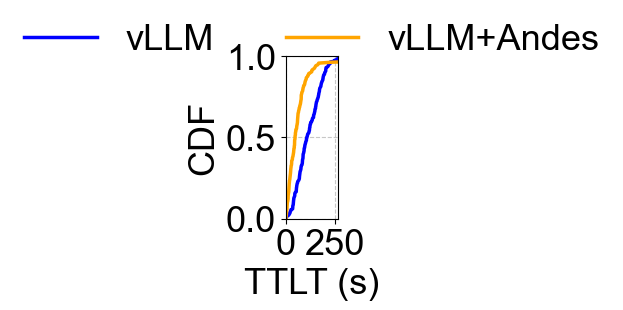

In [886]:
res = [[2.11356520652771, 2.1441709995269775, 2.8237853050231934, 3.7273685932159424, 4.457701206207275, 4.485111713409424, 4.728010177612305, 5.2525551319122314, 5.435490846633911, 5.8163957595825195, 6.034396409988403, 7.253263711929321, 7.305020809173584, 7.305886507034302, 7.771029949188232, 8.07281231880188, 8.920170783996582, 9.162137746810913, 9.288636684417725, 9.292564153671265, 11.027341365814209, 11.734207153320312, 12.9282066822052, 13.039998292922974, 13.091288805007935, 13.415689945220947, 13.49135136604309, 13.553206443786621, 14.025933742523193, 14.569522857666016, 15.56453251838684, 16.266113996505737, 16.500723123550415, 17.1650652885437, 17.263065576553345, 17.279098510742188, 17.318153381347656, 18.11638355255127, 18.136828184127808, 18.266595363616943, 18.649040460586548, 19.23109769821167, 19.48214292526245, 19.987775087356567, 20.03312659263611, 21.36279821395874, 21.582848072052002, 22.29776620864868, 22.850554943084717, 23.16287875175476, 23.897409200668335, 23.96397638320923, 24.634204864501953, 25.30789041519165, 25.528698205947876, 25.700610160827637, 25.700610160827637, 26.16822648048401, 26.952402591705322, 27.795997381210327, 28.20680856704712, 28.241689682006836, 30.024935483932495, 30.711373567581177, 31.011627435684204, 31.011627435684204, 31.052000761032104, 31.282085418701172, 33.83276963233948, 35.0577826499939, 35.0577826499939, 35.89414858818054, 37.56892490386963, 38.32289457321167, 38.918763637542725, 40.01183819770813, 40.60224938392639, 41.229231119155884, 41.38896131515503, 41.79973816871643, 42.537402391433716, 42.537402391433716, 44.491332054138184, 44.497503995895386, 44.52662014961243, 45.70071530342102, 45.88914394378662, 45.97323703765869, 46.16034722328186, 46.25663924217224, 46.28762912750244, 46.38378167152405, 47.83785605430603, 47.98730254173279, 48.04124474525452, 48.81135416030884, 48.819390058517456, 50.14202547073364, 50.14202547073364, 50.22239065170288, 50.870625257492065, 52.18036413192749, 52.18089008331299, 52.41662001609802, 55.95263910293579, 56.57588219642639, 56.71718788146973, 57.00007891654968, 57.776013135910034, 59.18688607215881, 59.461233615875244, 60.45322346687317, 60.5602810382843, 60.88878297805786, 61.111804246902466, 61.37321639060974, 61.78429388999939, 62.582870960235596, 62.65021586418152, 63.566385984420776, 63.63662242889404, 63.637142181396484, 63.865779876708984, 65.59036803245544, 66.11571550369263, 66.77515816688538, 68.30068016052246, 69.21649670600891, 69.44200301170349, 71.6038990020752, 72.10419583320618, 73.51879239082336, 75.1718282699585, 75.76634001731873, 76.31085586547852, 76.59589743614197, 77.03978037834167, 78.32242774963379, 79.38606429100037, 79.774249792099, 79.774249792099, 79.93972706794739, 79.9860987663269, 80.04778456687927, 81.50017428398132, 82.57726216316223, 82.6583423614502, 85.06000590324402, 87.31679129600525, 87.31679129600525, 88.62320566177368, 88.81518363952637, 90.60341882705688, 91.71094131469727, 92.23244976997375, 96.66537404060364, 97.43158841133118, 97.96719336509705, 99.10786008834839, 100.49897456169128, 101.67737793922424, 104.15096855163574, 105.18745732307434, 105.40230178833008, 109.32171201705933, 113.49406623840332, 113.56560921669006, 117.2864158153534, 118.42207717895508, 126.68926119804382, 133.06430912017822, 133.41726064682007, 134.51659560203552, 141.06859517097473, 146.62085938453674, 149.04639625549316, 151.67004442214966, 153.98112416267395, 162.8130648136139, 166.69440913200378, 168.46874451637268, 228.5404098033905, 346.78350734710693, 368.7187044620514, 373.2884454727173, 409.6125771999359, 432.06506609916687, 480.53398871421814, 563.1509418487549 ], [0.5102407932281494, 3.6273391246795654, 4.200988531112671, 8.161819458007812, 14.201423645019531, 17.958847761154175, 19.962899208068848, 22.70146679878235, 22.795238494873047, 24.93256688117981, 27.03325390815735, 27.48208498954773, 35.96846055984497, 36.49192810058594, 36.64154076576233, 36.6874577999115, 37.232661485672, 39.03942084312439, 39.356898069381714, 39.73493933677673, 40.0952365398407, 40.6364209651947, 40.810631275177, 41.58845901489258, 41.950347661972046, 41.950347661972046, 43.422762870788574, 44.582637310028076, 46.75516057014465, 46.93340492248535, 47.23516821861267, 47.386680126190186, 49.25776147842407, 54.30235266685486, 54.50010013580322, 54.92972445487976, 55.11353611946106, 55.115506649017334, 55.779531717300415, 56.66696834564209, 56.92629671096802, 57.812411308288574, 58.88018083572388, 59.240039587020874, 61.3978853225708, 61.4499933719635, 63.193243980407715, 67.01939511299133, 68.68891096115112, 70.12780284881592, 70.3392403125763, 70.7502293586731, 71.04009366035461, 71.63783240318298, 71.71568012237549, 72.92506670951843, 73.5705337524414, 74.12744283676147, 74.281742811203, 76.3018307685852, 77.51737070083618, 78.21318459510803, 78.45153737068176, 78.69780540466309, 79.96596479415894, 80.1732029914856, 83.79504060745239, 84.24400019645691, 85.32527732849121, 85.58543634414673, 85.58543634414673, 86.02381372451782, 86.4376072883606, 87.64883160591125, 88.50420594215393, 88.5548267364502, 89.00638008117676, 89.25984120368958, 89.43666768074036, 89.619624376297, 91.37057614326477, 92.59483098983765, 92.75773215293884, 94.25318670272827, 94.42157053947449, 94.55086135864258, 94.83193850517273, 96.97877669334412, 97.17238783836365, 98.04691743850708, 98.16382074356079, 99.89955520629883, 100.55162477493286, 102.2135591506958, 102.510657787323, 104.34389090538025, 106.18015766143799, 106.19046998023987, 106.37916564941406, 108.20697045326233, 108.39462637901306, 110.44791889190674, 111.02849793434143, 112.17865538597107, 113.36969947814941, 117.90045547485352, 119.05685663223267, 119.23586177825928, 121.33101487159729, 121.69659209251404, 121.74935865402222, 122.22302746772766, 123.80702137947083, 123.80702137947083, 124.47944211959839, 124.51020765304565, 127.24547290802002, 127.78769445419312, 128.04610443115234, 133.06656885147095, 133.7995834350586, 136.26681470870972, 136.26681470870972, 137.18335843086243, 142.25084948539734, 142.64163255691528, 142.72092461585999, 142.87990617752075, 145.44549894332886, 146.14782977104187, 147.16770768165588, 148.33899092674255, 149.17920684814453, 149.65851044654846, 149.65851044654846, 152.45887851715088, 152.58741784095764, 152.91047310829163, 154.159339427948, 154.26618361473083, 155.00927257537842, 155.54356956481934, 156.43455862998962, 157.2144901752472, 159.68003058433533, 160.7045476436615, 161.21835350990295, 163.86481428146362, 164.29279851913452, 166.32488012313843, 166.7154667377472, 167.45528745651245, 168.69010019302368, 168.79693579673767, 169.54823470115662, 170.84735250473022, 172.01065492630005, 172.0690381526947, 172.68608903884888, 173.2817738056183, 174.4237403869629, 176.9147264957428, 179.49226212501526, 179.81142258644104, 180.8445086479187, 181.4920585155487, 182.15144681930542, 184.25337052345276, 184.79469084739685, 187.54359006881714, 189.5659954547882, 189.56774139404297, 190.77316617965698, 190.91487860679626, 192.0241219997406, 193.12980961799622, 193.65159845352173, 198.189626455307, 198.78551578521729, 199.27024245262146, 202.2118091583252, 204.30840301513672, 204.31466126441956, 204.54218864440918, 205.64303994178772, 205.94651293754578, 213.36229968070984, 216.9337911605835, 218.3294095993042, 219.06890630722046, 226.68808841705322, 227.54663920402527, 228.1097846031189, 248.67411041259766, 249.93225121498108, 264.25599122047424, 265.02479362487793, 267.5169277191162, 275.728049993515, 288.62536430358887]]



label_list = [f'{BASE}+{SYS}',f'{BASE}'  ]

plot_cdf(res[::-1], label_list[::-1], 'TTLT (s)')



### First chunck

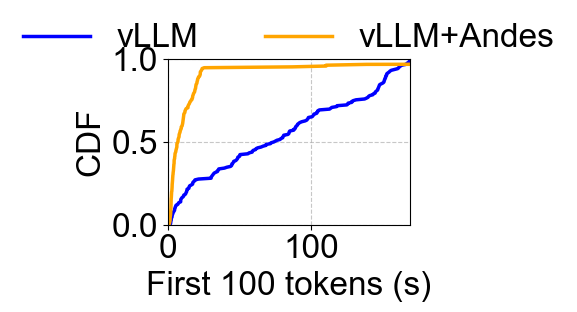

In [816]:
first_chunk_latency=[[0.6009867191314697, 1.0219783782958984, 1.1466467380523682, 1.24568772315979, 1.4411439895629883, 1.4765193462371826, 1.476848840713501, 1.4803593158721924, 1.531409740447998, 1.585728406906128, 1.6516730785369873, 1.7917914390563965, 1.8473694324493408, 1.856518268585205, 1.9191327095031738, 1.9221017360687256, 1.9678096771240234, 2.021989107131958, 2.098576307296753, 2.1073741912841797, 2.1118452548980713, 2.1237504482269287, 2.130863666534424, 2.1413002014160156, 2.160715341567993, 2.177924156188965, 2.177924156188965, 2.177924156188965, 2.1942026615142822, 2.229944944381714, 2.2670230865478516, 2.2818024158477783, 2.365966796875, 2.393158197402954, 2.434602737426758, 2.4402222633361816, 2.4402222633361816, 2.541734218597412, 2.5520286560058594, 2.5640530586242676, 2.722982168197632, 2.7724900245666504, 2.8122169971466064, 2.816657066345215, 2.850507974624634, 2.911259174346924, 2.9219651222229004, 2.9615635871887207, 2.9700193405151367, 3.031602621078491, 3.0482518672943115, 3.1941192150115967, 3.2063581943511963, 3.2174324989318848, 3.2383265495300293, 3.2975809574127197, 3.3162569999694824, 3.3895695209503174, 3.4079461097717285, 3.4331045150756836, 3.546320915222168, 3.555128335952759, 3.6275923252105713, 3.715634822845459, 3.85105562210083, 3.8526229858398438, 3.8541836738586426, 3.928302526473999, 3.986254930496216, 3.986254930496216, 4.1176979541778564, 4.1176979541778564, 4.127604722976685, 4.28468918800354, 4.28468918800354, 4.304745435714722, 4.34560489654541, 4.346389532089233, 4.438868999481201, 4.6530070304870605, 4.670484304428101, 4.721342325210571, 4.849207401275635, 4.893775463104248, 4.89614725112915, 4.974491357803345, 5.152737855911255, 5.431847810745239, 5.500478029251099, 5.611619234085083, 5.755973815917969, 5.91907262802124, 5.979153156280518, 6.224816560745239, 6.226873397827148, 6.237993001937866, 6.26001763343811, 6.3192596435546875, 6.608803987503052, 6.984420299530029, 7.060039758682251, 7.075439929962158, 7.086002588272095, 7.263226747512817, 7.451565265655518, 7.72134256362915, 7.747112274169922, 7.811727285385132, 7.8541929721832275, 8.074211835861206, 8.32379937171936, 8.480313777923584, 8.480313777923584, 8.761540174484253, 8.920170783996582, 9.288636684417725, 9.288636684417725, 9.288636684417725, 9.859821319580078, 9.961784601211548, 10.096709966659546, 10.260180711746216, 10.339994668960571, 10.374065160751343, 10.44790244102478, 10.501381635665894, 10.728692293167114, 10.781654834747314, 10.79789924621582, 10.929701566696167, 10.937343835830688, 11.027341365814209, 11.033975601196289, 11.23587965965271, 11.717497110366821, 11.85959768295288, 11.880626440048218, 12.171067237854004, 12.411877870559692, 12.688015699386597, 13.950281381607056, 14.00305461883545, 14.010327339172363, 14.274622678756714, 14.58628225326538, 14.970489263534546, 15.123533010482788, 15.34885859489441, 15.937701940536499, 16.13713312149048, 16.806609869003296, 16.860313177108765, 17.17444896697998, 17.193806648254395, 17.279098510742188, 17.539724111557007, 17.716541051864624, 17.86388897895813, 18.21238088607788, 18.5901038646698, 18.70566701889038, 18.88815402984619, 18.934597492218018, 19.23130464553833, 19.27182650566101, 19.37946844100952, 19.477193355560303, 19.62845230102539, 19.651060342788696, 20.09152841567993, 20.281014680862427, 20.281014680862427, 20.485967874526978, 20.661760807037354, 20.664807558059692, 20.90157389640808, 21.327701091766357, 21.35445261001587, 22.124436616897583, 22.30904197692871, 22.527141571044922, 22.527141571044922, 22.602044582366943, 22.602044582366943, 23.061030626296997, 23.382447242736816, 23.750889778137207, 23.853527545928955, 25.316168308258057, 86.69164776802063, 110.35101270675659, 110.35101270675659, 138.59877038002014, 432.06506609916687, 489.0280146598816, 517.03006172761116, 549.03662052105545, 579.0314987784208, 623.0283294783078], [0.5850222110748291, 1.7816929817199707, 1.9236650466918945, 1.9693148136138916, 2.0303730964660645, 2.2829043865203857, 2.2841081619262695, 2.4098663330078125, 2.4786767959594727, 2.8654613494873047, 2.869220733642578, 2.916948080062866, 3.2310843467712402, 3.3862462043762207, 3.6174275875091553, 3.94770884513855, 4.200988531112671, 4.622747182846069, 4.715179443359375, 4.737426042556763, 5.09698486328125, 5.186387538909912, 5.432974338531494, 5.699975490570068, 6.9470202922821045, 7.198007822036743, 7.555536985397339, 8.890377044677734, 8.890377044677734, 8.916481971740723, 9.00812554359436, 9.396579265594482, 9.84622049331665, 10.638935804367065, 10.943024396896362, 11.092242956161499, 12.16825270652771, 12.497791051864624, 12.66827917098999, 13.057440757751465, 13.119072675704956, 13.292026042938232, 13.355438232421875, 14.622865438461304, 14.65034556388855, 14.92787790298462, 15.145938634872437, 16.344313383102417, 17.213550090789795, 17.319336891174316, 17.404056310653687, 17.96383237838745, 18.714380741119385, 18.87669014930725, 21.358726978302002, 30.128302097320557, 30.204437732696533, 30.436619997024536, 30.869977951049805, 31.340285539627075, 31.65281653404236, 32.20338225364685, 33.298320055007935, 34.61785650253296, 34.61785650253296, 35.203940629959106, 35.46519994735718, 39.387197494506836, 41.04577350616455, 43.687904834747314, 44.39435648918152, 44.62062668800354, 44.625800132751465, 45.3377525806427, 45.69892954826355, 45.896806478500366, 47.40953516960144, 47.93048715591431, 48.44418215751648, 48.641786098480225, 48.81082248687744, 49.990912199020386, 50.060211420059204, 50.24696063995361, 55.83220338821411, 56.55486536026001, 58.77207398414612, 58.99134802818298, 59.43733358383179, 61.14354705810547, 61.39547634124756, 62.611222982406616, 64.9928674697876, 66.33277773857117, 68.45839667320251, 68.45839667320251, 71.47879028320312, 71.8794047832489, 73.83790826797485, 74.9991352558136, 76.03050351142883, 78.2623085975647, 78.77115058898926, 80.03944230079651, 80.14880013465881, 80.62794709205627, 80.77337050437927, 83.7485842704773, 84.32473731040955, 84.54554581642151, 84.59780645370483, 85.00985646247864, 87.74926328659058, 87.84146094322205, 88.77446222305298, 88.95560669898987, 89.04872155189514, 89.7249698638916, 90.34475541114807, 90.44565105438232, 91.24270176887512, 91.9660587310791, 93.36266660690308, 95.70213270187378, 96.8933687210083, 97.35511207580566, 97.75101161003113, 97.99365210533142, 100.63458037376404, 101.15496158599854, 101.57814574241638, 101.82530498504639, 103.77615904808044, 103.77615904808044, 104.54582238197327, 104.57308149337769, 105.6439573764801, 112.75426626205444, 113.58700561523438, 114.33754515647888, 117.74011278152466, 117.95643019676208, 124.85546588897705, 125.5166711807251, 125.63526654243469, 128.25143957138062, 128.25143957138062, 129.25488805770874, 131.2137851715088, 137.19374203681946, 138.4861705303192, 139.57504105567932, 139.93382263183594, 140.73387026786804, 142.86303973197937, 143.20225405693054, 144.54411029815674, 144.60057663917542, 145.07464742660522, 145.86710023880005, 146.41393113136292, 146.4335424900055, 146.75799202919006, 146.9543900489807, 147.2246720790863, 147.43485069274902, 147.67050957679749, 148.87031936645508, 149.96145105361938, 150.62853693962097, 150.8146367073059, 150.8595507144928, 151.23948979377747, 151.26370787620544, 151.75309371948242, 151.87034344673157, 151.88732171058655, 152.49861812591553, 152.5238392353058, 152.70251893997192, 153.55764937400818, 154.30729722976685, 154.86580777168274, 155.7458643913269, 157.89377856254578, 160.27406644821167, 160.96040558815002, 161.27288722991943, 162.20742392539978, 162.81393003463745, 165.82433676719666, 166.54957461357117, 167.38726425170898, 168.25127720832825, 168.53102469444275, 169.23965048789978, 169.23965048789978]]

label_list = [f'{BASE}+{SYS}',f'{BASE}'  ]

plot_cdf(first_chunk_latency[::-1], label_list[::-1], 'First 100 tokens (s)')


QoE

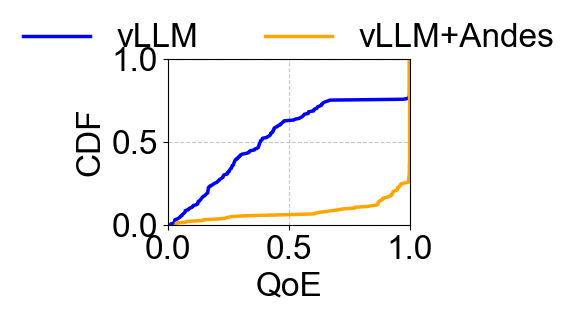

In [817]:
res = [[0.03347213210633091, 0.03400307815285461, 0.034187626804698855, 0.0724815282831801, 0.07924789086130606, 0.14332783694914256, 0.14698613062426016, 0.20988971623839567, 0.23943675842489648, 0.24731755514011755, 0.26660329176308073, 0.3431155677404012, 0.48765853316841695, 0.604311076498107, 0.612645894247634, 0.6273476653228783, 0.6569484589847313, 0.6808638660757671, 0.705104224879633, 0.7221065358901657, 0.7742524386947187, 0.7745042836146916, 0.8262647861609841, 0.8444215048616502, 0.8688368877155873, 0.8692741407434448, 0.8692741407434448, 0.8698148857707048, 0.8742356390175238, 0.8767334079689765, 0.8865729624009002, 0.8890302448104531, 0.8897043215682011, 0.9060361540529648, 0.9152129214027506, 0.9234957326689947, 0.9242606629536946, 0.9286875202669107, 0.9286875202669107, 0.9311200418147572, 0.931636855259663, 0.9406049613796096, 0.9498316171958335, 0.9499077194612994, 0.9499598461268697, 0.951609951357614, 0.9593623513224502, 0.9593623513224502, 0.9623087645014955, 0.9639267809118495, 0.97424194919909, 0.9947216419962678, 0.9953402819575327, 0.9959473889219419, 0.99609375, 0.99609375, 0.9965397923875434, 0.9972299168975071, 0.9975, 0.9979338842975207, 0.9984000000000001, 0.9986282578875171, 0.9987244897959184, 0.9987244897959184, 0.9987244897959184, 0.9989594172736731, 0.9990234374999999, 0.9992283950617283, 0.9993425378040762, 0.9994331065759636, 0.9994834710743803, 0.9996694214876034, 0.9997027348394769, 0.9998615916955017, 0.9998615916955017, 0.9998765432098766, 0.9998914930555554, 0.999897969594939, 0.9999142661179696, 0.9999142661179696, 0.9999142661179699, 0.9999142661179699, 0.9999158320006731, 0.9999188377566754, 0.9999316986544636, 0.9999328137597421, 0.9999360000000002, 0.9999389648437499, 0.9999399074574847, 0.9999443083092001, 0.9999474900231042, 0.9999474900231042, 0.9999482428445732, 0.9999482428445732, 0.9999524375743163, 0.9999524375743164, 0.9999543462381303, 0.999958376690947, 0.9999609374999999, 0.9999637102627377, 0.9999649872203353, 0.9999665875906312, 0.9999677169421488, 0.9999734296949725, 0.9999749999999996, 0.9999752481374223, 0.9999752481374223, 0.9999777500889995, 0.9999800701530608, 0.999980070153061, 0.9999804213329152, 0.9999812597215195, 0.9999815800622596, 0.9999833402748852, 0.9999837408949012, 0.9999849768643709, 0.9999849768643709, 0.9999852071005916, 0.9999853202389865, 0.9999861804010444, 0.999986282578875, 0.999986282578875, 0.9999864835640137, 0.999986776859504, 0.9999870607111433, 0.9999876885195443, 0.9999876885195444, 0.9999881909755435, 0.9999885090491236, 0.9999887392459799, 0.9999895941727369, 0.9999897271531886, 0.9999905325443785, 0.9999905905378448, 0.9999905905378448, 0.9999910893294722, 0.9999915494862085, 0.9999918831827662, 0.9999928888888887, 0.9999930013157525, 0.9999930013157525, 0.9999931828562468, 0.999993288410427, 0.9999934922948774, 0.999993963138926, 0.9999940511600237, 0.9999941087755678, 0.9999946663537592, 0.9999950836033257, 0.999995274102079, 0.9999955864698818, 0.99999564158106, 0.9999958350687214, 0.9999959022439312, 0.9999962731622961, 0.9999963440805179, 0.9999964400142398, 0.9999965451002609, 0.9999969329010769, 0.9999970978236576, 0.999997625836596, 0.9999978181611898, 0.99999785632673, 0.9999979356586073, 0.9999981982793567, 0.9999983813427085, 0.9999986288522396, 0.9999986288522396, 0.9999988536790025, 0.9999989194375888, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.011725006953034271, 0.011940392192577512, 0.02509316957819509, 0.02622600802913654, 0.02767682022116945, 0.028573895007274423, 0.028573895007274423, 0.03952715854546697, 0.04455378406098762, 0.04921000030006999, 0.05138843177720125, 0.05815057921615743, 0.058912831072138204, 0.0625985428266202, 0.06703275031118475, 0.07048783881958233, 0.0716358099394481, 0.07173352995136464, 0.08406458038315026, 0.08539797968535573, 0.09061071684959142, 0.09945388013013658, 0.10366941156659379, 0.10420731927095048, 0.11631844286021782, 0.12336347939871815, 0.12355890860486277, 0.12516227605142938, 0.12527465613556155, 0.13212638790769599, 0.13400376041319287, 0.13707528259320417, 0.13998696466259822, 0.14240197126646628, 0.14568200338222329, 0.15246801048462322, 0.15559106732124886, 0.1584260336441057, 0.16320727361807189, 0.16524036903799477, 0.16524036903799477, 0.16539482541778572, 0.16673451050650326, 0.16673451050650326, 0.16702794772734428, 0.16812809758022224, 0.17496773489806244, 0.17538197391399418, 0.18548680251226496, 0.18806400589483888, 0.19372260980272638, 0.20247057223774534, 0.20512896290768848, 0.2107278644466229, 0.21177204425009807, 0.21701696191642997, 0.22217029850322217, 0.22766964568605783, 0.22822472793764884, 0.22916458429331638, 0.23187688166523654, 0.24524733443099567, 0.2463457528165745, 0.24664267407206455, 0.2535141789053092, 0.2538162947522912, 0.2557503988447478, 0.2582631650075674, 0.2627778860446531, 0.26331392303928053, 0.26565383829919204, 0.26565383829919204, 0.27144136163456384, 0.27144136163456384, 0.2731340608053522, 0.2741629059243697, 0.27571019931279217, 0.2767944824371525, 0.2782149764817824, 0.2856076567801738, 0.28606808296988767, 0.29259310435322644, 0.29343514602451354, 0.2995877279405703, 0.3001732548763412, 0.3073579283555717, 0.3255590096167347, 0.3356401694520382, 0.3363524189849765, 0.34026645136738554, 0.35731055874658313, 0.3590271356257273, 0.368552188250069, 0.37442304214728916, 0.3754560126214529, 0.3761600644612118, 0.3763048490750696, 0.37883097033196467, 0.3790932037055098, 0.3812199701688711, 0.38246062745021125, 0.3831880708038173, 0.3889364703940261, 0.390286365711449, 0.39095360514190647, 0.4079645151961515, 0.41278542614039226, 0.41953892608740384, 0.42378782707617857, 0.4246558943431656, 0.42491109035306246, 0.4317377831804824, 0.43298342479414764, 0.4364299571819755, 0.4364299571819755, 0.4391431935236343, 0.43925133247728576, 0.44271709502666734, 0.4516574682006181, 0.45446400342701243, 0.46384664042227025, 0.4648644941437247, 0.4708139208718193, 0.47352793682572, 0.4776787391675881, 0.4803589975451734, 0.5200204389746766, 0.5261732371704835, 0.5431607005877923, 0.548575598734569, 0.5551320089442581, 0.5596239655792724, 0.5614496678474395, 0.5644718642299845, 0.5811733440459232, 0.5812814470210735, 0.5823565157706507, 0.6031454066764045, 0.603354066378641, 0.6053377674872606, 0.6160657982164331, 0.6176171252655797, 0.6196434807614679, 0.6293414276511314, 0.6360374593707412, 0.6360374593707412, 0.639876815323674, 0.6436096106712982, 0.6515618740870742, 0.6618942285649375, 0.6706109211948393, 0.972222222222222, 0.9940828402366864, 0.9985207100591716, 0.9986282578875172, 0.9991349480968859, 0.9997558593750001, 0.9997633136094676, 0.9999142661179696, 0.9999293835181132, 0.9999555555555556, 0.9999714032428723, 0.9999722991689751, 0.9999773242630384, 0.9999777500889995, 0.9999805934522308, 0.9999833402748852, 0.9999857600569598, 0.9999859725904415, 0.9999888144427913, 0.9999895267121206, 0.9999895941727367, 0.9999904149373613, 0.9999910893294722, 0.9999923266396051, 0.9999923266396051, 0.999992410961607, 0.9999928124258779, 0.9999938120343554, 0.9999953149303799, 0.9999953149303799, 0.999995375187883, 0.9999955491463265, 0.9999961249922498, 0.999996399367729, 0.9999964534102233, 0.9999964534102233, 0.9999965451002608, 0.9999966942148758, 0.9999970170713006, 0.9999970170713006, 0.999997156255243, 0.9999978437169145, 0.9999983521218901, 0.9999986256354717, 0.9999988849353652, 1.0, 1.0, 1.0, 1.0]]


label_list = [f'{BASE}+{SYS}',f'{BASE}'  ]

plot_cdf(res[::-1], label_list[::-1], 'QoE')


### Pause

In [818]:
# res =[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.091538667678833, 2.1616109371185246, 3.286635732650751, 3.3628694057464585, 5.19167160987854, 5.500274562835685, 5.502887010574341, 5.662535238265991, 5.702131080627441, 6.128952074050892, 7.062919473648066, 7.602438068389887, 8.184767341613764, 8.195965147018436, 8.337882947921756, 8.878347873687733, 12.831003236770632, 12.901724004745475, 13.590774536132812, 13.792536497116089, 19.096979188919065, 23.642353630065912, 102.44003033638, 142.02549505233765, 175.64085340499878, 181.10093355178833, 182.22989749908444, 202.9250279903412, 255.4173276424408, 257.58922638893125], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4208407402038574, 1.9585328102111816, 2.4510608196258534, 2.4510608196258534, 2.9894859790802, 3.059983348846435, 3.059983348846435, 3.197595405578613, 3.4032721519470215, 3.4055491924285874, 4.2227783203125, 5.14013409614563, 5.399198055267334, 6.292813301086426, 6.749512147903443, 7.064243412017822, 8.884592819213868, 9.155199527740479, 9.295353889465332, 9.591643953323365, 9.625065231323243, 10.852239894866942, 12.25347375869751, 12.25347375869751, 12.39817500114441, 13.992660760879517, 22.296637964248657, 26.910576105117798, 27.212730884552002, 27.551690101623535, 28.156506061553955, 30.306754112243652, 30.807904481887817, 30.891714525222778, 31.140972471237184, 31.522261142730713, 31.82219066619873, 31.899396896362305, 32.22157773971557, 32.61533308029175, 32.680144405364985, 32.914366006851196, 33.50283279418945, 36.927070665359494, 37.027432441711426, 37.26706652641296, 38.77847752571106, 38.930174350738525, 41.39379024505615, 43.32747292518616, 43.53364968299866, 43.756160497665405, 44.52261786460876, 44.53260188102722, 44.63858342170715, 45.8780517578125, 46.03946852684021, 47.77114987373352, 51.74377727508545, 52.39948058128357, 52.51568713188171, 53.64349365234375, 54.54213547706604, 56.445698738098145, 56.52578043937683, 58.443150997161865, 58.99039387702942, 59.026691389083865, 59.69218730926514, 60.11794877052307, 61.716341495513916, 61.86688256263733, 61.89217505455017, 61.89217505455017, 61.98239517211914, 62.48331308364868, 63.351003885269165, 63.661176443099976, 65.11050548553467, 72.2450078010559, 72.30180311203003, 73.52045464515686, 73.84975123405457, 74.15945100784302, 74.15945100784302, 77.22573232650757, 78.68383145332336, 80.42298102378845, 80.66202688217163, 80.69797396659851, 81.7134882926941, 82.12845540046692, 82.43957281112671, 85.6754415512085, 85.94358305931092, 86.17187004089357, 86.80710363388062, 86.86260423660279, 87.77798533439636, 88.7942831993103, 89.22695183753967, 89.62421398162842, 90.2578245162964, 90.44095735549928, 90.58001251220703, 90.6365029335022, 91.57459082603455, 91.68906679153443, 92.05871748924255, 92.5306035041809, 93.05016946792604, 93.34306144714357, 93.34504637718202, 95.38104090690614, 95.82118964195251, 96.37580895423889, 100.52342176437378, 102.3792688369751, 103.06501717567444, 103.8111093044281, 103.94525957107544, 111.54523158073425, 112.21903896331787, 112.95259022712708, 114.61964077949524, 121.59122443199158, 122.30627393722534, 123.5232491016388, 125.79243302345276, 125.84413242340088, 127.9732141494751, 128.13685870170593, 128.13685870170593, 133.26723527908325, 134.2455017566681, 134.57241344451904, 134.90661001205444, 135.33878593444825, 136.15616011619568, 136.81194729804992, 137.08453464508057, 139.8827024936676, 142.34887976646422, 142.5693736076355, 144.95652294158936, 145.28650097846986, 146.04021434783937, 146.44295358657837, 148.8094379901886, 150.7597336769104, 151.8597912788391, 155.4380316734314, 159.02562880516052, 160.59600639343262, 160.74118494987488, 163.80613374710083, 165.9209949016571, 167.27068710327148, 168.55209946632385, 169.29466652870178, 170.4155330657959]]

# label_list = [f'{BASE}+{SYS}',f'{BASE}'  ]

# plot_cdf(res[::-1], label_list[::-1], 'Pause time (s)', xmin = -0.01)



### TTFT v.s. Request rate


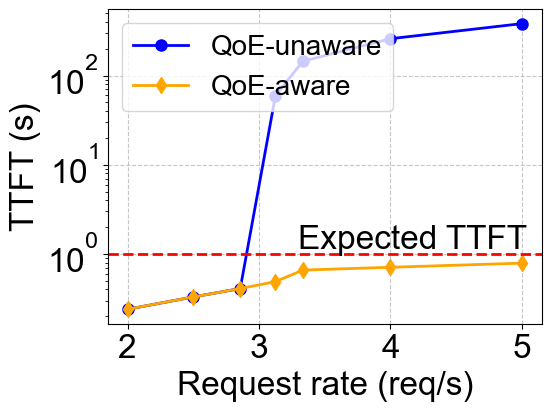

In [819]:


def breakdown_arrival(x_list, y_list, file_name, metric_name = 'TTFT (s)', log_scale= True, yrange = None, horizontal = None):
  plt.figure(figsize=(5.4, 4), constrained_layout=True)

  plt.plot(x_list[0], y_list[0],label='QoE-unaware',marker='o', linestyle='-', color='blue')
  plt.plot(x_list[1], y_list[1], label=f'QoE-aware',marker='d', linestyle='-', color='orange')

  plt.xlabel('Request rate (req/s)')
  plt.ylabel(metric_name)

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.grid(axis='x', linestyle='--', alpha=0.7)
  if log_scale:
    plt.yscale('log')
  if yrange:
    plt.ylim(yrange)
  if horizontal:
    for h in horizontal:
      plt.axhline(y=h, color='r', linestyle='--' )
  plt.text(3.3,1.15,'Expected TTFT')

  plt.legend( loc = 'upper left', fontsize=20 )
  plt.savefig(f'{metric_name}-arrival-{file_name}.pdf')
  plt.show()


vllm_x = [0.2, 0.25, 0.3, 0.32, 0.35, 0.4, 0.5]
vllm_x = arrival_rate_to_request_rate(vllm_x)
# Data for the second curve
andes_x = [0.2, 0.25, 0.3, 0.32, 0.35, 0.4, 0.5]
andes_x = arrival_rate_to_request_rate(andes_x)

andes_res = [0.79, 0.71, 0.66, 0.49, 0.41, 0.33, 0.24]
vllm_res= [382.64, 259.22, 144.95, 59.65, 0.41, 0.33, 0.24]

breakdown_arrival([vllm_x,andes_x],[vllm_res,andes_res], 'opt66b-share-a100', 'TTFT (s)', horizontal=[1])


### Token latency v.s. Request rate

In [820]:
from matplotlib.patches import FancyArrowPatch

vllm_x = [0.2, 0.25, 0.3, 0.32, 0.35, 0.4, 0.5]
vllm_x = arrival_rate_to_request_rate(vllm_x)
# Data for the second curve
andes_x = [0.2, 0.25, 0.3, 0.32, 0.35, 0.4, 0.5]
andes_x = arrival_rate_to_request_rate(andes_x)

andes_res = [0.2,0.19,0.18,0.15,0.12,0.10, 0.08]
vllm_res=  [0.15,0.15,0.15,0.14,0.12,0.1, 0.08]

andes_res = arrival_rate_to_request_rate(andes_res)
vllm_res = arrival_rate_to_request_rate(vllm_res)

x_list = [vllm_x,andes_x]
y_list = [vllm_res,andes_res]
file_name='opt66b-share-a100'
metric_name = 'TDS (tokens/s)'
yrange = (0, 13)


plt.figure(figsize=(5.4, 4), constrained_layout=True)

plt.plot(x_list[0], y_list[0],label='QoE-unaware',marker='o', linestyle='-', color='blue')
# plt.plot(x_list[0], y_list[0],label=f'vLLM + {SYS_NAME}',marker='o', linestyle='-', color='orange')
plt.plot(x_list[1], y_list[1], label=f'QoE-aware',marker='d', linestyle='-', color='orange')

plt.xlabel('Request rate (req/s)')
plt.ylabel(metric_name)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.text(2, 1/0.21-1,'Reading speed', fontsize=18)
plt.text(2,1/0.3-1.1,'Speaking speed', fontsize=18)

# plt.annotate('', xy=(2, 3), xytext=(3, 3),
#              arrowprops=dict(facecolor='black', shrink=0.05))

plt.arrow(3.5, 2.5, 0.1, 0.3, head_width=0.1, head_length=0.2, fc='b', ec='black')
plt.arrow(3.4, 4, 0.1, 0.3, head_width=0.1, head_length=0.2, fc='b', ec='black')

# arrow = FancyArrowPatch((2, 4), (3, 9), arrowstyle='->', mutation_scale=15, color='red')
# plt.gca().add_patch(arrow)

plt.ylim(yrange)
plt.axhline(y=1/0.21, color='r', linestyle='-.' )
plt.axhline(y=1/0.3, color='r', linestyle='--' )
plt.legend( loc = 'upper right', fontsize=20)

plt.savefig(f'TDS-arrival-{file_name}.pdf')
plt.show()


## 3D DP

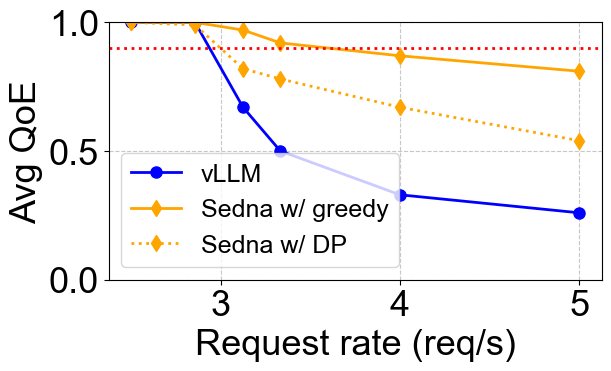

In [916]:

# plt.rcParams.update({'font.size': 22})
def dp_qoe_arrival(x_list, y_list, file_name='opt-a40.pdf', error_list = None, ylabel = 'Avg QoE'):
  plt.figure(figsize=(6, 3.6), constrained_layout=True)

  plt.plot(x_list[0], y_list[0],marker='o', linestyle='-', color='blue', label='vLLM')
  plt.plot(x_list[1], y_list[1], marker='d', linestyle='-', label=f'{SYS_NAME} w/ greedy', color='orange')
  plt.plot(x_list[2], y_list[2], marker='d', linestyle=':', label=f'{SYS_NAME} w/ DP', color='orange')

  plt.xlabel('Request rate (req/s)')
  plt.ylabel(ylabel)
  plt.axhline(y=0.9, color='r', linestyle=':')

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.grid(axis='x', linestyle='--', alpha=0.7)
  plt.ylim([0,1])

  # plt.legend(loc='upper center', bbox_to_anchor=(0.4, 2), ncol=3, frameon=False)
  plt.legend(loc='lower left', fontsize=18)
  plt.savefig(f'3ddp-{file_name}.pdf')
  plt.show()


# Data for the first curve
vllm_x = [0.2, 0.25, 0.3, 0.32, 0.35, 0.4]
vllm_x = arrival_rate_to_request_rate(vllm_x)
vllm_y = [0.26, 0.33, 0.5, 0.67, 1, 1]

# Data for the second curve
andes_x = [0.2, 0.25, 0.3, 0.32, 0.35, 0.4]
andes_x = arrival_rate_to_request_rate(andes_x)
andes_y = [0.81, 0.87, 0.92,0.97, 1, 1, ]

threeddp_y = [0.54, 0.67, 0.78, 0.82, 0.99,1]
dp_qoe_arrival([vllm_x,andes_x,andes_x],[vllm_y,andes_y,threeddp_y],'opt66b-share-a100')



## QoE - Length

In [1051]:
plt.rcParams.update({'font.size': 26})

def plot_scatter(x_list, y_list, x_label, file_name, color):
  plt.figure(figsize=(5.4, 3), constrained_layout=True)
  plt.scatter(x_list, y_list, color=color, s=15)

  plt.xlabel(x_label)
  plt.ylabel('QoE')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.grid(axis='x', linestyle='--', alpha=0.7)
  plt.ylim(ymin=0)
  plt.xlim([0,2000])
  plt.savefig(f'{x_label}-{file_name}-qoe.pdf')



In [1052]:
# andes
total_len = [685, 525, 98, 282, 1068, 404, 47, 252, 711, 325, 333, 380, 215, 1174, 221, 609, 457, 1069, 32, 636, 303, 354, 404, 963, 394, 228, 129, 105, 492, 366, 1647, 630, 450, 780, 502, 797, 447, 264, 244, 675, 942, 520, 1012, 432, 155, 281, 247, 433, 213, 220, 337, 776, 321, 469, 476, 210, 109, 397, 1302, 1584, 123, 470, 1110, 430, 594, 478, 146, 381, 172, 1013, 106, 604, 155, 1164, 295, 388, 193, 17, 335, 828, 441, 298, 785, 167, 436, 48, 288, 662, 48, 368, 282, 896, 300, 115, 232, 35, 314, 968, 79, 421, 682, 815, 855, 354, 135, 34, 825, 88, 322, 108, 330, 450, 332, 233, 383, 376, 326, 341, 1746, 699, 615, 233, 544, 143, 246, 1216, 314, 1645, 599, 195, 92, 139, 342, 191, 417, 215, 514, 364, 184, 30, 1248, 231, 615, 143, 146, 194, 314, 573, 872, 184, 35, 312, 1010, 303, 691, 890, 122, 526, 101, 108, 425, 275, 298, 45, 382, 431, 419, 150, 234, 405, 257, 182, 334, 535, 396, 754, 59, 617, 417, 34, 203, 40, 419, 127, 97, 528, 93, 1122, 248, 49, 301, 330, 437, 217, 1434, 400, 361, 356, 30, 410, 226, 572, 25, 196, 890, 503, 558, 1098, 144, 374, 415, 205, 285, 291, 65, 1699, 199, 734, 690, 83, 86, 652, 133, 590, 206, 733, 81, 1749]
qoe=[0.9999977454932409, 1.0, 0.9997899600924175, 1.0, 0.3431155677404012, 0.9999931828562467, 0.9994331065759636, 0.9098959858648421, 0.6561615239831007, 0.9999901111506665, 0.999989320346875, 0.9999915984036966, 1.0, 0.47575930749654155, 0.9999771067512191, 0.7885567578448893, 0.9757802774925386, 1.0, 0.9986282578875171, 0.9999812597215195, 0.9943260255326151, 0.8866523864859083, 0.9507811136432311, 0.823588999528998, 0.9999901730525445, 0.9999787636178298, 0.9999349635796044, 0.9998937187798916, 1.0, 0.9999884307464486, 0.8262792785973353, 0.9999973037173647, 0.999994411191031, 0.9999982456909784, 1.0, 0.9999941087755678, 1.0, 0.9999653979238755, 0.9006209126303633, 0.9999969963565803, 0.5719860668613095, 0.9999955678670358, 0.7221182492617196, 0.950622850907504, 0.9997837370242214, 0.9999863836276738, 0.9999812597215192, 0.9999821965853052, 0.999975248137422, 0.9999777500889998, 0.9484557071451519, 0.9999982732451425, 0.999989035568615, 0.9999941936420379, 0.914961498394598, 0.9999734296949729, 1.0, 0.8579467465701696, 0.27063767434528946, 0.7276758278831652, 1.0, 0.9610669563014269, 0.9999973731838849, 0.9999941087755678, 0.9999969113018551, 0.9771040168471578, 0.9997027348394768, 0.9097799492046122, 1.0, 0.9998868266183792, 1.0, 0.9999958688611275, 1.0, 0.4153200125076297, 0.9999749999999996, 0.9999928124258779, 0.9999142661179699, 0.984375, 1.0, 0.9999984907847314, 0.9999869671180385, 0.9999879436728394, 0.9999818922589407, 0.9999399074574844, 0.999978958000168, 0.9892398734008583, 0.9999853202389867, 0.9999884307464479, 0.997229916897507, 0.9999918367346937, 0.9999866801641004, 1.0, 0.9999866801641002, 0.9998818525519849, 0.9762441090602841, 0.9975000000000002, 0.9999895941727369, 0.9999968112244897, 0.9274137325820758, 0.9999931828562468, 1.0, 0.9999978750350619, 0.9999957134712736, 0.9999895941727369, 1.0, 0.9845971987364888, 0.9999982222222221, 0.9982638888888887, 0.9999897926895241, 0.9998615916955017, 0.9999895267121206, 0.9999946416323728, 1.0, 1.0, 0.9956579066423725, 0.9999920201730027, 0.999989107821673, 0.9999849768643709, 0.999993963138926, 0.9999824933036886, 0.9999968112244896, 0.9999762046400948, 1.0, 0.9999328137597422, 0.999980763311788, 0.11507521950290026, 0.999989107821673, 0.03609488501321168, 0.999993992695117, 0.999971403242872, 0.9998548410509508, 0.9999417283375095, 0.9611720062417473, 1.0, 0.9999940511600237, 0.9999731536417086, 0.9999901111506665, 0.999992065066455, 0.9999443083092001, 0.9969135802469136, 0.5731364552517857, 1.0, 0.7888912566880706, 0.9999316986544634, 0.9999474900231042, 0.9639267809118495, 0.9999891793628808, 0.9999968112244898, 1.0, 0.9999609374999999, 0.9722222222222222, 0.9999359999999998, 0.8767334079689765, 0.9999524375743164, 0.9999956415810599, 0.6656804295218787, 0.9998268698060943, 0.9999951053332288, 0.9996811224489796, 0.9998937187798917, 1.0, 0.9179479375368876, 0.9999628197501487, 0.9992283950617283, 0.9999926953981007, 0.999991694972967, 0.9718744223486294, 0.9999305555555555, 0.999977538689607, 1.0, 0.9999836089757249, 0.9007962576595238, 1.0, 0.999996094299239, 1.0, 0.9999922839506171, 0.9996570644718793, 1.0, 0.9465099198269403, 0.997732426303855, 0.9999720052630108, 0.9987244897959182, 0.999993288410427, 0.9997959183673469, 0.9995061728395062, 0.8206426894687194, 0.9839975859259545, 0.24506107618581088, 0.9999804213329156, 0.9992283950617283, 0.9999883516406712, 0.9999872448979594, 0.9993749999999999, 0.9999749999999996, 0.20127647906424753, 1.0, 0.9930555555555552, 0.9999917898867824, 0.9876543209876544, 0.9999933574237432, 1.0, 0.9999966821609748, 0.9940828402366865, 1.0, 0.9999959515645177, 0.9410075546343967, 1.0, 1.0, 0.9999399074574846, 0.9999924939012945, 0.9999934922948774, 0.9999734296949725, 0.9999859725904415, 0.9999773242630384, 0.9996694214876036, 0.034414139469767464, 0.9999722991689749, 1.0, 0.6688277882669127, 0.9908444238546881, 0.9997398543184184, 0.9999970879101677, 0.9995061728395062, 0.9999966332800267, 0.9999752481374223, 0.9999980439141277, 1.0, 0.03613957157049199]

plot_scatter(total_len, qoe, 'Total Length', 'andes', 'orange')


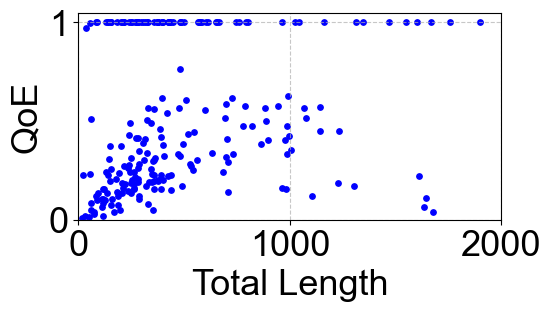

In [1053]:
total_len=[49, 166, 989, 962, 306, 152, 330, 397, 55, 373, 353, 1229, 240, 118, 979, 295, 1067, 200, 575, 328, 248, 437, 1302, 138, 1234, 263, 242, 487, 287, 406, 35, 321, 577, 233, 158, 324, 564, 896, 961, 247, 389, 478, 654, 545, 345, 359, 424, 316, 326, 138, 485, 191, 667, 793, 275, 217, 59, 482, 277, 603, 187, 427, 572, 309, 131, 153, 1758, 24, 90, 195, 709, 400, 288, 334, 430, 730, 280, 426, 497, 376, 1007, 356, 347, 985, 85, 728, 236, 396, 1105, 149, 55, 33, 189, 255, 265, 982, 375, 698, 349, 216, 988, 151, 357, 375, 248, 489, 208, 533, 474, 1045, 1603, 1632, 122, 943, 269, 356, 758, 254, 1668, 264, 440, 216, 126, 1023, 328, 356, 221, 2049, 286, 424, 693, 247, 884, 509, 313, 275, 1143, 994, 821, 1609, 114, 446, 284, 865, 353, 183, 285, 385, 586, 326, 94, 495, 153, 389, 61, 238, 1470, 615, 391, 238, 143, 1313, 60, 280, 779, 359, 284, 261, 213, 110, 81, 1645, 208, 110, 436, 599, 205, 377, 1346, 651, 518, 268, 341, 118, 801, 133, 702, 706, 16, 395, 142, 155, 282, 391, 1675, 471, 481, 683, 398, 887, 203, 361, 176, 1897, 246, 375, 74, 1141, 1159, 698, 183, 1076, 131, 86, 540, 790, 274, 117, 634, 421, 563, 399, 74, 746, 1550, 280, 528, 307]
qoe = [0.014477957443782852, 0.04067294689784391, 0.6253444600678882, 0.16320727361807189, 0.3867446386428628, 0.9991836734693875, 0.08008060302138902, 0.6160657982164331, 0.9990817263544537, 0.9999910893294722, 0.29746557388961525, 0.18507465917975557, 0.4310690752930537, 0.10649698113788247, 0.4028408842252687, 0.9999749999999996, 0.5675751739973542, 0.9999142661179699, 1.0, 0.9999900486620424, 0.13707528259320417, 0.22765397499461604, 0.17217275793339287, 0.9999399074574847, 0.4516574682006181, 0.15623376474347275, 0.4882784768304838, 0.9999578343734189, 0.2847775513224943, 0.321356404562778, 0.9722222222222222, 0.17295799069568862, 0.9999964799763453, 0.14360449246468643, 0.10369652210177135, 0.999986282578875, 0.999996399367729, 0.4029356160582476, 0.9999978625901986, 0.3113362068130382, 0.15757900256249657, 0.3235783565064628, 0.9999975042988452, 0.44271709502666734, 0.2593566039458352, 0.19574239955182102, 0.9999931471176774, 0.9999889625942318, 0.3365078371302049, 0.9994834710743803, 1.0, 0.23892264210130626, 0.9999975277876665, 0.9999982363595638, 0.9999858669229463, 0.2723795536110926, 0.5091363961709516, 0.999995274102079, 0.9999857600569597, 0.999997156255243, 0.11911836018422921, 0.99999402203478, 0.9999951053332287, 0.3029849711532651, 0.2404371100251538, 0.0735043736879783, 1.0, 0.22659970854206835, 0.0991282474455339, 0.05138843177720125, 0.2920801071501083, 0.9999935253708341, 0.10418440153570821, 0.18891346756878916, 0.9999938731496911, 0.33359627085814775, 0.18977763684826235, 0.9999873355200665, 0.9999950836033257, 0.999991694972967, 0.3543195496931472, 0.15686374873712416, 0.19100053341058473, 0.33251273763688655, 0.9993425378040763, 0.6187202990516462, 0.2598186043236101, 0.9999931828562467, 0.11922387029336223, 0.19372260980272638, 0.23088433120219118, 0.019202311502282292, 0.07597133959255492, 0.2002443885041531, 0.24110305899102255, 0.1558657975756767, 0.20303851225436972, 0.3165702334586024, 0.2310178969507987, 0.9999771067512188, 0.4741516965878879, 0.37285746571891154, 0.226330493958101, 0.9999923266396051, 0.18778523766990327, 0.1702231196686521, 0.9999722991689749, 0.27177401693896747, 0.5669902752099779, 0.9999989035388284, 0.9999964400142399, 0.06195184470352242, 0.1539129923898731, 0.5779977088265795, 0.21547455324286025, 0.304610891479736, 0.9999979356586073, 0.9999810964083178, 1.0, 0.17851695736524234, 0.9999921095821234, 0.9999757334562834, 0.09881334883448596, 0.9999988849353653, 0.5644805011918255, 0.5626933181260941, 0.18334504561636186, 0.28342758345682767, 0.12122351195002415, 0.22016642920842763, 0.5154643228742348, 0.9999734296949725, 0.566048949104175, 0.604524008075585, 0.4097901680576447, 0.9999807633117884, 0.4515445781602766, 0.42648269186879306, 0.47263310002076653, 0.21973149208286558, 0.0843729249106761, 0.9999943310657595, 0.2066118874974075, 0.3818138286707189, 0.05050741101176859, 0.14171852127643333, 0.347084668164059, 0.4583573714556561, 0.9999969113018554, 0.5045730469906866, 0.133557072710832, 0.38304599875082096, 0.25555527492898344, 0.226532173536967, 0.08310817852213821, 0.9999614212414646, 1.0, 0.9999968112244896, 0.42060559605582076, 0.2768711362259598, 0.3083622355363056, 0.9999981787750803, 0.04883163157453898, 0.4156119337771571, 0.4772912217299912, 0.9999913494809687, 0.9999734296949725, 0.15895537076497288, 0.16213409264530929, 0.10420731927095048, 0.12002892996050127, 0.11113210406844926, 0.1356978361494384, 0.06477872467477302, 0.1509923238944088, 0.555067108800719, 0.18853667396965176, 0.1939659966692809, 0.9999975509464366, 0.9999974963948084, 0.43309621143865, 0.9999840000000002, 0.4918821087689728, 0.018401997303110013, 0.9999749999999996, 0.1334129736853226, 0.4087995432746194, 0.1423120543302085, 0.008993162539273286, 0.9999932534997468, 0.22822472793764884, 0.9999489795918366, 0.26004340297684864, 0.20557819874466254, 0.03873612187143709, 0.3306334588295495, 0.7653663589391516, 0.2431534781392268, 0.3791809116885499, 0.5002564930650965, 0.37301160546549694, 0.31217159698065783, 0.20799790060803527, 0.9999951053332287, 0.24074091410609508, 0.9999870607111432, 0.0367629394732762, 0.5712696222893379, 0.9999907613566027, 0.5839085547251498, 0.9999665875906314, 0.5136251688727045, 0.9999243856332701, 0.9998222222222223, 0.25201554560346734, 0.5738074227668984, 0.41413330172496443, 0.15739082349728142, 0.336198025325371, 0.5382646154477111, 0.30170327975240957, 0.2019639297655652, 0.030352877572543163, 0.9999957134712736, 0.999953722985793, 0.9999864835640138, 0.28044622115985984, 0.9999885865595328]

plot_scatter(total_len, qoe, 'Total Length', 'fcfs', 'blue')


In [1054]:
# andes
total_len = [225, 131, 397, 274, 178, 720, 324, 29, 440, 68, 60, 362, 304, 121, 442, 21, 178, 135, 142, 193, 403, 109, 51, 464, 217, 20, 190, 647, 28, 98, 561, 173, 432, 317, 594, 491, 207, 259, 411, 136, 289, 35, 30, 285, 287, 166, 329, 228, 322, 214, 300, 438, 134, 250, 327, 440, 506, 355, 348, 400, 167, 775, 27, 21, 15, 187, 261, 288, 205, 160, 231, 240, 386, 211, 15, 699, 437, 199, 266, 213, 667, 34, 497, 249, 30, 222, 112, 509, 5, 264, 117, 113, 249, 466, 684, 298, 174, 377, 242, 297, 503, 123, 292, 445, 257, 534, 140, 306, 35, 914, 341, 154, 334, 76, 45, 569, 716, 757, 93, 147, 124, 631, 321, 181, 412, 371, 21, 63, 528, 357, 517, 326, 353, 352, 271, 409, 164, 32, 398, 478, 318, 86, 591, 289, 115, 61, 453, 153, 254, 241, 551, 69, 168, 123, 442, 764, 368, 6, 43, 454, 459, 417, 228, 161, 327, 5, 229, 524, 123, 935, 360, 502, 466, 214, 594, 231, 335, 391, 24, 37, 250, 432, 453, 94, 947, 167, 369, 950, 372, 262, 773, 901, 475, 109, 311, 340, 691, 57, 90, 203, 213, 264, 376, 881, 963, 407, 97, 463, 113, 147, 292, 904, 488, 296, 438, 484, 210, 355, 383, 85, 98, 135, 134, 217, 568, 380, 319, 462]
qoe=[0.9999800701530608, 0.9242606629536946, 0.13215966935489365, 0.9999865824041644, 0.9054490208190951, 0.6664159573660599, 0.9999904149373613, 0.9987244897959184, 0.9410075546343967, 0.9997772332368011, 0.9997127262280955, 0.9999923266396051, 0.999989107821673, 0.9254813036915662, 0.9360476509163596, 0.9975, 0.9007962576595238, 0.9999443083092003, 0.03330357314932911, 0.9999728732638885, 0.9999938120343554, 0.9999142661179696, 0.9995999999999998, 0.9999953351464064, 0.9999785665294925, 0.997229916897507, 0.9391687232820257, 0.4153200125076297, 0.9986282578875172, 0.9998937187798914, 0.9999968112244897, 0.03400307815285461, 0.3158528518350216, 0.999989985579234, 0.999997156255243, 0.9999958350687214, 1.0, 0.9999849768643709, 0.9999940511600237, 0.9999451303155006, 0.9999879436728394, 0.9991349480968859, 0.9988109393579073, 0.9999876016663359, 0.9406049613796096, 0.9999632690541781, 0.9263220815224893, 0.9999805934522308, 0.9999902951252413, 0.9999779585179306, 0.9999888144427913, 1.0, 0.9999434676917861, 0.9739640316931758, 0.28574792942174176, 1.0, 0.9999960788158023, 0.9297391816401931, 0.0724815282831801, 0.9334217983758579, 0.9999637102627377, 0.46489410113631935, 0.9985207100591715, 0.9975000000000002, 0.004880607685298928, 0.04196353055070179, 0.9999852071005916, 0.942342241299612, 1.0, 0.999960444602666, 0.9999810964083176, 1.0, 0.9469648919157448, 0.9999773242630384, 0.9948979591836735, 0.497683730306227, 0.9999947395000424, 1.0, 1.0, 0.9999777500889995, 0.9999977454932409, 0.9990817263544537, 1.0, 1.0, 0.9988109393579073, 0.9999795253987426, 0.3113351889037287, 0.7224743417825338, 0.9375, 0.9797751593431527, 1.0, 0.8551648322740887, 0.9999837408949012, 1.0, 0.99999785632673, 1.0, 0.9999665875906314, 0.9999929266636485, 0.9999827826655878, 0.26660329176308073, 1.0, 0.9999328137597422, 0.9428286717694331, 0.9128149966120365, 0.9815474194939547, 0.9999964799763453, 0.9999482428445733, 0.9999892502015586, 0.999134948096886, 0.9390306772720021, 0.9999913494809687, 0.9999572813875006, 0.9296395761988219, 1.0, 0.9994834710743803, 0.9999969004165838, 0.6686294138501645, 0.9999982503289381, 0.9998818525519849, 0.9999530868830925, 1.0, 0.9999974804736709, 1.0, 0.999969135802469, 0.9990286775731646, 0.9999926953981007, 0.9975, 0.9997398543184182, 1.0, 0.9778028652223265, 0.9422477249335126, 1.0, 0.9855926361833336, 0.9402159926772333, 0.999986282578875, 1.0, 0.9107289316503117, 0.9989594172736731, 1.0, 0.9889104291355765, 0.9999900486620424, 0.9998615916955017, 0.3338039705878989, 0.9999879436728396, 0.9999230532471528, 0.9997222222222223, 1.0, 0.9999567174515238, 1.0, 0.9999826388888888, 0.9152129214027506, 0.9997837370242215, 0.9999641435691493, 0.9999328137597421, 0.9999948581095326, 0.3549273684314028, 0.9999925754887183, 0.96, 0.9742021016455379, 0.9999951269193845, 0.977991977356222, 0.9999942215236683, 0.9999805934522306, 0.9999609374999999, 0.9999905905378448, 0.9375000000000001, 0.999980763311788, 0.9999963440805179, 0.9999328137597419, 0.9999988536790025, 0.9707347296608244, 0.9999960159521275, 0.999995375187883, 0.9999779585179309, 0.9999971562552432, 0.9999810964083174, 0.9999910358922871, 0.32801470929360466, 0.998109640831758, 0.9992283950617284, 0.04902936577492767, 0.9999946167387126, 0.9999951053332287, 0.9998843796970749, 0.9152548171485033, 0.9999637102627377, 0.9999926157844989, 0.9999988896303691, 0.9530632267719762, 1.0, 1.0, 0.6522913161264604, 0.9037943033794908, 0.9999142661179701, 0.9999895941727366, 0.9999912983701846, 1.0, 0.9996811224489796, 0.9998737533139753, 0.9999754925987645, 0.9999777500889998, 0.9999855426563923, 1.0, 0.9999987086776859, 0.9060361540529648, 0.9999939333640708, 0.9998914930555555, 0.8851175896245385, 0.9999202806122446, 0.9593623513224502, 0.061557212845042605, 0.9999987736215813, 1.0, 1.0, 0.9509317214839381, 1.0, 0.9999771067512188, 0.9999920201730027, 0.9999931471176774, 0.04196823144121388, 0.9998937187798914, 0.997335544450283, 1.0, 0.9999785665294921, 1.0, 1.0, 0.9999901111506665, 0.26611530013953066]



plot_scatter(total_len, qoe, 'Response Length', 'andes', 'orange')


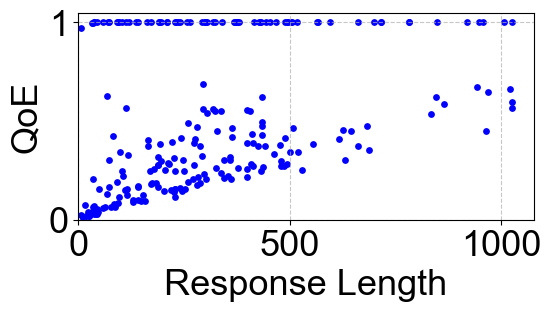

In [826]:
# andes
total_len = [31, 171, 81, 416, 345, 318, 294, 73, 294, 413, 252, 68, 25, 228, 380, 340, 57, 375, 229, 963, 432, 276, 467, 594, 428, 229, 241, 184, 489, 44, 16, 847, 203, 434, 78, 919, 318, 1025, 337, 34, 298, 83, 149, 130, 358, 248, 140, 173, 303, 91, 196, 375, 409, 563, 221, 834, 169, 411, 11, 188, 370, 288, 463, 116, 433, 660, 260, 504, 946, 293, 48, 32, 270, 213, 141, 38, 105, 406, 164, 240, 195, 118, 282, 363, 103, 259, 236, 211, 399, 345, 263, 227, 188, 93, 716, 158, 58, 96, 453, 10, 7, 430, 41, 189, 35, 781, 274, 478, 7, 190, 502, 941, 432, 436, 518, 191, 72, 845, 683, 687, 625, 493, 496, 377, 300, 93, 119, 71, 476, 288, 281, 92, 188, 86, 291, 44, 193, 492, 219, 399, 434, 969, 1007, 128, 616, 250, 1025, 716, 114, 486, 1025, 102, 480, 359, 37, 444, 113, 97, 179, 44, 489, 113, 412, 26, 301, 399, 338, 23, 62, 274, 956, 228, 112, 364, 229, 141, 68, 360, 111, 38, 246, 554, 782, 367, 37, 662, 303, 142, 425, 398, 242, 256, 47, 73, 171, 35, 17, 324, 440, 631, 326, 164, 508, 644, 699, 327, 205, 99, 162, 353, 225, 137, 231, 567, 210, 300, 499, 152, 281, 322, 210, 517, 26, 14, 1020, 435, 865, 528]
qoe=[0.0367629394732762, 0.17851695736524234, 0.42515364099951697, 0.9999941936420383, 0.21037461289338594, 0.5605982331446789, 0.6866460271903886, 0.9998070987654321, 0.5603829194252833, 0.3901095772398496, 0.157136602348698, 0.6268264616131329, 0.018401997303110013, 0.11746045133265148, 0.9999930381993998, 0.9999912983701846, 0.9996811224489798, 0.9999928508107179, 0.24664267407206455, 0.4494517470487678, 0.24797018683962568, 0.40838618733368326, 0.9999953950155647, 0.999997156255243, 0.9999945154089585, 0.9999807633117884, 0.1628369839697227, 0.18853667396965176, 0.9999958008599839, 0.9994591671173607, 0.07258212084956082, 1.0, 0.1471108616939363, 0.4289959267215779, 0.06462261436138547, 0.9999988133718748, 0.9999900486620424, 0.5946101924950876, 0.23527698735692518, 0.9990817263544537, 0.23292206236640173, 0.07915066068375823, 0.09640915840340335, 0.10143557075452507, 0.3155208623420033, 0.3029849711532651, 0.10102245439313588, 0.18507465917975557, 1.0, 0.18962226265129586, 0.29614799625231164, 0.9999928508107175, 0.2805032247406241, 0.9999968338800165, 0.39189920255179966, 0.5366871742913407, 0.24493025829648313, 0.43235061634397226, 0.01544502369729943, 0.27571019931279217, 0.9999926557531157, 0.37442304214728916, 0.33445256040248933, 0.1263708537157086, 0.49729238414908805, 0.999997697343425, 0.19341492296772533, 0.9999960475714299, 0.9999988802105204, 0.999988271720773, 0.15559106732124886, 0.9989594172736731, 0.2066118874974075, 0.2847775513224943, 0.9999489795918366, 0.9992695398100805, 0.22072278033392864, 0.5514321177338887, 0.4041761079129582, 0.9999824933036886, 0.9999734296949725, 0.32877784741591626, 0.2142598736882871, 0.41953892608740384, 0.24524733443099567, 0.4918821087689728, 1.0, 0.28606808296988767, 0.2569589123258787, 0.304610891479736, 0.9999854320843773, 0.31149724424481534, 0.31626424593169644, 0.0843729249106761, 1.0, 0.09281221091812011, 0.05723998913478194, 0.11631844286021782, 0.9999951053332287, 0.007634586822347071, 0.9722222222222222, 1.0, 0.02813965323544188, 0.2767144929218966, 0.2075913201035729, 0.9999983563445101, 0.3906659552141348, 0.2710050702986865, 0.02509316957819509, 0.9999720052630103, 1.0, 0.6706109211948393, 0.9999946167387126, 0.26612522698323526, 0.344367804453722, 0.9999722991689749, 0.16802816691046668, 0.6196434807614679, 0.4733982287191002, 0.35424126086095103, 0.45446400342701243, 0.2799724142395273, 0.9999959187837976, 0.26102292396166227, 0.9999888144427913, 0.9998818525519849, 0.9999281815570238, 0.9997959183673469, 0.37602964375140535, 0.18806400589483888, 0.1784145094845529, 0.9998792416374835, 0.16440668815337287, 0.06330813859460929, 0.32069527492443145, 0.031345949199660966, 0.38163667798816864, 0.999995852016542, 0.1519148833092423, 0.38689853299709415, 0.47263310002076653, 0.6469835243933147, 1.0, 0.09061071684959142, 0.40808623484883044, 0.24475148770008573, 0.5675751739973542, 0.9999980439141277, 0.1539129923898731, 0.27006505240641654, 0.9999990463256835, 0.9999019703950592, 0.2998239488147174, 0.30376673050631103, 0.9992283950617283, 0.9999949044326338, 0.5644805011918255, 0.9998914930555554, 0.2591974952364269, 0.05650215219678813, 0.4131293513832969, 0.9999202806122446, 0.2731340608053522, 0.02015758024363913, 0.20734398223890615, 0.5577937244590219, 0.5520615451104075, 0.039026753804478766, 0.0657555800109531, 0.2782149764817824, 0.9999989035388284, 0.1558657975756767, 0.14847200299642138, 0.4672095958597305, 0.15481868457323286, 0.17054749575006894, 0.13212638790769599, 0.20787223173797012, 0.15246801048462322, 0.07138693820635955, 0.14507172738121274, 0.38246062745021125, 0.9999983605509204, 0.9999925348621934, 0.02958381521206074, 0.374521129253285, 0.5397095630509738, 0.16335321149326285, 0.3728872278729033, 0.2148449551061951, 0.41413330172496443, 0.9999846212994999, 0.038164838415378766, 0.3029408103895309, 0.9999653979238754, 0.06594000989835104, 0.017569830535190158, 0.550225425491874, 0.3725401644932552, 0.30455741375417406, 0.26410847104139534, 0.3718987064259161, 0.4648644941437247, 0.4498757684466462, 0.9999979474716956, 0.45055247766981826, 0.2515144714401727, 0.34553499791591596, 0.9999614212414646, 0.22209483927756393, 0.14193317883554837, 0.9999459342560553, 0.9999810964083178, 0.999996878472699, 0.9999771067512188, 0.9999888144427913, 0.3437862069420003, 0.12292650715211412, 0.4708139208718193, 0.9999902951252413, 0.9999771067512191, 0.999996244216093, 0.026361658092823127, 0.011792850536214901, 0.6599304514693876, 0.6193607497398205, 0.5837507393311318, 0.25284736928245616]



plot_scatter(total_len, qoe, 'Response Length', 'fcfs', 'blue')


# Random Test

### Inference profiler

In [827]:

# Your data
inference_profiler_a40 =  {0: [0.0762981497682631, 0.0732651068829, 0.07394698122516274, 0.07794660702347755, 0.07700242474675179, 0.07753669191151857, 0.07365013612434268, 0.07320743007585406, 0.07362178293988109, 0.07354660332202911, 0.07317292597144842, 0.0731355263851583, 0.07313076592981815, 0.07317152293398976, 0.07403543638065457, 0.07372919423505664, 0.07312726974487305, 0.07350366283208132, 0.07331276684999466, 0.07321526482701302, 0.07320448383688927, 0.07441867096349597, 0.07524956297129393, 0.08368234615772963, 0.10023915395140648, 0.08115291269496083, 0.07859879499301314, 0.08054414624348283, 0.0789176500402391, 0.07851735316216946, 0.07866231305524707, 0.07933825580403209, 0.085418535862118, 0.08371636783704162, 0.08401974476873875, 0.0849263179115951, 0.08697843877598643, 0.09118910925462842, 0.08589691808447242, 0.08568034274503589, 0.0847690817900002, 0.08433339884504676, 0.08555396785959601, 0.07970720203593373, 0.08048401214182377, 0.07804263383150101, 0.07851987471804023, 0.07800763892009854, 0.0783473327755928, 0.07844280079007149, 0.07837168779224157, 0.07952760672196746, 0.07808297919109464, 0.07818904798477888, 0.07827218296006322, 0.078504947014153, 0.07864419696852565, 0.07970276428386569, 0.0763123338110745, 0.07522759912535548, 0.07435644185170531, 0.07536760997027159, 0.07570538995787501, 0.07539237616583705, 0.07501986995339394, 0.07500451197847724, 0.07553228735923767, 0.07475422462448478, 0.07451377622783184, 0.07431940315291286, 0.07552527403458953, 0.07435607211664319, 0.07442437903955579, 0.07422485575079918, 0.07428495865315199, 0.07473316509276628, 0.0763091268017888, 0.07488850504159927, 0.07432795781642199, 0.07526460662484169, 0.07435930799692869, 0.07483443384990096, 0.07421386567875743, 0.07478214707225561, 0.07492630602791905, 0.07453469419851899, 0.07478366885334253, 0.07474752189591527, 0.07544922176748514, 0.07450315589085221, 0.07464121375232935, 0.07415232108905911, 0.0741667877882719, 0.07450926816090941, 0.07447635615244508, 0.07479735603556037, 0.07527432637289166, 0.07431075721979141, 0.07486791722476482, 0.07459863508120179, 0.07450722390785813, 0.07433095527812839, 0.07414591917768121, 0.07542039919644594, 0.07459079986438155, 0.07397575164213777, 0.07418890995904803, 0.07421525893732905, 0.07429395522922277, 0.0744812348857522, 0.0742297857068479, 0.07506586704403162, 0.07464574184268713, 0.07472148397937417, 0.07466106116771698, 0.0745606729760766, 0.07405619090422988, 0.07438109815120697, 0.07434398820623755, 0.07474534772336483, 0.07466610986739397, 0.07500584376975894, 0.07435806468129158, 0.07440126594156027, 0.07479194505140185, 0.07435336615890265, 0.07399070914834738, 0.07492655608803034, 0.07447066577151418, 0.07478469237685204, 0.07434416888281703, 0.0742634991183877, 0.07454909197986126, 0.0744411307387054, 0.07445733994245529, 0.07500775763764977, 0.07446762965992093, 0.07440631603822112, 0.07415727060288191, 0.07489392487332225, 0.07450116286054254, 0.07572318380698562, 0.07497966615483165, 0.07440971210598946, 0.07500434201210737, 0.07454586587846279, 0.07463460182771087, 0.07452483708038926, 0.07452707970514894, 0.07439724914729595, 0.07489178190007806, 0.0748117221519351, 0.07459696102887392, 0.07433665497228503, 0.07445911318063736, 0.07397973909974098, 0.07453621691092849, 0.07440679613500834, 0.07558222068473697, 0.07433335902169347, 0.07488604122772813, 0.07487081177532673, 0.0743977390229702, 0.07545052468776703, 0.07566277077421546, 0.07581402407959104, 0.07480917684733868, 0.07448564283549786, 0.07444945629686117, 0.07434035185724497, 0.07450759410858154, 0.0744319730438292, 0.0752112278714776, 0.07513915281742811, 0.07457219483330846, 0.07535205082967877, 0.07445427495986223, 0.0755774206481874, 0.07462995313107967, 0.07502331677824259, 0.07466054009273648, 0.07506533525884151, 0.07446879195049405, 0.07432719692587852, 0.07411702489480376, 0.07407582784071565, 0.07436912506818771, 0.07441353797912598, 0.07461100677028298, 0.0748588154092431, 0.07478805305436254, 0.0749286157079041, 0.07447824394330382, 0.07421695627272129, 0.07418586779385805, 0.07477824483066797, 0.07520890887826681, 0.0747497919946909, 0.07421393087133765, 0.07405049493536353, 0.07412128709256649, 0.07469213288277388, 0.07426229072734714, 0.07488461397588253, 0.07502533588558435, 0.07437729509547353, 0.07473162841051817, 0.07466867892071605, 0.0749713247641921, 0.07466805912554264, 0.07433169987052679, 0.07443442195653915, 0.07438347674906254, 0.07431959779933095, 0.07428994216024876, 0.07476770505309105, 0.0743886767886579, 0.07438361784443259, 0.07468405878171325, 0.07529655285179615, 0.07435424299910665, 0.07467505196109414, 0.0748228682205081, 0.07435147790238261, 0.0745250009931624, 0.07455574907362461, 0.07404488418251276, 0.07435649679973722, 0.07504265895113349, 0.07445101300254464, 0.0749277239665389, 0.07445793598890305, 0.07465213909745216, 0.07429431984201074, 0.07418858306482434, 0.07450163690373302, 0.0744921900331974, 0.07454437669366598, 0.07425099005922675, 0.07478344393894076, 0.0745977871119976, 0.07436279812827706, 0.07453385833650827, 0.07418564660474658, 0.07480372162535787, 0.07435911195352674, 0.07484338572248816, 0.07426766119897366, 0.07471401523798704, 0.07434697914868593, 0.07429150491952896, 0.07425663014873862, 0.07456611888483167, 0.07618051394820213, 0.07454974809661508, 0.07456151023507118, 0.07404853124171495, 0.0747160380706191, 0.07464590668678284, 0.07427626615390182, 0.07485196320340037, 0.07439510896801949, 0.07438337709754705, 0.07494241092354059, 0.07420173659920692, 0.07467321818694472, 0.07439685193821788, 0.0743049499578774, 0.07445421908050776, 0.07452861778438091, 0.07437964016571641, 0.07550145592540503, 0.07405687682330608, 0.07488545496016741, 0.0742970653809607, 0.07496029511094093, 0.07524383394047618, 0.07458784896880388, 0.0748216756619513, 0.07452897913753986, 0.07440051902085543, 0.07421227684244514, 0.07520169578492641, 0.0743933548219502, 0.07429530285298824, 0.07424929598346353, 0.07431075209751725, 0.07435349095612764, 0.07436913996934891, 0.07433537719771266, 0.07419182918965816, 0.07423728425055742, 0.0742228371091187, 0.07485633995383978, 0.0742734121158719, 0.07514989888295531, 0.0745339491404593, 0.07441024715080857, 0.07475482113659382, 0.07476808596402407, 0.0748519217595458, 0.07479965407401323, 0.07404928281903267, 0.07491473900154233, 0.07663510274142027, 0.07552135270088911, 0.07559116277843714, 0.07433083839714527, 0.07483237609267235, 0.07575412793084979, 0.07473756792023778, 0.07462296402081847, 0.0744994836859405, 0.0743852499872446, 0.0743561559356749, 0.07451088493689895, 0.07477143174037337, 0.07481332030147314, 0.07445243606343865, 0.07473363121971488, 0.07436509290710092, 0.07419247971847653, 0.07457139808684587, 0.07455973699688911, 0.07470374507829547, 0.07455852441489697, 0.07438967889174819, 0.07450712798163295, 0.07504820870235562, 0.07459710584953427, 0.07464671786874533, 0.0744463442824781, 0.07437668368220329, 0.074503802228719, 0.07478311425074935, 0.07465868117287755, 0.07470060978084803, 0.07465228997170925, 0.07465097727254033, 0.07499965792521834, 0.07467277720570564, 0.07442090706899762, 0.0744869508780539, 0.07453107321634889, 0.07503416296094656, 0.07479299185797572, 0.07512260787189007, 0.07440839381888509, 0.07618873007595539, 0.07462811376899481, 0.0753034963272512, 0.07588399993255734, 0.07614138070493937, 0.07464632811024785, 0.07522298535332084, 0.07540673902258277, 0.07463876390829682, 0.07466473337262869, 0.07447681110352278, 0.07468385808169842, 0.07444960111752152, 0.07437022216618061, 0.07448350358754396, 0.0743076759390533, 0.07471331302076578, 0.0753937535919249, 0.07462288392707705, 0.07469979813322425, 0.07440007757395506, 0.07425028784200549, 0.07458587503060699, 0.07426863303408027, 0.07454122183844447, 0.0743304081261158, 0.07485191198065877, 0.07479515578597784, 0.07433246169239283, 0.07505684485659003, 0.07560634100809693, 0.21785048115998507, 0.07565468177199364, 0.0750994049012661, 0.07523424597457051, 0.07468064269050956, 0.07452867925167084, 0.07496387092396617, 0.07558736577630043, 0.07522863568738103, 0.07444190699607134, 0.07509108865633607, 0.07430236600339413, 0.07439270475879312, 0.07459085388109088, 0.07525380328297615, 0.07490999065339565, 0.07416406832635403, 0.07432489702478051, 0.07395403366535902, 0.07445251569151878, 0.07436893973499537, 0.07426136918365955, 0.07469442766159773, 0.07439448684453964, 0.07404642691835761, 0.07425716100260615, 0.07466688705608249, 0.07433373387902975, 0.07423784490674734, 0.07438259618356824, 0.07431137189269066, 0.07465875195339322, 0.07443038374185562, 0.07429213589057326, 0.0741339810192585, 0.07454070122912526, 0.07441266113892198, 0.0748476441949606, 0.07455326383933425, 0.07472252007573843, 0.07426000712439418, 0.07432532869279385, 0.07458384102210402, 0.07419441407546401, 0.07451167702674866, 0.07459008321166039, 0.0745020592585206, 0.07439133198931813, 0.07528892904520035, 0.07589735463261604, 0.07469590101391077, 0.07465857127681375, 0.07498254580423236, 0.07459887908771634, 0.07502469513565302, 0.07512513315305114, 0.07649999065324664, 0.07524868287146091, 0.07539657969027758, 0.0745932892896235, 0.07504506316035986, 0.07431292487308383, 0.07465640688315034, 0.07496597524732351, 0.07472739927470684, 0.07422546204179525, 0.0742363422177732, 0.07475990010425448, 0.07469222415238619, 0.07419100683182478, 0.07426468515768647, 0.07422957988455892, 0.07457785028964281, 0.0745776197873056, 0.07434611720964313, 0.07482915977016091, 0.074236452113837, 0.07481886958703399, 0.07419648813083768, 0.07428677612915635, 0.07454911712557077, 0.07469727238640189, 0.08033434115350246, 0.08255269192159176, 0.07593671977519989, 0.07411862583830953, 0.0776270660571754, 0.07746561476960778, 0.07363737700507045, 0.07336572092026472, 0.07345076883211732, 0.07414739020168781, 0.0736428271047771, 0.07387814717367291, 0.07630454702302814, 0.07331320270895958, 0.07325215823948383, 0.07393462164327502, 0.07348700659349561, 0.07325562508776784, 0.07314683170989156, 0.07360822288319468, 0.07331768004223704, 0.07362907193601131, 0.07311271782964468, 0.07346952427178621, 0.07301837205886841, 0.0732703018002212, 0.0735043091699481, 0.07312640408053994, 0.07585649099200964, 0.09516901569440961, 0.07878688117489219, 0.0780240367166698, 0.0787685476243496, 0.07785375881940126, 0.07775529474020004, 0.0787317780777812, 0.07879591779783368, 0.07839982863515615, 0.0846041920594871, 0.08455673325806856, 0.08559964084997773, 0.08558025397360325, 0.0842160270549357, 0.08692472521215677, 0.0850587897002697], 1: [0.09141695499420166, 0.09629016229882836, 0.8506756029091775, 0.09185684565454721, 0.090385218616575, 0.0908733899705112, 0.09006663411855698, 0.08978028874844313, 0.08969685295596719, 0.09104592213407159, 0.10450578015297651, 0.0995497377589345, 0.10031141992658377, 0.10043430887162685, 0.10074637224897742, 0.10109314881265163, 0.10123122716322541, 0.10049205599352717, 0.10056042484939098, 0.10070126689970493, 0.10029603121802211, 0.10039997473359108, 0.10051738517358899, 0.1007021190598607, 0.10044451802968979, 0.10045622987672687, 0.10012355865910649, 0.10088934795930982, 0.1003405642695725, 0.10095902904868126, 0.10034584393724799, 0.10011797770857811, 0.100401246920228, 0.10044967802241445, 0.10029210383072495, 0.10041270917281508, 0.10043142409995198, 0.10029497928917408, 0.1009962591342628, 0.09075256390497088, 0.0908184670843184, 0.0916213458403945, 0.09008812298998237, 0.08992330497130752, 0.08970416570082307, 0.09032401302829385, 0.09006470860913396, 0.08986721001565456, 0.09010809985920787, 0.08995271986350417, 0.09037985699251294, 0.09038714086636901, 0.08957520499825478, 0.09021974913775921, 0.09004768682643771, 0.09007125208154321, 0.09007582999765873, 0.09040054585784674, 0.09033721825107932, 0.09010876202955842, 0.08998848684132099, 0.09021181287243962, 0.09070391207933426, 0.08999011991545558, 0.09050025278702378, 0.0901879989542067, 0.09024565666913986, 0.08982902904972434, 0.08969576982781291, 0.09016177989542484, 0.08999378606677055, 0.08976071188226342, 0.08959396136924624, 0.09065932873636484, 0.09009024640545249, 0.09028104413300753, 0.09046508558094501, 0.08980539487674832, 0.08993311412632465, 0.09009721968322992, 0.09015341522172093, 0.09058217518031597, 0.09069878282025456, 0.0902171041816473, 0.0904940003529191, 0.09066593181341887, 0.09000390581786633, 0.0897018020041287, 0.09085948299616575, 0.08998686401173472, 0.09022608026862144, 0.08960467111319304, 0.0899399658665061, 0.08988801902160048, 0.08991936827078462, 0.09152453392744064, 0.09004098502919078, 0.08990244567394257, 0.08961139293387532, 0.08998399786651134, 0.0913631827570498, 0.09079747786745429, 0.08987564593553543, 0.09030918497592211, 0.09007349563762546, 0.09052533004432917, 0.0910163763910532, 0.09063353110104799, 0.09052082104608417, 0.09012260707095265, 0.08987178886309266, 0.08975654421374202, 0.09024255210533738, 0.08991621201857924, 0.090017962269485, 0.08985501807183027, 0.08978800335898995, 0.09016665909439325, 0.08967022271826863, 0.08974184701219201, 0.08967785676941276, 0.08977241395041347, 0.08948785159736872, 0.08985806396231055, 0.0899018351919949, 0.09000242315232754, 0.08995851082727313, 0.09020508220419288, 0.0902412491850555, 0.09002414299175143, 0.09005244635045528, 0.09009486623108387, 0.09026168659329414, 0.08964235987514257, 0.08989205723628402, 0.08983311709016562, 0.08976540062576532, 0.08987143775448203, 0.08976135216653347, 0.08973832009360194, 0.0901086712256074, 0.09007761301472783, 0.09010820044204593, 0.08980745868757367, 0.08986232103779912, 0.089786889962852, 0.08950490411370993, 0.09000853402540088, 0.09020125400274992, 0.08971745101734996, 0.08947902638465166, 0.09011465171352029, 0.08969286503270268, 0.0902310791425407, 0.08999714395031333, 0.0896428320556879, 0.09042850881814957, 0.08989205677062273, 0.09011690597981215, 0.08957744995132089, 0.08950739912688732, 0.08987771021202207, 0.09092868212610483, 0.08999277418479323, 0.09004202717915177, 0.08960938919335604, 0.08979099802672863, 0.08972862176597118, 0.09002141794189811, 0.09063842007890344, 0.0906243841163814, 0.08978342404589057, 0.08997590327635407, 0.09028503997251391, 0.08949822094291449, 0.08980050636455417, 0.08933803206309676, 0.08922085398808122, 0.08954621199518442, 0.0894900169223547, 0.09000405576080084, 0.08984786411747336, 0.08948068832978606, 0.0901527632959187, 0.09000796312466264, 0.08955753222107887, 0.08918000711128116, 0.08979160990566015, 0.0894214678555727, 0.08978450577706099, 0.08941507618874311, 0.0899731582030654, 0.08984850626438856, 0.08959337882697582, 0.08942341199144721, 0.09031424485147, 0.08965962287038565, 0.09012726601213217, 0.08947403635829687, 0.08946111286059022, 0.08987017581239343, 0.0900698178447783, 0.0895330160856247, 0.08977872459217906, 0.09024885296821594, 0.08966791816055775, 0.08958169678226113, 0.0903628058731556, 0.08991367695853114, 0.0902577000670135, 0.08964812196791172, 0.0890712346881628, 0.08962634112685919, 0.08951617497950792, 0.08981316955760121, 0.08936195680871606, 0.08942280104383826, 0.089750693179667, 0.09130264027044177, 0.08985437685623765, 0.08966411231085658, 0.08950594626367092, 0.08979149861261249, 0.08954373700544238, 0.09161462308838964, 0.08954390697181225, 0.08915224531665444, 0.09046466602012515, 0.08947331504896283, 0.09087499184533954, 0.0910172681324184, 0.08982264716178179, 0.08960522105917335, 0.08987706899642944, 0.08967734593898058, 0.0896353181451559, 0.09064406994730234, 0.08983953902497888, 0.08956110896542668, 0.08960129413753748, 0.08971109939739108, 0.08985693100839853, 0.09043752495199442, 0.09012217726558447, 0.08926836308091879, 0.08936585439369082, 0.0897357352077961, 0.08946159295737743, 0.08957260008901358, 0.08967441087588668, 0.08976220386102796, 0.09000352490693331, 0.08923231484368443, 0.08974927011877298, 0.08915460016578436, 0.08947356604039669, 0.08952075289562345, 0.08931051101535559, 0.08989280788227916, 0.08976969867944717, 0.08941926388069987, 0.08997665531933308, 0.09022697294130921, 0.09005216462537646, 0.08987092738971114, 0.0899348258972168, 0.08939597103744745, 0.08957249019294977, 0.08949398389086127, 0.09001838183030486, 0.08983713435009122, 0.08927205996587873, 0.08972051599994302, 0.09062446421012282, 0.09009733004495502, 0.09174772072583437, 0.08969558030366898, 0.09017533576115966, 0.08980032615363598, 0.0899715549312532, 0.09006833331659436, 0.0904168738052249, 0.09219649713486433, 0.10091259889304638, 0.09131448017433286, 0.09124298579990864, 0.09110684180632234, 0.08962139906361699, 0.08998559881001711, 0.08978555491194129, 0.08996570110321045, 0.08917070692405105, 0.0900481347925961, 0.09008846106007695, 0.090209627058357, 0.09076989302411675, 0.0907659363001585, 0.08966944878920913, 0.0899289627559483, 0.09011923801153898, 0.09001285023987293, 0.09040724579244852, 0.10185310523957014, 0.10038651712238789, 0.10000623716041446, 0.1003640447743237, 0.10055665438994765, 0.10030208015814424], 2: [0.10289679560810328, 0.09863174427300692, 0.1079273778013885, 0.10014688316732645, 0.10079962201416492, 0.10219726990908384, 0.10100510390475392, 0.10089643206447363, 0.10029266495257616, 0.10121126007288694, 0.10063798911869526, 0.1005119439214468, 0.10056676669046283, 0.10087669501081109, 0.09984548995271325, 0.10017991391941905, 0.1004304620437324, 0.10085094813257456, 0.1010577930137515, 0.10052107088267803, 0.10064903972670436, 0.10098989587277174, 0.10092075727880001, 0.10117878904566169, 0.1023162230849266, 0.10130201885476708, 0.10198013624176383, 0.10247994912788272, 0.10729404492303729, 0.1169563140720129, 0.10156999668106437, 0.10133342258632183, 0.10045434720814228, 0.10111429262906313, 0.10086526721715927, 0.10158081632107496, 0.10095646698027849, 0.10086432611569762, 0.1007959172129631, 0.10036548133939505, 0.10128910141065717, 0.10135056590661407, 0.10100051015615463, 0.10072736907750368, 0.10121869901195168, 0.10065198689699173, 0.10099570080637932, 0.10164462635293603, 0.1007346217520535, 0.10078621888533235, 0.10084268497303128, 0.10081446077674627, 0.10128595493733883, 0.10133413504809141, 0.10062256176024675, 0.10114213591441512, 0.10064240032806993, 0.10116994706913829, 0.10064808093011379, 0.10106742568314075, 0.10090535180643201, 0.10116350604221225, 0.10089248837903142, 0.10092047089710832, 0.10112608503550291, 0.10208267718553543, 0.1007272694259882, 0.10126609820872545, 0.10246487194672227, 0.10156227322295308, 0.10165499616414309, 0.10099483001977205, 0.1018831329420209, 0.10129105532541871, 0.10240238485857844, 0.10144673613831401, 0.1015682527795434, 0.1012190287001431, 0.10170566104352474, 0.10170459933578968, 0.10093462700024247, 0.10094141867011786, 0.10194110171869397, 0.10152139887213707, 0.10162420105189085, 0.10108264023438096, 0.10167975397780538, 0.10149887576699257, 0.10156305599957705, 0.1013277480378747, 0.10129372403025627, 0.10167804080992937, 0.10204785084351897, 0.1019523530267179, 0.10155467130243778, 0.1017809733748436, 0.10210524825379252, 0.10083320364356041, 0.10184507304802537, 0.10133035201579332, 0.10141797596588731, 0.10170553205534816, 0.10125173535197973, 0.10078234784305096, 0.10143889393657446, 0.10121126985177398, 0.10154066421091557, 0.10077079711481929, 0.101277613081038, 0.1015959270298481, 0.10187418712303042, 0.10339264199137688, 0.10146653605625033, 0.10110290674492717, 0.10200607404112816, 0.10191940097138286, 0.10172141203656793, 0.10191968316212296, 0.10260889865458012, 0.10117195593193173, 0.10091777192428708, 0.10204260190948844, 0.10188126098364592, 0.10143460612744093, 0.10251415194943547, 0.10081881703808904, 0.10090703098103404, 0.10102957999333739, 0.10116051509976387, 0.1013408019207418, 0.10121846292167902, 0.10109885968267918, 0.10219917399808764, 0.10210381587967277, 0.10156519990414381, 0.1012451034039259, 0.10097640100866556, 0.10150736244395375, 0.10199743835255504, 0.10150973685085773, 0.10114835202693939, 0.10176885081455112, 0.10124681564047933, 0.10138166788965464, 0.10161845991387963, 0.1013515810482204, 0.10064346995204687, 0.10072608292102814, 0.10175509518012404, 0.1010787021368742, 0.10012375889346004, 0.10083514684811234, 0.10108467284590006, 0.10191345028579235, 0.10173942521214485, 0.10135075030848384, 0.10059696296229959, 0.10065389890223742, 0.10038982564583421, 0.10052610002458096, 0.10046009812504053, 0.10059392685070634, 0.10073788510635495, 0.10073982924222946, 0.10094437096267939, 0.1009637676179409, 0.10099234106019139, 0.10067956615239382, 0.10188141791149974, 0.09989710291847587, 0.10494388500228524, 0.10073874471709132, 0.10010614292696118, 0.10070299683138728, 0.10090024583041668, 0.10043123969808221, 0.10077767679467797, 0.10064830631017685, 0.10049589117988944, 0.10048621194437146, 0.10053567495197058, 0.10057824524119496, 0.1006346708163619, 0.09919765684753656, 0.09937601024284959, 0.10011283634230494, 0.09928850689902902, 0.09946917509660125, 0.10007719928398728, 0.10056644305586815, 0.10112750018015504, 0.10002555325627327, 0.10075367195531726, 0.09983091009780765, 0.09977290080860257, 0.10112586710602045, 0.10062135523185134, 0.10007900325581431, 0.09957436984404922, 0.0998934768140316, 0.10013632010668516, 0.10318246576935053, 0.11548934318125248, 0.10189610533416271, 0.1029756497591734, 0.10254723113030195], 3: [0.10389752499759197, 0.10185405891388655, 0.10130521608516574, 0.10054427478462458, 0.10112377628684044, 0.1014573690481484, 0.1033373991958797, 0.09657003497704864, 0.09784276084974408, 0.09775268286466599, 0.09847289696335793, 0.1022290401160717, 0.09927261108532548, 0.09912023600190878, 0.1006659627892077, 0.09938361216336489, 0.09888986777514219, 0.09803025797009468, 0.09812449431046844, 0.09825286502018571, 0.09862125432118773, 0.09774426184594631, 0.09732208214700222, 0.09784122416749597, 0.097290372941643, 0.0974941742606461, 0.0976563272997737, 0.09785203402861953, 0.09742647828534245, 0.09757062699645758, 0.09745486080646515, 0.09777065180242062, 0.09747116081416607, 0.09787678113207221, 0.09799283789470792, 0.09704758785665035, 0.0980881261639297, 0.09782001515850425, 0.09774305019527674, 0.09811362391337752, 0.10115454904735088, 0.10278011299669743, 0.10160806821659207, 0.10174588626250625, 0.1006968910805881, 0.10095458384603262, 0.1014276696369052, 0.10228325286880136, 0.10111839091405272, 0.10097312880679965, 0.10110402386635542, 0.10099991876631975, 0.10218786401674151, 0.10060307616367936, 0.10132910637184978, 0.10105521464720368, 0.10062145488336682, 0.1013921219855547, 0.10175365395843983, 0.10217214608564973, 0.10105379857122898, 0.10117923188954592, 0.1015244759619236, 0.0975525020621717, 0.09797963872551918, 0.1004394511692226, 0.09756155917420983, 0.09861662797629833, 0.0977190830744803, 0.09843676164746284, 0.09981347294524312, 0.12570608081296086, 0.10014073643833399, 0.09854521602392197, 0.09802016476169229, 0.09764087665826082, 0.09790884703397751, 0.09805382788181305, 0.09751756582409143, 0.0977194937877357, 0.09777554869651794, 0.09759220480918884, 0.09780056541785598, 0.09863907098770142, 0.09780930075794458, 0.09697805903851986, 0.09755892399698496, 0.09735697600990534, 0.09708933578804135, 0.09752238495275378, 0.09687473485246301, 0.09691153513267636, 0.0974911767989397, 0.09699310595169663, 0.09733805106952786, 0.09759875806048512, 0.09762565791606903, 0.09772553527727723, 0.0985757322050631, 0.1023985743522644, 0.10159467114135623, 0.10160381905734539, 0.10209345305338502, 0.10163077898323536], 4: [0.09990746574476361, 0.10327672585844994, 0.09973926143720746, 0.09971173014491796, 0.1041371519677341, 0.09844835102558136, 0.10000581992790103, 0.09833157295361161, 0.09883089596405625, 0.09857625095173717, 0.09787777625024319, 0.09799190983176231, 0.09792756894603372, 0.09826816618442535, 0.09808796877041459, 0.09897581674158573, 0.09850024804472923, 0.09929459216073155, 0.09819614980369806, 0.09792193816974759, 0.09844364272430539, 0.11080458899959922, 0.0978873441927135, 0.0983339180238545, 0.10627215215936303, 0.10019523184746504, 0.10008270060643554, 0.09965120302513242, 0.10014879517257214, 0.09990934701636434, 0.10036279587075114, 0.10038954624906182, 0.10009081708267331, 0.09987985109910369, 0.09982800530269742, 0.09937255084514618, 0.10006904602050781, 0.09975001914426684, 0.0995890973135829, 0.10003548301756382, 0.10050543304532766, 0.10023764101788402, 0.09991332376375794, 0.09932492300868034, 0.09981500031426549, 0.09958970826119184, 0.09993461379781365, 0.09970123693346977, 0.09983663121238351, 0.09915974317118526, 0.09934827592223883, 0.09948883904144168, 0.09953128825873137, 0.0997970369644463, 0.09972361894324422, 0.09960202081128955, 0.0996200549416244, 0.09954831982031465, 0.10011055413633585, 0.09962442331016064, 0.09982523927465081, 0.09971582377329469, 0.09969237120822072, 0.09986257879063487, 0.09958011982962489, 0.09951364621520042, 0.09995565330609679, 0.09956576395779848, 0.09969268087297678, 0.09946008492261171, 0.10018451185896993, 0.10188245214521885, 0.10122589208185673, 0.10138198500499129, 0.10110381385311484, 0.10008406406268477, 0.10028681298717856, 0.10081584472209215, 0.10118990484625101, 0.10177533514797688, 0.10290283104404807, 0.09782200492918491, 0.10035233898088336, 0.0990657671354711, 0.09787139715626836, 0.09961272682994604, 0.09892416186630726, 0.09803727688267827, 0.09818347916007042, 0.09736244706436992, 0.09687405498698354, 0.09687764197587967, 0.09705826872959733, 0.09769349498674273, 0.09761882526800036, 0.09761197213083506, 0.09920856403186917, 0.09815338300541043, 0.09762781206518412, 0.09747476642951369, 0.09779282100498676, 0.0976420589722693, 0.0996697242371738, 0.0981625709682703, 0.0980462427251041, 0.09809162793681026, 0.0979898083023727, 0.10151988873258233, 0.0984737710095942, 0.0979418782517314, 0.09778371313586831, 0.09827538067474961, 0.10585426772013307, 0.0999549999833107, 0.09959581820294261, 0.09976351214572787, 0.09925825800746679, 0.09895950881764293, 0.09889661194756627, 0.09906128980219364, 0.09894882002845407, 0.09860399505123496, 0.09890012769028544, 0.09893262991681695, 0.09906229190528393, 0.0985886356793344, 0.09916026378050447, 0.09930501505732536, 0.09857513196766376, 0.09856752818450332, 0.0990673010237515, 0.09895987017080188, 0.09912735316902399, 0.09944506594911218, 0.0990617610514164, 0.09882428729906678, 0.09834876889362931, 0.10110518801957369, 0.1002527647651732, 0.09907874185591936, 0.09872158523648977, 0.10081270197406411, 0.10095928469672799, 0.09921238105744123, 0.09944281214848161, 0.09841087507084012, 0.09931184770539403, 0.09916123701259494, 0.09836276527494192, 0.09863867983222008, 0.09907623706385493, 0.09815226215869188, 0.0985461468808353, 0.09931920189410448, 0.10062157409265637, 0.09948041290044785, 0.09869159897789359, 0.09828665293753147, 0.09862744016572833, 0.0987535254098475, 0.09867108101025224, 0.09837969718500972, 0.10044201882556081], 5: [0.09885278670117259, 0.09882084699347615, 0.10486696427688003, 0.10442997794598341, 0.10399320255964994, 0.10387638537213206, 0.10521356062963605, 0.10643868893384933, 0.10839098319411278, 0.1059550060890615, 0.10421270271763206, 0.10471557173877954, 0.10463223606348038, 0.1044322531670332, 0.10467337304726243, 0.10405440675094724, 0.10397264501079917, 0.10442177392542362, 0.1040444690734148, 0.10403660405427217, 0.10397132206708193, 0.10716921230778098, 0.12457332387566566, 0.10465962719172239, 0.1046767788939178, 0.10486389882862568, 0.10500894021242857, 0.10451248288154602, 0.10476981289684772, 0.10537822917103767, 0.10476740915328264, 0.10583921987563372, 0.1048692287877202, 0.10539890732616186, 0.10564414598047733, 0.10610919306054711, 0.10552492318674922, 0.10589875979349017, 0.1053444561548531, 0.10483077680692077, 0.10550152929499745, 0.10506842099130154, 0.10515342885628343, 0.10489109996706247, 0.10490979487076402, 0.1071602962911129, 0.11554649192839861, 0.10767923714593053, 0.107431854121387, 0.10764428088441491, 0.10824282327666879, 0.10698657995089889, 0.10708186822012067, 0.10696671297773719, 0.10644362401217222, 0.10668731899932027, 0.10684719868004322, 0.10681547038257122, 0.10654562385752797, 0.10596839291974902, 0.10581183014437556, 0.10583079513162374, 0.10631312895566225, 0.10605234000831842, 0.10576446168124676, 0.10562742408365011, 0.09822124987840652, 0.10464553302153945, 0.10561765870079398, 0.10723820421844721, 0.10419893031939864, 0.10391894681379199, 0.10498488694429398, 0.10463587613776326, 0.10439860308542848, 0.10461118910461664, 0.10374158574268222, 0.10427338909357786, 0.10391808580607176, 0.10391198378056288, 0.10420555202290416, 0.10434163641184568, 0.10437696194276214, 0.10360773606225848, 0.1044111461378634, 0.10588222276419401, 0.12425938993692398, 0.10532108508050442, 0.10471228789538145, 0.10493211820721626, 0.10552046727389097, 0.10525406990200281, 0.10488732531666756, 0.10454334411770105, 0.10435604397207499, 0.10481689358130097, 0.10544966487213969, 0.10492211021482944, 0.1049471260048449, 0.10476697003468871, 0.1048779683187604, 0.1048963819630444, 0.10483636986464262, 0.10471523413434625, 0.10486854007467628, 0.10565354488790035, 0.10524016385897994, 0.10497887572273612, 0.10504181403666735, 0.10488628270104527, 0.10505961673334241, 0.10482564009726048, 0.1048013442195952, 0.10647236369550228, 0.11601777514442801, 0.10679563833400607, 0.10703919176012278, 0.10675297817215323, 0.10547142522409558, 0.10562163591384888, 0.10573704214766622, 0.10708336485549808, 0.10792589699849486, 0.1082934639416635, 0.10706610232591629, 0.10726031381636858, 0.1069282041862607, 0.1069765742868185, 0.10650797933340073, 0.1064710901118815, 0.1070545301772654, 0.10679917223751545, 0.10825372999534011, 0.10683560092002153, 0.10672021517530084, 0.10631711268797517, 0.10662222234532237, 0.10640202136710286, 0.10762965492904186, 0.1074283979833126, 0.10685928491875529, 0.10694711888208985, 0.10640650987625122, 0.10555892577394843, 0.10548758320510387, 0.10491871135309339, 0.10566944302991033, 0.10519143985584378, 0.10685217194259167], 6: [0.10642464319244027, 0.10695208702236414, 0.10564676113426685, 0.10503053991124034, 0.10580339329317212, 0.1059050029143691, 0.10620490182191133, 0.10620081378147006, 0.10671942308545113, 0.10630891611799598, 0.10681856796145439, 0.1059959321282804, 0.1062117051333189, 0.12392488401383162, 0.11265956284478307, 0.11305517982691526, 0.11436209082603455, 0.1130116293206811, 0.11291830521076918, 0.11275744531303644, 0.11321508884429932, 0.11346896411851048, 0.11327139381319284, 0.11413453612476587, 0.11381234275177121, 0.11353853018954396, 0.11340587213635445, 0.11303760204464197, 0.11340138223022223, 0.11369802802801132, 0.11289373179897666, 0.11328821070492268, 0.11337596597149968, 0.10831669112667441, 0.10782527131959796, 0.10769721120595932, 0.10719670308753848, 0.1071683899499476, 0.1071910741738975, 0.10730138886719942, 0.10711501119658351, 0.10733994096517563, 0.10724785923957825, 0.1071416912600398, 0.10732110636308789, 0.10753242298960686, 0.10693050501868129, 0.10913690691813827, 0.10710346885025501, 0.10729001788422465, 0.10675783129408956, 0.10673302132636309, 0.10585485072806478, 0.10654332721605897, 0.10611485596746206, 0.10633702110499144, 0.10619086865335703, 0.1060083881020546, 0.10555484099313617, 0.10666336072608829, 0.11537807015702128, 0.11352419992908835, 0.11365618603304029, 0.11339201172813773, 0.11339550884440541, 0.11314226593822241, 0.11453547701239586, 0.11314711486920714, 0.11304769990965724, 0.11336343875154853, 0.11293871607631445, 0.1134128118865192, 0.113467609975487, 0.11275845626369119, 0.11187575710937381, 0.11205001315101981, 0.11227717716246843, 0.1118666511029005, 0.11231971718370914, 0.1112574627622962, 0.11239173077046871, 0.10637127887457609, 0.10682594776153564, 0.10685010394081473, 0.1063677929341793, 0.10674093989655375, 0.10648937989026308, 0.10719136102125049, 0.10694423876702785, 0.10667602904140949, 0.10610648477450013, 0.10619395831599832, 0.10570967383682728, 0.1063248566351831, 0.10717030568048358, 0.1059649451635778, 0.10626560589298606, 0.10627082595601678, 0.10654990701004863, 0.10582469264045358, 0.10619625588878989, 0.10593285504728556, 0.106355553958565, 0.10663678869605064, 0.11114674294367433], 7: [0.11369280098006129, 0.1145948558114469, 0.11499239690601826, 0.11292792297899723, 0.11319132521748543, 0.11311988206580281, 0.11369102820754051, 0.11433520074933767, 0.11364953126758337, 0.11357792699709535, 0.11307305516675115, 0.11442848481237888, 0.11471110302954912, 0.1133404141291976, 0.11634812317788601, 0.11659519420936704, 0.11689023394137621, 0.11559784226119518, 0.11570398509502411, 0.11582919815555215, 0.1156685883179307, 0.11557818995788693, 0.11469579208642244, 0.11459604604169726, 0.11466891132295132, 0.11411681119352579, 0.1152483937330544, 0.11497347010299563, 0.11535731656476855, 0.11454880703240633, 0.11458984389901161, 0.11499249609187245, 0.11515724379569292, 0.11591205326840281, 0.11479838285595179, 0.11480981530621648, 0.11375716980546713, 0.11347285006195307, 0.1135239521972835, 0.11317065078765154, 0.11346205696463585, 0.11330243805423379, 0.1134266909211874, 0.11449099471792579, 0.11467588925734162, 0.11422369489446282, 0.11657694773748517, 0.11397991981357336, 0.11319006467238069, 0.11333370395004749, 0.11371612828224897, 0.11471201572567225, 0.1145482212305069, 0.11530508380383253, 0.11400509672239423, 0.1143824509344995, 0.11421624105423689, 0.11511746421456337, 0.11436002887785435, 0.11382016120478511, 0.11459039989858866, 0.11639822507277131, 0.11927382322028279, 0.11465021129697561, 0.11409563617780805, 0.11398697271943092, 0.11484415363520384, 0.11522941291332245, 0.11451994813978672, 0.11444892594590783, 0.1146497200243175, 0.11471887864172459, 0.11462741857394576, 0.11471515288576484, 0.11411189613863826, 0.11415862292051315, 0.11470936192199588, 0.11414958676323295, 0.11442197486758232, 0.11356461513787508, 0.11431888304650784, 0.11546498211100698, 0.1154398350045085, 0.11509318929165602, 0.11562564177438617, 0.11465362785384059, 0.11446400405839086, 0.11449627438560128, 0.11498171975836158, 0.11445039790123701, 0.1146359951235354, 0.11425894079729915, 0.11436189291998744, 0.11401993501931429, 0.11470682732760906, 0.11454476416110992, 0.11454777978360653, 0.11452580010518432, 0.11450059292837977, 0.11613118601962924, 0.11461206059902906, 0.11411787802353501, 0.11454714927822351, 0.11392323486506939, 0.11465806607156992, 0.11438101902604103, 0.11367138428613544, 0.1142531200312078, 0.11438529565930367, 0.11443023104220629, 0.11595122097060084, 0.12433049315586686, 0.11469803098589182, 0.11486385995522141, 0.11634028609842062, 0.12101671705022454, 0.11556556960567832, 0.11457189545035362, 0.11464758682996035, 0.1144444877281785, 0.1145858708769083, 0.11471814895048738, 0.11433889996260405, 0.11467922572046518, 0.11481752386316657, 0.1147058648057282, 0.1144122569821775, 0.11457181489095092, 0.1157612120732665, 0.11527496390044689, 0.11543216789141297, 0.11525063868612051, 0.11534942407160997, 0.11543792905285954, 0.11520689819008112, 0.11506092408671975, 0.11536903027445078, 0.11561071081086993, 0.11576353712007403, 0.1150436419993639, 0.1161073287948966, 0.1154688773676753, 0.11490536527708173, 0.11494580982252955, 0.11604574415832758, 0.11293669836595654], 8: [0.11389381624758244, 0.11471631191670895, 0.1329435808584094, 0.11706275306642056, 0.11799067491665483, 0.11784437112510204, 0.11719213426113129, 0.11758487112820148, 0.11757309921085835, 0.11785604711622, 0.11749853985384107, 0.11759509006515145, 0.1173389321193099, 0.11762966401875019, 0.11771092610433698, 0.11763041606172919, 0.11774083226919174, 0.11890469398349524, 0.11843404592946172, 0.11854061391204596, 0.11772325867787004, 0.11808864120393991, 0.11791330389678478, 0.11869912082329392, 0.11809154693037271, 0.11739050690084696, 0.11748438281938434, 0.11805205326527357, 0.11750917881727219, 0.11770145874470472, 0.11504071205854416, 0.11699628178030252, 0.11461790278553963, 0.11483675101771951, 0.11459266534075141, 0.11773343803361058, 0.11791311390697956, 0.11886837566271424, 0.11947347596287727, 0.11906551476567984, 0.11932392697781324, 0.11942530563101172, 0.11410588584840298, 0.1181758539751172, 0.12905937992036343, 0.11621127603575587, 0.11653814697638154, 0.1182222799398005, 0.12574109621345997, 0.11582896299660206, 0.11483953706920147, 0.11544306296855211, 0.11650225007906556, 0.11509036412462592, 0.11685242410749197, 0.12153411284089088, 0.12182695884257555, 0.11978392628952861, 0.12002239981666207, 0.12115462077781558, 0.12132389657199383, 0.12163718184456229, 0.12094551092013717, 0.12043515825644135, 0.12061140686273575, 0.1202207081951201, 0.12142390524968505, 0.1194975571706891, 0.11993549531325698, 0.11958572221919894, 0.11574169527739286, 0.1154924500733614, 0.11530314991250634, 0.11551801208406687, 0.11408791085705161, 0.11451552016660571, 0.11743117310106754, 0.11831650603562593, 0.12146251881495118, 0.11914285877719522, 0.12047284096479416, 0.11970409704372287, 0.11970483791083097, 0.12018282990902662, 0.11798488674685359, 0.11802859790623188, 0.11817940976470709, 0.11830203933641315, 0.11881461599841714, 0.11878007091581821, 0.12020941823720932, 0.1197809292934835, 0.11997226532548666, 0.12003051396459341, 0.11956362193450332, 0.11984644085168839, 0.11951761692762375, 0.11935001378878951, 0.11894541792571545, 0.11973298899829388, 0.11924075894057751, 0.1191148841753602, 0.1191277178004384, 0.11898793699219823, 0.11933919414877892, 0.11891601281240582, 0.11905106576159596, 0.1190052698366344, 0.11894956603646278, 0.11898876912891865, 0.11898843897506595, 0.11923862621188164, 0.1197249642573297, 0.11874204874038696, 0.11902423528954387, 0.11877901805564761, 0.11909577902406454, 0.11876627337187529, 0.11948724975809455, 0.11837702663615346, 0.11894706077873707, 0.11885003000497818, 0.11889426177367568, 0.11897491430863738, 0.11993215093389153, 0.11969019891694188, 0.11924386490136385, 0.11875800834968686, 0.11968069104477763, 0.11571602802723646, 0.1156271817162633, 0.11564904311671853, 0.11569876503199339, 0.11563402507454157, 0.11570260301232338, 0.11507719522342086, 0.11523138312622905, 0.11520667700096965, 0.11541527695953846, 0.11504293186590075, 0.11525325383991003, 0.1155688427388668, 0.11558218812569976, 0.1149346986785531, 0.11524132173508406, 0.11552781704813242, 0.115526984911412, 0.11552660400047898, 0.11541238101199269, 0.11516608064994216], 9: [0.11953106382861733, 0.12093435321003199, 0.11965546617284417, 0.12085563596338034, 0.11988289095461369, 0.11961878696456552, 0.11938058258965611, 0.1193555062636733, 0.12044622236862779, 0.11921965191140771, 0.12021526135504246, 0.12145465379580855, 0.12718319706618786, 0.13608236983418465, 0.12413698201999068, 0.12688640411943197, 0.1264584339223802, 0.12760206870734692, 0.12149784294888377, 0.1217644396238029, 0.121306745801121, 0.12129355082288384, 0.12070992076769471, 0.12145067472010851, 0.12166843004524708, 0.12110622087493539, 0.12130760680884123, 0.12247116910293698, 0.12209316296502948, 0.12078288709744811, 0.12139975000172853, 0.12093530222773552, 0.12094318680465221, 0.1207736199721694, 0.1208646297454834, 0.12104186089709401, 0.12112213997170329, 0.12077103508636355, 0.120986457914114, 0.1213685441762209, 0.12069987505674362, 0.11902951681986451, 0.1196539830416441, 0.11853739898651838, 0.12369496701285243, 0.11823301017284393, 0.11900067422538996, 0.11833055224269629, 0.11754580680280924, 0.1182997552677989, 0.11996102565899491, 0.12295401422306895, 0.11834140308201313, 0.11757483100518584, 0.11737112095579505, 0.11790128098800778, 0.11785664781928062, 0.11784353340044618, 0.11896066879853606, 0.0991703923791647, 0.12370465463027358, 0.12205811077728868, 0.12258455390110612, 0.12247506901621819, 0.12293679220601916, 0.12232476891949773, 0.12253403011709452, 0.12242380389943719, 0.12255436694249511, 0.12242515571415424, 0.11837519612163305, 0.11919470597058535, 0.11841874662786722, 0.11841204389929771, 0.117895080242306, 0.11775593971833587, 0.11813405528664589, 0.11790094105526805, 0.11831365106627345, 0.11816040519624949, 0.11945659527555108, 0.11953410878777504, 0.11905097728595138, 0.11832715617492795, 0.11825875798240304, 0.11853686720132828, 0.1186494380235672, 0.1185304750688374, 0.1196628101170063, 0.1238641026429832, 0.122747709043324, 0.1229040496982634, 0.12258901307359338, 0.12635905528441072, 0.12706980295479298, 0.12519569182768464, 0.12006369698792696, 0.12031181994825602, 0.12061143899336457, 0.12017460307106376, 0.12041018391028047, 0.12010875111445785, 0.1204721201211214, 0.12173704290762544, 0.12190628796815872, 0.11995255900546908, 0.12022929592058063, 0.1202265010215342, 0.12029948690906167, 0.12006681272760034, 0.12003283901140094, 0.12021850561723113, 0.12023654021322727, 0.12058456940576434, 0.12611415795981884, 0.12526933010667562, 0.1261802720837295, 0.12016604794189334, 0.11978751001879573, 0.11885218415409327, 0.11939766304567456, 0.11886216187849641, 0.11917618801817298, 0.1198688531294465, 0.12029274366796017, 0.12149991001933813, 0.11977327382192016, 0.11959118396043777, 0.12066691322252154, 0.12156108394265175, 0.12063044495880604, 0.12386079877614975, 0.12470003729686141, 0.11892011109739542, 0.11983200395479798, 0.12133047310635448, 0.13353389594703913, 0.11939710192382336, 0.12032615579664707, 0.11969129089266062, 0.12057809717953205, 0.12199397198855877, 0.12126795528456569, 0.1260977671481669, 0.11999591998755932, 0.1199212297797203, 0.11934312013909221, 0.12023278186097741, 0.1288173571228981, 0.12394922412931919, 0.1241492978297174, 0.1261647129431367, 0.12403445318341255, 0.12452021101489663, 0.11927470285445452, 0.11922726407647133, 0.1199495242908597, 0.11990695400163531, 0.1201633233577013, 0.12486353190615773, 0.11881807027384639, 0.12029520887881517, 0.12596815498545766, 0.12342704879119992, 0.12402831204235554, 0.12345872819423676, 0.12384668318554759, 0.123287508264184, 0.12332938611507416, 0.12342911306768656, 0.12418462382629514, 0.12556473771110177, 0.12442863592877984, 0.12483763974159956, 0.12429827312007546, 0.12481072032824159, 0.11998525960370898, 0.12078612530604005, 0.12000819202512503, 0.1205288851633668, 0.12078992184251547, 0.12012345809489489, 0.11939032888039947, 0.11998994927853346, 0.1202961802482605, 0.1195628410205245], 10: [0.12463221605867147, 0.1261166171170771, 0.1292691007256508, 0.12373360805213451, 0.1248183329589665, 0.1248085550032556, 0.12532581016421318, 0.1254906989634037, 0.09974815510213375, 0.12638334510847926, 0.12490226002410054, 0.12415465526282787, 0.12590426113456488, 0.1265273941680789, 0.12607517885044217, 0.1250416301190853, 0.1258705067448318, 0.12643073312938213, 0.12698395596817136, 0.12490393314510584, 0.1242094268091023, 0.12354221101850271, 0.12408074596896768, 0.12271129013970494, 0.1248453538864851, 0.12249922379851341, 0.12424620520323515, 0.12420760374516249, 0.12514493288472295, 0.12230831803753972, 0.12318603601306677, 0.12329602101817727, 0.12483809003606439, 0.12354565784335136, 0.12260986072942615, 0.12277056090533733, 0.12308628065511584, 0.12251623580232263, 0.1227620649151504, 0.12332577724009752, 0.1262477207928896, 0.12365400977432728, 0.1230527269653976, 0.12319569382816553, 0.12422177894040942, 0.12356333993375301, 0.1291850251145661, 0.129385179374367, 0.12717102514579892, 0.1273722411133349, 0.12719448888674378, 0.12712495774030685, 0.1264771488495171, 0.12657740712165833, 0.12755494192242622, 0.12658727494999766, 0.1271801609545946, 0.12662636814638972, 0.12677663890644908, 0.1273511010222137, 0.12717365007847548, 0.12717132596299052, 0.12690472695976496, 0.12704719277098775, 0.12631112011149526, 0.12653786316514015, 0.12647824082523584, 0.12681562080979347, 0.12443910585716367, 0.12370305182412267, 0.12340717017650604, 0.12393761985003948, 0.12315606139600277, 0.12486954964697361, 0.12317473627626896, 0.12273062579333782, 0.12306176498532295, 0.12330611096695065, 0.12331402581185102, 0.12424876121804118, 0.12355566676706076, 0.1236550621688366, 0.12355982512235641, 0.12361102970317006, 0.12487055221572518, 0.13666729489341378, 0.13208307698369026, 0.12454651715233922, 0.12468048697337508, 0.12449565203860402, 0.12456974014639854, 0.1250600959174335, 0.1273324782960117, 0.12483675917610526, 0.1269351369701326, 0.1256722891703248, 0.12648423481732607, 0.12608031183481216, 0.12592769600450993, 0.12623784504830837, 0.12579684192314744, 0.12616977794095874, 0.1256924970075488, 0.1253952020779252, 0.12566601810976863, 0.12526558991521597, 0.12604370201006532, 0.12560491310432553, 0.12579843495041132, 0.12578838597983122, 0.1253340533003211, 0.1250012293457985, 0.12558077182620764, 0.12535816570743918, 0.12508417386561632, 0.12497468991205096, 0.12556593399494886, 0.12569117778912187, 0.12652162881568074, 0.1264051222242415, 0.12719216104596853, 0.1255470779724419, 0.1256386088207364, 0.12741572875529528, 0.12641896726563573, 0.12565798591822386, 0.12571956077590585, 0.12580884713679552, 0.12499392498284578, 0.12637863215059042, 0.13011747505515814, 0.1257417220622301, 0.12579370895400643, 0.1270353589206934, 0.12608803901821375, 0.12508714012801647, 0.12654208717867732, 0.12728667771443725, 0.12772372411563993, 0.12633012095466256, 0.12505089165642858, 0.12541243713349104, 0.12695894576609135, 0.12444041110575199, 0.1252961796708405, 0.1237144349142909, 0.12420536205172539, 0.12498703179880977, 0.12455577729269862, 0.12412541313096881, 0.12448465405032039, 0.12608395097777247, 0.12405415996909142, 0.12449353002011776, 0.12401994643732905, 0.12418379168957472, 0.1240022131241858, 0.12398965004831553, 0.12440256075933576, 0.1239776867441833, 0.12528187315911055, 0.12713997391983867, 0.12577932188287377, 0.12592083727940917, 0.1301600937731564, 0.1260337340645492, 0.125534872058779, 0.12555677304044366, 0.125921584200114, 0.1251093470491469, 0.1263828449882567, 0.12529313005506992, 0.1254142881371081, 0.1256469818763435, 0.12493528285995126, 0.12493133498355746, 0.1253604870289564, 0.12500052386894822, 0.12504232302308083, 0.12491469411179423, 0.1253700852394104, 0.12454280024394393, 0.1248456658795476, 0.1255064788274467, 0.12492626579478383, 0.1252653389237821, 0.1250262325629592, 0.12442884687334299], 11: [0.12321958877146244, 0.12416396103799343, 0.12302445387467742, 0.12753503490239382, 0.13742536632344127, 0.12469450198113918, 0.12443909468129277, 0.12375405710190535, 0.12443009903654456, 0.12487109191715717, 0.1431802692823112, 0.13229660224169493, 0.7842799029313028, 0.13317866902798414, 0.13607701426371932, 0.13540970720350742, 0.13512710016220808, 0.13584208488464355, 0.1344861830584705, 0.13458419684320688, 0.13462473079562187, 0.13413324393332005, 0.13487659208476543, 0.13547045085579157, 0.12994562601670623, 0.1286294679157436, 0.12817827612161636, 0.12839667312800884, 0.12802336597815156, 0.12843614723533392, 0.12815200677141547, 0.12606764631345868, 0.7981471479870379, 0.12785231787711382, 0.12629004195332527, 0.12644046312198043, 0.13555892603471875, 0.1256250711157918, 0.1258404329419136, 0.12550408532842994, 0.12597044510766864, 0.12658895971253514, 0.12677911529317498, 0.13583355862647295, 0.13337788404896855, 0.13460612716153264, 0.13490265095606446, 0.1358706778846681, 0.13303198758512735, 0.13277875632047653, 0.1334590157493949, 0.13318185787647963, 0.13359364727512002, 0.1321668429300189, 0.13311255862936378, 0.13308001775294542, 0.13295929320156574, 0.1330093159340322, 0.1327401828020811, 0.13451891392469406, 0.13385152909904718, 0.1331912148743868, 0.1346625634469092, 0.13379916083067656, 0.13387643499299884, 0.1327201258391142, 0.1333530000410974, 0.13376016030088067, 0.13554384000599384, 0.1334981000982225, 0.1338004246354103, 0.13425842998549342, 0.1342976139858365, 0.13375471998006105, 0.1336373812519014, 0.13275801902636886, 0.1324969413690269, 0.1340500907972455, 0.1325976592488587, 0.13279060879722238, 0.13314522104337811, 0.13273156015202403, 0.13254658365622163, 0.1325321770273149, 0.13376401690766215, 0.13288300205022097, 0.1326536638662219, 0.13263117196038365, 0.13287441711872816, 0.13261726591736078, 0.13175313267856836, 0.1325328191742301, 0.13243600772693753, 0.13357884110882878, 0.13252139696851373, 0.13339375564828515, 0.12634615786373615, 0.12657904298976064, 0.1266688099130988, 0.12619730969890952, 0.12709709024056792, 0.12891608569771051, 0.12669264432042837, 0.1283118580467999, 0.14139546500518918, 0.13259612675756216, 0.13475207099691033, 0.1333557553589344, 0.13464229693636298, 0.13214254938066006, 0.13256170228123665, 0.13236346188932657, 0.1326715280301869, 0.1320847407914698, 0.13165958784520626, 0.13262826669961214, 0.13325006794184446, 0.13429064024239779, 0.1321308477781713, 0.13185489317402244, 0.13166695181280375, 0.1322009488940239, 0.1317899120040238, 0.131742422003299, 0.1328589366748929, 0.13279291382059455, 0.13307589199393988, 0.13193491287529469, 0.13207760825753212, 0.13251629704609513, 0.1322225402109325, 0.13191718887537718, 0.13209838792681694, 0.1316317357122898, 0.13199655711650848, 0.13185719726607203, 0.13201976101845503, 0.13247227482497692, 0.13263140292838216, 0.13272601924836636, 0.13283890997990966, 0.13230043416842818, 0.13224468985572457, 0.1326367319561541, 0.13153460482135415, 0.13158345641568303, 0.13197927502915263, 0.13173166196793318, 0.13175669871270657, 0.1319444002583623, 0.13138963328674436, 0.13211434707045555, 0.12616442795842886, 0.12682225601747632, 0.12656175019219518, 0.12637765565887094, 0.12603204138576984, 0.12634626822546124, 0.12845899304375052, 0.13098336476832628, 2.0007090219296515, 0.15045467112213373, 0.14138677390292287, 0.13466761400923133, 0.13618129212409258, 0.13335593417286873, 0.13238451210781932, 0.13253391021862626, 0.1320562190376222, 0.13193090492859483, 0.13169941306114197, 0.13246612390503287, 0.1316697672009468, 0.13135042088106275, 0.13112743524834514, 0.13085055723786354, 0.13124754931777716, 0.13121606968343258, 0.13132419204339385, 0.13147965213283896, 0.13122369395568967, 0.13136230316013098, 0.13151856465265155, 0.13151697209104896, 0.13150435825809836, 0.13150085182860494, 0.1319300732575357, 0.13154250010848045, 0.1313484781421721, 0.13119385903701186, 0.1315816231071949, 0.12535454519093037, 0.1267936318181455, 0.12536566704511642, 0.12600936787202954, 0.12566844187676907, 0.12599498126655817], 12: [0.13246359396725893, 0.13481754902750254, 0.13131026085466146, 0.1306790942326188, 0.13118734117597342, 0.13222647085785866, 0.13449423480778933, 0.13152877893298864, 0.14824062399566174, 0.13166604470461607, 0.1316416198387742, 0.13187184976413846, 0.1347991139627993, 0.13219116628170013, 0.13190451124683022, 0.1344240140169859, 0.13211915083229542, 0.13909834530204535, 0.13627514382824302, 0.13617289206013083, 0.13601580914109945, 0.13659632299095392, 0.13613277673721313, 0.1351540102623403, 0.1355275777168572, 0.13517214404419065, 0.13537522312253714, 0.13531927904114127, 0.13556058006361127, 0.13566114706918597, 0.13547405786812305, 0.13576298719272017, 0.1349814268760383, 0.13564213085919619, 0.13555316580459476, 0.13575601391494274, 0.1370514533482492, 0.1354270400479436, 0.13269056100398302, 0.13358222506940365, 0.1331658181734383, 0.1324785351753235, 0.13478027191013098, 0.1323080868460238, 0.13334620604291558, 0.13287057727575302, 0.13317943317815661, 0.13473777286708355, 0.13398900534957647, 0.13423911156132817, 0.13259665574878454, 0.13384637888520956, 0.1337761776521802, 0.1334907254204154, 0.13339485600590706, 0.13413031911477447, 0.13493590336292982, 0.13317851163446903, 0.13457548012956977, 0.1335925660096109, 0.13390245381742716, 0.13419392704963684, 0.13573882216587663, 0.13309235079213977, 0.13405404705554247, 0.13240534765645862, 0.132424202747643, 0.1350124259479344, 0.13358847796916962, 0.13277032040059566, 0.13330012932419777, 0.1351570258848369, 0.1332455170340836, 0.13964431593194604, 0.13761415518820286, 0.13656398374587297, 0.13516472186893225, 0.13419318897649646, 0.13432858092710376, 0.13421792490407825, 0.13329769717529416, 0.13296569604426622, 0.13274917332455516, 0.13394349161535501, 0.13410155707970262, 0.1337851071730256, 0.13350582495331764, 0.1336572770960629, 0.13433679705485702, 0.13441548310220242, 0.1339783570729196, 0.13386807078495622, 0.13662768388167024, 0.13380743796005845, 0.13468499714508653, 0.1358223701827228, 0.14603686099871993, 0.13462908193469048, 0.13404097501188517, 0.1334802471101284, 0.13434374006465077, 0.1344628408551216, 0.13414556998759508, 0.13426268799230456, 0.1336438632570207, 0.13534705201163888, 0.13482881616801023, 0.13369462685659528, 0.13347494695335627, 0.13397625274956226, 0.13353221397846937, 0.13352123321965337, 0.1341811353340745, 0.1366946087218821, 0.1330951089039445, 0.13424881175160408, 0.1325206463225186, 0.13332484802231193, 0.13305467320606112, 0.13239166466519237, 0.1336427009664476, 0.13235460594296455, 0.13708533998578787, 0.13914728118106723, 0.13615898927673697, 0.13725188095122576, 0.13413977809250355, 0.13509355997666717, 0.13655365584418178, 0.1359009980224073, 0.13543743221089244, 0.13713212683796883, 0.1360835088416934, 0.13771882327273488, 0.13617394771426916, 0.13483039801940322, 0.13494023401290178, 0.13457478117197752, 0.1349353240802884, 0.13447591569274664, 0.1341668488457799, 0.13485363218933344, 0.13534745387732983, 0.13566801324486732, 0.1367716626264155, 0.13709675194695592, 0.13535151071846485, 0.1358842672780156, 0.13605375308543444, 0.13630307791754603, 0.13415907369926572, 0.1344058751128614, 0.1348110120743513, 0.13501015398651361, 0.13571423897519708, 0.13697230769321322, 0.1355024240911007, 0.1362506910227239, 0.13665452506393194, 0.13524677604436874, 0.13651207881048322, 0.13590377289801836, 0.13806820614263415, 0.1344547369517386, 0.13492642669007182, 0.13464205572381616, 0.13559489604085684, 0.1347254221327603, 0.1351384329609573, 0.1359983989968896, 0.13685544999316335, 0.13631284702569246, 0.13440596498548985, 0.13476470531895757, 0.1345676868222654, 0.13547018310055137, 0.1345694507472217, 0.13556550117209554, 0.13465980999171734, 0.13397752540186048, 0.1338699348270893, 0.1333220014348626, 0.1367104989476502, 0.9482655636966228, 0.13459264393895864, 0.13452158169820905, 0.13450262509286404, 0.13375055184587836, 0.13403076492249966, 0.1352570247836411, 0.13382568210363388, 0.13354378519579768, 0.1352400230243802, 0.13718962483108044, 0.13437422597780824, 0.1343048457056284, 0.1361133041791618, 0.13434665417298675, 0.1342685278505087, 0.13413631170988083, 0.13439736887812614, 0.1340417149476707, 0.13410469191148877, 0.13362671015784144, 0.13323177164420485, 0.13306106301024556, 0.13334697671234608, 0.13345981808379292, 0.13316364493221045, 0.13563271705061197, 0.1337817800231278, 0.13539352966472507, 0.13313632272183895, 0.13451699307188392, 0.13495007203891873, 0.13340992480516434, 0.13583787996321917, 0.13507143780589104, 0.13441201718524098, 0.1344655966386199, 0.13364794990047812, 0.13554888032376766, 0.13573987688869238, 0.13566104881465435, 0.1325679519213736, 0.13261939771473408, 0.13235507532954216, 0.132776512298733, 0.1332497359253466, 0.1335415500216186, 0.132261429913342, 0.13320490112528205, 0.13301408477127552, 0.13273564586415887, 0.13184553291648626, 0.13211282202973962, 0.1324894349090755, 0.1320713241584599, 0.13229611422866583, 0.13248701114207506, 0.24706756602972746, 0.13359244633466005, 0.1332133379764855, 0.13262999802827835, 0.1331463255919516, 0.13245888007804751, 0.13263822626322508, 0.1328676538541913, 0.13182865409180522, 0.13227933505550027, 0.13183596823364496, 0.13226204318925738, 0.13189541827887297, 0.1320333960466087, 0.13225132320076227], 13: [0.14277597377076745, 0.1313140490092337, 0.13158593606203794, 0.13421326968818903, 0.13380741281434894, 0.13327746372669935, 0.13351351441815495, 0.13338424311950803, 0.13353045610710979, 0.1347322091460228, 0.13357452815398574, 0.13548119692131877, 0.13484217412769794, 0.13411907432600856, 0.1352135776542127, 0.1355211823247373, 0.13589768391102552, 0.13512440072372556, 0.13409098191186786, 0.13376202806830406, 0.13564678560942411, 0.135597444139421, 0.13446975918486714, 0.134850500151515, 0.13615542510524392, 0.1344893448986113, 0.13429252803325653, 0.1341095371171832, 0.13409231510013342, 0.1342499079182744, 0.13504807883873582, 0.1334918737411499, 0.13490281719714403, 0.13438626425340772, 0.1350145861506462, 0.1356874629855156, 0.13556122593581676, 0.13954833475872874, 0.13920077588409185, 0.13921872898936272, 0.13925882382318377, 0.13857636973261833, 0.13813919387757778, 0.13873676024377346, 0.13819446694105864, 0.13853051513433456, 0.13852536492049694, 0.13834572862833738, 0.13841925701126456, 0.138458248693496, 0.13870166428387165, 0.1387216509319842, 0.13806487526744604, 0.13829640671610832, 0.13950213929638267, 0.13824352901428938, 0.14028039202094078, 0.1388902561739087, 0.1383693441748619, 0.1377888498827815, 0.1380328657105565, 0.1383675909601152, 0.1380067770369351, 0.31467403704300523, 0.13624185090884566, 0.1355412327684462, 0.13593678083270788, 0.13700092816725373, 0.13785370020195842, 0.15479266364127398, 0.139527996070683, 0.13886618986725807, 0.14055299013853073, 0.13868694519624114, 0.13881998416036367, 0.13862158404663205, 0.13853758666664362, 0.13861276721581817, 0.14074766309931874, 0.13871818408370018, 0.13789597898721695, 0.1388729028403759, 0.1393526690080762, 0.1403483971953392, 0.14046507515013218, 0.15187724074348807, 0.13904489390552044, 0.13891372876241803, 0.13864930626004934, 0.13882640609517694, 0.13928650505840778, 0.1400559484027326, 0.1393368449062109, 0.1398057909682393, 0.13974734162911773, 0.13901920337229967, 0.13918233709409833, 0.13942385790869594, 0.13968879310414195, 0.1385570988059044, 0.13991219038143754, 0.13917445205152035, 0.13981331512331963, 0.14123643189668655, 0.13929890468716621, 0.138419552706182, 0.13829158432781696, 0.13923342199996114, 0.1386641301214695, 0.13887630589306355, 0.13840141892433167, 0.13699868088588119, 0.1369357230141759, 0.13791902922093868, 0.1385105331428349, 0.1374497632496059, 0.13730859896168113, 0.13737297989428043, 0.137398196849972, 0.13764880411326885, 0.13906753296032548, 0.13800508016720414, 0.137483024969697, 0.13735802099108696, 0.13696759194135666, 0.13737282995134592, 0.13885889295488596, 0.14903984917327762, 0.1391805037856102, 0.1380099686793983, 0.13766659796237946, 0.137540471740067, 0.13755737384781241, 0.13753571268171072, 0.13793185306712985, 0.13746221596375108, 0.13975908420979977, 0.13996448693796992, 0.15643874229863286, 0.1396233201958239, 0.1414490989409387, 0.14005815796554089, 0.14066188596189022, 0.13920213980600238, 0.13848570315167308, 0.13754740078002214, 0.13751753512769938, 0.1382595207542181, 0.13757506292313337, 0.13909136317670345, 0.138668242841959, 0.1384301190264523, 0.13806123984977603, 0.13767763366922736, 0.13816252909600735, 0.13766554091125727, 0.13982645608484745, 0.1380632952786982, 0.13918646099045873, 0.1396443760022521, 0.13759057223796844, 0.13995359372347593, 0.1387381642125547, 0.138966070022434, 0.14018213003873825, 0.13871129415929317, 0.13999753585085273, 0.1376852593384683, 0.13711666641756892, 0.13753273291513324, 0.13734059501439333, 0.14004576485604048, 0.13693561824038625, 0.1389517830684781, 0.1366162421181798, 0.13810691609978676, 0.13742741663008928, 0.13711056485772133, 0.13822600804269314, 0.1380444187670946, 0.13639331609010696, 0.13560908194631338, 0.1358652706257999, 0.13540412858128548, 0.13612824119627476, 0.13620265992358327, 0.25618593813851476, 0.13820419693365693, 0.1370157180353999, 0.1369583117775619, 0.13567614695057273, 0.1363571579568088, 0.13608159404248, 0.13591458182781935, 0.13658693805336952, 0.13723438698798418, 0.14105132315307856, 0.13630666537210345, 0.13646207377314568, 0.13668401911854744, 0.1369890682399273, 0.13585307821631432, 0.13649267237633467, 0.13577286805957556, 0.13562745600938797, 0.1357043799944222, 0.1354830558411777, 0.13537203008309007, 0.13510819664224982, 0.13707915600389242, 0.13571585109457374, 0.13546072505414486, 0.13581491587683558, 0.1349874520674348, 0.1378579307347536, 0.14048369321972132, 0.14054739195853472, 0.13499798066914082, 0.13352372916415334, 0.13836634997278452, 0.1354064540937543, 0.13601259514689445, 0.13601185381412506, 0.4602390299551189, 0.13590879179537296, 0.13563189515843987, 0.13557837437838316, 0.13792989682406187, 0.48477116227149963, 0.13633058965206146, 0.13667429191991687, 0.13788787927478552, 0.13681719871237874, 0.13495768513530493, 0.1363597149029374, 0.13548827730119228, 0.13523882068693638, 0.13478325959295034, 0.1350209335796535, 0.1345675177872181, 0.13446578802540898, 0.1350363432429731, 0.13566348375752568, 0.13497480796650052, 0.1359508903697133, 0.1353521621786058, 0.13739625085145235, 0.1352822920307517, 0.13518659304827452, 0.13598767993971705, 0.13644072599709034, 0.1378358220681548, 0.13507452374324203, 0.13655616203323007, 0.13647698424756527, 0.1357602747157216, 0.13512353599071503, 0.1349384100176394, 0.13545886194333434, 0.13576867105439305, 0.1365399109199643, 0.13512465730309486], 14: [0.29954542871564627, 0.1349837789312005, 0.13446138286963105, 0.150300620123744, 0.14276975207030773, 0.15925361216068268, 0.14347400702536106, 0.14251647982746363, 0.14272626070305705, 0.14177403412759304, 0.14252936420962214, 0.13768332777544856, 0.1389254368841648, 0.13923671655356884, 0.1385012953542173, 0.1375567619688809, 0.1405434957705438, 0.14915046328678727, 0.13730449974536896, 0.13651616917923093, 0.1367268618196249, 0.1370854820124805, 0.1443817620165646, 0.14826511964201927, 0.14623149344697595, 0.14451961684972048, 0.1442030263133347, 0.1440481971949339, 0.14393680915236473, 0.14402166800573468, 0.14416807098314166, 0.144711805973202, 0.13963816221803427, 0.13922801706939936, 0.13922583311796188, 0.13936939975246787, 0.13844220014289021, 0.13875573500990868, 0.139264193829149, 0.13893842557445168, 0.13906763680279255, 0.13989724591374397, 0.1388339209370315, 0.13917591888457537, 0.1388447512872517, 0.14144583605229855, 0.1413064361549914, 0.1421111086383462, 0.144310194067657, 0.14893237315118313, 0.14526867307722569, 0.1460286728106439, 0.1413088608533144, 0.13966695638373494, 0.13989789597690105, 0.1402402762323618, 0.1399939050897956, 0.1395842107012868, 0.1401686416938901, 0.14112664991989732, 0.14719390822574496, 0.14514141622930765, 0.1452230280265212, 0.14504060801118612, 0.14515994023531675, 0.1449303519912064, 0.14535984443500638, 0.14692594669759274, 0.1450036889873445, 0.14482517587020993, 0.14670136803761125, 0.14580491511151195, 0.1456433329731226, 0.14526610914617777, 0.1461355108767748, 0.14566962188109756, 0.14527915278449655, 0.14548213221132755, 0.14778341818600893, 0.14568171510472894, 0.1453578593209386, 0.14510257309302688, 0.14573730807751417, 0.14591785473749042, 0.14037597877904773, 0.14790810085833073, 0.1534627010114491, 0.14563408493995667, 0.14554597064852715, 0.14060994610190392, 0.1406756890937686, 0.14008423499763012, 0.1405910300090909, 0.13988834898918867, 0.14009418291971087, 0.142545809969306, 0.1398368920199573, 0.13999557867646217, 0.1475315671414137, 0.14498519385233521, 0.14586481591686606, 0.14569322485476732, 0.14527007564902306, 0.14557936415076256, 0.1453584711998701, 0.14643830712884665, 0.1461673411540687, 0.14538055192679167, 0.14563282299786806, 0.14605912938714027, 0.14664875995367765, 0.14723832113668323, 0.1404331256635487, 0.14075067779049277, 0.14076786115765572, 0.14171734265983105, 0.14185022097080946, 0.14233975624665618, 0.1515738540329039, 0.14010220812633634, 0.14339915290474892, 0.13990428810939193, 0.14042093325406313, 0.1403921297751367, 0.1398770483210683, 0.13998023001477122, 0.14107700809836388, 0.1524392100982368, 0.14484430104494095, 0.14503176091238856, 0.14495558897033334, 0.14458495657891035, 0.14559240778908134, 0.1453949697315693, 0.14810250280424953, 0.14599820133298635, 0.14581907680258155, 0.1455684988759458, 0.14601613488048315, 0.14607299072667956, 0.1409214842133224, 0.14004253270104527, 0.1393427769653499, 0.13895957078784704, 0.1411764300428331, 0.14023257791996002, 0.13947867136448622, 0.13920594193041325, 0.1409037713892758, 0.15628225868567824, 0.14013820188120008, 0.13946430385112762, 0.14004833297803998, 0.09638767829164863, 0.1477636368945241, 0.1448967051692307, 0.14404352195560932, 0.14549541287124157, 0.14558055205270648, 0.14547197800129652, 0.1452271919697523, 0.14568367414176464, 0.14049220317974687, 0.1398834357969463, 0.139844773337245, 0.1397687317803502, 0.13940142607316375, 0.13972771493718028, 0.1391437049023807, 0.13921275362372398, 0.13925314880907536, 0.13913219282403588, 0.13937786221504211, 0.13941887905821204, 0.1395392739214003, 0.13970079505816102, 0.13874776614829898, 0.14089283999055624, 0.13934255624189973, 0.13932244898751378, 0.1402969378978014, 0.1409995499998331, 0.14236433804035187, 0.14186003571376204, 0.1409849631600082, 0.1396852359175682, 0.13979457085952163, 0.14104004483669996, 0.14041539886966348, 0.1416806811466813, 0.14064920600503683, 0.14036295097321272, 0.13961836183443666, 0.13956833677366376, 0.13992148684337735, 0.14179318118840456, 0.139707597438246, 0.14020931487903, 0.1396041540428996, 0.13948695641011, 0.14029717771336436, 0.13921658089384437, 0.1390246730297804, 0.13952714065089822, 0.13958869595080614, 0.14335224125534296, 0.139002351090312, 0.1412516599521041, 0.13931740913540125, 0.1410228032618761, 0.13937193201854825, 0.13961910270154476, 0.13957422878593206, 0.13954327069222927, 0.14026921708136797, 0.13984676683321595, 0.14226692588999867, 0.13899978576228023, 0.13877929374575615, 0.13898270390927792, 0.13914632983505726, 0.1392958788201213, 0.13913944736123085, 0.14047297602519393, 0.13946765987202525, 0.14052356127649546, 0.13971111411228776, 0.13932882016524673, 0.13944264315068722, 0.13899775175377727, 0.14010235527530313, 0.14054891793057323, 0.13904130412265658, 0.1389269600622356, 0.1404649312607944, 0.13933851895853877, 0.16610817285254598, 0.14326024986803532, 0.14015726698562503, 0.13945742137730122, 0.14265906671062112, 0.1419869726523757, 0.14158080518245697, 0.1401369790546596, 0.14028398413211107, 0.1432432378642261, 0.14189990004524589, 0.1405264069326222, 0.14078869624063373, 0.1411429070867598, 0.14892220869660378, 0.14735584519803524, 0.1476728469133377, 0.14411056600511074, 0.14490108424797654, 0.14489382971078157, 0.14339903742074966, 0.1434673140756786, 0.14329958008602262, 0.1437029750086367, 0.14372977474704385, 0.142119905911386, 0.14049110189080238, 0.14098407281562686, 0.14120977511629462, 0.14794542314484715, 0.1404229151085019, 0.14034332614392042, 0.1420854819007218, 0.1404022960923612, 0.14061656733974814, 0.14410129003226757, 0.15932236518710852, 0.141648615244776, 0.1413205317221582, 0.14125567115843296, 0.14129167795181274, 0.14323745481669903, 0.1409857259131968, 0.1410249900072813, 0.14875926496461034, 0.14652138203382492, 0.1465008440427482, 0.14671066589653492, 0.14898032695055008, 0.146715153940022, 0.14775026915594935, 0.15306550217792392, 0.14666614308953285, 0.14680821914225817, 0.1470462428405881, 0.14667841605842113, 0.14647884294390678, 0.14704132406041026, 0.14774211402982473, 0.14646840281784534, 0.1480893320403993, 0.14760307408869267, 0.14759894600138068, 0.1476564439944923, 0.1468966230750084, 0.1459514470770955, 0.14619162632152438, 0.14744722237810493, 0.14189078798517585, 0.14188580820336938, 0.1488840077072382, 0.1406933800317347, 0.14124987041577697, 0.1407129568979144, 0.14074611803516746, 0.1415687957778573, 0.14121389295905828, 0.14105136413127184, 0.14216614421457052, 0.14322501188144088, 0.1420757663436234, 0.1409973120316863, 0.14280392602086067, 0.1414426933042705, 0.1409156401641667, 0.140903877094388, 0.14222092693671584, 0.1427702228538692, 0.14889925485476851, 0.14581881510093808, 0.14551863400265574, 0.14867882430553436, 0.14640103187412024, 0.14706144481897354, 0.1460647340863943, 0.146264866925776, 0.14593574311584234, 0.14530832087621093, 0.14582646917551756, 0.14071249077096581, 0.1400530287064612, 0.14103320892900229, 0.13936981419101357, 0.14117847103625536, 0.14913790114223957, 0.13969804719090462, 0.13950091786682606, 0.13902541296556592, 0.13846982596442103, 0.13602579105645418, 0.13579092174768448, 0.13563842792063951, 0.1357382433488965, 0.1358021032065153, 0.1350400191731751], 15: [0.14203553088009357, 0.14400897501036525, 0.26424013590440154, 0.10138216614723206, 0.14488716516643763, 0.14255227567628026, 0.14236087910830975, 0.14261544495821, 0.14265082124620676, 0.1424742811359465, 0.14250678103417158, 0.14299070369452238, 0.14407444838434458, 0.14368572225794196, 0.14326024800539017, 0.14348982693627477, 0.14451133273541927, 0.14367823814973235, 0.14487019274383783, 0.14301045099273324, 0.1427863440476358, 0.14384113159030676, 0.14355261297896504, 0.1434500520117581, 0.14308662386611104, 0.14340606005862355, 0.14327049674466252, 0.14435363933444023, 0.14470472419634461, 0.14478015480563045, 0.14617415703833103, 0.1434953068383038, 0.14458394888788462, 0.14679393405094743, 0.1432377058081329, 0.14336568489670753, 0.143638183362782, 0.14372009597718716, 0.14390454022213817, 0.14572951709851623, 0.1442526699975133, 0.1436714050360024, 0.14351436169818044, 0.14388307090848684, 0.1432962049730122, 0.147433677688241, 0.14625010825693607, 0.1461715609766543, 0.14485482312738895, 0.14490109868347645, 0.14519892539829016, 0.14504729211330414, 0.1457504048012197, 0.14518189383670688, 0.1458348329178989, 0.1452623140066862, 0.1456549260765314, 0.14636209653690457, 0.14576382981613278, 0.14622664405032992, 0.14479754585772753, 0.1453896719031036, 0.1452573649585247, 0.14632350485771894, 0.14564482821151614, 0.14513139007613063, 0.1451094876974821, 0.14549572998657823, 0.14590482413768768, 0.14508994901552796, 0.14984591584652662, 0.1490729432553053, 0.14971647411584854, 0.14741984708234668, 0.14702690299600363, 0.14713141694664955, 0.1472417931072414, 0.14697390189394355, 0.14717077976092696, 0.14692541165277362, 0.146057000849396, 0.14946195716038346, 0.14640332711860538, 0.14669611444696784, 0.1476236549206078, 0.14721569372341037, 0.14668360073119402, 0.14621711894869804, 0.14688839204609394, 0.14665131084620953, 0.14618512010201812, 0.14674849202856421, 0.146071698050946, 0.14670295687392354, 0.1474853572435677, 0.14627156220376492, 0.14595084311440587, 0.14681067783385515, 0.1466126381419599, 0.14657817408442497, 0.14643620932474732, 0.1460061459802091, 0.1472602467983961, 0.15070036938413978, 0.14608946070075035, 0.27053590025752783, 0.14688342390581965, 0.14635357400402427, 0.1457301010377705, 0.14635460684075952, 0.14606540696695447, 0.14686768408864737, 0.14805833715945482, 0.14678358705714345, 0.15026507712900639, 0.14655659394338727, 0.14703237218782306, 0.14642511820420623, 0.14729212690144777, 0.14541115518659353, 0.6405609361827374, 0.1460152631625533, 0.14733229111880064, 0.10102433431893587, 0.1635340666398406, 0.14733951538801193, 0.14935720106586814, 0.14795691799372435, 0.14669250696897507, 0.14618624188005924, 0.1463486752472818, 0.14627626026049256, 0.1469936789944768, 0.14848270872607827, 0.14735935209318995, 0.14645772892981768, 0.14647546224296093, 0.1471680849790573, 0.1465423870831728, 0.1511562098748982, 0.14568931376561522, 0.14568561781197786, 0.14543412812054157, 0.14575720112770796, 0.14543012995272875, 0.14510279893875122, 0.14684103475883603, 0.1455261898227036, 0.14462951570749283, 0.14430496003478765, 0.14443026389926672, 0.1471637673676014, 0.14496574411168694, 0.14479949278756976, 0.14400419779121876, 0.1461027772165835, 0.1457217549905181, 0.14478331338614225, 0.15147677809000015, 0.1457091709598899, 0.2591220918111503, 0.14669969491660595, 0.14516650000587106, 0.1455254410393536, 0.146075249183923, 0.1498012007214129, 0.14904154231771827, 0.14640572620555758, 0.14478175016120076, 0.1443681176751852, 0.1451748162508011, 0.144713562913239, 0.14530780399218202, 0.14663900109007955, 0.14603619510307908, 0.14495909214019775, 0.14454090083017945, 0.14407969871535897, 0.14444780722260475, 0.150648124050349, 0.14692340372130275, 0.14493605913594365, 0.14500820403918624, 0.1443350352346897, 0.14544315729290247, 0.1449523689225316, 0.1449776366353035, 0.14514879696071148, 0.14382863976061344, 0.144172091037035, 0.14397301897406578, 0.1438975282944739, 0.14432262303307652, 0.14504101499915123, 0.09920205781236291, 0.14740516431629658, 0.14483551168814301, 0.14453652314841747, 0.1443457962013781, 0.14429571200162172, 0.14519870979711413, 0.14474599389359355, 0.1444441699422896, 0.14664305979385972, 0.14493576809763908, 0.14559845672920346, 0.14708266127854586, 0.14563194988295436, 0.1448890119791031, 0.144401459954679, 0.1442268742248416, 0.14480065600946546, 0.1441202238202095, 0.14512865897268057, 0.1448845430277288, 0.14514479972422123, 0.1447304650209844, 0.14517482602968812, 0.14626618567854166, 0.14633433241397142, 0.14525440428406, 0.14552311692386866, 0.14521089289337397, 0.14447750197723508, 0.14451609505340457, 0.1443541208282113, 0.1483448101207614, 0.14706040965393186, 0.14718687627464533, 0.1462152600288391, 0.1477992096915841, 0.14408155204728246, 0.1484440159983933, 0.14922715863212943, 0.15078367805108428, 0.14682604186236858, 0.14677355671301484, 0.1483346619643271, 0.14814331429079175, 0.1586889736354351, 0.14837933517992496, 0.1463385452516377, 0.14768122090026736, 0.1463325028307736], 16: [0.14364906307309866, 0.14552905270829797, 0.1435082210227847, 0.143153740093112, 0.14359740680083632, 0.14297644887119532, 0.14331366820260882, 0.1647515050135553, 0.15655246004462242, 0.14516452327370644, 0.14389676600694656, 0.14403207786381245, 0.1434339820407331, 0.1449911086820066, 0.14401915529742837, 0.14995179884135723, 0.1534684132784605, 0.1490417392924428, 0.1520648435689509, 0.14892217703163624, 0.1492357817478478, 0.1494673751294613, 0.1498639048077166, 0.15036340709775686, 0.1570943109691143, 0.14855971094220877, 0.14905507490038872, 0.14893937902525067, 0.1492247018031776, 0.15426694368943572, 0.15094567509368062, 0.15243642777204514, 0.1531353942118585, 0.15225806599482894, 0.150634725112468, 0.15001664031296968, 0.15073545323684812, 0.15102905128151178, 0.15167932491749525, 0.1544876992702484, 0.15131125831976533, 0.15181451803073287, 0.152528359554708, 0.1523342076689005, 0.151771177072078, 0.15037225419655442, 0.15013848803937435, 0.15092023788020015, 0.1511327251791954, 2.6857796190306544, 0.14771437598392367, 0.14686715509742498, 0.1544969379901886, 0.152539003174752, 0.15434508491307497, 0.15256123477593064, 0.1535323173739016, 0.1580751179717481, 0.15260309306904674, 0.1518781902268529, 0.1467922362498939, 0.15199689101427794, 0.15085071232169867, 0.15218765707686543, 0.1520963069051504, 0.15162288397550583, 0.15191499795764685, 0.15118027618154883, 0.15048363571986556, 0.15092086279764771, 0.15160807594656944, 0.1516697402112186, 0.15085310628637671, 0.15097050461918116, 0.15187640581279993, 0.15249743591994047, 0.15186481503769755, 0.28338098293170333, 0.15241554286330938, 0.15140239102765918, 0.15134546533226967, 0.15055837575346231, 0.15097531490027905, 0.15214058989658952, 0.14646009588614106, 0.14633580343797803, 0.145968328230083, 0.14543071389198303, 0.1453689383342862, 0.15287616290152073, 0.1526127508841455, 0.1514892429113388, 0.14476528204977512, 0.1519380109384656, 0.1443082382902503, 0.15290674986317754, 0.1531139467842877, 0.15057245222851634, 0.15002418914809823, 0.14977449318394065, 0.1532429070211947, 0.14904966996982694, 0.1529881921596825, 0.15258683310821652, 0.1527089299634099, 0.1561516677029431, 0.15346280811354518, 0.15323366038501263, 0.15243745408952236, 0.15473597403615713, 0.1523912870325148, 0.15501703973859549, 0.3256137613207102, 0.15316035319119692, 0.15373656898736954, 0.15447089029476047, 0.1714992169290781, 0.15339079312980175, 0.15264533227309585, 0.1521255113184452, 0.15326864505186677, 0.15352683700621128, 0.15355436922982335, 0.1539513198658824, 0.15364423720166087, 0.15671270387247205, 0.15326085034757853, 0.1528861508704722, 0.15322492318227887, 0.15257630264386535, 0.15293495170772076, 0.15212843706831336, 0.15457383170723915, 0.16848102305084467, 0.15444278670474887, 0.1535787438042462, 0.1577876708470285, 0.14715702598914504, 0.14948677504435182, 0.15506160305812955, 0.15315142692998052, 0.15540441311895847, 0.15331670502200723, 0.15283308224752545, 0.152020915877074, 0.1526824408210814, 0.15276223002001643, 0.15286886878311634, 0.15437786607071757, 0.15311735309660435, 0.15405738772824407, 0.1494921064004302, 0.46925767976790667, 0.153597098775208, 0.1539810448884964, 0.15336038684472442, 0.15247435215860605, 0.1521621299907565, 0.15342241199687123, 0.15362094016745687, 0.15373160783201456, 0.1525885951705277, 0.15260272100567818, 0.15221056900918484, 0.1529671219177544, 0.15333861485123634, 0.15436970023438334, 0.15288962703198195, 0.15281446604058146, 0.1534599643200636, 0.15279427776113153, 0.15320115815848112, 0.15343471430242062, 0.15325513761490583, 0.1535141309723258, 0.15578636433929205, 0.15286045242100954, 0.15484886383637786, 0.15276686707511544, 0.15306255780160427, 0.1530769057571888, 0.15272736316546798, 0.15199484629556537, 0.15264683309942484, 0.14690458308905363, 0.14800773188471794, 0.1543873818591237, 0.15251934388652444, 0.15274532698094845, 0.15433408180251718, 0.14842087402939796, 0.14657335495576262, 0.1539464988745749, 0.15181059064343572, 0.15224245795980096, 0.1528908982872963, 0.1541534848511219, 0.15222564712166786, 0.15250000869855285, 0.15261007519438863, 0.15240956004709005, 0.15353310713544488, 0.15290771005675197, 0.152167578227818, 0.1520152441225946, 0.15212256414815784, 0.1525945751927793, 0.15222575701773167, 0.15245618717744946, 0.1526519926264882, 0.1521341660991311, 0.1523736328817904, 0.15248271729797125, 0.15191912418231368, 0.15224729711189866, 0.15175045002251863, 0.15362262399867177, 0.15317742293700576, 0.15440374333411455, 0.15388068556785583, 0.15333358524367213, 0.15285295713692904, 0.15272776316851377, 0.1471163877286017, 0.14680931624025106, 0.14655795600265265, 0.15466074226424098, 0.1453964072279632, 0.15304610785096884, 0.15184925310313702, 0.5328935119323432, 0.15261901123449206, 0.15258208103477955, 0.15282510640099645, 0.1528795170597732, 0.15241533983498812, 0.15229802206158638, 0.15219218423590064, 0.15215956326574087, 0.15258956607431173, 0.15406081220135093, 0.16405861685052514, 0.15345737617462873, 0.15285802679136395, 0.1527723171748221, 0.1520513421855867, 0.15199186000972986, 0.1537946560420096, 0.1539114429615438, 0.14770100032910705, 0.14780806982889771, 0.14611730398610234, 0.1471110093407333, 0.152986706700176, 0.15271181426942348, 0.15392178297042847, 0.15276152733713388, 0.15213298425078392, 0.15421254467219114, 0.15252915304154158, 0.15199207002297044, 0.15187430987134576, 0.15200061723589897, 0.156700249761343, 0.1519759208895266, 0.15175268379971385, 0.1516836048103869, 0.15829720115289092, 0.15232634404674172, 0.1527037089690566, 0.15157166589051485, 0.15201993193477392, 0.15197113109752536, 0.15182052087038755, 0.1448254818096757, 0.1467663049697876, 0.14421146595850587, 0.1518366700038314, 0.1552023538388312, 0.15046482905745506, 0.15341053763404489, 0.14715272607281804, 0.35494130896404386, 0.1519533977843821, 0.15202205581590533, 0.15196356736123562, 0.15132354199886322, 0.15139727108180523, 0.15294452803209424, 0.15275712916627526, 0.1514911651611328, 0.1515928148292005, 0.1535735996440053, 0.15347313228994608, 0.15288495365530252, 0.1543673020787537, 0.15367460902780294, 0.15266434289515018, 0.1529257409274578, 0.15223981998860836, 0.15724902087822556, 0.15292339585721493, 0.1527327001094818, 0.15481439605355263, 0.15302486484870315, 0.15306111332029104, 0.15301538817584515, 0.15346248215064406, 0.15355157805606723, 0.15304697584360838, 0.15386071614921093, 0.15371242864057422, 0.15626359172165394, 0.15297389077022672, 0.15358957229182124, 0.1554140211082995, 0.15418015513569117, 0.16563390102237463, 0.1541294609196484, 0.15187278389930725, 0.15202018804848194, 0.14600351406261325, 0.14579090708866715], 18: [2.550984035246074, 0.15673804702237248, 0.15784383984282613, 0.15770680457353592, 0.16262314235791564, 0.15760668786242604, 0.15787083096802235, 0.15846741385757923, 0.15854458883404732, 0.15860229637473822, 0.15708325104787946, 0.15814044512808323, 0.15728324418887496, 0.15679744770750403, 0.1568481419235468, 0.15687509207054973, 0.1562898401170969, 0.15679321018978953, 0.1574748121201992, 0.15704183280467987, 0.1568536520935595, 0.15768474387004972, 0.15742560988292098, 0.15753779001533985, 0.15743586886674166, 0.15841069910675287, 0.15905431983992457, 0.1582793639972806, 0.15760739939287305, 0.1573890820145607, 0.15662914281710982, 0.15964410081505775, 0.15927451103925705, 0.15726955886930227, 0.1581971701234579, 0.16194378770887852, 0.16308577032759786, 0.16119632171466947, 0.16087054507806897, 0.1630115518346429, 0.16050893999636173, 0.16015341598540545, 0.1612849892117083, 0.16035040328279138, 0.15944031393155456, 0.15903100976720452, 0.1599393249489367, 0.15980111807584763, 0.15934903407469392, 0.1604048148728907, 0.1592461010441184, 0.16146923322230577, 0.15979671943932772, 0.16142410784959793, 0.16058864817023277, 0.16109653702005744, 0.16287454590201378, 0.15970554994419217, 0.16108796000480652, 0.15989872999489307, 0.1602000929415226, 0.1620309711433947, 0.16309707192704082, 0.16233825497329235, 0.16090610111132264, 0.1645418587140739, 0.16217547096312046, 0.1709531880915165, 0.16023754281923175, 0.1587401069700718, 0.16635922202840447, 0.1780677712522447, 0.1620630412362516, 0.1772405570372939, 0.16314876778051257, 0.16288787126541138, 0.16204940481111407, 0.16146103711798787, 0.15847843699157238, 0.15889828093349934, 0.15805420372635126, 0.15871245320886374, 0.1583638433367014, 0.1576251140795648, 0.15709376242011786, 0.15769106708467007, 0.15994513500481844, 0.16303143557161093, 0.15821668785065413, 0.15824292693287134, 0.1577500873245299, 0.15846826834604144, 0.15865016775205731, 0.15801990078762174, 0.15817941911518574, 0.1587453749962151, 0.15784028498455882, 0.15718215564265847, 0.15776709793135524, 0.15720630204305053, 0.15914979996159673, 0.15649153711274266, 0.15651446022093296, 0.15853262785822153, 0.15712210908532143, 0.1563971540890634, 0.15622906992211938, 0.1566492347046733, 0.16091018030419946, 0.15755599830299616, 0.15785126807168126, 0.15706914803013206, 0.15779251931235194, 0.1577685852535069, 0.1566908722743392, 0.15785837173461914, 0.15938269812613726, 0.15699173416942358, 0.15841793594881892, 0.16032499819993973, 0.15685438783839345, 0.1570908590219915, 0.15707443887367845, 0.15724660037085414, 0.15639252495020628, 0.15883774124085903, 0.15739228203892708, 0.1585740284062922, 0.16041652858257294, 0.15732846269384027, 0.15702328318729997, 0.1598868896253407, 0.16837908513844013, 0.15780172683298588, 0.15854295017197728, 0.16028161672875285, 0.16005172720178962, 0.15961773693561554, 0.158431151881814, 0.1587278456427157, 0.1628164490684867, 0.15716570941731334, 0.15950532676652074, 0.1567106293514371, 0.1576654016971588, 2.1748744640499353, 0.16033827187493443, 0.16301160398870707, 0.16069102101027966, 0.16115307388827205, 0.16029274789616466, 0.16172767616808414, 0.1615193677134812, 0.16234278539195657, 0.1609212807379663, 0.16053831577301025, 0.15934149082750082, 0.15975741762667894, 0.15957331424579024, 0.15881895599886775, 0.16141207702457905, 0.1609998680651188, 0.15968371974304318, 0.16242067096754909, 0.15994425676763058, 0.15874180104583502, 0.15876730903983116, 0.15799500793218613, 0.16010973509401083, 0.15835791500285268, 0.16076800506561995, 0.1596964942291379, 0.1593701452948153, 0.16196364676579833, 0.15838993480429053, 0.15846897196024656, 0.15857477998360991, 0.1583731542341411, 0.15861116675660014, 0.1605770280584693, 0.16016537882387638, 0.15947430906817317, 0.15828188322484493, 0.15822282200679183, 0.15719239925965667, 0.1598366047255695, 0.1614988101646304, 0.1576775349676609, 0.15991038316860795, 0.15772517304867506, 0.1578495162539184, 0.1576756313443184, 0.15755449375137687, 0.1572539429180324, 0.15805129194632173, 0.15783763257786632, 0.1583806979469955, 0.15856503089889884, 0.15906747011467814, 0.15972390491515398, 0.1591193862259388, 0.16077847499400377, 0.15752963768318295, 0.15931796794757247, 0.1607266371138394, 0.15812419913709164, 0.15983720682561398, 0.16270827827975154, 0.15694941487163305, 0.15826479066163301, 0.1575175761245191, 0.15776660107076168, 0.15700485929846764, 0.1564776641316712, 0.15663653006777167, 0.15738582890480757, 0.15994227258488536, 0.15594039112329483, 0.15688979299739003, 0.1565294712781906, 0.15691692382097244, 0.15702998591586947, 0.15722326701506972, 0.1562042641453445, 0.15265932818874717, 0.15588516974821687, 0.15532916178926826, 0.15764670819044113, 0.15888638189062476, 0.15825376100838184, 0.15651229117065668, 0.15596336591988802, 0.15876349341124296, 0.1574903461150825, 0.1566448281519115, 0.15728742722421885, 0.15651286067441106, 0.1576873641461134, 0.1561703928746283, 0.1586418249644339, 0.15644845133647323, 0.15780437178909779, 0.15667336108163, 0.15696276212111115, 0.15746052004396915, 0.1575141898356378, 0.1566606368869543, 0.15615343116223812, 0.16131738107651472, 0.15732834301888943, 0.15879411064088345, 0.15952296135947108, 0.16163852997124195, 0.16117203887552023, 0.15829640068113804, 0.1588632590137422, 0.15954307792708278, 0.1706216586753726, 0.15858469903469086, 0.1584914750419557, 0.16146035678684711, 0.15959192905575037, 0.15954294800758362, 0.15346298785880208, 0.16092793317511678, 0.15893237804993987, 0.5373324882239103, 0.15760090202093124, 0.1604206352494657, 0.1583254928700626, 0.15852487599477172, 0.15767531003803015, 0.15961894812062383, 0.15842256508767605, 0.15824835002422333, 0.1598033020272851, 0.15951886167749763, 0.15995713928714395, 0.1584695433266461, 0.1588534601032734, 0.16014195512980223, 0.1596841597929597, 0.15941684087738395, 0.15896460693329573, 0.15842260466888547, 0.1581210820004344, 0.16065273759886622, 0.15859326301142573, 0.15951044484972954, 0.1588050089776516, 0.16019407473504543, 0.16016978863626719, 0.1596449390053749, 0.1596227870322764, 0.1594983348622918, 0.15976003371179104, 0.15945151820778847, 0.16157472413033247, 0.16028870083391666, 0.15930113708600402, 0.16023552231490612, 0.16137538105249405, 0.159413686953485, 0.16004685871303082, 0.16009581135585904, 0.16004878329113126, 0.16002268390730023, 0.15996863413602114, 0.1590543258935213, 0.15864069294184446, 0.158920515794307, 0.15925067197531462, 0.16183833591639996, 0.1590140201151371, 0.16192505788058043, 0.16052010376006365, 0.15989259211346507, 0.16010118182748556, 0.1632117312401533, 0.16192063968628645, 0.1595678050071001, 0.15986016113311052, 0.15919777378439903, 0.28136277897283435, 0.15959516586735845, 0.1600869339890778, 0.15891740983352065, 0.1583609408698976, 0.16002620104700327, 0.15913316328078508, 0.15778803080320358, 0.1588076059706509, 0.1593199516646564, 0.15969060361385345, 0.15875615878030658, 0.16111528500914574, 0.15821131085976958, 0.16181571315973997, 0.17919748881831765, 0.16006301995366812, 0.16187732759863138, 0.159002638887614, 0.1595395621843636, 0.16053592367097735, 0.15820348681882024, 0.1615321240387857, 0.1594069148413837, 0.1593320551328361, 0.160804133862257, 0.15962970117107034, 0.1597397099249065, 0.1598808951675892, 0.15999403595924377, 0.16174153797328472, 0.16050245519727468, 0.16271983506157994, 0.1605794788338244, 0.1601092917844653, 0.1600415138527751, 0.15966028301045299, 0.16062270011752844, 0.16067357501015067, 0.1609389209188521, 0.1605695211328566, 0.16634446196258068, 0.16205530427396297, 0.16532195266336203, 0.1609991230070591, 0.16103438893333077, 0.1604612390510738, 0.16014322498813272, 0.16058412799611688, 0.16173030808568, 0.1647132858633995, 0.1632606335915625, 0.16188488574698567, 0.16573513392359018, 0.16611877037212253, 0.16487447684630752, 0.1615329491905868, 0.16079697478562593, 0.16027488000690937, 0.1610704050399363, 0.1607105741277337, 0.16125361761078238, 0.16018978226929903, 0.16128065809607506, 0.16124684503301978, 0.16392725007608533, 0.1603766200132668, 0.1621793657541275, 0.16783230006694794, 0.1604805551469326, 0.15929976012557745, 0.16187102999538183, 0.16082772193476558, 0.16299488907679915, 0.1629699319601059, 0.16325028473511338, 0.16125791613012552, 0.16165198059752584, 0.16331860283389688, 0.17057908698916435, 0.1602404359728098, 0.16021194262430072, 0.16007428569719195, 0.16115806018933654, 0.16056770691648126, 0.16076520597562194, 0.1604455290362239, 0.1603324981406331, 0.16309438413009048, 0.16061204997822642, 0.16307788342237473, 0.16025632480159402, 0.160415502730757, 0.16002523386850953, 0.1600925400853157, 0.1594406827352941, 0.1594264367595315, 0.16045235190540552, 0.15926163829863071, 0.16315096989274025, 0.15975269582122564, 0.1626503448933363, 0.15973023371770978, 0.16225422592833638, 0.2899661739356816, 0.15946258371695876, 0.1591310049407184, 0.15897620609030128, 0.16185704385861754, 0.1587898381985724, 0.15923207392916083, 0.15929441014304757, 0.15950678614899516, 0.1592617486603558, 0.15724060591310263, 0.15961830504238605, 0.15789520787075162, 0.16074119694530964, 0.16118767205625772, 0.15918981796130538, 0.1620172723196447], 19: [0.15968041867017746, 0.15962900314480066, 0.15737135894596577, 0.15758712170645595, 0.1603625020943582, 0.1578065911307931, 0.15892490837723017, 0.17863782588392496, 0.16248195804655552, 0.16048377798870206, 0.16047558281570673, 0.15980709483847022, 0.16037547681480646, 0.16024146601557732, 0.16072370577603579, 0.1620485596358776, 0.1618377761915326, 0.160972832236439, 0.1612404710613191, 0.16109942831099033, 0.1613785088993609, 0.1603793241083622, 0.1608208678662777, 0.16110451705753803, 0.16432775370776653, 0.17481786524876952, 0.1634162119589746, 0.16275530820712447, 0.1584005798213184, 0.15779043082147837, 0.15825146110728383, 0.15619692718610168, 0.1566038760356605, 0.1568998689763248, 0.16144432127475739, 0.1626052288338542, 0.1617520060390234, 0.16067082667723298, 0.1601847200654447, 0.16316876001656055, 0.1612557591870427, 0.16269018687307835, 0.16288792621344328, 0.16174735687673092, 0.1615762677974999, 0.15921360719949007, 0.16338170785456896, 0.16184003092348576, 0.16487806988880038, 0.16273525217548013, 0.16108631389215589, 0.16110387491062284, 0.16105459397658706, 0.1630845731124282, 0.1676316070370376, 0.16950010508298874, 0.16655422607436776, 0.16504166228696704, 0.18236385192722082, 0.16659030318260193, 0.16882307175546885, 0.16777288122102618, 0.16648610774427652, 0.16545561468228698, 0.16576390992850065, 0.16460555791854858, 0.16657057590782642, 0.1657638601027429, 0.16603089915588498, 0.1684708152897656, 0.1652338500134647, 0.16216070391237736, 0.1617012550123036, 0.16197305312380195, 0.16420194413512945, 0.16145411413162947, 0.1632071970961988, 0.16608167300000787, 0.17091292375698686, 0.17649345193058252, 0.16322897793725133, 0.16311813984066248, 0.16086962213739753, 0.16223405115306377, 0.16526780370622873, 0.15953423036262393, 0.16267167683690786, 0.16140599409118295, 0.16003069700673223, 0.16136608878150582, 0.16119490982964635, 0.1610270468518138, 0.1624608743004501, 0.16258665779605508, 0.16027741832658648, 0.1637969077564776, 0.7515561110340059, 0.16938977036625147, 0.16924200393259525, 0.1015710816718638, 0.18397910799831152, 0.16715216310694814, 0.16900077275931835, 0.16651147697120905, 0.1670872806571424, 0.16756872972473502, 0.16354653984308243, 0.16588209103792906, 0.16433607414364815, 0.16578540997579694, 0.16563942795619369, 0.1687435838393867, 0.16458724299445748, 0.16456972993910313, 0.1673618028871715, 0.16535346442833543, 0.1652087029069662, 0.16481865476816893, 0.16482425574213266, 0.16436835518106818, 0.1642899988219142, 0.16471830802038312, 0.17035331903025508, 0.16640740213915706, 0.16390774212777615, 0.164123616181314, 0.16308313375338912, 0.16283079236745834, 0.16262874472886324, 0.16279607685282826, 0.16315446700900793, 0.159607935231179, 0.1588112278841436, 0.16267888201400638, 0.1630175649188459, 0.09284914191812277, 0.16527873696759343, 0.1624128259718418, 0.1642490942031145, 0.16354263573884964, 0.1630966430529952, 0.16305119777098298, 0.16313114715740085, 0.16286889789626002, 0.16422569984570146, 0.1634871819987893, 0.1641398398205638, 0.16285974998027086, 0.16496815672144294, 0.16350073693320155, 0.15747738070786, 0.15672508580610156, 0.15675969095900655, 0.15695471409708261, 0.15600805822759867, 0.15670633083209395, 0.15701269311830401, 0.1572856828570366, 0.15692036133259535, 0.15858520800247788, 0.16017786180600524, 0.15878457110375166, 0.15840915963053703, 0.1608970439992845, 0.16058374987915158, 0.10005508409813046, 0.16235089767724276, 0.16026585595682263, 0.1595316152088344, 0.16699762269854546, 0.16016234271228313, 0.1593799227848649, 0.15812092227861285, 0.16039962880313396, 0.15953593468293548, 0.15944208996370435, 0.15924888895824552, 0.15906669897958636, 0.15887718461453915, 0.15938965184614062, 0.15927379624918103, 0.15987110091373324, 0.15882576862350106, 0.1641817232593894, 0.16236104210838675, 0.16292580589652061, 0.16526880394667387, 0.16333293728530407, 0.16432216484099627, 0.16368644684553146, 0.16306862281635404, 0.1630079597234726, 0.1657500620931387, 0.1634237770922482, 0.16509684221819043, 0.16439163405448198, 0.16307406406849623, 0.16579996515065432, 0.16343843517825007, 0.16370892012491822, 0.16302045341581106, 0.16300880210474133, 0.16336272237822413, 0.16420454485341907, 0.1642632451839745, 0.159265189897269, 0.16032711323350668, 0.17625085497274995, 0.16425255499780178, 0.1684577390551567, 0.16393105359748006, 0.16476197727024555, 0.1637731189839542, 0.15913034789264202, 0.15966028720140457, 0.16251165373250842, 0.16633833991363645, 0.16565338103100657, 0.16553574101999402, 0.1655524130910635, 0.17568323481827974, 0.16561098210513592, 0.16582420095801353, 0.16394371818751097, 0.16355818789452314, 0.16607596026733518, 0.16407356085255742, 0.16349757462739944, 0.16306769102811813, 0.16331149684265256, 0.16291872411966324, 0.16415628511458635, 0.16536939097568393, 0.16387677332386374, 0.16329246200621128, 0.16356325708329678, 0.16257522208616138, 0.16492193518206477, 0.16277350299060345, 0.1625157310627401, 0.16332991095259786, 0.16314962459728122, 0.1652890113182366, 0.17246258864179254, 0.1641725660301745, 0.16417145356535912, 0.16321036824956536, 0.16341104311868548, 0.16442462615668774, 0.15969631494954228, 0.1597356079146266, 0.15952409384772182, 0.15910233464092016, 0.15871441131457686, 0.1621649549342692, 0.15882994700223207, 0.1592118600383401, 0.1629884960129857, 0.16169655416160822, 0.16294021578505635, 0.16136117791756988, 0.1657495112158358, 0.16099466430023313, 0.16179056139662862, 0.16763494070619345, 0.16533104982227087, 0.16688362788408995, 0.18489955319091678, 0.1661226167343557, 0.16807729797437787, 0.16481949388980865, 0.16562286484986544, 0.16822057496756315, 0.16292842384427786, 0.16144080739468336, 0.16181890293955803, 0.16158290300518274, 0.166799602098763, 0.16687545273452997, 0.16806415235623717, 0.16633471380919218, 0.16618645703420043, 0.16521781915798783, 0.1643684320151806, 0.16563381487503648, 0.16709660599008203, 0.16447525192052126, 0.16670676786452532, 0.16572513477876782, 0.16648432333022356, 0.16576476907357574, 0.16650131484493613, 0.16481519676744938, 0.1621179413050413, 0.16014250414445996], 20: [0.164076064247638, 0.16641671303659678, 0.1608616840094328, 0.16531114978715777, 0.16267734300345182, 0.1617230619303882, 0.16184122301638126, 0.17069245502352715, 0.16226797783747315, 0.16254478599876165, 0.16033523064106703, 0.163274927996099, 0.16294664610177279, 0.1622961019165814, 0.16186004830524325, 0.16540286084637046, 0.161504824180156, 0.1635078126564622, 0.16453550197184086, 0.16210059681907296, 0.1691300650127232, 0.16515163704752922, 0.16420766385272145, 0.16576541308313608, 0.16645893780514598, 0.18112094141542912, 0.1661117202602327, 0.16592824691906571, 0.16468989523127675, 0.16547346767038107, 0.16314875707030296, 0.16350314998999238, 0.16551424423232675, 0.16705203475430608, 0.16486903885379434, 0.16506743989884853, 0.16363423503935337, 0.16356364311650395, 0.16338670207187533, 0.16312056500464678, 0.1659955233335495, 0.16345394682139158, 0.1671979883685708, 0.46545312786474824, 0.17236154805868864, 0.1660003517754376, 0.166196848731488, 0.16612551594153047, 0.16952930996194482, 0.1650715279392898, 0.1654314291663468, 0.1653236080892384, 0.167235076893121, 0.16585201397538185, 0.17186012212187052, 0.16571915708482265, 0.16568089509382844, 0.16537467390298843, 0.16584485210478306, 0.16505707101896405, 0.16434593265876174, 0.16503472765907645, 0.1643342413008213, 0.17063891189172864, 0.16579741332679987, 0.16526252403855324, 0.17140590399503708, 0.16790812369436026, 0.1660085879266262, 0.16653036093339324, 0.09438480576500297, 0.16879658307880163, 0.16494488110765815, 0.1661435989663005, 0.16774227423593402, 0.16651478176936507, 0.16525161359459162, 0.1662057051435113, 0.1652741557918489, 0.1660316800698638, 0.16622230596840382, 0.16591776814311743, 0.16607761615887284, 0.16554334899410605, 0.16627980396151543, 0.16639624070376158, 0.16627444420009851, 0.16707782307639718, 0.16597692808136344, 0.1683522816747427, 0.1648138570599258, 0.16674456093460321, 0.16682858811691403, 0.16706346673890948, 0.28763741673901677, 0.16708840429782867, 0.16493967222049832, 0.16743262531235814, 0.16886954894289374, 0.1675207307562232, 0.16863736510276794, 0.16716275224462152, 0.16858608974143863, 0.16734424093738198, 0.16602237708866596, 0.16607226990163326, 0.1691723777912557, 0.17552994703873992, 0.17260477598756552, 0.16824277210980654, 0.16738040233030915, 0.1816391432657838, 0.16884814202785492, 0.16728068562224507, 0.16643999656662345, 0.16739437775686383, 0.16741138976067305, 0.17039185529574752, 0.16786646004766226, 0.16709078196436167, 0.16911598201841116, 0.16711318399757147, 0.16888477094471455, 0.16921421000733972, 0.16517528891563416, 0.16527991369366646, 0.16988903935998678, 0.16461799759417772, 0.16427488811314106, 0.16328192362561822, 0.16682518040761352, 0.1657623052597046, 0.17241218965500593, 0.16689134296029806, 0.16688214614987373, 0.1643558987416327, 0.16444505518302321, 0.16446406207978725, 0.16444344306364655, 0.1637461599893868, 0.16689718421548605, 0.16424591420218349, 0.16455201618373394, 0.16368274297565222, 0.16354222036898136, 0.16445977380499244, 0.1658702059648931, 0.163734489120543, 0.16297311801463366, 0.16297343792393804, 0.16527367290109396, 0.16398273315280676, 0.16330878483131528, 0.16348678106442094, 0.16516819084063172, 0.16547552403062582, 0.16227722261101007, 0.1649610144086182, 0.162938988301903, 0.16438971692696214, 0.16546690789982677, 0.16371122980490327, 1.3328548572026193, 0.16554862493649125, 0.1647220617160201, 0.16445541381835938, 0.16475113574415445, 0.16544415010139346, 0.16708365315571427, 0.16600231314077973, 0.16552840825170279, 0.16576524963602424, 0.16429781029000878, 0.16330175939947367, 0.1641656830906868, 0.17583161173388362, 0.16347775794565678, 0.16309639485552907, 0.16349100274965167, 0.16331114619970322, 0.16442053811624646, 0.16329100914299488, 0.16638977685943246, 0.16367908380925655, 0.16447226470336318, 0.16489137802273035, 0.16386939957737923, 0.1638810709118843, 0.16485871840268373, 0.16655087796971202, 0.17042201384902, 0.1653879564255476, 0.16803593980148435, 0.16761404182761908, 0.3752984623424709, 0.16511668963357806, 0.1650947192683816, 0.16519674938172102, 0.16793643357232213, 0.16458965558558702, 0.16465581906959414, 0.16699723107740283, 0.12821528781205416, 0.16727712284773588, 0.1661845138296485, 0.16468249913305044], 21: [0.1608335510827601, 0.18370963260531425, 0.1671359962783754, 0.16640139371156693, 0.1659760014154017, 0.2924814228899777, 0.16810570610687137, 0.1665133428759873, 0.16684034373611212, 0.16897910740226507, 0.16649855580180883, 0.16533741913735867, 0.16657052002847195, 0.16721469210460782, 0.16835834784433246, 0.1723321550525725, 0.18729834211990237, 0.16983887227252126, 0.16800088994204998, 0.16692423122003675, 0.16769990883767605, 0.16717780381441116, 0.16805624309927225, 0.16934186406433582, 0.16771898604929447, 0.16992565989494324, 0.1679594200104475, 0.16758096311241388, 0.1672525997273624, 0.1693778671324253, 0.1691662222146988, 0.18002211023122072, 0.17175926314666867, 0.17264657001942396, 0.17366440081968904, 0.17026131693273783, 0.17045043036341667, 0.17755506373941898, 0.1700998554006219, 0.168920012190938, 0.16894426802173257, 0.16878454014658928, 0.16796078206971288, 0.16888171201571822, 0.17155171604827046, 0.16894426802173257, 0.16773315705358982, 0.1698072487488389, 0.17157652229070663, 0.16921491408720613, 0.169608807656914, 0.16720696398988366, 0.1707432558760047, 0.18343599420040846, 0.16907218704000115, 0.16828856291249394, 0.16824425105005503, 0.16776089882478118, 0.16732810996472836, 0.16734318900853395, 0.1699289157986641, 0.16767646092921495, 0.16794852865859866, 0.1727928933687508, 0.16753109032288194, 0.16997516294941306, 0.16829635808244348, 0.16867597680538893, 0.17352714389562607, 0.1877759569324553, 0.16967708617448807, 0.17163956072181463, 0.18228010600432754, 0.17360343597829342, 0.17091074027121067, 0.16911414498463273, 0.17356699891388416, 0.17119619203731418, 0.17097687302157283, 0.17084692977368832, 0.17399780312553048, 0.17029864713549614, 0.17055036686360836, 0.17734908033162355, 0.16923497105017304, 0.16963285394012928, 0.17032238095998764, 0.17006024159491062, 0.17045923694968224, 0.17268452094867826, 0.17064251797273755, 0.17046646028757095, 0.17622355790808797, 0.17134263599291444, 0.10180560033768415, 0.1751922727562487, 0.17145888274535537, 0.17123945336788893, 0.17055033706128597, 0.17313609411939979, 0.17313809785991907, 0.1711064549162984, 0.17101956205442548, 0.17014122288674116, 0.17194376792758703, 0.1683656983077526, 0.17107872292399406, 0.16967982100322843, 0.16974201705306768, 0.16967060370370746, 0.17046147072687745, 0.1695917067117989, 0.17421158216893673, 0.17009158991277218, 0.16869301907718182, 0.17083123000338674, 0.16942689893767238, 0.16923491982743144, 0.1695368937216699, 0.17438192991539836, 0.18337958911433816, 0.17035636398941278, 0.17189875384792686, 0.1704442878253758, 0.17427678406238556, 0.17141609266400337, 0.1768157440237701, 0.17347785225138068, 0.17172994930297136, 0.17416771035641432, 0.17194906808435917, 0.1706386120058596, 0.1705883671529591, 0.17183805024251342, 0.17386798094958067, 0.17208233568817377, 0.1712184539064765, 0.1710806773044169, 0.17081435909494758, 0.17076383624225855, 0.1702941688708961, 0.1722684339620173, 0.18054145015776157, 0.17032687878236175, 0.17114313412457705, 0.1667750789783895, 0.17447365121915936, 0.09948101080954075, 0.17344252578914165, 0.16981730796396732, 0.16977099096402526, 0.17006258619949222, 0.17045917687937617, 0.1732060550712049, 0.1724315187893808, 0.17359286732971668, 0.17168959323316813, 0.1725777518004179, 0.17145430389791727, 0.17008548881858587, 0.1649911981076002, 0.16650354117155075, 0.1711626499891281, 0.16461730003356934, 0.17078112810850143, 0.18212198000401258, 0.1725239409133792, 0.17231591325253248, 0.16983755584806204, 0.16999511001631618, 0.17082316614687443, 0.17020336911082268, 0.17245351988822222, 0.1731383283622563, 0.17460621893405914, 0.1702647740021348, 0.17349835997447371, 0.17082503903657198, 0.1704932595603168, 0.17129356414079666, 0.16844530077651143, 0.5807192381471395, 0.17693307669833302, 0.17203447222709656, 0.16947412071749568, 0.17047662194818258, 0.17476407811045647, 0.17400427907705307, 0.17814012989401817, 0.1715704659000039, 0.17203284800052643, 0.17366533586755395, 0.1752778859809041, 0.17188511323183775, 0.17243241472169757, 0.17950388602912426, 0.17402077931910753, 0.1724001937545836, 0.17204650398343801, 0.1706834491342306, 0.17220876598730683, 0.1719010816887021, 0.17149017564952374, 0.1708958549425006, 0.1724812462925911, 0.1710529075935483, 0.1708308937959373, 0.17126770969480276, 0.17542803706601262, 0.17140481574460864, 0.17127988208085299, 0.17311803391203284, 0.17076937993988395, 0.172694553155452, 0.17178504494950175, 0.17470736196264625, 0.17659019632264972, 0.1739488858729601, 0.17156501486897469, 0.17143503203988075, 0.17192737432196736, 0.17111050011590123, 0.1700578648597002, 0.1704900013282895, 0.1722837695851922, 0.17102733487263322, 0.1710144500248134, 0.16901070903986692, 0.17059517791494727, 0.17267517978325486, 0.1736841150559485, 0.17051232187077403, 0.17023710859939456, 0.17638496728613973, 0.17408475186675787, 0.16968096094205976, 0.16937408782541752, 0.16907714307308197, 0.16975277429446578, 0.17075359309092164, 0.16999099869281054, 0.16995342914015055, 0.17306869616732, 0.16983528900891542, 0.16620525205507874, 0.4926639338955283, 0.17008433304727077, 0.16874660598114133, 0.17112927418202162, 0.1840017270296812, 0.16995895002037287, 0.1688059880398214, 0.16936978977173567, 0.1695378739386797, 0.16955065727233887, 0.17183490237221122, 0.30152913136407733, 0.16999678080901504, 0.16879372391849756, 0.170416965149343, 0.17089186189696193, 0.1729452651925385, 0.173652745783329, 0.16902430495247245, 0.172562459949404, 0.1688566217198968, 0.17296469118446112, 0.1689883670769632, 0.16927375085651875, 0.16934708785265684, 0.17066638031974435, 0.1700316658243537, 0.17082981625571847, 0.16867528297007084, 0.16911013517528772, 0.1690292041748762, 0.17117902683094144, 0.16906940890476108, 0.16846168413758278, 0.168853715993464, 0.16838677506893873, 0.17220960091799498, 0.16942950198426843], 22: [0.45345457503572106, 0.1670083268545568, 0.16655123373493552, 0.1667504464276135, 0.16645770985633135, 0.16663299687206745, 0.16683354694396257, 0.1676200362853706, 0.1685737268999219, 0.1699252389371395, 0.1674904627725482, 0.17153817089274526, 0.17162009375169873, 0.17141909804195166, 0.17201810702681541, 0.172455043066293, 0.1725431471131742, 0.17098234267905354, 0.17395343026146293, 0.17379219876602292, 0.17286508809775114, 0.17321836668998003, 0.2945084162056446, 0.17182218097150326, 0.171086095739156, 0.17010761983692646, 0.17115683807060122, 0.17505481000989676, 1.5947965988889337, 0.18930577719584107, 0.1832737340591848, 0.1831797189079225, 0.19393000891432166, 0.17686529317870736, 0.17800219496712089, 0.18090936401858926, 0.1769941239617765, 0.17133605061098933], 17: [0.1613397798500955, 0.1606109901331365, 0.16021923907101154, 0.16041011502966285, 0.160503339022398, 0.15944447228685021, 0.1591841159388423, 0.15780833596363664, 0.1567768999375403, 0.15669837314635515, 0.15638351580128074, 0.1587119959294796, 0.15758727630600333, 0.15823567705228925, 0.15310693020001054, 0.15150117175653577, 0.15400122106075287, 0.15828251419588923, 0.15778629761189222, 0.1579938749782741, 0.1577252927236259, 0.156980792991817, 0.15856345929205418, 0.15797689417377114, 0.16126896999776363, 0.15219193184748292, 0.1550634242594242, 0.15187827683985233, 0.1518634189851582, 0.15169201791286469, 0.1513744257390499, 0.15082822600379586, 0.15362063888460398, 0.15055623883381486, 0.15226774290204048, 0.1516557508148253, 0.15721385786309838, 0.16013152617961168, 0.2798181069083512, 0.15285329706966877, 0.15833544312044978, 0.17036509420722723, 0.15689095575362444, 0.1573795578442514, 0.15826334804296494, 0.15253362990915775, 0.15294406609609723, 0.1518985852599144, 0.1519663310609758, 0.15958478581160307, 0.15662483870983124, 0.1564546711742878, 0.15631132386624813, 0.1565153351984918, 0.15723462728783488, 0.15165710356086493, 0.15171044366434216, 0.15139935305342078, 0.15086353197693825, 0.1507592569105327, 0.1510487482883036, 0.1501305429264903, 0.1500470177270472, 0.15414932696148753, 0.1516997730359435, 0.15187914902344346, 0.15172989992424846, 0.1504805269651115, 0.15055697923526168, 0.15040396433323622, 0.15043096477165818, 0.1509479689411819, 0.1505505470559001, 0.15043136524036527, 0.1503084348514676, 0.1504220380447805, 0.15070754010230303, 0.1504318998195231, 0.15223418409004807, 0.15237485710531473, 0.15062305703759193, 0.1513827950693667, 0.1506497268564999, 0.15140280174091458, 0.15073100803419948, 0.15064606023952365, 0.15015622461214662, 0.15041830530390143, 0.1509981662966311, 0.1535174399614334, 0.16116022691130638, 0.15050700027495623, 0.15085504902526736, 0.15285675693303347, 0.15189145505428314, 0.1517179999500513, 0.15108869597315788, 0.15107085276395082, 0.15130133274942636, 0.15125001687556505, 0.15136185521259904, 0.1515935780480504, 0.15109236305579543, 0.15138660185039043, 0.15198094071820378, 0.15134035609662533, 0.15106202568858862, 0.15248969104140997, 0.1520491479896009, 0.1525882249698043, 0.1645798096433282, 0.15322781028226018, 0.1508860681205988, 0.1526636560447514, 0.15076468233019114, 0.15433256095275283, 0.15153852617368102, 0.15249104285612702, 0.15109623037278652, 0.1519613447599113, 0.15178943378850818, 0.1524683809839189, 0.1523515130393207, 0.15106375934556127, 0.15126913273707032, 0.15357967605814338, 0.15073396265506744, 0.15311526926234365, 0.15223388373851776, 0.15416538901627064, 0.1532802269794047, 0.15178526611998677, 0.15379071002826095, 0.15129745518788695, 0.15124670090153813, 0.15083636483177543, 0.15310510015115142, 0.15149263991042972, 0.15097139682620764, 0.15774495201185346, 0.15486259013414383, 0.15138512011617422, 0.15092724515125155, 0.15240146592259407, 0.15179292997345328, 0.1505446401424706, 0.1512805037200451, 0.16155015490949154, 0.15895238611847162, 0.15784789388999343, 0.15718868281692266, 0.15913574816659093, 0.15197951905429363, 0.15137179382145405, 0.15201921295374632, 0.16010791203007102, 0.15616756724193692, 0.15795520413666964, 0.15864186501130462, 0.15910226479172707, 0.15249560214579105, 0.15260894410312176, 0.15095514617860317, 0.1501025352627039, 0.15175045188516378, 0.1513586100190878, 0.15037309983745217, 0.1522590103559196, 0.1666697016917169, 0.15143559267744422, 0.151950154453516, 0.15253514610230923, 0.15254639694467187, 0.1520707798190415, 0.15178374340757728, 0.1521304310299456, 0.15337844984605908, 0.154252041131258, 0.15268372278660536, 0.15291851200163364, 0.152957194019109, 0.1535821300931275, 0.15138669218868017, 0.15267131011933088, 0.15140702109783888, 0.15130883734673262, 0.15171249024569988, 0.15118067804723978, 0.1534108310006559, 0.15280782477930188, 0.15247906185686588, 0.15493798116222024, 0.15129939885810018, 0.1513381008990109, 0.15424867486581206, 0.1630568471737206, 0.16220808401703835, 0.15259576868265867, 0.15245765075087547, 0.1520728231407702, 0.1516940458677709, 0.15334413573145866, 0.15279367798939347, 0.1536696939729154, 0.16379031632095575, 0.15510714799165726, 0.15454145101830363, 0.15579095296561718, 0.1544521851465106, 0.15284257987514138, 0.1548462607897818, 0.15780477318912745, 0.15287393797188997, 0.1534436820074916, 0.15561274206265807, 0.15422235615551472, 0.15456372313201427, 0.15372315282002091, 0.15602038195356727, 0.17308714194223285, 0.15441293083131313, 0.1544327880255878, 0.1554506686516106, 0.16707490803673863, 0.15838046837598085, 0.15503089502453804, 0.15413339994847775, 0.15434067696332932, 0.15580011112615466, 0.15886552399024367, 0.15785107901319861, 0.15875989571213722, 0.1535942628979683, 0.1532947039231658, 0.1552170729264617, 0.15278369979932904, 0.1564047602005303, 0.15317159425467253, 0.15333434799686074, 0.15386479906737804, 0.15484489686787128, 0.1615183362737298, 0.15451014274731278, 0.1545994197949767, 0.15391555288806558, 0.1533652050420642, 0.15313255181536078, 0.1539421621710062, 0.15654907003045082, 0.15387419611215591, 0.15353109501302242, 0.15289333509281278, 0.15942658111453056, 0.15250792494043708, 0.15383689617738128, 0.16191256092861295, 0.15510170673951507, 0.15900927176699042, 0.1594689399935305, 0.15883248206228018, 0.15817717788740993, 0.1581437662243843, 0.15792774269357324, 0.15790950879454613, 0.1591478199698031, 0.1531559550203383, 0.15267145074903965, 0.15259286295622587, 0.1550740757957101, 0.15361798834055662, 0.15989087661728263, 0.15353312902152538, 0.1532684750854969, 0.15324921905994415, 0.15277974214404821, 0.15299019496887922, 0.15280389692634344, 0.1526444498449564, 0.1543271210975945, 0.1618178249336779, 0.1545793623663485, 0.15404514502733946, 0.1595582258887589, 0.1583333699963987, 0.15823286212980747, 0.15833250805735588, 0.15930124698206782, 0.16349202021956444, 0.16075316723436117, 0.15382331097498536, 0.15568897314369678, 0.16238489281386137, 0.1589074106886983, 0.15461086109280586, 0.15349586959928274, 0.16067523136734962, 0.15415082219988108, 0.15984011301770806, 0.15820057224482298, 0.15951823210343719, 0.15888158371672034, 0.15861204033717513, 0.15827407874166965, 0.15826352965086699, 0.15835508098825812, 0.1586684649810195, 0.15853901393711567, 0.1586016807705164, 0.15278365975245833, 0.16117162816226482, 0.15367579460144043, 0.15383388008922338, 0.15308821806684136, 0.15300395200029016, 0.15322663681581616, 0.15301813697442412, 0.15240310970693827, 0.16118641616776586, 0.09644171502441168, 0.15704436413943768, 0.15268420381471515, 0.15269171819090843, 0.15127270808443427, 0.15160924568772316, 0.15336835011839867, 0.15153602929785848, 0.1541660288348794, 0.1692283870652318, 0.15305939316749573, 0.15393163077533245, 0.15300120366737247, 0.15320322196930647, 0.1607500738464296, 0.1595399030484259, 0.16099949786439538, 0.15420394577085972, 0.16086246306076646, 0.1588242957368493, 0.15896121226251125, 0.15896495943889022, 0.15987118100747466, 0.15966381505131721, 0.1594661846756935, 0.1597078158520162, 0.15857553202658892, 0.16001142375171185, 0.1544405180029571, 0.16200830414891243, 0.154657824896276, 0.1558724632486701, 0.16170709021389484, 0.1587360119447112, 0.15896465769037604, 0.15884988382458687, 0.1585662141442299, 0.16072055231779814, 0.1584775149822235, 0.15830972185358405, 0.15807848004624248, 0.15778787713497877, 0.15844567492604256, 0.15938402712345123, 0.15367441717535257, 0.1548582180403173, 0.15304195694625378, 0.15261125285178423, 0.15222351998090744, 0.15188210224732757, 0.15228017466142774, 0.1527476771734655, 0.15352664282545447, 0.15257087675854564, 0.1518245250917971, 0.15295416302978992, 0.15537041472271085, 0.15210860408842564, 0.1548745189793408, 0.15294151892885566, 0.15498913312330842, 0.1524766217917204, 0.15420928597450256, 0.10363941732794046, 0.16518593905493617, 0.15431639878079295, 0.1563885621726513, 0.1544509520754218, 0.16610254673287272, 0.1601642700843513, 0.15902103297412395, 0.15405092388391495, 0.15308296494185925, 0.15271261194720864, 0.15233789291232824, 0.15489537175744772, 0.15367110399529338, 0.15318431425839663, 0.16341208899393678, 0.1532787410542369, 0.1521700480952859, 0.1520416191779077, 0.15144918113946915, 0.1522164959460497, 0.15231836633756757, 0.15318236080929637, 0.15269626211374998, 0.1517275315709412, 0.15142983617261052], 23: [0.1771181421354413, 0.17847603699192405, 0.1817417647689581, 0.18592429300770164, 0.1843245360068977, 0.1778883603401482, 0.18011307390406728, 0.17857270827516913, 0.18003726191818714, 0.1784083009697497, 0.179860251955688, 0.1809468101710081, 0.1860969653353095, 0.1807594601996243, 0.1789825428277254, 0.177298529073596, 0.18169202096760273, 0.17928784294053912, 0.17800913471728563, 0.17810797970741987, 0.17862092796713114, 0.18012862326577306, 0.17836077231913805, 0.17773799877613783, 0.17749348282814026, 0.18818539381027222, 0.18235171306878328, 0.18366181896999478, 0.17838057922199368, 0.17878405237570405, 0.17873601242899895, 0.18044731812551618, 0.3271730486303568, 0.17970380233600736, 0.18130263779312372, 0.17909288220107555, 0.17756812600418925, 0.17823704378679395, 0.17787662101909518, 0.17991658998653293, 0.17824445897713304], 24: [0.17954736715182662, 0.18011884531006217, 0.17716385703533888, 0.20406749611720443, 0.17684582388028502, 0.18087028712034225, 0.17840411281213164, 0.17798935901373625, 0.17807065090164542, 0.17804984096437693, 0.17784126196056604, 0.18495312985032797, 0.1826129211112857, 0.17968324199318886, 0.18730963999405503, 0.18417224194854498, 0.18305101804435253, 0.1856553009711206, 0.18371263425797224, 0.18480389099568129, 0.1850495100952685, 0.18358638789504766, 0.1852578087709844, 0.1858471091836691, 0.1895130630582571, 0.1868723426014185, 0.1877381200902164, 0.1871629450470209, 0.1862146551720798, 0.183807501103729, 0.18496558303013444, 0.186089260969311, 0.18692342890426517, 0.18461544904857874, 0.18843487976118922, 0.18603172432631254, 0.18384598335251212, 0.19414813723415136, 0.18445054069161415, 1.2557184142060578, 0.1840916108340025, 0.1849935851059854, 0.18520374782383442, 0.1896658376790583, 0.18866189429536462, 0.18670300114899874, 0.1879928200505674, 0.19009464606642723, 0.18725144490599632, 0.1853005108423531, 0.18416348658502102, 0.18326262384653091, 0.1836390681564808, 0.18284420296549797, 0.1035371501930058, 0.1935139619745314, 0.18387565901502967, 0.18524605873972178, 0.1841551917605102, 0.1853605336509645, 0.1836068769916892, 0.18414842896163464, 0.17892697639763355, 0.17774550011381507, 0.17724587628617883, 0.1778638898395002, 0.18606759421527386, 0.1833228268660605, 0.18510923301801085, 0.18549040611833334, 0.1831441530957818, 0.1830886392854154, 0.18319277372211218, 0.18270415160804987, 0.18286583293229342, 0.1834498238749802, 0.18392185494303703, 0.18346083536744118, 0.18821775959804654, 0.18385668424889445, 0.18583383690565825, 0.18500587111338973, 0.18794944835826755, 0.20250263158231974, 0.18483184510841966, 0.1845238101668656, 0.18663787795230746, 0.1871236152946949, 0.18643944803625345, 0.18737027514725924, 0.18672026228159666, 0.18564201891422272, 0.18835955206304789, 0.1853664037771523, 0.18536312831565738, 0.18718888564035296, 0.18289226619526744, 0.179935485124588, 0.18660249188542366, 0.18246001796796918, 0.1800051061436534, 0.17916095908731222, 0.17916339403018355, 0.18271745881065726, 0.1799242440611124, 0.17962599685415626, 0.18166728923097253, 0.18307317281141877], 25: [0.5200093048624694, 0.18403759971261024, 0.18850952992215753, 0.1859936430118978, 0.2904679221101105, 0.18537287274375558, 0.1847890941426158, 0.1878305017016828, 0.18820673367008567, 0.19904449814930558, 0.1845261729322374, 0.18492788169533014, 0.1848796927370131, 0.18554422399029136, 0.18595428904518485, 0.1883172895759344, 0.18669156497344375, 0.18580421805381775, 0.1879350570961833, 0.18573249503970146, 0.18460197374224663, 0.18473900109529495, 0.1899593761190772, 0.18881356669589877, 0.18845336511731148, 0.18552093021571636, 0.18530166987329721, 0.18560946499928832, 0.1877260971814394, 0.185036594979465, 0.18529926612973213, 0.1861413181759417, 0.19316148478537798, 0.1856864090077579, 0.18578339973464608, 0.18695339420810342, 0.18856850918382406, 0.18632703507319093, 0.18509491486474872, 0.18467219593003392, 0.18711925437673926, 0.18508440488949418, 0.18441102793440223, 0.18422136409208179, 0.1866086800582707, 0.18617068277671933, 0.1893746042624116, 0.1887391279451549, 0.18618747405707836, 0.18573848623782396, 0.18641359684988856, 0.22957389522343874, 0.21053892700001597, 0.2074631149880588, 0.20716175297275186, 0.20792448613792658, 0.20701572904363275, 0.21028745779767632, 0.20930169662460685, 0.18520557088777423, 0.1854448881931603, 0.18482876801863313, 0.20848927088081837, 0.1938480557873845, 0.20906502613797784, 0.1874864990822971, 0.18760616285726428, 0.19025084003806114, 0.18771260092034936, 0.18763225199654698, 0.18957152171060443, 0.19199209194630384, 0.18767699506133795, 0.18772736890241504, 0.18772185873240232, 0.18794937431812286, 0.18786471569910645, 0.1899842731654644, 0.18728857999667525, 0.21146263228729367, 0.20940273581072688, 0.1915471302345395, 0.18758639600127935, 0.1903134472668171, 0.21282025706022978, 0.20946576399728656, 0.20875445613637567, 0.20959106786176562, 0.18866940774023533, 0.18757626693695784, 0.2097356179729104, 0.21057194005697966, 0.21052365889772773, 0.187811937648803, 0.21355796325951815, 0.21036083484068513, 0.20939071383327246, 0.19120158487930894, 0.1877392907626927, 0.1925089661963284, 0.1880881329998374, 0.18920349515974522, 0.18717285431921482, 0.18654084391891956, 0.18669194588437676, 0.1865672329440713, 0.18984047416597605, 0.18672877503558993, 0.18669131537899375, 0.18842548271641135, 0.18799281399697065, 0.1887452988885343, 0.19232738809660077, 0.1865508332848549, 0.18884134897962213, 0.18707795720547438, 0.19112642481923103, 0.1887112259864807, 0.19066790910437703, 0.187840580008924, 0.18902989104390144, 0.19647115282714367, 0.18584816111251712, 0.18477875413373113, 0.18742812098935246, 0.18529335502535105, 0.18541779788210988, 0.18570473324507475, 0.18678506975993514, 0.18806370720267296, 0.18576243100687861, 0.18566752271726727, 0.18625651393085718, 0.21151089202612638, 0.21053462382405996, 0.2098009930923581, 0.18575249472633004, 0.18490657582879066, 0.18480859184637666, 0.1859786370769143, 0.18713945569470525, 0.18588711600750685, 0.18735353602096438, 0.18518266081809998, 0.18499701377004385, 0.18449587794020772, 0.18697723280638456, 0.18748424900695682, 0.18571116821840405, 0.18448012927547097, 0.18728066887706518, 0.1851686742156744, 0.19029369810596108, 0.19710543006658554, 0.18670544493943453, 0.1849358300678432, 0.18528622388839722, 0.2110994290560484, 0.2061090781353414, 0.20663249492645264, 0.2090600999072194, 0.2076669279485941, 0.20799000095576048, 0.20714167598634958, 0.20823580073192716, 0.18515120213851333, 0.20936849573627114, 0.18687179638072848, 0.18590175407007337, 0.18508155178278685, 0.18755810800939798, 0.18524881405755877, 0.18875346099957824, 0.18642030283808708, 0.1856897883117199, 0.18718094425275922, 0.18749070214107633, 0.18692786106839776, 0.1850371789187193, 0.1846692319959402, 0.18740206584334373, 0.18612807616591454, 0.19092395482584834, 0.18837951216846704, 0.18618619488552213, 0.18580087600275874, 0.1862925342284143, 0.18469338677823544, 0.18923842627555132, 0.18873006710782647, 0.18650623317807913, 0.18632113793864846, 0.18587780930101871, 0.18718993989750743, 0.1872908789664507, 0.18522810470312834, 0.18546682177111506, 0.18864476680755615, 0.186323051340878, 0.18526382185518742, 0.18514730501919985, 0.18509998684749007, 0.18476250628009439, 0.18813128862529993, 0.185194734018296, 0.1886509689502418, 0.18688628310337663, 0.18643794488161802, 0.18811652110889554, 0.20965081406757236, 0.21173535333946347, 0.20907041803002357, 0.2086364277638495, 0.20907730981707573, 0.18589515192434192, 0.18662901083007455, 0.19464550772681832, 0.18537769513204694, 0.18661898281425238, 0.1851914869621396, 0.18548874324187636], 26: [0.2068637660704553, 0.2125225909985602, 0.21276026498526335, 0.20959910284727812, 0.216428954154253, 0.20857916865497828, 0.363601990044117, 0.2275412599556148, 0.21208213828504086, 0.2092199050821364, 0.21007393905892968, 0.20945915207266808, 0.20966316293925047, 0.21349720004945993, 0.21214167913421988, 0.21110151801258326, 0.20977619336917996, 0.20875527011230588, 0.21042169304564595, 0.20822083204984665, 0.21125658322125673, 0.20637078676372766, 0.20771344425156713, 0.2069274471141398, 0.20773626817390323, 0.20722796814516187, 0.20700181601569057, 0.20718660997226834, 0.213256839197129, 0.2213233457878232, 0.21065907599404454, 0.20786489779129624, 0.20890506030991673, 0.20822511985898018, 0.2079087900929153, 0.21387943206354976, 0.21127409487962723, 0.20790936099365354, 0.20801068982109427, 0.20829722611233592, 0.2081054258160293, 0.2088382146321237, 0.20864723902195692, 0.12093353411182761, 0.21088382601737976, 0.20770465768873692, 0.20800974778831005, 0.10144313890486956, 0.34456101385876536, 0.21104975696653128, 0.21037961402907968, 0.20750982407480478, 0.21087913773953915, 0.21164477802813053, 0.10471418825909495, 0.21782357897609472], 27: [0.21130381571128964, 0.21042298106476665, 0.21112098405137658, 0.21095643704757094, 0.3920113490894437, 0.23750752676278353, 0.46673901192843914, 0.21673443401232362, 0.21556301694363356, 0.21780653623864055, 0.2152109299786389, 0.21842645294964314, 0.2168105561286211, 0.2175311017781496, 0.2175767868757248, 0.2181295300833881, 0.22033250518143177, 0.21697556460276246, 0.21605955390259624, 0.216232487000525, 0.21518541080877185, 0.2169841411523521, 0.20960596902295947, 0.21212252089753747], 28: [0.21720484318211675, 0.14499590080231428, 0.21753415698185563, 0.21530152903869748, 0.21899786032736301, 0.21774463029578328, 0.21616179635748267, 0.2160919550806284, 0.21945650596171618, 0.21996903326362371, 0.21976677794009447, 0.2168631050735712]}


In [828]:
inference_profiler_a100 = {0: [0.06445242000336293, 0.046800844007520936, 0.05533182299404871, 0.04020365200995002, 0.03967413000646047, 0.04068269098934252, 0.04054255200026091, 0.04052791000867728, 0.040220975992269814, 0.039011935994494706, 0.03888875601114705, 0.038797431989223696, 0.0388718379981583, 0.038920940991374664, 0.03869541600579396, 0.0449078899982851, 0.05272126699856017, 0.041142392001347616, 0.04134462600632105, 0.041244775988161564, 0.04114936200494412, 0.04244134499458596, 0.04311396600678563, 0.041514693992212415, 0.04140874800214078], 1: [0.04304689199489076, 0.06199719100550283, 0.07468857899948489], 2: [0.6604861709929537, 0.05675244600570295, 0.05269323699758388, 0.06182600399188232, 0.0922126549994573, 0.052858278999337927, 0.052444474000367336, 0.05208286200650036, 0.05224810499930754, 0.05306864700105507, 0.053211537990137, 0.05210840799554717, 0.05329041001095902, 0.06156841499614529, 0.051789347009616904, 0.05959614799940027, 0.06943309599591885, 0.052850457999738865, 0.052370393997989595, 0.05390841299958993, 0.05339923800784163, 0.05840986499970313], 3: [0.07659403400612064, 0.10709223798767198, 0.10199411900248379, 0.0753682290087454, 0.08451159599644598], 4: [0.06329612000263296, 0.07959352000034414, 0.06955674500204623, 0.06427925601019524, 0.08112813498883042, 0.10178509101388045], 5: [0.08173742098733783, 0.08345780600211583, 0.07342024400713854, 0.06096648900711443, 0.06123617899720557, 0.06259572599083185, 0.07077760699030478, 0.09649073400942143, 0.06605024500458967, 0.07206237899663392, 0.06731630800641142], 6: [0.10203678999096155, 0.07806105900090188, 0.0699954759911634, 0.08625182299874723, 0.0913793159998022, 0.07539316100883298, 0.06947190199571196, 0.06985044499742799, 0.07112745800986886, 0.06945777600049041, 0.07529641399742104, 0.09633405500790104, 0.06980372700490989, 0.06943516100000124, 0.0701442150020739, 0.07260446299915202, 0.07268452600692399, 0.0744174790015677, 0.0722721000056481, 0.07145046000368893, 0.07519931299611926, 0.0701746910053771, 0.07043879400589503, 0.06943089899141341, 0.07620551000582054], 7: [0.09730649398989044, 0.10657510001328774, 0.07747422700049356, 0.09306350800034124, 0.08290550699166488, 0.10934311100572813], 8: [0.08496610399743076], 9: [0.7961719909944804, 0.10190805701131467, 0.0799799050000729, 0.08966945399879478, 0.09801355100353248, 0.09377507099998184, 0.0758955300116213, 0.07812827799352817, 0.078451719993609, 0.0793898249976337, 0.07719583399011753, 0.08675249500083737, 0.07749132098979317, 0.08583237799757626, 0.07641336698725354, 0.0768656540021766], 10: [0.08172618500248063, 0.09438541700365022, 0.0779672239877982, 0.07698827199055813, 0.07699339999817312, 0.07715129799908027, 0.08742420098860748, 0.0831341489974875, 0.0967989399941871, 0.07718087401008233, 0.0770255730021745, 0.07706886599771678, 0.07869053800823167, 0.0795703570038313, 0.09027905600669328, 0.09368402299878653, 0.0775320870016003, 0.07760008599143475, 0.0773793830012437, 0.07732606198987924, 0.08583676700072829, 0.1099880119872978], 12: [0.9878520040074363, 0.10751686799630988, 0.08246410900028422, 0.09292652099975385, 0.0826802750088973, 0.0824722249963088], 13: [0.09161663599661551, 0.12344935099827126, 0.09198829700471833, 0.09193475299980491, 0.09213297499809414, 0.09203782099939417, 0.08810294700379018, 0.1055485129909357, 0.09288303200446535, 0.09837542699824553, 0.11845928299590014, 0.1218201670126291, 0.09355375599989202, 0.0962131260021124, 0.09804546799568925, 0.09648086200468242, 0.09762475300522055, 0.09398402899387293, 0.09418185699905735], 14: [0.09539831700385548, 0.09837164198688697, 0.10163117799675092, 0.12099882100301329, 0.13376373299979605, 0.09818773799634073, 0.10088483100116719, 0.09898365900153294, 0.09838796299300157], 15: [0.10509301800630055, 0.1200363319949247, 0.1086977270024363, 0.11458878600387834, 0.10201481300464366, 0.11290513598942198, 0.10014971299096942, 0.10069058500812389, 0.09744009100541007, 0.09731291800562758, 0.09915656900557224, 0.10685469501186162], 16: [0.13209330999234226, 0.139442544998019, 0.10420346900355071, 0.1132541319966549, 0.1040747810038738, 0.11039536898897495, 0.10475821100408211, 0.12053340599231888, 0.10149136200197972], 17: [0.11117124899465125, 0.11724909099575598, 0.11180152400629595, 0.14046130300266668], 18: [0.16310847199929412, 0.14333726800396107, 0.13254827698983718, 0.12158817100862507, 0.1032879190024687, 0.10422765999101102, 0.1063959659950342], 19: [0.11263565000263043, 0.11900958699698094, 0.11855475899938028, 0.11459264199947938], 20: [0.14181976301188115, 0.1412199609912932, 0.12400458000774961, 0.11217519600177184, 0.11449589100084268, 0.12113523000152782, 0.12109950599551667, 0.11308281301171519, 0.12035876899608411, 0.13066047700704075, 0.11426303199550603, 0.11296281700197142, 0.11264795700844843, 0.12008577499364037, 0.1288561010005651, 0.11776808499416802, 0.11532448200159706], 21: [0.1395826170046348, 0.1418536309938645, 0.11989655700745061, 0.15109072098857723, 0.11831527799949981, 0.11651790999167133, 0.12163334200158715, 0.135985877001076, 0.11543813500611577, 0.12135313199541997, 0.14238446799572557], 22: [0.14244988599966746, 0.14348486300150398, 0.11644848299329169, 0.12324369099223986, 0.14936408400535583, 0.117001334001543, 0.1281074510043254, 0.1486362330033444], 23: [0.1710126199905062, 0.16134015101124533, 0.12200267300067935, 0.1214962439989904, 0.12166516699653585, 0.13654501200653613, 0.15335837900056504, 0.12571703900175635, 0.12882600199372973, 0.14017653999326285, 0.12533333800092805, 0.12842015700880438, 0.12472798899398185, 0.12217232899274677], 24: [0.13167590500961524, 0.13534430098661687, 0.12494697800138965, 0.1230341699993005, 0.12428209200152196, 0.12284678799915127, 0.13369600899750367, 0.13431344099808484, 0.12169531700783409, 0.1301870949973818, 0.11886175299878232, 0.11906298699614126, 0.1206325859966455, 0.11908910400234163, 0.12048122999840416, 0.12031339098757599, 0.11945190199185163], 25: [0.31219632500142325, 0.1664565719984239, 0.15829268499510363, 0.16697748700971715, 0.1371414050081512, 0.1370337499974994, 0.13449249698896892, 0.12170506399706937, 0.12244917200587224, 0.12188189700827934, 0.12033626199990977, 0.11976209400745574, 0.11952235300850589, 0.12229350699635688, 0.12334763200487942, 0.1207920980086783, 0.12000545499904547, 0.1199332760006655, 0.1194944609887898, 0.12497370400524233, 0.11957453300419729, 0.12005424700328149, 0.11916954899788834, 0.1191881410049973, 0.11916069600556511, 0.1200451540062204, 0.13059774400608148, 0.12099477500305511, 0.1196739860024536], 26: [0.14626244599639904, 0.7895630630082451, 0.14208240000880323, 0.15207959900726564, 0.16042645799461752, 0.16824248799821362, 0.16756045000511222, 0.16554916200402658, 0.16614271700382233, 0.1666113800019957, 0.16795351200562436, 0.1658443519991124, 0.16612839100707788, 0.16620797300129198, 0.16588414000580087, 0.1655320649879286, 0.16591974098992068, 0.16385281799011864, 0.16423648501222488, 0.1640301760053262, 0.16398978600045666, 0.1650232340034563, 0.1662559609976597, 0.16625880500942003], 27: [0.14463574200635776, 0.15341201800038107, 0.16419176499766763, 0.17092572200635914, 0.161107980995439, 0.14930848000221886, 0.1733575210091658, 0.17289986601099372, 0.17271307299961336], 28: [0.15320897099445574, 0.16457285900833085, 0.1545900079945568, 0.15872282499913126, 0.15770100100780837, 0.16021476899913978, 0.17846140199981164, 0.17300987600174267, 0.1729981350072194, 0.1719498279999243, 0.17226910499448422, 0.17119445800199173, 0.1730065099982312, 0.1711839079944184, 0.1714625569875352, 0.17093158600619063, 0.172128017002251, 0.3358216119959252], 29: [0.17496679699979722, 0.1811098499892978, 0.1577712389989756, 0.17395280201162677, 0.17090577499766368, 0.16129695800191257, 0.6661147519916994, 0.17490161400928628, 0.1618457050062716, 0.15383257699431852, 0.15321213699644431, 0.15567361799185164, 0.15501150699856225, 0.15678182600822765, 0.1636304179992294, 0.1566592189919902, 0.15432029200019315, 0.1591072989976965, 0.15689142599876504, 0.16040906999842264, 0.15483076800592244, 0.17718518800393213, 0.17667759100731928, 0.1752778919908451, 0.17546402699372265, 0.17769808101002127, 0.18047919699165504, 0.17852523499459494, 0.17569989598996472], 37: [5.431469290997484, 0.1740378770045936, 0.1847428699984448, 0.187012180002057, 0.20361240400234237, 0.20211824400757905, 0.20112034599878825, 0.20199667500855867], 38: [0.20217619200411718, 0.19654566299868748, 0.192188286993769, 0.17725474100734573, 0.18472111399751157, 0.19572220000554807, 0.18325863899372052, 0.18308356699708384, 0.1936669380083913, 0.2068177979963366, 0.1852987070014933, 0.1998137409973424, 0.21021228800236713, 0.21181495899509173, 0.20943797800282482, 0.21098865500243846, 0.20438745099818334, 0.2047558020130964, 0.202600661010365], 39: [0.458959130992298, 0.36396485700970516, 0.21383263998723123, 0.2158407810056815, 0.21451214200351387, 0.21045768300245982, 0.21128634898923337, 0.21063137699093204], 40: [0.22695945799932815, 0.21551918498880696, 0.19278991500323173, 0.20688986600725912, 0.18558464200759772, 0.19450448399584275, 0.19891971700417344, 0.19096866800100543, 0.21681732298748102, 0.2115122310060542, 0.19530314700386953, 0.22040037000260781, 0.19128523899416905, 0.19205325598886702, 0.20627762300136965, 0.18775343100423925, 0.18661586499365512, 0.19290926700341515, 0.19659273501019925, 0.1999213789968053, 0.22068500200111885, 0.1931368060031673, 0.21588310900551733, 0.21583011299662758, 0.21361477000755258, 0.21514605000265874, 0.2163753340137191, 0.21517573900928255], 41: [0.20700725699134637, 0.21102871499897446, 0.2089256120088976, 0.21427154399862047, 0.19197424399317242, 0.19893093100108672, 0.21858026800327934, 0.21693679099553265, 0.2091955359937856, 0.19094461099302862, 0.18908031299361028, 0.19000074100040365, 0.2011579160025576, 0.4786628589936299, 0.19906973899924196, 0.20205534300475847, 0.2083038970013149, 0.203928706003353, 0.1893329300073674, 0.23346039299212862, 0.37894936300290283, 0.2065295740030706, 0.22135779999371152, 0.2235609620111063, 0.21511381800519302, 0.21274434500082862, 0.21496836800361052], 42: [0.214790329002426, 0.20496663398807868, 0.20842031000938732, 0.19209827299346216, 0.20745949100819416, 0.23682933099917136, 0.1937589799927082, 0.22048326200456358, 0.19780379699659534, 0.2083233650046168, 0.205701893006335, 0.20196695999766234, 0.22263415199995507, 0.22122933399805333, 0.21804321098898072, 0.21903816300618928, 0.21908415500365663, 0.22265627700835466, 0.2199637789890403, 0.21760885399999097, 0.21743112801050302], 43: [0.20322060699982103, 0.19631624199973885, 0.19946036400506273, 0.1916073430038523, 0.20922947600774933, 0.22454237399506383, 0.22593242701259442, 0.22538357399753295, 0.22313502499309834, 0.2225149730074918, 0.2240674630011199], 44: [0.5113010969944298, 0.2295291109912796, 0.22325608500977978, 0.2248024829896167, 0.22495344799244776, 0.22514746600063518, 0.22458172199549153], 46: [1.1811517409951193, 0.23107342500588857, 0.2431732330005616, 0.2341256850049831, 0.2324549670011038, 0.23275498699513264, 0.23330746999999974, 0.23030787700554356, 0.2328941439918708, 0.22993572099949233, 0.22783044099924155], 47: [1.40145268800552, 0.2554947339958744, 0.23926717399444897, 0.23311415100761224, 0.4079837619938189, 0.23282306399778463], 48: [0.2153535570105305, 0.24130692199105397, 0.2253604540019296, 0.21232649900775868, 0.21391676900384482, 0.2423000169947045, 0.22479864599881694, 0.22652076100348495, 0.2404894010105636, 0.2374684420065023, 0.2377023799926974, 0.2378507579996949, 0.23511129899998195, 0.23382820100232493], 49: [0.47822654200717807, 0.23025912999582943, 0.23519564799789805, 0.21489618300984148, 0.21730947399919387, 0.2295765490125632, 0.3808104669878958, 0.23232583500794135, 0.24100321299920324, 0.23964204599906225, 0.23991374700563028, 0.23878215499280486, 0.24218392299371772, 0.25010945899703074], 57: [5.6116665989975445, 0.2566804280068027, 0.27489523199619725, 0.2714369710010942, 0.2701414820039645, 0.2664676169952145, 0.4373519410000881, 0.2703169049927965], 56: [0.24370783200720325, 0.24457822099793702, 0.25451730100030545, 0.2683940069982782, 0.2703516409965232, 0.2687169600103516, 0.26949386901105754], 58: [0.7965235309966374, 0.2714847669994924, 0.27162868800223805, 0.27189920700038783, 0.274137395012076, 0.2687118610047037], 59: [0.28005178800958674, 0.2693774880026467, 0.25728277598682325, 0.2633054200123297, 0.26048909399833065, 0.25860375199408736, 0.27673139300895855, 0.2728430980059784, 0.27616463899903465, 0.274156604995369, 0.27346210200630594, 0.2798209150059847, 0.27320461900671944], 60: [0.25347058700572234, 0.6022048390004784, 0.26763756599393673, 0.2514571070059901, 0.2499552200024482, 0.42982789099914953, 0.284396850009216, 0.2954207089933334, 0.4626052859966876, 0.24943743800395168, 0.2633566529984819, 0.011623140002484433, 0.2812637009919854, 0.266848413986736, 0.2824634610005887, 0.276141288006329], 61: [0.9327199799881782, 0.2627413310110569, 0.2609333439904731, 0.26769603800494224, 0.2611186839931179, 0.26282392400025856, 0.2828243160038255, 0.2800510410015704, 0.277623482994386, 0.28734686999814585, 0.28488867200212553, 0.27142191599705257], 62: [0.2589438780123601, 0.28367582098871935, 0.26667706899752375, 0.27694072099984623, 0.2871330120105995, 0.27165034899371676, 0.2624877549969824, 0.27502409800945316, 0.25594380899565294, 0.2715012420085259, 0.2572279680025531, 0.41249126598995645, 0.29010682900843676, 0.2772318869974697, 0.26091225299751386, 0.28106528001080733, 0.2782410829968285, 0.2795942410011776, 0.27972544099611696, 0.28037747999769635, 0.2799821549997432, 0.2767690710024908, 0.2773602020024555, 0.2713977800012799], 63: [0.2684118489996763, 0.27157560701016337, 0.2770239789970219, 0.2841301450098399, 0.4352857430058066, 0.28531496301002335], 64: [0.27864367299480364, 0.29075414600083604, 0.2716652060043998, 0.2865185849950649, 0.2877111010020599, 0.285137263010256, 0.284482005998143, 0.28272297100920696, 0.2813865670032101], 66: [1.526134664993151, 0.2822286949958652, 0.2711326650023693, 0.2776006459898781, 0.5378189670009306, 0.2686467709863791, 0.43263483500049915, 0.28650494500470813, 0.27199496200773865, 0.2919545029872097, 0.4776219019986456, 0.2915956119977636, 0.290420195000479, 0.2893023189972155], 67: [0.2833279770129593, 0.2809509089856874, 0.28453147399704903, 0.2904562929907115, 0.289225180997164, 0.29083162199822254, 0.2949761630006833, 0.2906573549989844], 71: [4.018608787009725, 0.325300297990907, 0.2952334370056633, 0.28149728299467824, 0.28917076700599864, 0.2806993429985596, 0.30120696299127303, 0.30155530699994415, 0.30129517999012023, 0.30258764600148425], 72: [0.2828562399954535, 0.29924901900812984, 0.2967353220010409, 0.28373966699291486, 0.29503890400519595, 0.3013706569909118, 0.30788814699917566, 0.30338669099728577, 0.2991277819965035, 0.3064335639937781, 0.4833430260041496, 0.29503740300424397, 0.30242449599609245, 0.3001544449944049, 0.3017911709903274], 73: [0.2974835759960115, 0.3777013079961762, 0.3059694380062865, 0.2989492810011143, 0.2964027830021223, 0.29923392400087323, 0.28516162300365977, 0.30420716501248535, 0.30569699400803074, 0.30854324100073427], 74: [0.29333252100332174, 0.3165957089950098, 0.316172735998407, 0.5973722530034138, 0.2972218740032986, 0.30815562000498176, 0.28928154599270783, 0.2983597459970042, 0.30643401900306344, 0.3077639900002396, 0.304851190012414, 0.30418384200311266, 0.30426255898782983], 75: [0.29038969200337306, 0.31518651099759154, 0.477709215003415, 0.31286989999352954, 0.010901742003625259, 0.3138132080057403, 0.31324288800533395, 0.30552506700041704, 0.49825617400347255], 76: [0.30722747900290415, 0.2994381229946157, 0.2948209579917602, 0.313648978000856, 0.30354028100555297, 0.29413192899664864, 0.3101827049977146, 0.3101976990001276, 0.3074870279961033, 0.30936855300387833, 0.3057155580027029, 0.7997765009931754, 0.29453216600813903, 0.3905926430015825, 0.31270364100055303, 0.3298696809943067, 0.3249582470016321, 0.3358719480020227, 0.3124746999965282, 0.010231727006612346, 0.30804514499322977], 77: [0.2931661780021386, 0.2987395529926289, 0.33630910101055633, 0.33878762599488255, 0.3303333389922045, 0.3319577300135279, 0.33269303699489683, 0.3201953299867455, 0.3166523749969201, 0.3160393690050114, 0.3185238739970373, 0.33073070300451946, 0.47115341998869553, 0.32430781099537853, 0.3340853980043903, 0.2967921160015976, 0.36123214999679476, 0.33856610700604506, 0.32904964800400194, 0.3274294910079334, 0.010550683990004472, 0.33255823400395457, 0.33412053700885735, 0.3359145729918964, 0.33072185100172646], 78: [0.3235679890058236, 0.34105607199307997, 0.3394142239994835, 0.3374760450096801, 0.3110860739980126, 0.28690973699849565, 0.28897195801255293, 0.4719545049883891, 0.3216517809923971, 0.33514721400570124], 80: [2.1080690889939433, 0.3256909869960509, 0.5301416550064459, 0.32199943499290384, 0.34296431600523647, 0.3234793370065745, 0.34937361399352085, 0.32538983899576124, 0.3457560230017407, 0.33502058099838905, 0.1597789980005473, 0.33484153500467073, 0.3417984319967218, 0.33684532399638556, 0.34418874900438823, 0.5230739260005066, 0.33098354398680385, 0.3406273900036467, 0.33494452299783006, 0.33536788501078263, 0.33523791999323294, 0.34604328000568785, 0.3574130490014795, 0.3311403789994074, 0.35175918199820444, 0.34261967899510637, 0.35488470700511243, 0.3830126319953706, 0.3814411619969178, 0.357879593007965, 0.1823866269987775, 0.3334086289978586, 0.3524224650027463, 0.33436246500059497, 0.3316289189970121, 0.3500841170025524, 0.3498527369956719, 0.394174760003807, 0.3952468579955166, 0.3444961909990525, 0.3559906790032983, 0.35013633299968205, 0.39449104899540544, 0.5427535720082233, 0.33950958999048453, 0.3506181520060636, 0.3525861929956591, 0.36208387499209493, 0.34113731600518804, 0.38243092100310605, 0.010510255000554025, 0.3900950289971661, 0.4047678269998869, 0.01199504999385681, 0.37552217600750737, 0.3925951729906956, 0.011312678005197085, 0.3775981469952967, 0.011518500003148802, 0.3792263960058335, 0.3962166309938766, 0.010813285000040196, 0.5919394340016879, 0.34317485500650946, 0.6510478749987669, 0.32757306400162634, 0.39207764899765607, 0.39463156400597654, 0.012122899002861232, 0.3799148830003105, 0.33995258099457715, 0.37053909100359306, 0.33678229298675433, 0.3727642570011085, 0.37909406099061016, 0.46139152300020214, 0.38926663900201675, 0.011509072995977476, 0.6952116480097175, 0.3994211019889917, 0.4088404320064001, 0.012179418990854174, 0.3876994020101847, 0.40119967100326903, 0.40188994399795774, 0.01232579599309247, 0.38184356900455896, 0.013497553998604417, 0.38723617600044236, 0.5712425980018452, 0.39337479299865663, 0.42093743800069205, 0.3629370690032374, 0.3441839509905549, 0.3492369029991096, 0.5450682270020479, 0.33726001900504343, 0.010128727997653186, 0.3326291069970466, 0.35125318699283525, 0.3354412940097973, 0.010008190991356969, 0.34274718700908124, 0.3348727309930837, 0.01090077000844758, 0.3067834679968655, 0.012198506999993697, 0.38099115100339986, 0.4106224309944082, 0.010125761007657275, 0.3845297289954033, 0.012068231997545809, 0.3819234120019246, 0.011572629999136552, 0.37842992499645334, 0.3952665690012509, 0.012226724997162819, 0.3784365390019957, 0.011909719003597274, 0.532608933004667, 0.6568765300035011, 0.42573780099337455, 0.011308383007417433, 0.5832846400007838, 0.39943918300559744, 0.4006117249955423, 0.4017043490021024, 0.4096200429921737, 0.014505871004075743, 0.38046621200919617, 0.011974133987678215, 0.38897545701183844, 0.011613598995609209, 0.3846044239908224, 0.3990641050040722, 0.011723345000064, 0.4070086980063934, 0.012818378003430553, 0.38980783899023663, 0.012239586998475716, 0.38504967400513124, 0.0127566500013927, 0.3840743909968296, 0.01225827299640514, 0.6987848490098258, 0.4116359899926465, 0.011735128005966544, 0.38127555599203333, 0.4128671330108773, 0.4035036969871726, 0.3924021300044842, 0.011886670006788336, 0.38104678598756436, 0.011638160009169951, 0.38278069099760614, 0.4089652630063938, 0.012186880994704552, 0.37925059399276506, 0.4012101680127671, 0.01398570099263452, 0.3809105130058015, 0.012574629989103414, 0.387914532009745, 0.012904875999083742, 0.38874650599609595, 0.011673209999571554, 0.38908064100542106, 0.7013362119905651, 0.38731320601073094, 0.42607962198962923, 0.012386600006720982, 0.7949092350027058, 0.386618921009358, 0.012108807990443893, 0.38496726599987596, 0.011726258002454415, 0.3846586129948264, 0.4105796040093992, 0.40108316199621186, 0.01166865200502798, 0.38163213699590415, 0.39487917500082403, 0.40926247199240606, 0.011624293008935638, 0.38554167599068023, 0.01405296300072223, 0.3885927100054687, 0.01216740399831906, 0.38879216500208713, 0.700618350005243, 0.3727637819974916, 0.3869408159953309, 0.012288819998502731, 0.39826088400150184, 0.39226554200286046, 0.3966308959934395, 0.38390096700459253, 0.3983314840006642, 0.01196338000590913, 0.3763315489923116, 0.013552289005019702, 0.3745042919908883, 0.3654006380093051, 0.6929603000025963, 0.33303248899756, 0.01174353099486325, 0.3392845269991085, 0.3876263040001504, 0.6049986020079814, 0.38818534500023816, 0.012549323990242556, 0.3722806190053234, 0.40275603299960494, 0.39070382999489084, 0.393398537999019, 0.4039200560073368, 0.012889182995422743, 0.3521447149978485, 0.28844177100108936, 0.33081534699886106, 0.32766913100203965, 0.3148716979922028, 0.33176703899516724, 0.30762404200504534, 0.3363478670071345, 0.3377409999957308, 0.4911764470016351, 0.3518722400040133, 0.3194876739871688, 0.31762291899940465, 0.3323801750084385, 0.31764829899475444, 0.33616390099632554, 0.32057899099891074, 0.315777462994447, 0.3548530100088101, 0.3377604400011478, 0.3090715059952345, 0.29294903500704095, 0.010434434996568598, 0.3185517109959619, 0.3134402819996467, 1.259858453006018, 0.33800495200557634, 0.3257941009942442, 0.33533615100895986, 0.3375662519974867, 0.3389684080029838, 0.3358616889890982, 0.9611872520035831, 0.605162289008149, 0.3439240569859976, 0.3044156400137581, 0.3357767639972735, 0.33286213300016243, 0.4992326240026159, 0.3493309839977883, 0.34183615900110453, 0.15021726601116825, 0.35200910799903795, 0.2938461719895713], 79: [0.3336532839894062, 0.3766641739930492, 0.35728751300484873, 0.4231634390016552, 0.36715912200452294, 0.38219545799074695, 0.701834218998556, 0.38495820299431216, 0.352979333998519, 0.5351668559887912, 0.35222377700847574, 0.3421772589936154, 0.3202564349921886, 0.309804043994518, 0.31622151999908965, 0.33689693099586293, 0.3291097370092757, 0.2854897380020702], 70: [0.29973992799932603, 0.29764308300218545, 0.2952704979979899], 69: [0.3005725849943701, 0.2980483360006474, 0.29344178701285273, 0.29122364000068046], 68: [0.29463814799964894, 0.4718323499982944, 0.27188463900529314, 0.29146305700123776, 0.29669999399629887, 0.2770039509923663, 0.29516285499266814, 0.2958309990062844, 0.29446778900455683, 0.29775428399443626, 0.2925495880044764], 65: [0.2893751639930997, 0.2886838690028526, 0.28742334998969454, 0.2873392790061189, 0.28831872101000044, 0.2881052960001398, 0.287354560001404], 55: [0.26486395100073423, 0.2630928349972237, 0.26516730000730604, 0.2635843869938981, 0.2646371239970904, 0.26332522799202707, 0.26208460600173566, 0.26266566300182603], 54: [0.2644105590006802, 0.2616586950025521, 0.2649508739996236], 53: [0.26318811198871117, 0.2630818379984703, 0.26051216199994087, 0.2606266610091552, 0.2586997269972926, 0.2629247759905411], 52: [0.426110119005898, 0.2570442010037368, 0.2562578309880337, 0.257377298999927, 0.2576332309981808, 0.26014459900034126, 0.2580174379982054, 0.26737762600532733], 51: [0.2630841270001838, 0.25487207299738657, 0.2546345969894901, 0.26560757200059015, 0.24265731900231913, 0.24004400600097142, 0.24860748900391627], 50: [0.25110630100243725, 0.24053330000606366, 0.23870248200546484], 45: [0.23117904301034287, 0.2326694450021023, 0.2288351680035703, 0.23264069700962864, 0.19108471400977578, 0.21751944499555975], 36: [0.21220640900719445, 0.2042572520003887, 0.1975216600112617, 0.19681526900967583, 0.1978319960035151, 0.1966689020046033, 0.19740437899599783], 35: [0.1963046780001605, 0.19709649399737827, 0.1951635909936158, 0.19534667499829084, 0.19466245200601406, 0.19630009098909795, 0.2041427450021729, 0.19203073999960907, 0.19150304301001597], 34: [0.19141178399149794, 0.19470341800479218, 0.17940889399324078, 0.1704719530098373, 0.19130903200129978, 0.19008492400462274, 0.18937636900227517, 0.19035019500006456, 0.19183648900070693, 0.18992356800299603, 0.19115773399244063, 0.18872442000429146], 33: [0.1886529170005815, 0.1890110489912331, 0.18853597500128672, 0.1884577909950167, 0.19513068499509245, 0.18798807299754117, 0.19135596600244753, 0.188839997004834, 0.18934312800411135, 0.18749196600401774, 0.1927739289967576, 0.19018085100105964, 0.18970368499867618, 0.1869595250027487, 0.18783254601294175, 0.20036980501026846], 32: [0.19124394400569145, 0.18914622299780603, 0.18584264999662992, 0.18611803899693768, 0.18531181900470983, 0.19934363299398683, 0.18614606499613728, 0.1857453050033655, 0.18551627900160383, 0.18601714599935804, 0.1883451689936919, 0.18635112700576428, 0.18541674700099975, 0.1953554060019087, 0.18613801700121257, 0.1887626739917323], 31: [0.19975759999942966, 0.18291854299604893, 0.18420547200366855, 0.18260380500578322, 0.18829657800961286], 30: [0.18058251299953554, 0.17979856899182778, 0.18003366400080267, 0.1782345300016459, 0.17799991999345366, 0.17955927300499752, 0.1758281229995191, 0.178192196006421, 0.1774713439954212, 0.1770223900093697, 0.17483521399844903]}


In [829]:
a100_mix = {0: [0.09713170502800494, 0.08125771797494963, 0.03600716800428927, 0.02909273700788617, 0.02877698396332562, 0.03682264796225354, 0.06847825000295416, 0.03459734097123146, 0.031393931014463305, 0.030867043999023736, 0.03659197798697278, 0.038684842991642654, 0.03132099600043148, 0.030762473004870117, 0.031901480979286134, 0.030481954978313297, 0.032007415022235364, 0.03376026696059853, 0.03076354501536116, 0.029912209953181446, 0.03056902898242697, 0.031482396996580064, 0.029244321049191058, 0.036234366009011865, 0.03295776102459058, 0.030116000038105994, 0.03021135996095836, 0.03634786501061171, 0.037680238019675016, 0.03769450099207461, 0.03051099000731483, 0.030541395011823624, 0.030548703973181546, 0.034109904954675585, 0.02963203500257805, 0.035193370014894754, 0.03516381699591875, 0.033652854966931045, 0.030039644974749535, 0.030084954050835222, 0.034773105988278985, 0.03486563701881096, 0.03549026697874069, 0.036478216003160924, 0.037532713962718844, 0.03359743900364265, 0.03450126602547243, 0.03616658295504749, 0.03435652598273009, 0.0317287789657712, 0.030624539009295404], 1: [0.03159997804323211, 0.060022728983312845, 0.10074007598450407, 0.05229155300185084, 0.0359817779972218, 0.04762468999251723, 0.03560260601807386, 0.04372754297219217, 0.038844161957968026, 0.03741498099407181, 0.037951688980683684, 0.03722574998391792, 0.04409373103408143, 0.039530607988126576, 0.03445270302472636, 0.03369748202385381, 0.03737759799696505, 0.03485483804251999, 0.03410553903086111, 0.03393932001199573, 0.03380746400216594, 0.03347250702790916, 0.034746075980365276, 0.04205255600390956, 0.035225490981247276, 0.03437867300817743, 0.034107956977095455, 0.03309992200229317, 0.03960227896459401, 0.0363493770128116, 0.03471214004093781, 0.034095564973540604, 0.03490519500337541, 0.03422225301619619, 0.03864608000731096, 0.035017543006688356, 0.032129984989296645, 0.03187344700563699, 0.033200334990397096, 0.033298719965387136, 0.032685281010344625, 0.0319918489549309, 0.032047682034317404, 0.03204725298564881, 0.032839902967680246, 0.03288491501007229, 0.032364840968512, 0.0323200739803724, 0.0324335049954243, 0.03180344897555187, 0.03216341196093708, 0.03221709199715406, 0.03379283600952476, 0.032517771993298084], 2: [0.039769725990481675, 0.042180528049357235, 0.03557548800017685, 0.05372072599129751, 0.08967099501751363, 0.03645567101193592, 0.035250322020146996, 0.03761737502645701, 0.03750675602350384, 0.03738530201371759, 0.0378298950381577, 0.045451467973180115, 0.06263716297689825, 0.04213832301320508, 0.038122947968076915, 0.04641105199698359, 0.04672352899797261, 0.04316878999816254, 0.04244216502411291, 0.04169807396829128, 0.04166558000724763, 0.043575458985287696, 0.04075198696227744, 0.04056920297443867, 0.041817209974396974, 0.04070408100960776, 0.04262001405004412, 0.03957184194587171, 0.04216884699417278, 0.04200416099047288, 0.039097314001992345, 0.040569451986812055, 0.03973472898360342, 0.042426072992384434, 0.03971296199597418, 0.05942157097160816, 0.04183932900195941, 0.039690589997917414, 0.03995003103045747, 0.04962291399715468, 0.04064787697279826, 0.03893526701722294, 0.03825983399292454, 0.038755704008508474, 0.039928083948325366, 0.038398561999201775, 0.038170796004123986, 0.038097821990959346, 0.03912406298331916, 0.03829753503669053, 0.037757840007543564, 0.042785338999237865, 0.03800601599505171, 0.0394593239761889, 0.038978366006631404, 0.037960691028274596, 0.039154168975073844, 0.038709454995114356, 0.03915478498674929, 0.03843294398393482, 0.03794832795392722, 0.04066993802553043, 0.03804739500628784, 0.0394856909988448, 0.03834848903352395, 0.03880341298645362], 3: [0.04940898698987439, 0.09319128299830481, 0.09029087098315358, 0.048776457959320396, 0.044400129991117865, 0.04607401299290359, 0.050563874014187604, 0.04685409605735913, 0.0450631040148437, 0.04462952900212258, 0.04590618202928454, 0.04448533500544727, 0.04543041001306847, 0.04665172495879233, 0.04607762600062415, 0.04395280999597162, 0.04452978103654459, 0.045413019019179046, 0.045269151974935085, 0.044979409023653716, 0.0449598950217478, 0.04418807500042021, 0.04584545403486118, 0.046124151966068894, 0.04769926198059693, 0.04581633099587634, 0.04391378100262955, 0.045158081979025155, 0.04512012400664389, 0.045414288993924856, 0.04536316200392321, 0.04799805796938017, 0.04415970400441438, 0.0429965200019069, 0.04359321901574731, 0.042360021034255624, 0.04366635001497343, 0.04188441298902035, 0.04096068599028513, 0.04289166099624708, 0.04203203599900007, 0.04182147100800648, 0.041916980990208685, 0.04444795899325982, 0.043016043957322836, 0.04310341499513015, 0.04333285498432815, 0.04348926100647077], 4: [0.07242500799475238, 0.06448634900152683, 0.05161878903163597, 0.053418386029079556, 0.05054223496699706, 0.04984972102101892, 0.04907009098678827, 0.04882351402193308, 0.048564267985057086, 0.0509622169774957, 0.04966068401699886, 0.04864782403456047, 0.04837941296864301, 0.05075009597931057, 0.049160572001710534, 0.0495374120073393, 0.04880804201820865, 0.04967142903478816, 0.048108277027495205, 0.05166777200065553, 0.04872058896580711, 0.048713835014496, 0.048320077010430396, 0.04777386598289013, 0.04865582101047039, 0.04784951597684994, 0.04801273200428113, 0.04761109402170405, 0.04988355404930189, 0.04977987601887435, 0.04707422596402466, 0.04773631802527234, 0.04728779097786173, 0.04682484403019771, 0.04751673300052062, 0.04729071905603632, 0.04638942203018814, 0.04815975797828287, 0.047222233028151095, 0.046892772952560335, 0.0472989910049364, 0.047287267982028425, 0.0463324940064922, 0.04701681504957378, 0.04976615798659623, 0.04640190699137747, 0.04570960300043225, 0.04637613898376003, 0.04641602502670139, 0.045918932009954005, 0.04508776299189776, 0.04778643202735111, 0.04618841101182625, 0.04673302196897566, 0.046144396997988224], 5: [0.11161301995161921, 0.09398462803801522, 0.06986672396305948, 0.05569171701790765, 0.1038373819901608, 0.08455926098395139, 0.05000391195062548, 0.056324150995351374, 0.05429261497920379, 0.05221889400854707, 0.052255760005209595, 0.05190729204332456, 0.060415077954530716, 0.051870079012587667, 0.057265329000074416, 0.051015096018090844, 0.05140331096481532, 0.05111256398959085, 0.05141927202930674, 0.05090477201156318, 0.05141378496773541, 0.051057753968052566, 0.053787189011927694], 6: [0.05084765097126365, 0.08338493603514507, 0.058059137023519725, 0.08839032700052485, 0.04102266998961568, 0.04524000099627301, 0.04615353199187666, 0.048469358996953815, 0.06926706299418584, 0.046567298006266356, 0.04578368703369051, 0.047814761986956, 0.04694515297887847, 0.045112951018381864, 0.05907381803262979, 0.059098595986142755], 7: [0.04678365000290796, 0.052950926998164505, 0.04742462799185887, 0.056380646012257785, 0.08243053598562256, 0.08819931600010023, 0.062277070013806224, 0.05729657597839832, 0.07098525104811415, 0.058288310014177114, 0.056961005029734224, 0.06071323301875964], 8: [0.06060793797951192, 0.12133993196766824, 0.07445797300897539, 0.0702192320022732, 0.04770442598965019, 0.060234714997932315, 0.05608514096820727, 0.06432181299896911, 0.06143533805152401, 0.06000872899312526, 0.05971739103551954, 0.06280756299383938, 0.05903092899825424, 0.059296468971297145, 0.05878132797079161, 0.059118959004990757, 0.058486192021518946, 0.06104400602634996, 0.058475386002101004, 0.05781027500052005, 0.0576039599836804, 0.057827498007100075, 0.05900597799336538, 0.057956794975325465, 0.06262922700261697, 0.058634329005144536, 0.05951031803851947, 0.05809595197206363, 0.05574510799488053, 0.05664752400480211, 0.05955771898152307, 0.0568360629840754, 0.0574694550014101, 0.05866366304690018, 0.05701135500567034, 0.05791832797694951, 0.056905823992565274], 9: [0.08089759800350294, 0.10340570705011487, 0.05955737398471683, 0.08753952698316425, 0.049732568964827806, 0.05409230099758133, 0.05191798700252548, 0.053182814037427306, 0.050782438018359244, 0.06560261902632192, 0.06279333599377424, 0.06617377599468455, 0.06442445697030053, 0.06326442101271823, 0.06057342200074345, 0.06067457899916917, 0.062449327029753476, 0.0604127689730376, 0.05985899397637695, 0.06163691898109391, 0.06088769901543856, 0.06026071100495756, 0.06134188600117341, 0.06121417199028656, 0.060230494011193514, 0.0614867249969393, 0.06032619799952954, 0.0631498460425064, 0.05942069797310978, 0.062046461971476674, 0.059899713029153645, 0.05694060301175341, 0.059520992974285036, 0.058970372017938644, 0.060229159018490463, 0.06052988104056567, 0.0610305440495722, 0.05981421598698944, 0.0603844269644469, 0.05781829199986532], 10: [0.05413176101865247, 0.054541984980460256, 0.05623852799180895, 0.07155212899670005, 0.052742157015018165, 0.05284896900411695, 0.05326333403354511, 0.055436341965105385, 0.06626302504446357, 0.053592247946653515, 0.056473299977369606, 0.05646977003198117, 0.06170433899387717, 0.07668900402495638, 0.05543217802187428, 0.052455981029197574, 0.06787303497549146, 0.0683238219935447, 0.06415049702627584, 0.06551030394621193, 0.06529555900488049, 0.06264981394633651, 0.06513940496370196, 0.0639225990162231, 0.06469998596003279, 0.0677549529937096, 0.06324952497379854, 0.06510382401756942, 0.06295772996963933, 0.06477143900701776, 0.06061227398458868, 0.06450415501603857, 0.06356434500776231, 0.06537984596798196, 0.06299050495726988, 0.06211993895703927, 0.06374611402861774], 11: [0.07068281003739685, 0.11341985600301996, 0.06941241701133549, 0.06722209195140749, 0.06904620199929923, 0.06968561199028045, 0.08121097198454663, 0.0671289999736473, 0.0692749010049738, 0.06736589397769421, 0.06581539299804717, 0.0654907239950262, 0.06519839499378577], 12: [0.09811308700591326, 0.06755295296898112, 0.05603435600642115, 0.073130038974341, 0.06934014998842031, 0.06906556198373437, 0.09037950600031763, 0.08057419798569754, 0.0692504330072552, 0.07037089898949489, 0.06778424698859453, 0.070751424995251, 0.07826144195860252, 0.06658039399189875, 0.07082392799202353, 0.0712278819992207, 0.06844467000337318, 0.06606915302108973, 0.0924721629708074, 0.06895809300476685], 13: [0.06336233200272545, 0.29205965099390596, 0.06417716795112938, 0.07642399100586772, 0.09747050498845056, 0.08007967995945364, 0.1204644709941931, 0.06459503300720826, 0.07208402000833303, 0.08257957804016769, 0.0878646140336059, 0.08022559899836779, 0.07806101004825905, 0.07856932998402044, 0.0807732769753784, 0.08221363101620227, 0.07971130002988502, 0.08259014203213155, 0.07816338102566078, 0.07906486099818721, 0.07850772800156847, 0.08170832501491532, 0.07994114694884047, 0.07808271702378988, 0.07872489700093865, 0.07975232397438958, 0.07662660902133211, 0.08163955301279202, 0.08153600001242012, 0.08872111700475216, 0.08249631803482771], 14: [0.06988525798078626, 0.07195802102796733, 0.07249459601007402, 0.08131344697903842, 0.08390108996536583, 0.08344318997114897, 0.07899244601139799, 0.07730868097860366, 0.08760489500127733, 0.08084997301921248, 0.08069857797818258, 0.08310461498331279, 0.0810120070236735, 0.08323582203593105, 0.08211930998368189, 0.08546560001559556, 0.08331889100372791, 0.08087027998408303, 0.08324033097596839, 0.08680548198753968, 0.08283274102723226, 0.08429467101814225, 0.08336092997342348, 0.08536446798825637, 0.08202849596273154, 0.08219157700659707, 0.0827266059932299, 0.08337772998493165, 0.08028960402589291, 0.08062963298289105, 0.08041802595835179], 15: [0.10846953600412235, 0.10212907602544874, 0.06466526899021119, 0.0683949880185537, 0.07906047103460878, 0.1194302819785662, 0.08439701900351793, 0.0859826669911854, 0.08091454702662304, 0.08614504500292242, 0.08753555396106094, 0.0804093949845992, 0.08180759096285328, 0.08050980896223336, 0.07839222002075985, 0.08071518299402669, 0.08537165803136304, 0.0756972820381634, 0.08361390203936026, 0.08111583499703556, 0.08066493598744273, 0.0815154219744727, 0.08648704801453277, 0.0825664009898901, 0.08411708998028189, 0.08305898599792272, 0.08460701402509585], 16: [0.10209888097597286, 0.08929403102956712, 0.06731659197248518, 0.07981626299442723, 0.07173117605270818, 0.07172872900264338, 0.0827030289801769, 0.08795351401204243, 0.08660270000109449, 0.08975158201064914, 0.08474943501641974, 0.08030213799793273, 0.0838341279886663, 0.08469265099847689, 0.08170776104088873, 0.0852843239554204, 0.09070713800610974, 0.09142344299471006, 0.09405134996632114], 17: [0.1123788229888305, 0.11527483304962516, 0.09116741199977696, 0.07977259700419381, 0.09059740498196334, 0.07784806698327884, 0.10222124599386007, 0.0909608259680681, 0.09052474703639746, 0.08647830499103293, 0.09171373798744753, 0.08689716400112957, 0.08622138301143423, 0.0853068910073489, 0.08525642601307482, 0.0852435800479725, 0.08404822502052411, 0.09216599399223924, 0.09145420498680323, 0.0909728350234218], 18: [0.08249477803474292, 0.10728449700400233, 0.08859985996969044, 0.09382048697443679, 0.08762224100064486, 0.09487214701948687, 0.08953017799649388, 0.09324570000171661, 0.09355581202544272], 19: [0.1125225629657507, 0.10998318699421361, 0.08823274302994832, 0.07467196497600526, 0.09688483399804682, 0.09530072403140366, 0.08981636300450191, 0.0894832499907352, 0.0938153270399198, 0.0888749790028669, 0.09461884497432038, 0.08934500394389033, 0.08951287803938612, 0.08620258001610637, 0.08726990700233728, 0.09132262202911079, 0.0869339699856937, 0.0863638169830665, 0.08887190697714686, 0.08834964304696769, 0.0869253349956125], 20: [0.08413345803273842, 0.12140392896253616, 0.09198247600579634, 0.09821499796817079, 0.09382777201244608, 0.10045240703038871, 0.09592256497126073, 0.08813527901656926, 0.08678230602527037, 0.09331078204559162, 0.10085664497455582, 0.1000031860312447, 0.09972785203717649, 0.09754535899264738, 0.09396429400658235, 0.10195325099630281, 0.09193753299769014, 0.10612081800354645, 0.09721543302293867, 0.08991506195161492, 0.0944180489750579], 21: [0.0664011100307107, 0.08459989901166409, 0.08809681999264285, 0.09782528900541365, 0.075686548021622, 0.08030824200250208, 0.089308678987436, 0.10679273802088574, 0.10706102597760037, 0.09705402096733451, 0.07132176501909271, 0.08011165604693815, 0.09929913002997637, 0.11773196299327537, 0.10069353703875095, 0.10069701599422842, 0.1038526109769009, 0.09468976099742576], 22: [0.10539734800113365, 0.07794378296239302, 0.08309660799568519, 0.09935277100885287, 0.07876785704866052, 0.10543534095631912, 0.09283581899944693, 0.10078109597088769, 0.08112746098777279, 0.13229949004016817, 0.09771455102600157, 0.0973426639684476, 0.09431234595831484, 0.09685781598091125, 0.1003209799528122, 0.09872968902345747, 0.10441606602398679], 23: [0.11170797602972016, 0.11683298501884565, 0.10852386499755085, 0.09918265597661957, 0.10215927002718672, 0.0969647109741345], 24: [0.11852585797896609, 0.1068647539941594, 0.0879099850426428, 0.08430601900909096, 0.10014523699646816, 0.08237047103466466, 0.08947894698940217, 0.10334899701410905, 0.10391783696832135, 0.0949229629477486, 0.10197685001185164, 0.09534005797468126, 0.10461303498595953, 0.09909541200613603, 0.10003775503719226, 0.10797213099431247, 0.1010185619816184, 0.10049665794940665, 0.10473645298043266, 0.10797063499921933, 0.10304511402500793, 0.1013920420082286, 0.10292233101790771, 0.09717180201550946, 0.09415866603376344, 0.09813092497643083], 25: [0.09500525001203641, 0.10554614797001705, 0.08188546902965754, 0.08101249800529331, 0.08568197902059183, 0.0847357350285165, 0.08471218799240887, 0.0874188769957982, 0.09564421098912135, 0.12260243500350043, 0.12760119698941708, 0.11380876100156456], 26: [0.11093771900050342, 0.16290434799157083, 0.1582966729765758, 0.12422750401310623, 0.1213431489886716, 0.12169637199258432, 0.11801853700308129, 0.11763456498738378, 0.12048720696475357, 0.12178177299210802, 0.12880624801618978, 0.12353565398370847, 0.12226200895383954, 0.12597158300923184], 27: [0.13419940503081307, 0.10683450597571209, 0.13216159102739766, 0.10746622894657776, 0.09948498499579728, 0.1040495369816199, 0.12314526800764725, 0.12421155901392922, 0.12482401798479259, 0.12549436400877312, 0.1213243460515514, 0.12659918499412015, 0.12260834703920409, 0.11933648097328842, 0.12459089903859422, 0.12476552295265719, 0.11868047498865053, 0.1174775809631683, 0.12004232301842421, 0.11951146397041157, 0.11567781498888507], 28: [0.1222753010224551, 0.14450495596975088, 0.11468049098039046, 0.12825895397691056, 0.12600829801522195, 0.12848125299206004, 0.12431607500184327, 0.12167024600785226, 0.13468112400732934, 0.12142270599724725, 0.11736111098434776, 0.12137259799055755, 0.1244419600116089], 29: [0.11301966203609481, 0.1347638249862939, 0.1111994800157845, 0.12589650298468769, 0.1506194340181537, 0.12577682198025286, 0.12429987400537357, 0.1294238589471206, 0.13697671401314437], 30: [0.12490576697746292, 0.15552832902176306, 0.12233927199849859, 0.13959497102769092, 0.1282508279546164], 31: [0.15119664900703356, 0.1286118119605817, 0.11342100001638755, 0.13815429498208687, 0.1332008049939759, 0.13469748402712867, 0.1348698490182869, 0.12861586903454736], 32: [0.1531903570285067, 0.11722212500171736, 0.15971246402477846, 0.1106313340133056, 0.11529756896197796, 0.13112580502638593, 0.13225865398999304, 0.13270522898528725, 0.12868380604777485, 0.13205161300720647, 0.1300151189789176], 33: [0.12229232100071386, 0.15334128198446706, 0.13319284497993067, 0.13808841403806582, 0.13236142799723893, 0.13375061296392232, 0.1332066779723391, 0.13494200201239437, 0.13690301799215376, 0.12902175798080862], 34: [0.1329777170321904, 0.1563696800149046, 0.1402731139678508, 0.13328128098510206, 0.11645201401552185, 0.13905646797502413, 0.1511076339520514, 0.13852003501961008, 0.13612440699944273, 0.13607732497621328, 0.13901593204354867, 0.13872523396275938, 0.13172414404107258, 0.139222826983314], 35: [0.14145399001426995, 0.12043446698226035, 0.11535066703800112, 0.12759113498032093, 0.11373820900917053, 0.1211682899738662, 0.14754814497428015, 0.13808535900898278, 0.1435169749893248], 36: [0.1482995460391976, 0.17631666199304163, 0.3539539219927974, 0.13984580303076655, 0.14303031301824376, 0.14674332604045048, 0.13936782703967765, 0.13958972500404343, 0.13899391301674768, 0.13817231601569802, 0.3897530600079335, 0.13896380102960393, 0.13966578099643812, 0.13756687799468637], 45: [5.110162230033893, 0.17375344497850165, 0.17040702403755859, 0.1630300030228682, 0.1617658329778351, 0.15918981900904328, 0.16247826401377097, 0.1544793609646149, 0.17068558803293854, 0.012811500986572355, 0.2971776300109923, 0.1521123520215042, 0.15960746305063367, 0.15350888902321458, 0.15879179100738838, 0.1650709329987876, 0.15176203497685492, 0.16833802399924025, 0.16184131300542504, 0.16225145698990673, 0.17186481098178774, 0.18161002203123644, 0.1614957710262388, 0.1697411570348777, 0.1615815219702199, 0.011619881028309464, 0.15974382997956127], 46: [0.17832396097946912, 0.19818903098348528, 0.14569272403605282, 0.16997452604118735, 0.16498112003318965, 0.15763935499126092, 0.17717304598772898, 0.15895512601127848, 0.1530863910447806, 0.16457087500020862, 0.1546892860205844, 0.15389746701112017, 0.012191857967991382, 0.3142533809877932, 0.15784836001694202, 0.16603047103853896, 0.1694325499702245, 0.16306445898953825, 0.2713016400230117, 0.17003160994499922, 0.19086632604012266], 47: [0.17347672197502106, 0.1777381370193325, 0.14036612899508327, 0.15033507702173665, 0.18688008800381795, 0.1496895140153356, 0.14920225995592773, 0.1692448839894496, 0.17004853300750256, 0.1697476490517147, 0.1755052559892647, 0.15910303901182488, 0.21199982898542657, 0.16632907697930932, 0.17650244000833482, 0.19639498996548355, 0.17992450104793534, 0.16039162495872006], 48: [0.15598447003867477, 0.16349234100198373, 0.17492511199088767, 0.16561109595932066, 0.1715572460088879, 0.16088832198875025, 0.14165760297328234, 0.2793205300113186, 0.011159360001329333, 0.2503480960149318, 0.011284444015473127, 0.2829918139614165, 0.012229250045493245, 0.28256452694768086, 0.017526357027236372, 0.28813300997717306, 0.011207230039872229, 0.2814190359786153, 0.01552323199575767, 0.2975620119832456, 0.0263247590046376, 0.260712115035858, 0.17631309700664133, 0.17287042696261778, 0.17455469199921936, 0.18041490198811516, 0.17285416700178757, 0.1764062240254134, 0.18181365594500676, 0.16527851700084284, 0.17253489699214697, 0.01181400497443974], 49: [0.17238780698971823, 0.17378810403170064, 0.16378508700290695, 0.1424249479896389, 0.14044812601059675, 0.15186089498456568, 0.24746789498021826, 0.01462432398693636, 0.27151377295376733, 0.011864198022522032, 0.25138619099743664, 0.011489176016766578, 0.26125435100402683, 0.012043313996400684, 0.33945954201044515, 0.010856159962713718, 0.3296860530390404, 0.020905101962853223, 0.4447632459923625, 0.011248794035054743, 0.7490046669845469, 0.014082212990615517, 0.2889886890188791, 0.019705454003997147, 0.29844585596583784, 0.01144072599709034, 0.30377483303891495, 0.01061808195663616, 0.291490638977848, 0.010876811982598156, 0.26392272900557145, 0.012163884995970875, 0.317844765027985, 0.013743348012212664], 50: [0.19739026098977774, 0.2238496009958908, 0.012722518004011363, 0.2617423639749177, 0.013037366035860032, 0.2550503459642641, 0.011735590000171214, 0.2741031280020252, 0.011832216987386346, 0.2523037760402076, 0.02644967701053247, 0.3736905189580284, 0.013107991020660847, 0.2860348440008238, 0.011913765978533775, 0.25122381100663915, 0.0121235889964737, 0.23573487799149007, 0.010694305005017668, 0.2930843710200861, 0.015762198017910123, 0.26702747895615175, 0.010654229030478746, 0.2676827700342983, 0.016039463982451707, 0.2802237549913116, 0.014766670006792992, 0.2571201819810085, 0.02013256005011499], 51: [0.19707067700801417, 0.18117744597839192, 0.275740166020114, 0.010956561949569732, 0.33193285402376205, 0.013666758022736758, 0.2828687109868042, 0.012114671990275383, 0.26579387998208404, 0.3040864879731089, 0.2867771069868468, 0.012632781988941133, 0.2932357640238479, 0.019349623995367438, 0.2874907059594989, 0.017171306011732668, 0.26373790099751204, 0.024821405997499824, 0.46843431901652366, 0.01295771700097248, 0.3183668159763329, 0.017779346031602472, 0.3280710809631273, 0.01955063600325957, 0.3324213590240106, 0.010398384998552501, 0.31131934898439795, 0.3066565999761224, 0.011722450028173625, 0.30116932396776974, 0.0215105059905909, 0.26998868002556264, 0.01241018099244684, 0.33447968697873875, 0.015456295048352331, 0.27505659498274326, 0.012167648004833609], 52: [0.22482233704067767, 0.2451418429845944, 0.3144739220151678, 0.012198509997688234, 0.3296354199992493, 0.01878871099324897, 0.3041690689860843, 0.01837004697881639, 0.28190987795824185, 0.01904352701967582, 0.29884590598521754, 0.011898785014636815, 0.2972452020039782, 0.010676826001144946, 0.2907708679558709, 0.01386049302527681, 0.748174141976051, 0.2892420839634724, 0.012189838045742363, 0.3026516900281422, 0.011414248961955309, 0.29289817303651944, 0.013992874010000378, 0.28808474395191297, 0.012776515039149672, 0.31282658298732713, 0.011980093026068062], 54: [0.9806883569690399, 0.2261693890322931, 0.1930584220099263, 0.3315408000489697, 0.019595663994550705, 0.3182888829614967, 0.0140679000178352, 0.31394191802246496, 0.4782381400000304, 0.012565370998345315, 0.31174188799923286, 0.2941169189871289, 0.01152229803847149, 0.30963121698005125, 0.013145004981197417, 0.30659830005606636, 0.0178157749469392, 0.3674049460096285, 0.01026956201530993, 0.29159744299249724, 0.014401641034055501, 0.30109739099862054, 0.014618280983995646, 0.3214013859978877, 0.010846492019481957, 0.3009201239910908, 0.011897621967364103, 0.34703067102236673, 0.011378302006050944, 0.3061385619803332, 0.015789819008205086], 55: [0.10749271500390023, 0.45399872795678675, 0.3554810769855976, 0.01260105601977557, 0.33426811394747347, 0.01220788701903075, 0.2951648919843137, 0.0131653540302068, 0.35134554898831993, 0.010066498012747616, 0.34815085999434814, 0.46154860401293263, 0.01645359501708299, 0.36775441496865824, 0.013356731040403247, 0.3240524790016934, 0.010424626991152763, 0.3405864239903167, 0.015146135992836207, 0.3155079360003583, 0.014470776019152254, 0.2916397330118343, 0.013000004983041435, 0.30479282297892496, 0.014694269048050046, 0.34908292698673904, 0.016520798963028938, 0.28541575401322916, 0.017853686993476003, 0.3445402500219643, 0.0124397809850052, 0.8848603480146267, 0.011484968999866396, 0.3115010549663566, 0.01377262599999085, 0.024002107966225594], 57: [0.8112085690372624, 0.33457917597843334, 0.014984595007263124, 0.3350190499913879, 0.019009768031537533, 0.3117892610025592, 0.020865058002527803, 0.3105835579917766, 0.025841081980615854, 0.43882730399491265, 0.016465877008158714, 0.3092155490303412, 0.011564610002096742, 0.3190848789527081, 0.01981418504146859, 0.2852414879598655, 0.01897695002844557], 58: [0.2037873649969697, 0.3517394939553924, 0.018800798046868294, 0.3433164389571175, 0.011627555009908974, 0.8813980310223997, 0.011038880969863385, 0.3689095519948751, 0.02211012999759987, 0.3508560040500015, 0.01407829497475177, 0.3293322289828211, 0.014177258010022342, 0.3613671860075556, 0.015619212004821748], 59: [0.24142870598006994, 0.3126834040158428, 0.3899640640011057, 0.01130359701346606, 0.357848348969128, 0.01516295300098136, 0.34298129100352526, 0.012313814018853009, 0.3453780030249618, 0.011735567997675389, 0.32016839599236846, 0.011962902965024114, 0.4011516240425408, 0.017432294960599393, 0.3917676749988459, 0.013896615011617541, 0.3971453160047531, 0.03259306802647188, 0.5538460319512524, 0.011333440023008734, 0.3505219049984589, 0.012740082980599254, 0.32446865702513605, 0.012489609012845904, 0.33290540997404605, 0.010108087037224323], 60: [0.5679133550147526, 0.393326157995034, 0.015308668953366578, 0.4115516970050521, 0.5130157559760846, 0.0162892600055784, 0.38330109301023185, 0.02013295399956405, 0.5096666929894127, 0.0171835909713991, 0.36385373101802543, 0.011660807009320706, 0.3211091010016389, 0.01183279900578782, 0.3936793910106644, 0.019997561001218855], 61: [0.2603651119861752, 0.4669873329694383, 0.019630992028396577, 0.4527957459795289, 0.4054186569992453, 0.01782063499558717, 0.38486746698617935, 0.010648006049450487, 0.39004569000098854, 0.019060930993873626, 0.3691755589679815, 0.02037990401731804, 0.36947487998986617, 0.013001037994399667, 0.37388769403332844, 0.02076231798855588, 0.380812392977532, 0.012120263010729104, 0.34892469900660217, 0.018017153022810817, 0.032426545047201216], 62: [0.24471418402390555, 0.21708154497900978, 0.21357174799777567, 0.21191525395261124, 0.21071170299546793, 0.2137783080106601, 0.21746953204274178, 0.22188105300301686, 0.21305458701681346, 0.3986327759921551, 0.019580125983338803, 0.4593118340126239, 0.019295126025099307, 0.04053608898539096, 0.7208778100321069, 0.018204405962023884, 0.48631675500655547, 0.016375539998989552, 0.4394929200061597, 0.021744430996477604, 0.9313745999825187, 0.01721489999908954, 0.40025950700510293, 0.013426001009065658], 63: [0.22067132202209905, 0.23626290896208957, 0.23356395994778723, 0.22126546199433506, 0.2167273029917851, 0.22612029500305653, 0.2189524209825322, 0.22511805198155344, 0.21785228000953794, 0.22201085899723694], 64: [0.24041243904503062, 0.2291524019674398, 0.2016783020226285, 0.21961064101196826, 0.22503987996606156, 0.24080692598363385, 0.21813566604396328, 0.21900521300267428, 0.22188164800172672, 0.5029440479702316, 0.25257986900396645, 0.23601520201191306, 0.22069315001135692, 0.22061114094685763, 0.01715050800703466, 0.35697619401616976], 65: [0.23455183999612927, 0.21704468596726656, 0.01716809900244698, 0.2783252000226639], 66: [0.6511411799583584, 0.21698117500636727, 0.22127682698192075, 0.2218411870417185, 0.22217409202130511, 0.23141763400053605, 0.22075664898147807, 0.22043493599630892, 0.21269387897336856, 0.2161082699894905, 0.22110893001081422, 0.22797485295450315], 67: [0.2624376090243459, 0.22525773697998375, 0.22893509699497372, 0.22049516200786456, 0.2107950960053131, 0.20800167100969702, 0.22008482698583975, 0.2200841910089366, 0.01804696104954928, 0.4195737119880505, 0.22316139203030616, 0.21440130000701174, 0.2237313890364021, 0.21775474399328232], 68: [0.4829624259728007, 0.21869983500801027, 0.21571820601820946, 0.2350796060054563, 0.23258992203045636, 0.23020883300341666, 0.23433311801636592, 0.234613474982325], 69: [0.21976224397076294, 0.24739102803869173, 0.22482621698873118, 0.2290227669873275, 0.25355249404674396, 0.2862762039876543, 0.5430625639855862], 70: [0.2505146829644218, 0.2604278930230066, 0.22136571002192795, 0.21843802399234846, 0.23187799198785797, 0.230519208998885, 0.2256477659684606, 0.22510493197478354, 0.22225066600367427, 0.23011629504617304, 0.22704824502579868, 0.22874954104190692], 71: [0.25056114001199603, 0.3509151029866189, 0.23091681400546804, 0.23065546801080927, 0.22591992595698684, 0.22760360804386437, 0.23636324098333716, 0.2365114389685914, 0.2371015000389889, 0.01938101096311584, 0.38887647399678826], 72: [0.25581005797721446, 0.23864629899617285, 0.013910545967519283, 0.2421438730088994, 0.013759004999883473, 0.2310813749791123, 0.013711467036046088, 0.2297215479775332, 0.26044895499944687, 0.24100473301950842, 0.24949997197836637, 0.23871626995969564, 0.23530291597126052, 1.6155712480540387, 0.22942847397644073, 0.2301559480256401], 73: [0.2608552180463448, 0.31551555497571826, 0.2736951360129751, 0.013948241015896201, 0.22916222299681976, 0.27487828297307715, 0.2663523030350916, 0.27345483796671033, 0.013780761044472456, 0.02576630498515442], 74: [0.2770459720049985, 0.25784195197047666, 0.27241932100150734, 0.5154985780245624, 0.26539788098307326, 0.231021159037482, 0.23437804798595607, 0.2678426189813763, 0.014585273980628699, 0.27359552402049303, 0.01766282896278426, 0.2647034110268578, 0.29828775697387755, 0.29838001902680844, 0.015728325000964105, 0.27219676197273657, 0.014349628007039428], 75: [0.2344961499911733, 0.28092530905269086, 0.27873069496126845, 0.3505253740004264, 0.015259496052749455, 0.2835677959956229, 0.015956689952872694, 0.2760381230036728, 0.01462728704791516, 0.5702427589567378, 0.013860750012099743, 0.2794842349831015, 0.015229766024276614, 0.2706943610101007, 0.27218424197053537, 0.014403514040168375], 76: [0.3039582759956829, 0.27096512797288597, 0.014328658988233656, 0.2708818740211427, 0.014716118981596082, 0.26851756405085325, 0.30521452199900523, 0.01632189197698608, 0.2796802460215986, 0.01474585896357894, 0.2911989539861679], 77: [0.5761909530265257, 0.2739030859665945, 0.2550941240042448, 0.29981716600013897, 0.014824806014075875, 0.2712118659983389, 0.2964346459484659, 0.30850421404466033, 0.01481328095542267, 0.27422410500003025, 0.015135938010644168, 0.26987951499177143, 0.015010373026598245, 0.2664877269999124, 0.015394227986689657, 0.2695319789927453, 0.3286363279912621, 0.014476905053015798, 0.2695693379500881, 0.30188656301470473, 0.3011022839928046, 0.014519955031573772], 78: [0.23291729198535904, 0.2707521260017529, 0.2690528890234418, 0.22880309401080012, 0.25224039203021675, 0.24883312097517774, 0.23822952999034896, 0.29213957604952157, 0.015357581956777722, 0.2738166190101765, 0.015194631007034332, 0.2713506629806943, 0.014936109015252441, 0.26711199298733845, 0.3020378639921546, 0.31327904702629894, 0.015104787016753107, 0.27889314998174086, 0.6201281750109047], 79: [0.2759092759806663, 0.560905982973054, 0.2739343940047547, 0.014974076999351382, 0.27232322801137343, 0.015251068980433047, 0.2959027560427785, 0.016514538961928338], 80: [0.2672397600254044, 0.24880507501075044, 0.28422177699394524, 0.28701320698019117, 0.25576946802902967, 0.266710992960725, 0.28323551098583266, 0.29677661799360067, 0.016675669990945607, 0.247877772024367, 0.2703227159800008, 0.30659226898569614, 0.015159645001403987, 0.27447574998950586, 0.014988492999691516], 81: [0.7124651890480891, 0.24933766695903614, 0.26529224403202534, 0.25200611201580614, 0.261792360979598, 0.27377894800156355, 0.265235845989082, 0.31585831701522693, 0.01506903296103701, 0.2761616520001553, 0.3220510210376233, 0.2782993380096741], 82: [0.2927172239869833, 0.2669541229843162, 0.01620574004482478, 0.4457812510081567, 0.27906126296147704, 0.2884614850045182, 0.5252853860147297, 0.25535557698458433, 0.016429344017524272, 0.23724640702130273, 0.2543091969564557, 0.024166645016521215, 0.2602245900197886, 0.016784928971901536, 0.25374195899348706, 0.25492294202558696, 0.26692855800502, 0.25823068799218163, 0.015589906019158661, 0.25042245601071045, 0.015205105999484658, 0.24744084099074826, 0.01619592698989436, 0.24750329402741045, 0.015582306950818747, 0.24831524601904675, 0.015363393991719931, 0.24905688100261614, 0.016011300031095743, 0.24345587595598772, 0.280784331029281, 0.29909360798774287, 0.015257093007676303, 0.5679158489801921, 0.016687099006958306, 0.2796643960173242], 83: [0.2836398149956949, 0.2935628910199739, 0.28274092596257105, 0.5079815480276011, 0.29318971099564806, 0.29226324800401926, 0.29137506894767284, 0.017449473030865192, 0.24880568200023845, 0.2922891150228679, 0.0164043809636496], 85: [1.5079838290112093, 0.26904631895013154, 0.32691788801457733, 0.25487283599795774, 0.2858320400118828, 0.3089520329958759, 0.26279289700323716, 0.016039679991081357, 0.2544193899957463, 0.3047103359713219, 0.0177652730490081], 86: [0.32969884300837293, 0.5864099420141429, 0.2907071990193799, 0.0163420980097726, 0.26580111094517633, 0.016495453019160777, 0.256125032028649, 0.01637657795799896, 0.2581940230447799, 0.016942276968620718, 0.26847759302472696, 0.0165891699725762, 0.25817198399454355, 0.018108398013282567, 0.2564269319991581, 0.016402255976572633, 0.2538320780149661, 0.01636968902312219], 116: [0.019650025002192706, 0.3280192749807611, 0.025109798996709287, 0.29951002402231097, 0.025187402963638306], 115: [0.6358847750234418, 0.024369448015931994, 0.2988706149626523, 0.025197104027029127, 0.30258969200076535, 0.025196135975420475, 0.31233945704298094, 0.024968699959572405, 0.3030821770080365, 0.024919049988966435], 114: [0.30232879100367427, 0.024909691011998802, 0.3044119360274635, 0.024660063965711743, 0.3080765809863806, 0.024922505021095276, 0.3018633790197782, 0.47702896496048197, 0.36183702503331006], 113: [0.35469833097886294, 0.34746491600526497, 0.024338465998880565, 0.5945270030060783, 0.33682895899983123, 0.03008383500855416, 0.3131261559901759, 0.024324086029082537, 0.31981573696248233, 0.024077274021692574], 112: [0.2992555929813534, 0.025715681025758386, 0.3025614849757403, 0.0241597110289149, 0.3106835979851894, 0.025108458998147398], 111: [0.2930609229952097, 0.02386214502621442, 0.29941280995262787, 0.02391711703967303], 110: [0.29753142601111904, 0.025471992965321988, 0.29070867801783606, 0.33403000596445054, 0.02382976602530107, 0.30875685397768393, 0.023744500009343028, 0.3038782679941505, 0.025172572990413755, 0.2934555430547334, 0.02357386494986713, 0.6204322200501338, 0.025218045979272574], 109: [0.28681491396855563, 0.02335214603226632, 0.28757523896638304, 0.024435209052171558, 0.29118111095158383, 0.023389291018247604, 0.2907351750181988, 0.023424521961715072, 0.2889865320175886, 0.023800099035724998, 0.29454842198174447, 0.025212267995812, 0.29015360202174634, 0.02350784797454253, 0.2949603779707104, 0.023288626049179584, 0.3043247539899312, 0.028028928965795785, 0.31107654405059293, 0.02319671295117587], 108: [0.31380120903486386, 0.02362560498295352, 0.29453185497550294, 0.02486349700484425, 0.29391137801576406, 0.0239075809950009, 0.6276756739825942, 0.022763148008380085], 107: [0.2916655440349132, 0.023507209960371256, 0.29932736104819924, 0.023796651978045702, 0.3023245190270245, 0.02488956495653838, 0.2874116260209121, 0.023198080016300082], 106: [0.2891620129812509, 0.02316682500531897, 0.2934817649656907, 0.023293342033866793, 0.29235724196769297, 0.02266519604017958, 0.2945910139824264, 0.023069506976753473], 105: [0.28747775102965534, 0.0230108670075424, 0.28938053001184016, 0.022771343996282667, 0.2863763599889353, 0.022965284006204456, 0.2863721220055595, 0.022881513985339552], 104: [0.28694715799065307, 0.024281702004373074, 0.2884771209792234, 0.02291745803086087, 0.5910265239654109, 0.02204969001468271, 0.2887325870105997, 0.022525676991790533, 0.28418557200348005, 0.02450164401670918, 0.2944120310130529, 0.022836520976852626, 0.2824409499880858, 0.01900785102043301, 0.27997233299538493, 0.019014673016499728], 103: [0.2925483929575421, 0.02118202904239297, 0.2845710279652849, 0.01933897699927911, 0.3022402260103263, 0.019418112002313137, 0.2936215469962917, 0.0196240579825826, 0.3132511320291087, 0.019342195999342948], 102: [0.2918487839633599, 0.019264050002675503, 0.2933486520196311, 0.019454850000329316, 0.2875088700093329, 0.020318233990110457, 0.2855157069861889, 0.019198694033548236, 0.2856006950023584, 0.3432172139873728, 0.2843196199974045, 0.020782214996870607, 0.28873275802470744, 0.019043992972001433, 0.27933374501299113, 0.019139764015562832, 0.2820425989921205, 0.020820203004404902, 0.28581011499045417, 0.019177192996721715], 101: [0.2811985799926333, 0.019324595981743187, 0.2828996810130775, 0.020726007991470397, 0.2758608050062321], 100: [0.3255982649861835, 0.020670277997851372, 0.28323935001390055, 0.019396154035348445, 0.27761229895986617, 0.018898570036981255, 0.2771580029511824, 0.01960279600461945, 0.2845333510194905, 0.01891179900849238, 0.5394878399674781, 0.04828483104938641, 0.586708226997871, 0.04582888196455315], 99: [0.5896456390037201, 0.718103539024014, 0.5941586999688298, 0.04497504001483321, 0.5296450359746814, 0.03775068704271689, 0.5319420029991306, 0.5865162229747511, 0.03670344699639827, 0.493295477994252, 0.027345745009370148, 0.4816776600200683, 0.037941687973216176], 98: [0.45802034804364666, 0.03541867597959936, 0.495798529998865, 0.025772713008336723, 0.46239142498234287, 0.049259398016147316, 0.48720352799864486, 0.03227658197283745, 0.47838238603435457, 0.036120569973718375, 0.49682460800977424, 0.033214989001862705, 0.5771835800260305, 0.040344153996557], 97: [0.48787238798104227, 0.04480547097045928, 0.4982351450016722, 0.03041691903490573, 0.4581697909743525, 0.0304245559964329, 0.4157444080337882, 0.6468908649985678, 0.46638841897947714, 0.03541812300682068, 0.4231551780248992, 0.04015141597483307], 96: [0.46477675397181883, 0.040298503008671105, 0.4987575790146366, 0.036327317997347564, 0.5303370649926364, 0.038905119989067316], 95: [0.5086373870144598, 0.5607434550183825, 0.035051960963755846, 0.30389061104506254, 0.018606912984978408], 94: [0.27351446700049564, 0.01838494499679655, 0.2713499569799751, 0.018274167028721422, 0.27536691300338134], 93: [0.30467124498682097, 0.017650720023084432, 0.2649105329765007, 0.018521684978622943, 0.2645479570492171, 0.017902247956953943, 0.2688777759904042, 0.019409255008213222, 0.26334915903862566, 0.017663970007561147, 0.27234020095784217, 0.017610953014809638], 92: [0.6021608620067127, 0.30053708201739937, 0.017606896988581866, 0.2568526479881257], 91: [0.29810826102038845, 0.019488169986288995, 0.26745234499685466, 0.31129893101751804, 0.017341543978545815, 0.27102010999806225, 0.018010312982369214], 90: [0.26184620504500344, 0.017372562957461923, 0.2632719770190306, 0.019210451981052756, 0.26109375699888915, 0.01744503603549674, 0.2595207529957406, 0.016974035010207444], 89: [0.26468410197412595, 0.31598750402918085, 0.3138356779818423, 0.01681119401473552, 0.2564531209645793, 0.018866611004341394, 0.26135268999496475, 0.2923880190355703, 0.01652744394959882, 0.2512766840518452, 0.3371458899928257, 0.3525221509626135, 0.25883260800037533, 0.016884993005078286, 0.2577397950226441, 0.01830367196816951], 88: [0.2579604430356994, 0.2951104610110633, 0.016489339992403984], 87: [0.2566139309783466, 0.018153296026866883, 0.26322576397797093, 0.016520401986781508, 0.2594220730243251, 0.016617278975900263, 0.2620925880037248, 0.016306364035699517, 0.25882163597270846], 84: [0.290665183973033, 0.016182495979592204, 0.2513410370447673, 0.015873975004069507, 0.24787708395160735, 0.01867581100668758, 0.25105861900374293, 0.2882968680351041], 56: [0.3111698770080693, 0.018812906986568123, 0.3269007870112546, 0.012586378958076239, 0.30482882203068584, 0.011906237981747836, 0.3655112350243144, 0.012487492989748716, 0.31431030202656984, 0.012759186967741698, 0.33380276401294395, 0.014459546015132219, 0.026438005967065692], 53: [0.2833966939942911, 0.016769263020250946, 0.32072416896698996, 0.01807186601217836, 0.3043269240297377, 0.019409411994274706, 0.4900124259875156, 0.015844744979403913, 0.31784322002204135, 0.016711855016183108, 0.3231872739852406, 0.01852366398088634, 0.3119571330025792, 0.011970748018939048, 0.31073491903953254, 0.010301000962499529, 0.33581973804393783, 0.010914020997006446, 0.02369553199969232, 0.5787492290255614, 0.011756068968679756, 0.3168131190468557, 0.012049551995005459], 44: [0.18730878899805248, 0.16900426900247112, 0.15645559801487252, 0.15975052304565907, 0.1500363009981811, 0.1573679499560967, 0.152243955002632, 0.16121763800038025, 0.15810312295798212, 0.1459288359619677, 0.15375231899088249, 0.15243731398368254, 0.1565120379673317, 0.1473915710230358, 0.011435722990427166, 0.2361443960107863, 0.1587704279809259, 0.15795389097183943, 0.16004133800743148, 0.15841014200123027, 0.1484894459717907, 0.15764779702294618], 43: [0.1533860940253362, 0.1608923909952864, 0.15064687898848206, 0.1504322729888372, 0.14959738694597036, 0.14857590600149706, 0.15699606301495805, 0.15328037197468802, 0.1550744670093991, 0.4182317890226841, 0.16192412504460663, 0.16752449498744681, 0.15802546602208167, 0.14904815197223797], 42: [0.1900086869718507, 0.15555109101114795, 0.14955800003372133, 0.17172571399714798, 0.15249299502465874, 0.1614720009965822, 0.14854869502596557, 0.15137034095823765], 41: [0.1484708320349455, 0.1575318860122934, 0.14180739398580045, 0.1505486079840921, 0.15891585702775046, 0.14883969095535576, 0.148815184016712, 0.1487837570020929, 0.15242646198021248, 0.15113702800590545, 0.1423925849958323, 0.13812940596835688, 0.15200094901956618], 40: [0.15561088296817616, 0.16201989504043013, 0.14810651197331026, 0.1499649120378308, 0.15189406997524202, 0.16054255497874692, 0.14527635602280498], 39: [0.15319445199565962, 0.14479105698410422, 0.1412135359714739, 0.1470260659698397, 0.14831389603205025, 0.15021590300602838, 0.14680402301019058, 0.1492133910069242, 0.14151532901450992, 0.14132683601928875], 38: [0.1474586899857968, 0.14407535397913307, 0.15351970598567277, 0.1437548270332627, 0.13961943704634905, 0.14688548701815307, 0.14061741897603497, 0.14236816100310534, 0.14130179298808798, 0.14533313701394945, 0.1393708600080572], 37: [0.1395256930263713, 0.14388345601037145, 0.1443123200442642, 0.14237625600071624, 0.15408943500369787, 0.14097370696254075, 0.16245629801414907, 0.14606257702689618, 0.15286169602768496, 0.14328205800848082, 0.1408156239776872, 0.14543446898460388, 0.13862877897918224]}


In [830]:
def remove_outlier(data):

    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    # Define threshold for outliers (e.g., z-score > 3)
    threshold = 3
    outliers = np.where(z_scores > threshold)[0]

    # Exclude outliers
    filtered_data = [data[i] for i in range(len(data)) if i not in outliers]
    return filtered_data

# Calculate average and standard deviation for each key
averages = []
std_devs = []
trace = inference_profiler_a100
for key, value in trace.items():
    value = remove_outlier(value)
    averages.append(np.mean(value))
    std_devs.append(np.std(value))

x = np.linspace(0, 100, 30)

# Calculate y values
y = 0.0007 * x * 5 + 0.08
# y = 0.001 * x * 5 + 0.08 # a40
# y = 0.0005 * x * 5 + 0.04 # a100-mixtral

# Plot the function
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = 0.001 * x + 0.08', color='blue')
plt.errorbar(list(trace.keys()), averages, yerr=std_devs, fmt='o', capsize=5)
plt.xlabel('Group')
plt.ylabel('Inference Time')
plt.title('Average Inference Time with Standard Deviation')
plt.grid(True)
plt.show()




/tmp/ipykernel_994114/729568631.py:3: RuntimeWarning: invalid value encountered in divide
  z_scores = np.abs((data - np.mean(data)) / np.std(data))


In [831]:
import numpy as np

data = [0.45345457503572106, 0.1670083268545568, 0.16655123373493552, 0.1667504464276135, 0.16645770985633135, 0.16663299687206745, 0.16683354694396257, 0.1676200362853706, 0.1685737268999219, 0.1699252389371395, 0.1674904627725482, 0.17153817089274526, 0.17162009375169873, 0.17141909804195166, 0.17201810702681541, 0.172455043066293, 0.1725431471131742, 0.17098234267905354, 0.17395343026146293, 0.17379219876602292, 0.17286508809775114, 0.17321836668998003, 0.2945084162056446, 0.17182218097150326, 0.171086095739156, 0.17010761983692646, 0.17115683807060122, 0.17505481000989676, 1.5947965988889337, 0.18930577719584107, 0.1832737340591848, 0.1831797189079225, 0.19393000891432166, 0.17686529317870736, 0.17800219496712089, 0.18090936401858926, 0.1769941239617765, 0.17133605061098933]

# Calculate z-scores


Arrival visualization

First 10 arrival times (seconds): [0.15963763 0.175821   0.19295833 0.19295833 0.20525077 0.20604377
 6.16278428 6.16350355 6.16350355 6.26899196]


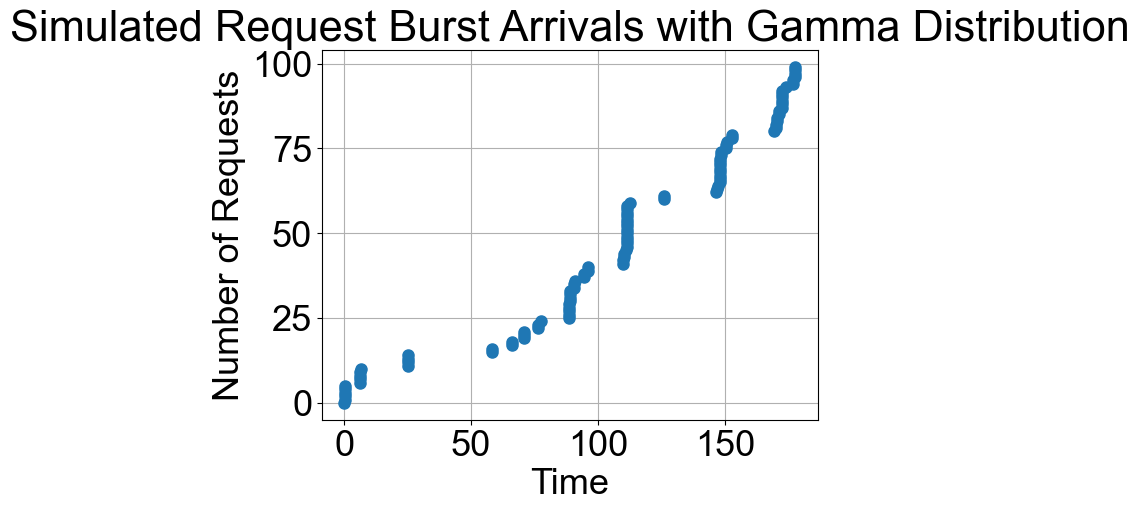

In [832]:
import numpy as np

# Parameters
average_rate = 0.9  # requests per second
cv = 3  # coefficient of variation

# Gamma distribution parameters
mean_inter_arrival_time = 1 / average_rate
variance_inter_arrival_time = (cv * mean_inter_arrival_time) ** 2
shape = mean_inter_arrival_time ** 2 / variance_inter_arrival_time  # shape parameter (k)
scale = variance_inter_arrival_time / mean_inter_arrival_time  # scale parameter (theta)

# Number of requests to simulate
num_requests = 100

# Simulate inter-arrival times of requests
inter_arrival_times = np.random.gamma(shape, scale, num_requests)

# Calculate arrival times of requests
arrival_times = np.cumsum(inter_arrival_times)

# Print some simulated arrival times
print("First 10 arrival times (seconds):", arrival_times[:10])

plt.plot(arrival_times, np.arange(num_requests), marker='o', linestyle='None')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.title('Simulated Request Burst Arrivals with Gamma Distribution')
plt.grid(True)
plt.show()


### Pre-compute compute-bound plan

In [833]:
N = 1000 # not serve x
t_thr = 0.3
value_after_dropped = 0.1

x_thr = (t_thr-0.08)/0.0007

x = np.linspace(x_thr, N, 100)

Q =  t_thr / (0.0007 * x + 0.08)
# Q =  t_thr / (0.001 * x + 0.08)

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, x_thr, 10), [1]*10, color='blue')

plt.plot(x, Q, color='blue')
plt.xlabel('batch size')
plt.ylabel('value')
plt.grid(True)
plt.show()

# # serve N out of N
# total_value_greedy =  Q * x
# plt.plot(x,total_value_greedy, color='blue', label='Serve all ')

# Serve x out of N
plt.figure(figsize=(10, 6))

total_value_andes = x * Q + (N-x) * value_after_dropped
plt.plot(x, total_value_andes, color='red')


x = np.linspace(0, x_thr, 10)
plt.plot(x, x + (N-x)*value_after_dropped, color='blue')
plt.xlabel('batch size')
plt.ylabel('total value')
plt.grid(True)
plt.show()



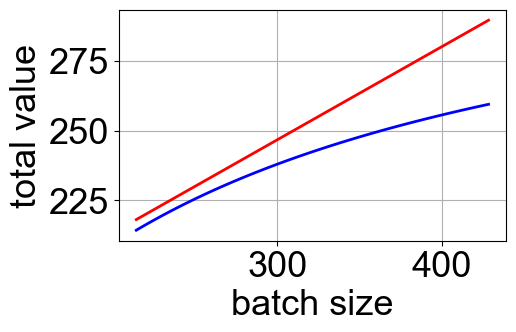

In [834]:

t_thr = 0.23
x_thr = (t_thr-0.08)/0.0007
x = np.linspace(x_thr, x_thr * 2, 100)

Qa = t_thr * x / ( 0.0007*x +0.08 )
Qb = x / 3 + 440/3

plt.figure(figsize=(5,3))
plt.plot(x, Qa, color='blue')
plt.plot(x, Qb, color='red')
plt.xlabel('batch size')
plt.ylabel('total value')
plt.grid(True)
plt.show()



### Extract results


In [835]:

import re

text ='''
>>>>>>>>>> opt-66b-andes-avg-sharegpt-multi-1000-arrive-poisson-1.6-vllm-2024-04-04 13:0. (598 requests) <<<<<<<<<<
Avg response 330.71
Avg TTFT: 114.32. Avg pause: 198.84
Avg Qoe: 0.54, Error: 0.47, Perfect Qoe: 0.46. Throughput: 113.89 tokens/s
>>>>>>>>>> opt-66b-andes-avg-sharegpt-multi-1000-arrive-poisson-2.0-vllm-2024-04-04 11:1. (618 requests) <<<<<<<<<<
Avg response 328.54
Avg TTFT: 151.85. Avg pause: 154.01
Avg Qoe: 0.47, Error: 0.47, Perfect Qoe: 0.39. Throughput: 111.18 tokens/s
>>>>>>>>>> opt-66b-andes-avg-sharegpt-multi-1000-arrive-poisson-2.4-vllm-2024-04-04 13:4. (638 requests) <<<<<<<<<<
Avg response 334.43
Avg TTFT: 94.20. Avg pause: 61.32
Avg Qoe: 0.48, Error: 0.48, Perfect Qoe: 0.42. Throughput: 106.56 tokens/s
>>>>>>>>>> opt-66b-andes-avg-sharegpt-multi-1000-arrive-poisson-2.8-vllm-2024-04-04 12:0. (718 requests) <<<<<<<<<<
Avg response 336.69
Avg TTFT: 131.37. Avg pause: 65.11
Avg Qoe: 0.42, Error: 0.47, Perfect Qoe: 0.35. Throughput: 108.98 tokens/s
>>>>>>>>>> opt-66b-andes-avg-sharegpt-multi-1000-arrive-poisson-3.0-vllm-2024-04-05 03:5. (797 requests) <<<<<<<<<<
Avg response 338.84
Avg TTFT: 468.37. Avg pause: 45.46
Avg Qoe: 0.36, Error: 0.46, Perfect Qoe: 0.30. Throughput: 105.25 tokens/s
>>>>>>>>>> opt-66b-andes-avg-sharegpt-multi-1000-arrive-poisson-4.0-vllm-2024-04-05 05:1. (1 requests) <<<<<<<<<<
Avg response 82.00
Avg TTFT: 7.14. Avg pause: 0.00
Avg Qoe: 0.01, Error: nan, Perfect Qoe: 0.00. Throughput: 0.00 tokens/s
>>>>>>>>>> opt-66b-fcfs-sharegpt-multi-1000-arrive-poisson-1.6-vllm-2024-04-04 09:3. (609 requests) <<<<<<<<<<
Avg response 343.35
Avg TTFT: 338.65. Avg pause: 0.71
Avg Qoe: 0.06, Error: 0.23, Perfect Qoe: 0.05. Throughput: 108.88 tokens/s
>>>>>>>>>> opt-66b-fcfs-sharegpt-multi-1000-arrive-poisson-2.4-vllm-2024-04-04 10:2. (780 requests) <<<<<<<<<<
Avg response 349.57
Avg TTFT: 359.04. Avg pause: 0.69
Avg Qoe: 0.04, Error: 0.19, Perfect Qoe: 0.04. Throughput: 110.29 tokens/s
>>>>>>>>>> opt-66b-fcfs-sharegpt-multi-1000-arrive-poisson-2.8-vllm-2024-04-04 08:4. (876 requests) <<<<<<<<<<
Avg response 347.94
Avg TTFT: 426.69. Avg pause: 0.67
Avg Qoe: 0.01, Error: 0.11, Perfect Qoe: 0.01. Throughput: 110.96 tokens/s
>>>>>>>>>> opt-66b-fcfs-sharegpt-multi-1000-arrive-poisson-4.0-vllm-2024-04-04 21:4. (890 requests) <<<<<<<<<<
Avg response 349.28
Avg TTFT: 34.89. Avg pause: 0.59
Avg Qoe: 0.19, Error: 0.38, Perfect Qoe: 0.17. Throughput: 111.30 tokens/s
>>>>>>>>>> opt-66b-fcfs-sharegpt-multi-1000-arrive-poisson-6.0-vllm-2024-04-04 23:1. (894 requests) <<<<<<<<<<
Avg response 350.91
Avg TTFT: 1.46. Avg pause: 0.10
Avg Qoe: 0.88, Error: 0.31, Perfect Qoe: 0.87. Throughput: 106.76 tokens/s
>>>>>>>>>> opt-66b-fcfs-sharegpt-multi-1000-arrive-poisson-8.0-vllm-2024-04-05 01:1. (890 requests) <<<<<<<<<<
Avg response 349.24
Avg TTFT: 0.51. Avg pause: 0.02
Avg Qoe: 0.97, Error: 0.16, Perfect Qoe: 0.97. Throughput: 104.20 tokens/s
'''

numbers = [float(match.group(1)) for match in re.finditer(r'poisson-(\d+\.\d+)', text)]
print(numbers)

numbers = [float(match.group(1)) for match in re.finditer(r'Avg Qoe: (\d+\.\d+)', text)]
print(numbers)
numbers = [float(match.group(1)) for match in re.finditer(r'Throughput: (\d+\.\d+)', text)]
print(numbers)
numbers = [float(match.group(1)) for match in re.finditer(r'Error: (\d+\.\d+)', text)]
print(numbers)


[1.6, 2.0, 2.4, 2.8, 3.0, 4.0, 1.6, 2.4, 2.8, 4.0, 6.0, 8.0]
[0.54, 0.47, 0.48, 0.42, 0.36, 0.01, 0.06, 0.04, 0.01, 0.19, 0.88, 0.97]
[113.89, 111.18, 106.56, 108.98, 105.25, 0.0, 108.88, 110.29, 110.96, 111.3, 106.76, 104.2]
[0.47, 0.47, 0.48, 0.47, 0.46, 0.23, 0.19, 0.11, 0.38, 0.31, 0.16]


### Client Buffer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


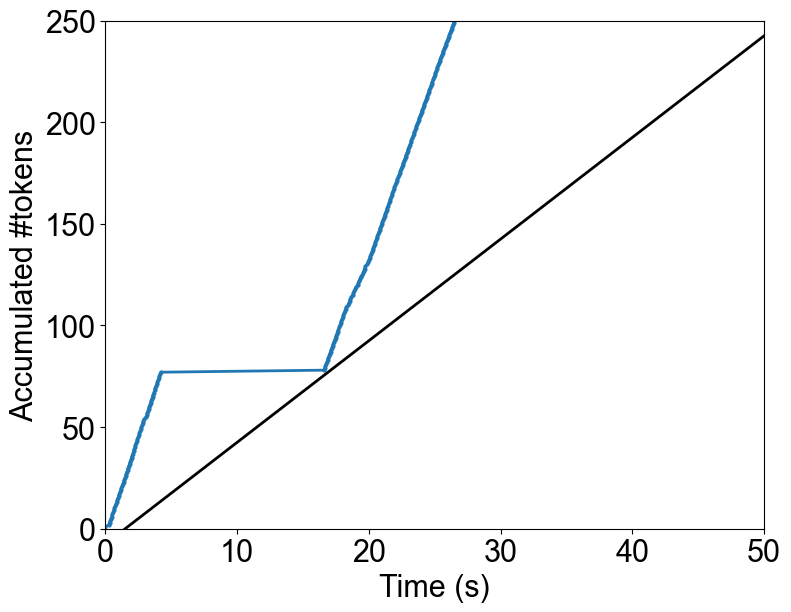

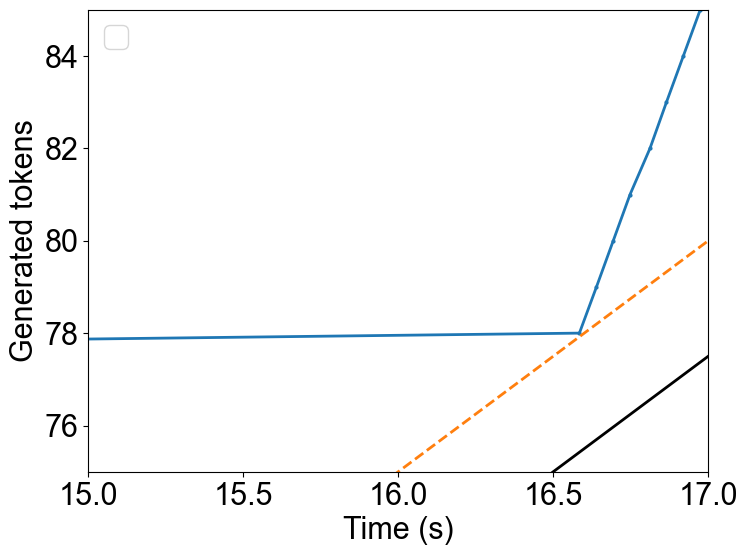

In [836]:

import matplotlib.pyplot as plt
import numpy as np

# Generate some data points for x

# Plot the line y=x
y =    [0.0, 0.2644484043121338, 0.31870079040527344, 0.37123751640319824, 0.42342138290405273, 0.4764211177825928, 0.5293347835540771, 0.5811166763305664, 0.6346497535705566, 0.6875312328338623, 0.73905348777771, 0.7927870750427246, 0.8460803031921387, 0.8983900547027588, 0.950850248336792, 1.0030937194824219, 1.0554780960083008, 1.1074001789093018, 1.1611249446868896, 1.214198350906372, 1.2668516635894775, 1.3215579986572266, 1.3747117519378662, 1.4290452003479004, 1.4811718463897705, 1.5368030071258545, 1.5851962566375732, 1.6337604522705078, 1.684621810913086, 1.7341198921203613, 1.7839317321777344, 1.834000587463379, 1.8841145038604736, 1.9347684383392334, 1.9839041233062744, 2.033694267272949, 2.084892511367798, 2.134355306625366, 2.1841835975646973, 2.232971429824829, 2.2817509174346924, 2.331300735473633, 2.3813960552215576, 2.4335708618164062, 2.4829249382019043, 2.5329318046569824, 2.5836968421936035, 2.6342082023620605, 2.685338020324707, 2.7349677085876465, 2.786302328109741, 2.8372890949249268, 2.89133882522583, 2.9551842212677, 3.0782310962677, 3.127190589904785, 3.1768529415130615, 3.226569652557373, 3.2767252922058105, 3.3264715671539307, 3.378923177719116, 3.430767297744751, 3.476815700531006, 3.5249643325805664, 3.5756642818450928, 3.6269869804382324, 3.6785969734191895, 3.729146957397461, 3.7801599502563477, 3.830235481262207, 3.885206460952759, 3.9377574920654297, 3.9889345169067383, 4.0399253368377686, 4.091241836547852, 4.142197847366333, 4.19888973236084, 18.584244966506958, 18.63931918144226, 18.693372011184692, 18.747600317001343, 18.812041521072388, 18.86516571044922, 18.919652462005615, 18.974390506744385, 19.02750849723816, 19.08543610572815, 19.13785457611084, 19.192582607269287, 19.246132373809814, 19.300373315811157, 19.357534646987915, 19.41252565383911, 19.46761465072632, 19.52255940437317, 19.57678532600403, 19.630303382873535, 19.685672521591187, 19.74120569229126, 19.796361684799194, 19.8502299785614, 19.903095722198486, 19.95663571357727, 20.009281635284424, 20.063119888305664, 20.11596965789795, 20.173097372055054, 20.227752208709717, 20.288177490234375, 20.421466588974, 20.476258277893066, 20.532106161117554, 20.584787607192993, 20.64569902420044, 20.77181363105774, 20.823373794555664, 20.877368688583374, 20.966794967651367, 21.02109932899475, 21.155808448791504, 21.207931995391846, 21.262121200561523, 21.318182468414307, 21.383052110671997, 21.509653329849243, 21.563549041748047, 21.617269039154053, 21.669464826583862, 21.73719358444214, 21.865957021713257, 21.918617963790894, 21.979193210601807, 22.05140495300293, 22.105875253677368, 22.167227745056152, 22.221199989318848, 22.274949073791504, 22.328491926193237, 22.382081985473633, 22.435351610183716, 22.488133192062378, 22.54305672645569, 22.596625804901123, 22.649171352386475, 22.703455924987793, 22.756541967391968, 22.810527086257935, 22.864035844802856, 22.91715359687805, 22.971079111099243, 23.025012016296387, 23.07892894744873, 23.13228154182434, 23.18817925453186, 23.242366790771484, 23.29576301574707, 23.35009503364563, 23.403778314590454, 23.45712399482727, 23.511434316635132, 23.564078092575073, 23.61734414100647, 23.670013666152954, 23.723449230194092, 23.778292417526245, 23.832857608795166, 23.886465787887573, 23.940610647201538, 23.993245363235474, 24.04735517501831, 24.101349115371704, 24.15698790550232, 24.230483770370483, 24.28537631034851, 24.33960199356079, 24.39522695541382, 24.45059084892273, 24.50645089149475, 24.562068700790405, 24.617408514022827, 24.67206311225891, 24.72747802734375, 24.782461404800415, 24.83691668510437, 24.892199993133545, 24.946979999542236, 25.002034664154053, 25.056904315948486, 25.11119294166565, 25.16930389404297, 25.22425889968872, 25.278481006622314, 25.33417844772339, 25.38856601715088, 25.445439100265503, 25.498509883880615, 25.553733587265015, 25.60774564743042, 25.6616792678833, 25.7162868976593, 25.77038836479187, 25.82517409324646, 25.879368543624878, 25.938369750976562, 25.993099212646484, 26.047520875930786, 26.101675987243652, 26.15593409538269, 26.20941686630249, 26.26334023475647, 26.317586660385132, 26.3730366230011, 26.427546501159668, 26.481577157974243, 26.536362171173096, 26.59119701385498, 26.651740789413452, 26.705116748809814, 26.760657787322998, 26.815362691879272, 26.870508193969727, 26.924920320510864, 26.98167872428894, 27.03633737564087, 27.091410160064697, 27.145990133285522, 27.201027393341064, 27.254996061325073, 27.309513807296753, 27.364240884780884, 27.418957948684692, 27.474806547164917, 27.53251338005066, 27.590914011001587, 27.647451639175415, 27.702051639556885, 27.757487058639526, 27.81410837173462, 27.883631229400635, 27.9389910697937, 27.994861364364624, 28.049808263778687, 28.105414390563965, 28.16076946258545, 28.215137004852295, 28.27103018760681, 28.326946258544922, 28.382823944091797, 28.439309120178223, 28.494550466537476, 28.550193548202515, 28.604962825775146, 28.660572052001953, 28.725491285324097, 28.780985832214355, 28.838228702545166, 28.89380955696106, 28.94889998435974, 29.003258228302002, 29.058659076690674, 29.113554000854492, 29.16751527786255, 29.2218177318573, 29.275195598602295, 29.330005407333374, 29.385558366775513, 29.440696001052856, 29.495007276535034, 29.549872398376465, 29.60498571395874, 29.660120487213135, 29.714629888534546, 29.769941568374634, 29.825662851333618, 29.880558967590332, 29.935288190841675, 29.99117684364319, 30.07852554321289, 30.135063409805298, 30.189195156097412, 30.24858570098877, 30.314919471740723, 30.369575023651123, 30.4232656955719, 30.47732949256897, 30.53447437286377, 30.58935236930847, 30.645745277404785, 30.696444272994995, 30.744497060775757, 30.7937433719635, 30.847127199172974, 30.90136480331421, 30.95526647567749, 31.01121234893799, 31.06601905822754, 31.119609594345093, 31.17314600944519, 31.227880001068115, 31.287527084350586, 31.34228825569153, 31.39756488800049, 31.449249744415283, 31.503031253814697, 31.556398391723633, 31.609501123428345, 31.663938760757446, 31.718099355697632, 31.771275520324707, 31.824162006378174, 31.88542079925537, 31.93865203857422, 31.992380380630493, 32.056337118148804, 32.1935818195343, 32.24642014503479, 32.30162763595581, 40.20069169998169, 40.25440788269043, 40.306936740875244, 40.361368894577026, 40.41543793678284, 40.468801498413086, 40.522491216659546, 40.574836015701294, 40.62721228599548, 40.6801598072052, 40.73383188247681, 40.78642272949219, 40.83841156959534, 40.89163565635681, 40.96046733856201, 41.01461458206177, 41.0682418346405, 41.12147092819214, 41.17489814758301, 41.22739052772522, 41.2813024520874, 41.33739495277405, 41.391388177871704, 41.44533586502075, 41.53843092918396, 41.58963322639465, 41.642497062683105, 41.69558930397034, 41.74840831756592, 41.802820682525635, 41.86537051200867, 41.92048215866089, 41.97823190689087, 42.030900716781616, 42.084555864334106, 42.137638092041016, 42.194246768951416, 42.2506799697876, 42.30449652671814, 42.35849714279175, 42.41318678855896, 42.46705627441406, 42.520910024642944, 42.574641704559326, 42.634117603302, 42.69669771194458, 42.74986433982849, 42.80332636833191, 42.85614013671875, 42.908875942230225, 42.962159633636475, 43.015992879867554, 43.06801795959473, 43.12057709693909, 43.1738805770874, 43.22377347946167, 43.27471160888672, 43.323253870010376, 43.37378120422363, 43.42242360115051, 43.472275495529175, 43.52277135848999, 43.60935163497925, 43.66264796257019, 43.71211123466492, 43.7628059387207, 43.814430713653564, 43.86375117301941, 43.91490125656128, 43.964898109436035, 44.022539138793945, 44.072057485580444, 44.122116804122925, 44.17161202430725, 44.22296166419983, 44.273749351501465, 44.3233540058136, 44.38298964500427, 44.43352222442627, 44.48334550857544, 44.53429388999939, 44.583415508270264, 44.63337063789368, 44.684433460235596, 44.73455095291138, 44.795086145401, 44.916592836380005, 44.96688151359558, 45.01748728752136, 45.06671118736267, 45.117326498031616, 45.16866326332092, 45.22405767440796, 45.29153275489807, 45.345925092697144, 45.395447969436646, 45.44470477104187, 45.49359059333801, 45.54339551925659, 45.59350562095642, 45.642435789108276, 45.69299936294556, 45.742430448532104, 45.79319715499878, 45.84307885169983, 45.89435434341431, 45.95031929016113, 46.0032799243927, 46.05550575256348, 46.10883641242981, 46.16279864311218, 46.21616768836975, 46.268030643463135, 46.321256160736084, 46.37455701828003, 46.427902698516846, 46.48072099685669, 46.53468108177185, 46.58657956123352, 46.63967275619507, 46.69282865524292, 46.74510860443115, 46.7979052066803, 46.849791049957275, 46.90282845497131, 46.95677471160889, 47.00900745391846, 47.0624213218689, 47.11539316177368, 47.16875982284546, 47.22100114822388, 47.27455377578735, 47.325966596603394, 47.37868046760559, 47.43367648124695, 47.4856173992157, 47.53854203224182, 47.591532707214355, 47.64484763145447, 47.70183181762695, 47.7605664730072, 47.81348633766174, 47.86697268486023, 47.92078495025635, 47.97858643531799, 48.030487298965454, 48.08364963531494, 48.137869119644165, 48.194658517837524, 48.25154519081116, 48.30547833442688, 48.359721660614014, 48.41255784034729, 48.46535301208496, 48.518574476242065, 48.57215690612793, 48.62556195259094, 48.67943525314331, 48.73237943649292, 48.78566360473633, 48.83929967880249, 48.89395594596863, 48.948153495788574, 49.00214457511902, 49.05531668663025, 49.10873508453369, 49.1622109413147, 49.21538233757019, 49.26981449127197, 49.32264947891235, 49.376235008239746, 49.429696559906006, 49.48248791694641, 49.53969192504883, 49.590715408325195, 49.64340615272522, 49.697099924087524, 49.74924659729004, 49.801154375076294, 49.854910373687744, 49.91001272201538, 49.96452498435974, 50.01739263534546, 50.06944513320923, 50.122833251953125, 50.17619872093201, 50.229719400405884, 50.28317165374756, 50.33621859550476, 50.38909316062927, 50.445889949798584, 50.50339603424072, 50.55808186531067, 50.611438035964966, 50.664344787597656, 50.71752643585205, 50.771432876586914, 50.82419300079346, 50.878453731536865, 50.93243217468262, 50.98653841018677, 51.04022264480591, 51.093342781066895, 51.146607398986816, 51.200162410736084, 51.25315260887146, 51.30521297454834, 51.36000728607178, 51.41352033615112, 51.46791648864746, 51.519514083862305, 51.5756311416626, 51.627691984176636, 51.68036937713623, 51.73250913619995, 51.78527331352234, 51.83641076087952, 51.8872857093811, 51.939631938934326, 51.9980845451355, 52.05063056945801, 52.10634255409241, 52.15716552734375, 52.20949983596802, 52.26135993003845, 52.313679456710815, 52.36494421958923, 52.41711616516113, 52.47207450866699, 52.523900508880615, 52.574427366256714, 52.62591290473938, 52.67727613449097, 52.72922968864441, 52.78175616264343, 52.83416485786438, 52.887956619262695, 52.93661379814148, 52.989581823349, 53.04107069969177, 53.09295177459717, 53.14464998245239, 53.19658160209656, 53.249162435531616, 53.30125975608826, 53.35606646537781, 53.41151475906372, 53.46349835395813, 53.515790700912476, 53.567822217941284, 53.61981272697449, 53.67185139656067, 53.72439479827881, 53.779327392578125, 53.83535718917847, 53.8874249458313, 53.93919062614441, 53.99266028404236, 54.04555892944336, 54.09822344779968, 54.154998540878296, 54.20931339263916, 54.26244282722473, 54.31575870513916, 54.36893916130066, 54.42134976387024, 54.47348070144653, 54.52578115463257, 54.578471660614014, 54.63154602050781, 54.68501257896423, 54.73808765411377, 54.81352257728577, 54.866867780685425, 54.921786069869995, 54.97806477546692, 55.03134512901306, 55.083486795425415, 55.14749264717102, 55.20018458366394, 55.25201869010925, 55.304287910461426, 55.35682916641235, 55.40896677970886, 55.462196588516235, 55.51483488082886, 55.56666326522827, 55.619051456451416, 55.67179489135742, 55.72350335121155, 55.77587080001831, 55.82744097709656, 55.88021802902222, 55.93250751495361, 55.98812913894653, 56.03939962387085, 56.0925178527832, 56.146634578704834, 56.19886803627014, 56.253732681274414, 56.30526304244995, 56.3568811416626, 56.409913063049316, 56.46217465400696, 56.514098167419434, 56.566866636276245, 56.619030714035034, 56.6710844039917, 56.723368406295776, 56.7755286693573, 56.82818412780762, 56.87922191619873, 56.93089246749878, 56.983582973480225, 57.0356662273407, 57.092222452163696, 57.14687514305115, 57.1997926235199, 57.253316164016724, 57.305633544921875, 57.357996225357056, 57.41116404533386, 57.46371054649353, 57.517685651779175, 57.56994342803955, 57.62279534339905, 57.675750494003296, 57.72823095321655, 57.78147625923157, 57.83491039276123, 57.88740634918213, 57.94019317626953, 57.995251417160034, 58.04425930976868, 58.09345054626465, 58.14211654663086, 58.1905357837677, 58.240442991256714, 58.290210485458374, 58.33924436569214, 58.3882372379303, 58.436065435409546, 58.48586106300354, 58.535669803619385, 58.58490610122681, 58.63328409194946, 58.68321490287781, 58.73202133178711, 58.780351400375366, 58.82833528518677, 58.87677001953125, 58.92445611953735, 58.97107553482056, 59.01952624320984, 59.07040286064148, 59.11686110496521, 59.17190384864807, 59.220475912094116, 59.26781940460205, 59.319303035736084, 59.36818289756775, 59.4155650138855, 59.4687705039978, 59.52565240859985, 59.57687830924988, 59.62495040893555, 59.675201654434204, 59.72395038604736, 59.772297620773315, 59.820897579193115, 59.868460178375244, 59.916210889816284, 59.96382284164429, 60.01339793205261, 60.061517000198364, 60.11014699935913, 60.15762424468994, 60.20569849014282, 60.253371715545654, 60.30050325393677, 60.35011410713196, 60.396075963974, 60.441230058670044, 60.48700308799744, 60.53352880477905, 60.57820916175842, 60.62557101249695, 60.671147108078, 60.71697425842285, 60.76275277137756, 60.80939197540283, 60.854787826538086, 60.89989447593689, 60.945029735565186, 60.99101424217224, 61.035627126693726, 61.081665992736816, 61.126978635787964, 61.17214870452881, 61.21989989280701, 61.26537537574768, 61.31092715263367, 61.356621503829956, 61.40242600440979, 61.44812369346619, 61.494110107421875, 61.53863859176636, 61.5836238861084, 61.63623666763306, 61.681166648864746, 61.72711110115051, 61.772743225097656, 61.81808114051819, 61.863144636154175, 61.90888953208923, 61.95498085021973, 62.000683307647705, 62.046244621276855, 62.09303259849548, 62.138962268829346, 62.183356046676636, 62.228673219680786, 62.2746479511261, 62.3195743560791, 62.36484909057617, 62.41080355644226, 62.4562406539917, 62.50057768821716, 62.545981884002686, 62.59129309654236, 62.63688898086548, 62.682286500930786, 62.72793483734131, 62.77423334121704, 62.82076048851013, 62.867618560791016, 62.913424253463745, 62.95927405357361, 63.00614666938782, 63.050962924957275, 63.09653186798096, 63.14230513572693, 63.187326431274414, 63.23259162902832, 63.28428840637207, 63.329505443573, 63.37528467178345, 63.4199001789093, 63.46433234214783, 63.50899052619934, 63.555700063705444, 63.600507736206055, 63.6682391166687, 63.749202251434326, 63.79675030708313, 63.8431031703949, 63.88975477218628, 63.93701648712158, 63.98389530181885, 64.0314040184021, 64.07829117774963, 64.1245653629303, 64.17190599441528, 64.2201337814331, 64.26669144630432, 64.31250596046448, 64.35827660560608, 64.4065477848053, 64.45104551315308, 64.49698305130005, 64.54314541816711, 64.58827304840088, 64.63276743888855, 64.67759299278259, 64.72102093696594, 64.76597285270691, 64.82757234573364, 64.87401103973389, 64.9234893321991, 64.9703733921051, 65.01742053031921, 65.06271624565125, 65.10712480545044, 65.15463709831238, 65.1986951828003, 65.24314785003662, 65.2881371974945, 65.33240675926208, 65.37704086303711, 65.42184972763062, 65.46658158302307, 65.51114177703857, 65.55615305900574, 65.60101652145386, 65.6468768119812, 65.69129419326782, 65.73527407646179, 65.7791497707367, 65.82322812080383, 65.86795353889465, 65.91207075119019, 65.95666146278381, 66.00059819221497, 66.04699540138245, 66.09079909324646, 66.13658881187439, 66.18088698387146, 66.22556018829346, 66.27058124542236, 66.31499195098877, 66.3598084449768, 66.40587639808655, 66.45057964324951, 66.49481844902039, 66.53878617286682, 66.58305144309998, 66.62723445892334, 66.671541929245, 66.71544051170349, 66.76110792160034, 66.80710816383362, 66.85225367546082, 66.89794158935547, 66.94254684448242, 66.9880211353302, 67.03271150588989, 67.07778263092041, 67.12476658821106, 67.16987562179565, 67.22375392913818, 67.26913976669312, 67.31445789337158, 67.35929322242737, 67.40556049346924, 67.4505558013916, 67.49558782577515, 67.54046201705933, 67.58602094650269, 67.63114285469055, 67.67682600021362, 67.72217178344727, 67.76752305030823, 67.81390118598938, 67.86003160476685, 67.9063310623169, 67.95386338233948, 67.99959135055542, 68.04666471481323, 68.09351539611816, 68.13971519470215, 68.18511509895325, 68.2330436706543, 68.27645087242126, 68.32001876831055, 68.36394715309143, 68.40819597244263, 68.46246457099915, 68.53557705879211, 68.58218836784363, 68.62844014167786, 68.6747682094574, 68.71973657608032, 68.76651191711426, 68.81245040893555, 68.85975384712219]

temp_y = []
for i in y:
    if i < 5:
        temp_y.append(i)
    else:
        temp_y.append(i-2)

y = temp_y
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(8.5, 6.6))
x = np.arange(1, len(y) + 1)
plt.plot(y, x, marker='o', markersize=2)
x = np.linspace(0, 27, 100)
# plt.plot(x, 5 * (x - 1), linestyle='--', markersize=2, lw=2)
x = np.linspace(0, 200, 100)
plt.plot(x, 5 * (x - 1.5), color = 'black', linestyle='-', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Accumulated #tokens')
plt.xlim(left=0, right=50)
plt.ylim(bottom=0, top=250)
# plt.legend()
plt.savefig("big_fig.png")
# plt.show()

plt.figure(figsize=(8, 6))
x = np.arange(1, len(y) + 1)
plt.plot(y, x, marker='o', markersize=2)
x = np.linspace(0, 200, 100)
plt.plot(x, 5 * (x - 1), linestyle='--', markersize=2)
plt.plot(x, 5 * (x - 1.5), color = 'black', linestyle='-', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Generated tokens')
plt.xlim(left=15, right=17)
plt.ylim(bottom=75, top=85)
plt.legend()
plt.savefig("cross.png")

plt.figure(figsize=(2, 6))
x = np.arange(1, len(y) + 1)
plt.plot(y, x, marker='o', markersize=2)
x = np.linspace(0, 200, 100)
plt.plot(x, 5 * (x - 1), linestyle='--', markersize=2)
plt.plot(x, 5 * (x - 1.5), color = 'black', linestyle='-', markersize=2)
plt.xlabel('Time (s)')
plt.ylabel('Generated tokens')
plt.xlim(left=18, right=19)
plt.ylim(bottom=105, top=125)
plt.legend()
plt.savefig("cross_stall.png")

In [3]:


def cal_pause_duration(latency_list):
	# sum up all pause > 1s
	pause_duration = 0
	anchor_time = anchor_len = 0
	for i in range(len(latency_list)):
		if latency_list[i] > 1:
			p = sum(latency_list[:i+1]) - anchor_time - (i-anchor_len) * 0.25
			if p > 0:
				pause_duration += p
				anchor_time = sum(latency_list[:i+1])
				anchor_len = i
	return pause_duration

a = [.25,.25,.25,.25, 4,.25,.25,.25,.25,.25,.25,.25,.25,.25,]
a = [.1, .1, .1, .1,.1, .1, .1, .1, 4 ]
print(cal_pause_duration(a))
b = [0.1652216911315918, 0.1720733642578125, 0.172593355178833, 0.1651296615600586, 0.16904735565185547, 0.17807674407958984, 0.16409802436828613, 0.2799720764160156, 0.1661818027496338, 0.17009902000427246, 0.16702532768249512, 0.1649773120880127, 0.16230463981628418, 0.16967105865478516, 0.16399431228637695, 0.16973519325256348, 0.1711444854736328, 0.16925287246704102, 0.17058324813842773, 0.1705760955810547, 0.1712656021118164, 0.16512680053710938, 0.16613435745239258, 0.1717979907989502, 0.1751537322998047, 0.18986248970031738, 0.17302274703979492, 0.16927480697631836, 0.1643986701965332, 0.16398859024047852, 0.1700594425201416, 0.16408324241638184, 0.17148518562316895, 0.17215704917907715, 0.165238618850708, 0.16558504104614258, 0.1779484748840332, 0.16875386238098145, 0.17713713645935059, 0.16742229461669922, 0.17974305152893066, 0.2739894390106201, 0.17096996307373047, 0.16926980018615723, 0.1715221405029297, 0.16627788543701172, 0.1665489673614502, 0.17131590843200684, 0.2212679386138916, 0.1673600673675537, 0.16735267639160156, 0.43772196769714355, 0.16899609565734863, 0.16702556610107422, 0.17725539207458496, 0.17295217514038086, 0.18667912483215332, 0.16978693008422852, 0.17925643920898438, 0.1960430145263672, 0.1780562400817871, 0.17656588554382324, 0.16764068603515625, 0.17373967170715332, 0.18090367317199707, 0.17208147048950195, 0.17776799201965332, 0.19732236862182617, 0.16448307037353516, 0.17317438125610352, 0.1764683723449707, 0.17345237731933594, 0.16906499862670898, 0.17903995513916016, 0.16635775566101074, 0.1666724681854248, 0.17223548889160156, 0.16697430610656738, 0.17755579948425293, 0.18011093139648438, 0.17091107368469238, 0.1677689552307129, 0.23052549362182617, 0.23033905029296875, 0.23450279235839844, 0.23243951797485352, 0.2365717887878418, 0.24593138694763184, 0.19822454452514648, 0.19549202919006348, 0.22710347175598145, 0.20684289932250977, 0.4679560661315918, 0.23153185844421387, 0.2253882884979248, 0.21297216415405273, 0.35778069496154785, 0.22409367561340332, 0.2037806510925293, 0.19263577461242676, 0.2391796112060547, 0.22623133659362793, 0.24111199378967285, 0.23148250579833984, 0.232774019241333, 0.24785804748535156, 0.20943260192871094, 0.23297381401062012, 0.21825909614562988, 0.2569446563720703, 0.18020391464233398, 0.19220757484436035, 0.22542715072631836, 0.21417546272277832, 0.2530500888824463, 0.2459852695465088, 0.18983888626098633, 0.24167823791503906, 0.21022272109985352, 0.21576189994812012, 0.18966364860534668, 0.23373126983642578, 0.2251880168914795, 0.24496960639953613, 0.23397159576416016, 0.19198083877563477, 0.22203373908996582, 0.16080594062805176, 0.20086336135864258, 0.3115077018737793, 0.14945125579833984, 0.16059637069702148, 0.157759428024292, 0.17550969123840332, 0.19475293159484863, 0.206146240234375, 0.18569254875183105, 0.19115495681762695, 0.18592119216918945, 0.18506193161010742, 0.18317937850952148, 0.18658113479614258, 0.1519794464111328, 0.17360997200012207, 0.17760157585144043, 0.19013690948486328, 0.17981982231140137, 0.1554698944091797, 0.1730968952178955, 0.17821145057678223, 0.16352200508117676, 0.180283784866333, 0.18296003341674805, 0.1658649444580078, 0.16194772720336914, 0.19357991218566895, 0.18057489395141602, 0.17238092422485352, 0.1599273681640625, 0.382720947265625, 0.17403435707092285, 0.1619093418121338, 0.16758060455322266, 0.18492650985717773, 0.18405771255493164, 0.17670774459838867, 0.16943764686584473, 0.1705167293548584, 0.17364931106567383, 0.14902019500732422, 0.29513120651245117, 0.16323614120483398, 0.1639418601989746, 0.3926093578338623, 0.18547677993774414, 0.18101954460144043, 0.14878201484680176, 0.14731121063232422, 0.16674280166625977, 0.17807865142822266, 0.18233513832092285, 0.16982340812683105, 0.18072080612182617, 0.3210747241973877, 0.17807292938232422, 0.18125295639038086, 0.19173407554626465, 0.16022801399230957, 0.1580045223236084, 0.15639805793762207, 0.18367481231689453, 0.31697940826416016, 0.17707371711730957, 0.16952919960021973, 0.1716465950012207, 0.15770769119262695, 0.16896605491638184, 0.15760469436645508, 0.17804431915283203, 0.18044209480285645, 0.18889832496643066, 0.16404104232788086, 0.3147623538970947, 1071.015738248825, 0.09854602813720703, 0.10236620903015137, 0.10023713111877441, 0.10067343711853027, 0.23409652709960938, 0.09571623802185059, 0.09831833839416504, 0.09613466262817383, 0.09844732284545898, 0.09584522247314453, 0.09605526924133301, 0.10654592514038086, 0.09735274314880371, 0.10385870933532715, 0.22602581977844238, 0.09708476066589355, 0.0980992317199707, 0.0948781967163086, 0.09794282913208008, 0.0966641902923584, 0.09743165969848633, 0.0982217788696289, 0.09593892097473145, 0.1180729866027832, 0.0956428050994873, 0.09447860717773438, 0.09879851341247559, 0.10672187805175781, 0.09718084335327148, 0.09513640403747559, 0.09687399864196777, 0.10122895240783691, 0.0956566333770752, 0.09778380393981934, 0.09502172470092773, 0.09516215324401855, 0.09697556495666504, 0.10196757316589355, 0.09762167930603027, 0.16010189056396484, 0.09461236000061035, 0.09755659103393555, 0.0956568717956543, 0.09696841239929199, 0.09463095664978027, 0.09459495544433594, 0.10101604461669922, 0.0966947078704834, 0.09791278839111328, 0.16149091720581055, 0.09478163719177246, 0.0992286205291748, 0.09618115425109863, 0.09794783592224121, 0.17622923851013184, 0.09466934204101562, 0.09561347961425781, 0.09381222724914551, 0.09520578384399414, 0.09372639656066895, 0.09384655952453613, 0.09833526611328125, 0.09451556205749512, 0.09675240516662598, 0.0964207649230957, 0.09394454956054688, 0.09790706634521484, 0.094024658203125, 0.09861564636230469, 0.09416055679321289, 0.09482955932617188, 0.09651899337768555, 0.09654641151428223, 0.0965731143951416, 0.09479951858520508, 0.09404683113098145, 0.09596776962280273, 0.09427356719970703, 0.09648585319519043, 0.09690690040588379, 0.10400247573852539, 0.10775923728942871, 0.0959010124206543, 0.09592485427856445, 0.09409594535827637, 0.09571981430053711, 0.09381914138793945, 0.09533810615539551, 0.09604382514953613, 0.09393453598022461, 0.09432625770568848, 0.10103607177734375, 0.09548234939575195, 0.09822964668273926, 0.09165644645690918, 0.09192800521850586, 0.0937814712524414, 0.09198474884033203, 0.10516500473022461, 0.09673213958740234, 0.08966279029846191, 0.0935215950012207, 0.0954747200012207, 0.10073304176330566, 0.6172897815704346, 0.09046649932861328, 0.09413337707519531, 0.09128618240356445, 0.09565877914428711, 0.16846394538879395, 0.09205174446105957, 0.09501314163208008, 0.09168338775634766, 0.09345436096191406, 0.09239912033081055, 0.09331274032592773, 0.1465287208557129, 0.14532804489135742, 0.14218759536743164, 0.14538145065307617, 0.1427769660949707, 0.14639759063720703, 0.14140105247497559, 0.14835333824157715, 0.14502787590026855, 0.14920425415039062, 0.13594436645507812, 0.1432657241821289, 0.14356160163879395, 0.14442062377929688, 0.1449134349822998, 0.15534257888793945, 0.144317626953125, 0.14327216148376465, 0.1425025463104248, 0.1295318603515625, 0.14496946334838867, 0.14631915092468262, 0.16300511360168457, 0.22547316551208496, 0.15162420272827148, 0.14599394798278809, 0.14910197257995605, 0.15124225616455078, 0.2193002700805664, 0.14307618141174316, 0.14554357528686523, 0.14091753959655762, 0.15566778182983398, 0.28775811195373535, 0.14400482177734375, 0.14542222023010254, 0.1488819122314453, 0.14774131774902344, 0.14309477806091309, 0.14268708229064941, 0.14771461486816406, 0.13568639755249023, 0.15389657020568848, 0.21960210800170898, 0.16605567932128906, 0.14506316184997559, 0.1394343376159668, 0.14668536186218262, 0.13922905921936035, 0.14458799362182617, 0.14325809478759766, 0.1382441520690918, 0.1448519229888916, 0.1459336280822754, 0.1235194206237793, 0.1412208080291748, 0.14177846908569336, 0.14844870567321777, 0.14736223220825195, 0.1429886817932129, 0.14186954498291016, 0.13885188102722168, 0.14479660987854004, 0.14200043678283691, 0.13380169868469238, 0.14534497261047363, 0.1436002254486084, 0.14521336555480957, 0.13930082321166992, 0.1496422290802002, 0.12375926971435547, 0.1405937671661377, 0.1519920825958252, 0.14425420761108398, 0.1405949592590332, 0.14475440979003906, 0.14181280136108398, 0.14305877685546875, 0.13959813117980957, 0.1429598331451416, 0.14037609100341797, 0.14553380012512207, 0.14877676963806152, 0.20790648460388184, 0.14154410362243652, 0.14417409896850586, 0.1467447280883789, 0.1535027027130127, 0.14280033111572266, 0.14249515533447266, 0.16486430168151855, 0.14026904106140137, 0.1430819034576416, 0.14020776748657227, 0.1392679214477539, 0.1433851718902588, 0.1420149803161621, 0.14494109153747559, 0.14091134071350098, 0.14053702354431152, 0.15097498893737793, 0.13930749893188477, 0.1438302993774414, 0.14519000053405762, 0.14487600326538086, 0.14397215843200684, 0.14811253547668457, 0.12081122398376465, 0.10278487205505371, 0.12904000282287598, 0.1405179500579834, 0.13805460929870605, 0.13632845878601074, 0.141937255859375, 0.13395357131958008, 0.13112878799438477, 0.1424715518951416, 0.1442267894744873, 0.42592763900756836, 0.12807726860046387, 0.14250659942626953, 0.14055466651916504, 0.1378498077392578, 0.13834762573242188, 0.13131093978881836, 0.1403827667236328, 0.13832616806030273, 0.13704752922058105, 0.13391447067260742, 0.13706731796264648, 0.1406722068786621, 0.13997769355773926, 0.14061617851257324, 0.1361558437347412, 0.13453006744384766, 0.14106488227844238, 0.14103150367736816, 0.1274704933166504, 0.1351184844970703, 0.13884735107421875, 0.13904166221618652, 0.1388702392578125, 0.14782476425170898, 0.24298310279846191, 0.13575029373168945, 0.135512113571167, 0.13377022743225098, 0.13508224487304688, 0.13313651084899902, 0.1334972381591797, 0.137465238571167, 0.14389348030090332, 0.13855886459350586, 0.1227874755859375, 0.09109115600585938, 0.08605480194091797, 0.09345006942749023, 0.09320735931396484, 0.08704519271850586, 0.08593630790710449, 0.08542966842651367, 0.08785581588745117, 0.08628487586975098, 0.08703207969665527, 0.08439040184020996, 0.08365035057067871, 0.08680200576782227, 0.08092689514160156, 0.0834958553314209, 0.07991552352905273, 0.08067893981933594, 0.08087491989135742, 0.08040595054626465, 0.08047056198120117, 0.0804452896118164, 0.08054947853088379, 0.08140707015991211, 0.08999204635620117, 0.07999372482299805, 0.0841379165649414, 0.08005714416503906, 0.08048725128173828, 0.08071780204772949, 0.08085489273071289, 0.08073186874389648, 0.08167886734008789, 0.08038616180419922, 0.08066225051879883, 0.08043646812438965, 0.08028364181518555, 0.08067035675048828, 0.08127880096435547, 0.08102893829345703, 0.08400201797485352, 0.08049130439758301, 0.08119082450866699, 0.08151006698608398, 0.08202457427978516, 0.08024001121520996, 0.08096098899841309, 0.0827641487121582, 0.08413958549499512, 0.07870841026306152, 0.07969164848327637, 0.07889437675476074, 0.07755780220031738, 0.07840132713317871, 0.07882571220397949, 0.07890105247497559, 0.07872295379638672, 0.0782616138458252, 0.08150839805603027, 0.0778810977935791, 0.07854890823364258, 0.07894229888916016, 0.07992744445800781, 0.0809178352355957, 0.08903121948242188, 0.07980012893676758, 0.08100056648254395, 0.07874202728271484, 0.0781707763671875, 0.08213090896606445, 0.0775289535522461, 0.07689356803894043, 0.07723736763000488, 0.07666325569152832, 0.07723021507263184, 0.07650971412658691, 0.08770537376403809, 0.07852745056152344, 0.07604217529296875, 0.07799148559570312, 0.07479047775268555, 0.07419705390930176, 0.07534265518188477, 0.07307553291320801, 0.07038092613220215, 0.07018470764160156, 0.07030510902404785, 0.06966733932495117, 0.07055974006652832, 0.07028722763061523, 0.08021974563598633, 0.07108759880065918, 0.0697624683380127, 0.06947064399719238, 0.07021760940551758, 0.06930088996887207, 0.06986379623413086, 0.0694882869720459, 0.0699307918548584, 0.06901049613952637, 0.06948661804199219, 0.06952404975891113, 0.06918454170227051, 0.06934189796447754, 0.07222247123718262, 0.07071065902709961, 0.06979155540466309, 0.06965231895446777, 0.06948518753051758, 0.07015681266784668, 0.07038378715515137, 0.06947159767150879, 0.06932640075683594, 0.06945562362670898, 0.06961679458618164, 0.0717313289642334, 0.06862521171569824, 0.070281982421875, 0.0688011646270752, 0.0682978630065918, 0.0682520866394043, 0.06880331039428711, 0.0695042610168457, 0.06923961639404297, 0.06869292259216309, 0.06984901428222656, 0.06887197494506836, 0.06885957717895508, 0.06978631019592285, 0.06870722770690918, 0.06877613067626953, 0.07095837593078613, 0.07133364677429199, 0.06917691230773926, 0.06699585914611816, 0.06680512428283691, 0.06728529930114746, 0.06688332557678223, 0.06714534759521484, 0.0669851303100586, 0.06826925277709961, 0.06717658042907715, 0.06478452682495117, 0.06483745574951172, 0.06390976905822754, 0.06609606742858887, 0.06502032279968262, 0.0637674331665039, 0.06329703330993652, 0.0630350112915039, 0.06491541862487793, 0.06329154968261719, 0.06572866439819336, 0.063629150390625, 0.06279897689819336, 0.06314587593078613, 0.06345844268798828, 0.06285881996154785, 0.06310129165649414, 0.073760986328125, 0.06469607353210449, 0.06130075454711914, 0.061719655990600586, 0.06354117393493652, 0.06112957000732422, 0.060881853103637695, 0.06148576736450195, 0.0612635612487793, 0.07365751266479492, 0.0611727237701416, 0.06144523620605469, 0.06097912788391113, 0.061191558837890625, 0.06402087211608887, 0.06127476692199707, 0.06147956848144531, 0.060916900634765625, 0.06134796142578125, 0.06113481521606445, 0.06426382064819336, 0.0601811408996582, 0.06215834617614746, 0.061492204666137695, 0.06179308891296387, 0.06134772300720215, 0.06357336044311523, 0.06076335906982422, 0.060355186462402344, 0.060538530349731445, 0.061187028884887695, 0.05953025817871094, 0.058851003646850586, 0.06079721450805664, 0.06047534942626953, 0.05825352668762207, 0.05758023262023926, 0.05785393714904785, 0.06001782417297363, 0.05687522888183594, 0.05749011039733887, 0.05697369575500488, 0.05679178237915039, 0.05725717544555664, 0.06044936180114746, 0.055739641189575195, 0.05687308311462402, 0.0568850040435791, 0.05696725845336914, 0.05671882629394531, 0.056878089904785156, 0.05679130554199219, 0.05803966522216797, 0.05683135986328125, 0.05844283103942871, 0.0579218864440918, 0.05513572692871094, 0.054911136627197266, 0.054750680923461914, 0.055298805236816406, 0.05506300926208496, 0.055850982666015625, 0.05429244041442871, 0.05606508255004883, 0.054062604904174805, 0.05412459373474121, 0.0538945198059082, 0.053800106048583984, 0.053914546966552734, 0.0538325309753418, 0.0539700984954834, 0.05357241630554199, 0.05445694923400879, 0.05370783805847168, 0.053453922271728516, 0.054082632064819336, 0.053830862045288086, 0.054032325744628906, 0.054331302642822266, 0.05526924133300781, 0.05370974540710449, 0.05964231491088867, 0.05073428153991699, 0.05067873001098633, 0.05061149597167969, 0.0503849983215332, 0.050753116607666016, 0.05846261978149414, 0.05078530311584473, 0.0505831241607666, 0.05198335647583008, 0.050818443298339844, 0.05014181137084961, 0.051024675369262695, 0.05339407920837402, 0.05030226707458496, 0.05007815361022949, 0.05981802940368652, 0.05019235610961914, 0.05088472366333008, 0.05081915855407715, 0.05025839805603027, 0.05071401596069336, 0.0506289005279541, 0.05074310302734375, 0.0505063533782959, 0.05033588409423828, 0.050486087799072266, 0.05048489570617676, 0.05063796043395996, 0.05066800117492676, 0.05007576942443848, 0.05062699317932129, 0.0504002571105957, 0.05045056343078613, 0.05424332618713379, 0.05080819129943848, 0.04998135566711426, 0.049341440200805664, 0.050332069396972656, 0.05159282684326172, 0.049924612045288086, 0.049344778060913086, 0.04938817024230957, 0.04908943176269531, 0.049591064453125, 0.048856496810913086, 0.04944038391113281, 0.049273014068603516, 0.05075979232788086, 0.04873943328857422, 0.04958820343017578, 0.04908490180969238, 0.050531864166259766, 0.0545957088470459, 0.04993104934692383, 0.04794764518737793, 0.048573970794677734, 0.047901153564453125, 0.04848217964172363, 0.04812002182006836, 0.04792976379394531, 0.04804539680480957, 0.04790139198303223, 0.04786348342895508, 0.04767775535583496, 0.047783613204956055, 0.04768657684326172, 0.04790186882019043, 0.049311161041259766, 0.04767441749572754, 0.04812884330749512, 0.0478973388671875, 0.047974586486816406, 0.04762911796569824, 0.048094749450683594, 0.05002236366271973, 0.051337480545043945, 0.04650616645812988, 0.047327518463134766, 0.04701590538024902, 0.048071861267089844, 0.04722857475280762, 0.04652905464172363, 0.046651363372802734, 0.046597957611083984, 0.053862571716308594, 0.046338796615600586, 0.04705357551574707, 0.04662966728210449, 0.04661965370178223, 0.04637408256530762, 0.0468447208404541, 0.046590566635131836, 0.04674839973449707, 0.047265052795410156, 0.046645402908325195, 0.04818248748779297, 0.048552513122558594, 0.046549320220947266, 0.0467839241027832, 0.04734659194946289, 0.04721355438232422, 0.0467524528503418, 0.04669976234436035, 0.04651522636413574, 0.0538945198059082, 0.04639625549316406, 0.04686999320983887, 0.0468902587890625, 0.046935081481933594, 0.04663252830505371, 0.046694040298461914, 0.046454429626464844, 0.04665350914001465, 0.04683375358581543, 0.04700493812561035, 0.0470123291015625, 0.046459197998046875, 0.047158002853393555, 0.048549652099609375, 0.046845197677612305, 0.04760861396789551, 0.04763388633728027, 0.04686379432678223, 0.046979665756225586, 0.04661393165588379, 0.04680991172790527, 0.046782493591308594, 0.0465087890625, 0.047119855880737305, 0.048749446868896484, 0.0450139045715332, 0.04482865333557129, 0.04502415657043457, 0.04633021354675293, 0.04483747482299805, 0.04482769966125488, 0.045099496841430664, 0.0489506721496582, 0.04444003105163574, 0.0443878173828125, 0.04386115074157715, 0.04407453536987305, 0.0444643497467041, 0.04383373260498047, 0.04583334922790527, 0.037990570068359375, 0.03825116157531738, 0.03757905960083008, 0.0374608039855957, 0.037540435791015625, 0.0379030704498291, 0.0377049446105957, 0.03848528861999512, 0.03717494010925293, 0.03767085075378418, 0.037858009338378906, 0.03740286827087402, 0.037253379821777344, 0.03738737106323242, 0.03750777244567871, 0.03737926483154297, 0.038140296936035156, 0.039305686950683594, 0.03782463073730469, 0.038176774978637695, 0.037714242935180664, 0.03764200210571289, 0.03744387626647949, 0.03828263282775879, 0.038172006607055664, 0.03772544860839844, 0.03792762756347656, 0.03781461715698242, 0.037531137466430664, 0.037568092346191406, 0.03820633888244629, 0.037444114685058594, 0.037485599517822266, 0.037401437759399414, 0.037550926208496094, 0.03715229034423828, 0.04447031021118164, 0.037317514419555664, 0.037430524826049805, 0.03728151321411133, 0.03737449645996094, 0.03743767738342285, 0.03739595413208008, 0.03732609748840332, 0.0376286506652832, 0.03777718544006348, 0.03807210922241211, 0.03775286674499512, 0.03744220733642578, 0.03750205039978027, 0.03848624229431152, 0.0374143123626709, 0.037613630294799805, 0.0376429557800293, 0.03751683235168457, 0.03773140907287598, 0.0373837947845459, 0.037427425384521484, 0.03742408752441406, 0.03933072090148926, 0.03528308868408203, 0.03504681587219238, 0.035414695739746094, 0.03510427474975586, 0.035101890563964844, 0.03521871566772461, 0.03509330749511719, 0.03492999076843262, 0.0363006591796875, 0.03498482704162598, 0.03590512275695801, 0.03516888618469238, 0.03542733192443848, 0.035878658294677734, 0.03558063507080078, 0.03638005256652832, 0.035176992416381836, 0.0352635383605957, 0.03575587272644043, 0.03529834747314453, 0.03551077842712402, 0.035262107849121094, 0.03545093536376953, 0.03524136543273926, 0.03486180305480957, 0.035222768783569336, 0.03522205352783203, 0.03514695167541504, 0.03557109832763672, 0.03515458106994629, 0.035231828689575195, 0.03494882583618164, 0.03546500205993652, 0.03500103950500488, 0.03506827354431152, 0.03514885902404785, 0.03533315658569336, 0.03513455390930176, 0.03490567207336426, 0.03555917739868164, 0.03546786308288574, 0.03535819053649902, 0.03509926795959473, 0.035633087158203125, 0.03514504432678223, 0.03498077392578125, 0.03544306755065918, 0.03565096855163574, 0.035199880599975586, 0.03502225875854492, 0.035950422286987305, 0.03540945053100586, 0.03512120246887207, 0.03525900840759277, 0.03482365608215332, 0.03508186340332031, 0.03533530235290527, 0.03513979911804199, 0.035121917724609375, 0.03515887260437012, 0.035247802734375, 0.03517484664916992, 0.03753829002380371]

print(cal_pause_duration(b))


2.8
1059.5693814754486


## 3D DP leetcode


In [ ]:
import numpy as np
import random

def schedule_requests(N, B, M, deltaQ, l):
    # Initialize DP and choice arrays
    dp = [[[-float('inf') for _ in range(M+1)] for _ in range(B+1)] for _ in range(N+1)]
    choice = [[[0 for _ in range(M+1)] for _ in range(B+1)] for _ in range(N+1)]
    dp[0][0][0] = 0  # Base case

    # Main DP loop
    for i in range(1, N+1):
        for b in range(min(i, B)+1):  # +1 because range is exclusive
            for m in range(M+1):
                # Case 1: Do not select the i-th request
                if dp[i][b][m] < dp[i-1][b][m]:
                    dp[i][b][m] = dp[i-1][b][m]
                    choice[i][b][m] = 0

                # Case 2: Select the i-th request, if it does not exceed the constraints
                if b > 0 and m + l[i-1] <= M and dp[i][b][m + l[i-1]] < dp[i-1][b-1][m] + deltaQ[i-1]:
                    dp[i][b][m + l[i-1]] = dp[i-1][b-1][m] + deltaQ[i-1]
                    choice[i][b][m + l[i-1]] = 1

    # Find the optimal solution and corresponding memory
    max_dealtQ, current_m = max((value, index) for index, value in enumerate(dp[N][B]))

    # Backtrack to find the decision array x_i
    x = [0] * (N+1)  # Initialize decision array with zeros
    current_b = B
    for i in range(N, 0, -1):
        x[i] = choice[i][current_b][current_m]
        if x[i] == 1:
            current_m -= l[i-1]
            current_b -= 1

    # Return the array excluding the dummy 0th element
    return x[1:], max_dealtQ

# Example usage
N = random.randint(1, 10)
B = random.randint(1, N)
M = random.randint(2*N, 10*N)
# deltaQ for bs = B
deltaQ = [random.randint(1, 10) for _ in range(N)]
l = random.choices(range(1, M//2), k=N)
print(f"N = {N}, B = {B}, M = {M}, deltaQ = {deltaQ}, l = {l}")
x, maxQ = schedule_requests(N, B, M, deltaQ, l)
print(f"x = {x}, maxQ = {maxQ}")  # Output: [1, 1, 0]


N = 2, B = 2, M = 14, deltaQ = [6, 7], l = [5, 6]
x = [1, 1], maxQ = 13


# Download PDF


In [ ]:
import zipfile
import os

# Create a ZIP file
zip_file_name = 'results.zip'

with zipfile.ZipFile(zip_file_name, 'w') as zipf:
  for file in os.listdir():
    if 'pdf' in file:
      print(file)
      if os.path.isfile(file):
          zipf.write(file)


e2e-opt13b-share-a100.pdf
breakdown-First 100 tokens (s).pdf
req-thpt-opt66b-multi-a100.pdf
e2e-opt66b-share-voice-a100.pdf
ShareGPT-Multi-len-distribution.pdf
Total Length-fcfs-qoe.pdf
e2e-opt66b-share-a40.pdf
preemption-freq-thpt-opt66b-share.pdf
thpt-opt66b-multi-a100.pdf
thpt-opt66b-share-a100.pdf
Response Length-andes-qoe.pdf
e2e-opt66b-share-a100.pdf
preemption-freq-opt66b-share.pdf
Response Length-fcfs-qoe.pdf
e2e-opt30b-multi-a100.pdf
TTFT (s)-arrival-opt66b-share-a100.pdf
ShareGPT-len-distribution.pdf
breakdown-QoE.pdf
breakdown-TTFT (s).pdf
bs-len.pdf
e2e-opt-share-gamma-a100.pdf
req-thpt-opt66b-share-a100.pdf
TDS-arrival-opt66b-share-a100.pdf
e2e-opt-multi-gamma-a100.pdf
3ddp-opt66b-share-a100.pdf
Total Length-andes-qoe.pdf
e2e-opt66b-multi-voice-a100.pdf
e2e-opt30b-share-a100.pdf
e2e-opt175b-share-a100.pdf
e2e-opt66b-multi-a100.pdf
breakdown-TTLT (s).pdf
preemption-freq-opt66b-multi.pdf
e2e-opt13b-multi-a100.pdf
delta-t-opt66b-share.pdf
preemption-freq-qoe-opt66b-share.pdf


In [ ]:
# !rm *png